# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
# Make a copy of the df for future models
#df2 = df

In [5]:
#df.info()

## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [6]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [8]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

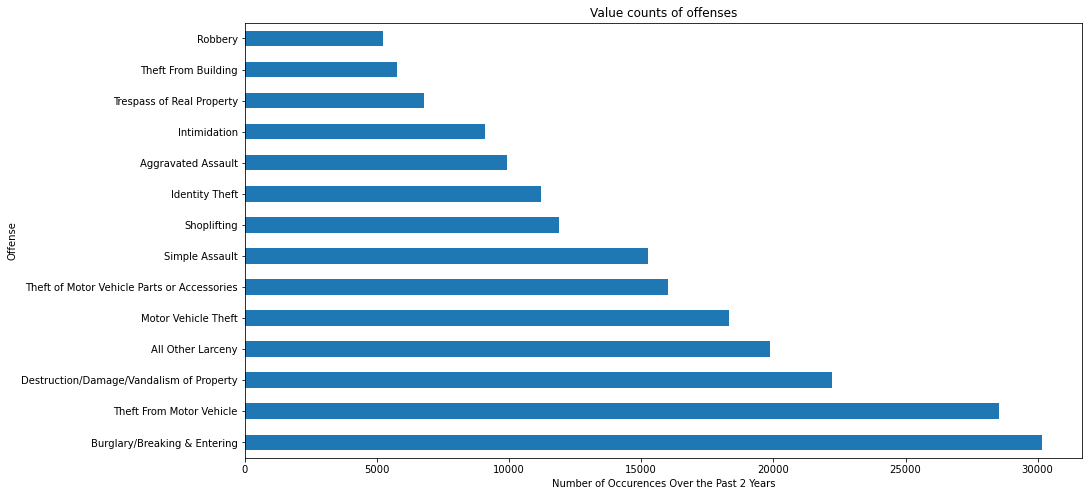

In [9]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [10]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [11]:
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [12]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

In [13]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

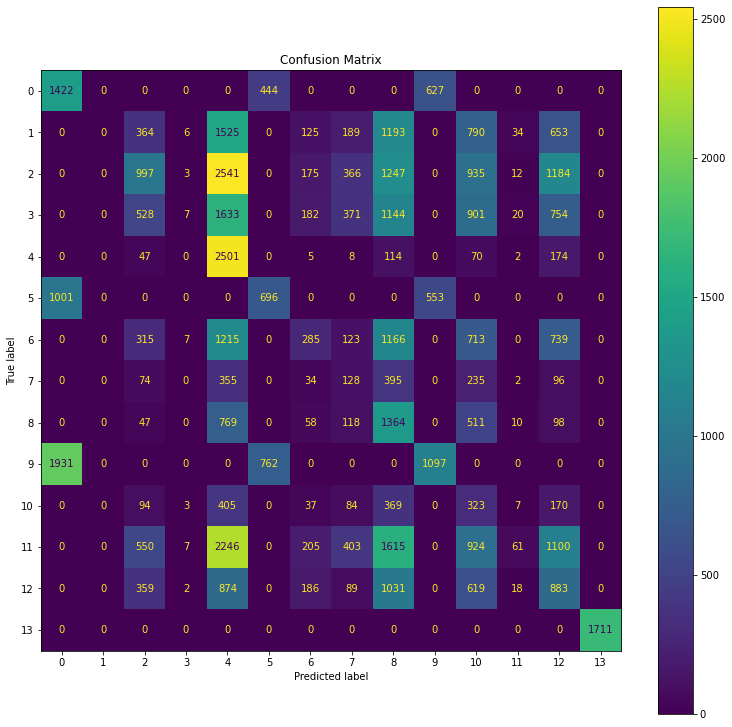

In [14]:
cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [15]:
rf2 = RandomForestClassifier()

param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

In [16]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [17]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [18]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

In [19]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

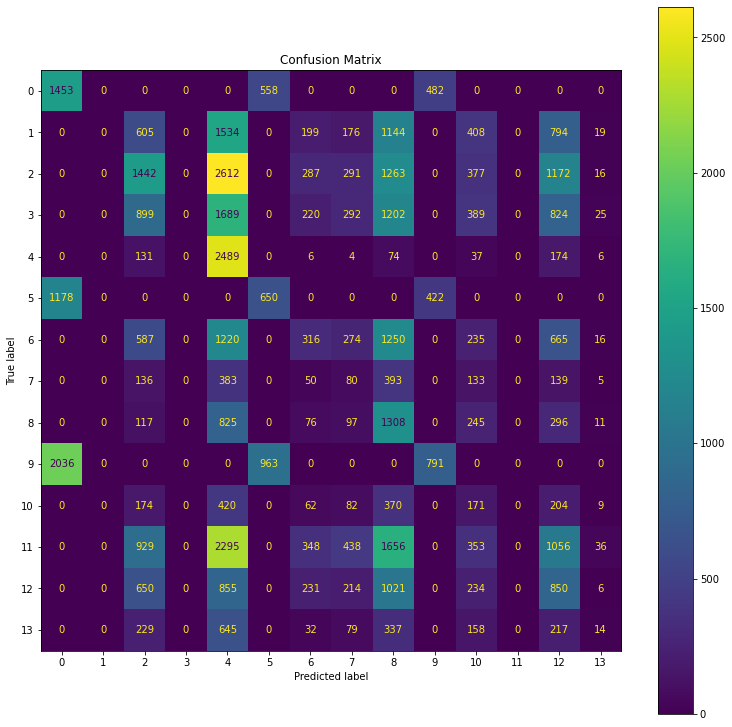

In [20]:
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

## CatBoost Model ##

In [21]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [22]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 312ms	remaining: 5m 11s
1:	learn: 2.2999611	total: 501ms	remaining: 4m 9s
2:	learn: 2.2194601	total: 700ms	remaining: 3m 52s
3:	learn: 2.1546015	total: 894ms	remaining: 3m 42s
4:	learn: 2.1023865	total: 1.09s	remaining: 3m 36s
5:	learn: 2.0583486	total: 1.28s	remaining: 3m 32s
6:	learn: 2.0212087	total: 1.48s	remaining: 3m 29s
7:	learn: 1.9898034	total: 1.68s	remaining: 3m 28s
8:	learn: 1.9629609	total: 1.87s	remaining: 3m 25s
9:	learn: 1.9385266	total: 2.06s	remaining: 3m 24s
10:	learn: 1.9170486	total: 2.26s	remaining: 3m 23s
11:	learn: 1.8977704	total: 2.46s	remaining: 3m 22s
12:	learn: 1.8810050	total: 2.7s	remaining: 3m 24s
13:	learn: 1.8659622	total: 2.91s	remaining: 3m 24s
14:	learn: 1.8528057	total: 3.11s	remaining: 3m 24s
15:	learn: 1.8413095	total: 3.31s	remaining: 3m 23s
16:	learn: 1.8304887	total: 3.51s	remaining: 3m 22s
17:	learn: 1.8207193	total: 3.7s	remaining: 3m 22s
18:	learn: 1.8118833	total: 3.89s	remaining: 3m

158:	learn: 1.6251733	total: 30.9s	remaining: 2m 43s
159:	learn: 1.6246682	total: 31.1s	remaining: 2m 43s
160:	learn: 1.6240814	total: 31.3s	remaining: 2m 43s
161:	learn: 1.6234912	total: 31.5s	remaining: 2m 42s
162:	learn: 1.6227072	total: 31.7s	remaining: 2m 42s
163:	learn: 1.6221519	total: 31.9s	remaining: 2m 42s
164:	learn: 1.6218260	total: 32.1s	remaining: 2m 42s
165:	learn: 1.6211820	total: 32.3s	remaining: 2m 42s
166:	learn: 1.6204335	total: 32.4s	remaining: 2m 41s
167:	learn: 1.6199455	total: 32.6s	remaining: 2m 41s
168:	learn: 1.6193922	total: 32.8s	remaining: 2m 41s
169:	learn: 1.6187407	total: 33s	remaining: 2m 41s
170:	learn: 1.6180585	total: 33.2s	remaining: 2m 40s
171:	learn: 1.6176398	total: 33.4s	remaining: 2m 40s
172:	learn: 1.6170568	total: 33.6s	remaining: 2m 40s
173:	learn: 1.6165132	total: 33.8s	remaining: 2m 40s
174:	learn: 1.6159495	total: 34s	remaining: 2m 40s
175:	learn: 1.6153028	total: 34.2s	remaining: 2m 39s
176:	learn: 1.6146298	total: 34.4s	remaining: 2m 3

314:	learn: 1.5649341	total: 1m 1s	remaining: 2m 13s
315:	learn: 1.5647062	total: 1m 1s	remaining: 2m 13s
316:	learn: 1.5645829	total: 1m 1s	remaining: 2m 13s
317:	learn: 1.5642024	total: 1m 2s	remaining: 2m 13s
318:	learn: 1.5640665	total: 1m 2s	remaining: 2m 12s
319:	learn: 1.5637100	total: 1m 2s	remaining: 2m 12s
320:	learn: 1.5633905	total: 1m 2s	remaining: 2m 12s
321:	learn: 1.5631116	total: 1m 2s	remaining: 2m 12s
322:	learn: 1.5627410	total: 1m 3s	remaining: 2m 12s
323:	learn: 1.5624283	total: 1m 3s	remaining: 2m 11s
324:	learn: 1.5621756	total: 1m 3s	remaining: 2m 11s
325:	learn: 1.5618323	total: 1m 3s	remaining: 2m 11s
326:	learn: 1.5616583	total: 1m 3s	remaining: 2m 11s
327:	learn: 1.5613896	total: 1m 4s	remaining: 2m 11s
328:	learn: 1.5609458	total: 1m 4s	remaining: 2m 11s
329:	learn: 1.5606630	total: 1m 4s	remaining: 2m 10s
330:	learn: 1.5603782	total: 1m 4s	remaining: 2m 10s
331:	learn: 1.5601729	total: 1m 4s	remaining: 2m 10s
332:	learn: 1.5598859	total: 1m 5s	remaining: 

468:	learn: 1.5303809	total: 1m 30s	remaining: 1m 42s
469:	learn: 1.5302180	total: 1m 31s	remaining: 1m 42s
470:	learn: 1.5299901	total: 1m 31s	remaining: 1m 42s
471:	learn: 1.5297455	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.5295825	total: 1m 31s	remaining: 1m 42s
473:	learn: 1.5294413	total: 1m 31s	remaining: 1m 41s
474:	learn: 1.5292287	total: 1m 32s	remaining: 1m 41s
475:	learn: 1.5289551	total: 1m 32s	remaining: 1m 41s
476:	learn: 1.5286701	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.5285735	total: 1m 32s	remaining: 1m 41s
478:	learn: 1.5283585	total: 1m 32s	remaining: 1m 41s
479:	learn: 1.5281016	total: 1m 33s	remaining: 1m 40s
480:	learn: 1.5279492	total: 1m 33s	remaining: 1m 40s
481:	learn: 1.5278739	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.5277657	total: 1m 33s	remaining: 1m 40s
483:	learn: 1.5276349	total: 1m 33s	remaining: 1m 40s
484:	learn: 1.5274693	total: 1m 34s	remaining: 1m 39s
485:	learn: 1.5272937	total: 1m 34s	remaining: 1m 39s
486:	learn: 1.5271195	total:

620:	learn: 1.5061325	total: 1m 59s	remaining: 1m 13s
621:	learn: 1.5060006	total: 2m	remaining: 1m 13s
622:	learn: 1.5058894	total: 2m	remaining: 1m 12s
623:	learn: 1.5057118	total: 2m	remaining: 1m 12s
624:	learn: 1.5056597	total: 2m	remaining: 1m 12s
625:	learn: 1.5055096	total: 2m	remaining: 1m 12s
626:	learn: 1.5053330	total: 2m 1s	remaining: 1m 12s
627:	learn: 1.5051102	total: 2m 1s	remaining: 1m 11s
628:	learn: 1.5049670	total: 2m 1s	remaining: 1m 11s
629:	learn: 1.5048555	total: 2m 1s	remaining: 1m 11s
630:	learn: 1.5047674	total: 2m 1s	remaining: 1m 11s
631:	learn: 1.5045301	total: 2m 2s	remaining: 1m 11s
632:	learn: 1.5044772	total: 2m 2s	remaining: 1m 10s
633:	learn: 1.5043542	total: 2m 2s	remaining: 1m 10s
634:	learn: 1.5042600	total: 2m 2s	remaining: 1m 10s
635:	learn: 1.5040910	total: 2m 2s	remaining: 1m 10s
636:	learn: 1.5039614	total: 2m 3s	remaining: 1m 10s
637:	learn: 1.5037723	total: 2m 3s	remaining: 1m 9s
638:	learn: 1.5036974	total: 2m 3s	remaining: 1m 9s
639:	lear

777:	learn: 1.4853740	total: 2m 29s	remaining: 42.8s
778:	learn: 1.4852877	total: 2m 30s	remaining: 42.6s
779:	learn: 1.4851963	total: 2m 30s	remaining: 42.4s
780:	learn: 1.4849726	total: 2m 30s	remaining: 42.2s
781:	learn: 1.4849048	total: 2m 30s	remaining: 42s
782:	learn: 1.4848062	total: 2m 30s	remaining: 41.8s
783:	learn: 1.4847028	total: 2m 31s	remaining: 41.6s
784:	learn: 1.4846536	total: 2m 31s	remaining: 41.4s
785:	learn: 1.4843678	total: 2m 31s	remaining: 41.2s
786:	learn: 1.4842474	total: 2m 31s	remaining: 41s
787:	learn: 1.4841990	total: 2m 31s	remaining: 40.8s
788:	learn: 1.4840352	total: 2m 31s	remaining: 40.6s
789:	learn: 1.4838728	total: 2m 32s	remaining: 40.5s
790:	learn: 1.4837988	total: 2m 32s	remaining: 40.3s
791:	learn: 1.4836912	total: 2m 32s	remaining: 40.1s
792:	learn: 1.4835674	total: 2m 32s	remaining: 39.9s
793:	learn: 1.4834131	total: 2m 32s	remaining: 39.7s
794:	learn: 1.4832386	total: 2m 33s	remaining: 39.5s
795:	learn: 1.4831564	total: 2m 33s	remaining: 39.

934:	learn: 1.4688580	total: 2m 59s	remaining: 12.5s
935:	learn: 1.4688009	total: 3m	remaining: 12.3s
936:	learn: 1.4687425	total: 3m	remaining: 12.1s
937:	learn: 1.4686443	total: 3m	remaining: 11.9s
938:	learn: 1.4685779	total: 3m	remaining: 11.7s
939:	learn: 1.4685203	total: 3m	remaining: 11.5s
940:	learn: 1.4683926	total: 3m	remaining: 11.3s
941:	learn: 1.4682419	total: 3m 1s	remaining: 11.2s
942:	learn: 1.4681218	total: 3m 1s	remaining: 11s
943:	learn: 1.4680295	total: 3m 1s	remaining: 10.8s
944:	learn: 1.4679649	total: 3m 1s	remaining: 10.6s
945:	learn: 1.4678936	total: 3m 1s	remaining: 10.4s
946:	learn: 1.4678353	total: 3m 2s	remaining: 10.2s
947:	learn: 1.4677239	total: 3m 2s	remaining: 10s
948:	learn: 1.4676501	total: 3m 2s	remaining: 9.81s
949:	learn: 1.4675029	total: 3m 2s	remaining: 9.62s
950:	learn: 1.4672623	total: 3m 3s	remaining: 9.43s
951:	learn: 1.4671748	total: 3m 3s	remaining: 9.24s
952:	learn: 1.4670202	total: 3m 3s	remaining: 9.05s
953:	learn: 1.4669491	total: 3m 3

In [23]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [24]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [25]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

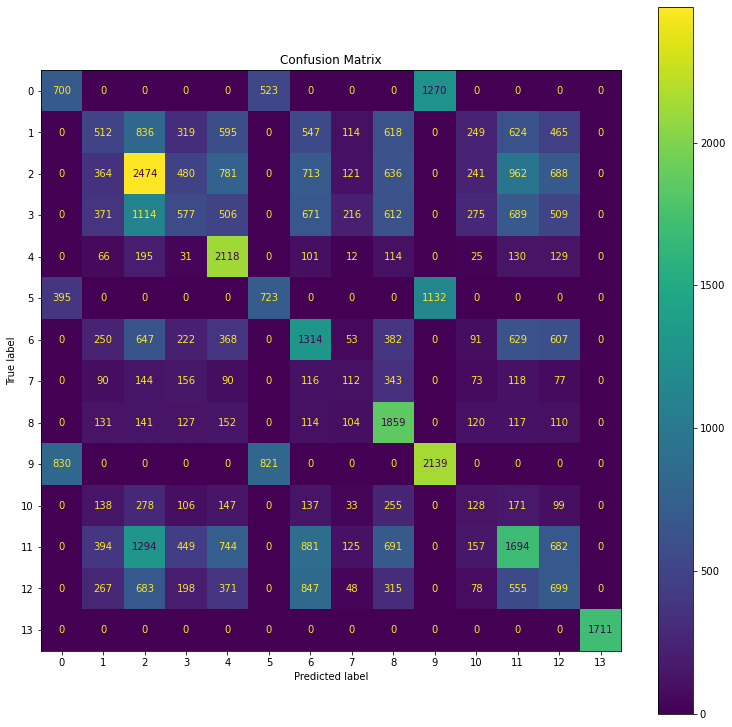

In [26]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our test model aggravated assault results, we have a precision score of .28, a recall score of .71, and an f1 score of .40. This means that:

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [27]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [28]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.9ms	remaining: 1.28s
1:	learn: 2.4762514	total: 24.6ms	remaining: 1.2s
2:	learn: 2.4237441	total: 36.3ms	remaining: 1.17s
3:	learn: 2.3795726	total: 48ms	remaining: 1.15s
4:	learn: 2.3414035	total: 59.7ms	remaining: 1.13s
5:	learn: 2.3078013	total: 71.5ms	remaining: 1.12s
6:	learn: 2.2778569	total: 83.2ms	remaining: 1.1s
7:	learn: 2.2509267	total: 94.9ms	remaining: 1.09s
8:	learn: 2.2265149	total: 106ms	remaining: 1.08s
9:	learn: 2.2043153	total: 117ms	remaining: 1.05s
10:	learn: 2.1839448	total: 128ms	remaining: 1.03s
11:	learn: 2.1652505	total: 139ms	remaining: 1.02s
12:	learn: 2.1480046	total: 150ms	remaining: 1s
13:	learn: 2.1320227	total: 160ms	remaining: 984ms
14:	learn: 2.1172352	total: 171ms	remaining: 970ms
15:	learn: 2.1034803	total: 182ms	remaining: 955ms
16:	learn: 2.0906592	total: 193ms	remaining: 941ms
17:	learn: 2.0787237	total: 204ms	remaining: 928ms
18:	learn: 2.0675539	total: 215ms	remaining: 915ms
19:	learn: 2.0571036	total: 225ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762573	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237355	total: 33.6ms	remaining: 1.09s
3:	learn: 2.3795672	total: 44.4ms	remaining: 1.07s
4:	learn: 2.3413907	total: 55.2ms	remaining: 1.05s
5:	learn: 2.3077991	total: 66ms	remaining: 1.03s
6:	learn: 2.2778537	total: 76.8ms	remaining: 1.02s
7:	learn: 2.2509244	total: 87.6ms	remaining: 1.01s
8:	learn: 2.2265174	total: 98.3ms	remaining: 994ms
9:	learn: 2.2043126	total: 109ms	remaining: 982ms
10:	learn: 2.1839418	total: 120ms	remaining: 970ms
11:	learn: 2.1652518	total: 131ms	remaining: 957ms
12:	learn: 2.1479991	total: 141ms	remaining: 946ms
13:	learn: 2.1320212	total: 152ms	remaining: 934ms
14:	learn: 2.1172271	total: 163ms	remaining: 922ms
15:	learn: 2.1034693	total: 174ms	remaining: 911ms
16:	learn: 2.0906570	total: 184ms	remaining: 900ms
17:	learn: 2.0787215	total: 195ms	remaining: 889ms
18:	learn: 2.0675514	total: 206ms	remaining: 879ms
19:	learn: 2.0571039	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762640	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237412	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795755	total: 44.3ms	remaining: 1.06s
4:	learn: 2.3413938	total: 55ms	remaining: 1.04s
5:	learn: 2.3077920	total: 65.8ms	remaining: 1.03s
6:	learn: 2.2778548	total: 76.6ms	remaining: 1.02s
7:	learn: 2.2509156	total: 87.5ms	remaining: 1s
8:	learn: 2.2265216	total: 98.3ms	remaining: 994ms
9:	learn: 2.2043300	total: 109ms	remaining: 983ms
10:	learn: 2.1839467	total: 120ms	remaining: 971ms
11:	learn: 2.1652460	total: 131ms	remaining: 959ms
12:	learn: 2.1480037	total: 142ms	remaining: 948ms
13:	learn: 2.1320178	total: 152ms	remaining: 937ms
14:	learn: 2.1172227	total: 163ms	remaining: 925ms
15:	learn: 2.1034706	total: 174ms	remaining: 914ms
16:	learn: 2.0906616	total: 185ms	remaining: 903ms
17:	learn: 2.0787261	total: 196ms	remaining: 892ms
18:	learn: 2.0675760	total: 207ms	remaining: 881ms
19:	learn: 2.0571256	total: 218ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762685	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237449	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795785	total: 44.4ms	remaining: 1.06s
4:	learn: 2.3413950	total: 55.1ms	remaining: 1.05s
5:	learn: 2.3078053	total: 66ms	remaining: 1.03s
6:	learn: 2.2778565	total: 76.8ms	remaining: 1.02s
7:	learn: 2.2509227	total: 87.6ms	remaining: 1.01s
8:	learn: 2.2265251	total: 98.3ms	remaining: 994ms
9:	learn: 2.2043273	total: 109ms	remaining: 982ms
10:	learn: 2.1839504	total: 120ms	remaining: 970ms
11:	learn: 2.1652580	total: 131ms	remaining: 959ms
12:	learn: 2.1480047	total: 142ms	remaining: 948ms
13:	learn: 2.1320323	total: 153ms	remaining: 937ms
14:	learn: 2.1172286	total: 163ms	remaining: 926ms
15:	learn: 2.1034730	total: 174ms	remaining: 915ms
16:	learn: 2.0906645	total: 185ms	remaining: 903ms
17:	learn: 2.0787273	total: 196ms	remaining: 893ms
18:	learn: 2.0675735	total: 207ms	remaining: 882ms
19:	learn: 2.0571302	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762635	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237491	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795777	total: 44.2ms	remaining: 1.06s
4:	learn: 2.3413980	total: 55.2ms	remaining: 1.05s
5:	learn: 2.3077954	total: 66.1ms	remaining: 1.03s
6:	learn: 2.2778531	total: 76.8ms	remaining: 1.02s
7:	learn: 2.2509232	total: 87.5ms	remaining: 1.01s
8:	learn: 2.2265224	total: 98.4ms	remaining: 995ms
9:	learn: 2.2043104	total: 109ms	remaining: 983ms
10:	learn: 2.1839472	total: 120ms	remaining: 972ms
11:	learn: 2.1652482	total: 131ms	remaining: 960ms
12:	learn: 2.1479995	total: 142ms	remaining: 948ms
13:	learn: 2.1320242	total: 153ms	remaining: 937ms
14:	learn: 2.1172318	total: 163ms	remaining: 926ms
15:	learn: 2.1034802	total: 174ms	remaining: 915ms
16:	learn: 2.0906598	total: 185ms	remaining: 905ms
17:	learn: 2.0787219	total: 196ms	remaining: 894ms
18:	learn: 2.0675551	total: 207ms	remaining: 883ms
19:	learn: 2.0571094	total: 218m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.8ms	remaining: 1.16s
1:	learn: 2.3598895	total: 22.5ms	remaining: 1.1s
2:	learn: 2.2913399	total: 33.3ms	remaining: 1.08s
3:	learn: 2.2369277	total: 44.1ms	remaining: 1.06s
4:	learn: 2.1922569	total: 54.8ms	remaining: 1.04s
5:	learn: 2.1547724	total: 65.5ms	remaining: 1.03s
6:	learn: 2.1228987	total: 76.2ms	remaining: 1.01s
7:	learn: 2.0954139	total: 86.8ms	remaining: 998ms
8:	learn: 2.0716174	total: 97.5ms	remaining: 986ms
9:	learn: 2.0508296	total: 108ms	remaining: 975ms
10:	learn: 2.0271503	total: 119ms	remaining: 965ms
11:	learn: 2.0081888	total: 130ms	remaining: 955ms
12:	learn: 1.9930110	total: 141ms	remaining: 942ms
13:	learn: 1.9817104	total: 151ms	remaining: 930ms
14:	learn: 1.9679395	total: 162ms	remaining: 920ms
15:	learn: 1.9588124	total: 173ms	remaining: 908ms
16:	learn: 1.9460534	total: 184ms	remaining: 898ms
17:	learn: 1.9355642	total: 195ms	remaining: 886ms
18:	learn: 1.9294893	total: 206ms	remaining: 878ms
19:	learn: 1.9230232	total: 217ms

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.8ms	remaining: 1.17s
1:	learn: 2.3598792	total: 22.7ms	remaining: 1.11s
2:	learn: 2.2913392	total: 33.5ms	remaining: 1.08s
3:	learn: 2.2369230	total: 44.3ms	remaining: 1.06s
4:	learn: 2.1922466	total: 55.2ms	remaining: 1.05s
5:	learn: 2.1547677	total: 66ms	remaining: 1.03s
6:	learn: 2.1228947	total: 76.7ms	remaining: 1.02s
7:	learn: 2.0954127	total: 87.5ms	remaining: 1.01s
8:	learn: 2.0716164	total: 98.4ms	remaining: 995ms
9:	learn: 2.0508223	total: 109ms	remaining: 982ms
10:	learn: 2.0270751	total: 120ms	remaining: 972ms
11:	learn: 2.0104778	total: 131ms	remaining: 959ms
12:	learn: 1.9988607	total: 142ms	remaining: 948ms
13:	learn: 1.9820010	total: 153ms	remaining: 937ms
14:	learn: 1.9669209	total: 164ms	remaining: 927ms
15:	learn: 1.9591942	total: 174ms	remaining: 915ms
16:	learn: 1.9464718	total: 185ms	remaining: 905ms
17:	learn: 1.9359812	total: 196ms	remaining: 893ms
18:	learn: 1.9264024	total: 207ms	remaining: 882ms
19:	learn: 1.9200550	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.6ms	remaining: 1.14s
1:	learn: 2.3598852	total: 22.3ms	remaining: 1.09s
2:	learn: 2.2913316	total: 33.2ms	remaining: 1.07s
3:	learn: 2.2369270	total: 44ms	remaining: 1.06s
4:	learn: 2.1922601	total: 54.8ms	remaining: 1.04s
5:	learn: 2.1547794	total: 65.7ms	remaining: 1.03s
6:	learn: 2.1228896	total: 76.6ms	remaining: 1.02s
7:	learn: 2.0954111	total: 87.5ms	remaining: 1s
8:	learn: 2.0716289	total: 98.3ms	remaining: 994ms
9:	learn: 2.0508357	total: 109ms	remaining: 983ms
10:	learn: 2.0271105	total: 120ms	remaining: 973ms
11:	learn: 2.0105111	total: 131ms	remaining: 960ms
12:	learn: 1.9924268	total: 142ms	remaining: 950ms
13:	learn: 1.9822249	total: 153ms	remaining: 938ms
14:	learn: 1.9684885	total: 164ms	remaining: 927ms
15:	learn: 1.9593071	total: 174ms	remaining: 916ms
16:	learn: 1.9465944	total: 185ms	remaining: 905ms
17:	learn: 1.9361020	total: 196ms	remaining: 894ms
18:	learn: 1.9296533	total: 207ms	remaining: 883ms
19:	learn: 1.9202074	total: 218ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598864	total: 22.9ms	remaining: 1.12s
2:	learn: 2.2913452	total: 33.8ms	remaining: 1.09s
3:	learn: 2.2369312	total: 44.6ms	remaining: 1.07s
4:	learn: 2.1922601	total: 55.5ms	remaining: 1.05s
5:	learn: 2.1547794	total: 66.3ms	remaining: 1.04s
6:	learn: 2.1229024	total: 77.3ms	remaining: 1.03s
7:	learn: 2.0954268	total: 88.2ms	remaining: 1.01s
8:	learn: 2.0716272	total: 99.3ms	remaining: 1s
9:	learn: 2.0508480	total: 110ms	remaining: 992ms
10:	learn: 2.0271347	total: 121ms	remaining: 982ms
11:	learn: 2.0105355	total: 132ms	remaining: 970ms
12:	learn: 1.9924692	total: 143ms	remaining: 960ms
13:	learn: 1.9823054	total: 154ms	remaining: 948ms
14:	learn: 1.9673154	total: 165ms	remaining: 936ms
15:	learn: 1.9591126	total: 176ms	remaining: 924ms
16:	learn: 1.9467486	total: 187ms	remaining: 912ms
17:	learn: 1.9362571	total: 198ms	remaining: 900ms
18:	learn: 1.9302153	total: 208ms	remaining: 888ms
19:	learn: 1.9237624	total: 219ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.2ms	remaining: 1.21s
1:	learn: 2.3598854	total: 23.3ms	remaining: 1.14s
2:	learn: 2.2913371	total: 34.4ms	remaining: 1.11s
3:	learn: 2.2369275	total: 45.2ms	remaining: 1.08s
4:	learn: 2.1922648	total: 56.2ms	remaining: 1.07s
5:	learn: 2.1547779	total: 67.2ms	remaining: 1.05s
6:	learn: 2.1228920	total: 78ms	remaining: 1.04s
7:	learn: 2.0954177	total: 88.9ms	remaining: 1.02s
8:	learn: 2.0716159	total: 99.8ms	remaining: 1.01s
9:	learn: 2.0508376	total: 111ms	remaining: 996ms
10:	learn: 2.0270727	total: 122ms	remaining: 984ms
11:	learn: 2.0104718	total: 132ms	remaining: 970ms
12:	learn: 1.9988462	total: 143ms	remaining: 958ms
13:	learn: 1.9821266	total: 154ms	remaining: 947ms
14:	learn: 1.9670321	total: 165ms	remaining: 936ms
15:	learn: 1.9588432	total: 176ms	remaining: 924ms
16:	learn: 1.9465869	total: 187ms	remaining: 913ms
17:	learn: 1.9360987	total: 198ms	remaining: 902ms
18:	learn: 1.9296690	total: 209ms	remaining: 890ms
19:	learn: 1.9202300	total: 220ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.8ms	remaining: 1.17s
1:	learn: 1.9520625	total: 22.9ms	remaining: 1.12s
2:	learn: 1.8880724	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8521886	total: 45.2ms	remaining: 1.08s
4:	learn: 1.8356855	total: 57.1ms	remaining: 1.08s
5:	learn: 1.8255545	total: 69.1ms	remaining: 1.08s
6:	learn: 1.8101047	total: 80ms	remaining: 1.06s
7:	learn: 1.8011888	total: 91.1ms	remaining: 1.05s
8:	learn: 1.7935489	total: 102ms	remaining: 1.03s
9:	learn: 1.7872375	total: 114ms	remaining: 1.02s
10:	learn: 1.7818155	total: 124ms	remaining: 1s
11:	learn: 1.7774933	total: 135ms	remaining: 992ms
12:	learn: 1.7720436	total: 147ms	remaining: 981ms
13:	learn: 1.7672708	total: 158ms	remaining: 970ms
14:	learn: 1.7647359	total: 169ms	remaining: 957ms
15:	learn: 1.7584613	total: 180ms	remaining: 944ms
16:	learn: 1.7548142	total: 191ms	remaining: 933ms
17:	learn: 1.7523385	total: 203ms	remaining: 923ms
18:	learn: 1.7449284	total: 213ms	remaining: 909ms
19:	learn: 1.7430138	total: 224ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.9ms	remaining: 1.17s
1:	learn: 1.9517887	total: 23ms	remaining: 1.13s
2:	learn: 1.8886576	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8529391	total: 44.9ms	remaining: 1.08s
4:	learn: 1.8330485	total: 56ms	remaining: 1.06s
5:	learn: 1.8228297	total: 67ms	remaining: 1.05s
6:	learn: 1.8124496	total: 78.3ms	remaining: 1.04s
7:	learn: 1.7977723	total: 89.1ms	remaining: 1.02s
8:	learn: 1.7908950	total: 100ms	remaining: 1.01s
9:	learn: 1.7853127	total: 111ms	remaining: 999ms
10:	learn: 1.7791104	total: 122ms	remaining: 985ms
11:	learn: 1.7754517	total: 133ms	remaining: 973ms
12:	learn: 1.7716681	total: 144ms	remaining: 963ms
13:	learn: 1.7686969	total: 155ms	remaining: 953ms
14:	learn: 1.7658100	total: 166ms	remaining: 942ms
15:	learn: 1.7577360	total: 177ms	remaining: 930ms
16:	learn: 1.7550341	total: 188ms	remaining: 917ms
17:	learn: 1.7534944	total: 199ms	remaining: 904ms
18:	learn: 1.7500031	total: 210ms	remaining: 895ms
19:	learn: 1.7469651	total: 221ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.7ms	remaining: 1.16s
1:	learn: 1.9519061	total: 22.7ms	remaining: 1.11s
2:	learn: 1.8888379	total: 33.6ms	remaining: 1.09s
3:	learn: 1.8532653	total: 44.7ms	remaining: 1.07s
4:	learn: 1.8370754	total: 55.9ms	remaining: 1.06s
5:	learn: 1.8272525	total: 66.9ms	remaining: 1.05s
6:	learn: 1.8181763	total: 78ms	remaining: 1.04s
7:	learn: 1.8077453	total: 89.3ms	remaining: 1.03s
8:	learn: 1.7947341	total: 100ms	remaining: 1.01s
9:	learn: 1.7880575	total: 112ms	remaining: 1.01s
10:	learn: 1.7825851	total: 123ms	remaining: 995ms
11:	learn: 1.7740261	total: 134ms	remaining: 981ms
12:	learn: 1.7695077	total: 145ms	remaining: 970ms
13:	learn: 1.7663959	total: 156ms	remaining: 958ms
14:	learn: 1.7627022	total: 167ms	remaining: 946ms
15:	learn: 1.7594748	total: 178ms	remaining: 933ms
16:	learn: 1.7548249	total: 189ms	remaining: 921ms
17:	learn: 1.7527021	total: 200ms	remaining: 910ms
18:	learn: 1.7499503	total: 211ms	remaining: 899ms
19:	learn: 1.7461351	total: 222ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756964	total: 11.9ms	remaining: 1.17s
1:	learn: 1.9519926	total: 22.8ms	remaining: 1.12s
2:	learn: 1.8889246	total: 33.7ms	remaining: 1.09s
3:	learn: 1.8535363	total: 45ms	remaining: 1.08s
4:	learn: 1.8340449	total: 56.1ms	remaining: 1.06s
5:	learn: 1.8238952	total: 66.9ms	remaining: 1.05s
6:	learn: 1.8162299	total: 77.8ms	remaining: 1.03s
7:	learn: 1.8014081	total: 88.7ms	remaining: 1.02s
8:	learn: 1.7950082	total: 99.7ms	remaining: 1.01s
9:	learn: 1.7892781	total: 110ms	remaining: 994ms
10:	learn: 1.7836330	total: 121ms	remaining: 981ms
11:	learn: 1.7789926	total: 132ms	remaining: 970ms
12:	learn: 1.7714939	total: 143ms	remaining: 960ms
13:	learn: 1.7681400	total: 154ms	remaining: 948ms
14:	learn: 1.7653017	total: 166ms	remaining: 938ms
15:	learn: 1.7573029	total: 176ms	remaining: 926ms
16:	learn: 1.7539602	total: 187ms	remaining: 915ms
17:	learn: 1.7508533	total: 198ms	remaining: 903ms
18:	learn: 1.7481671	total: 210ms	remaining: 895ms
19:	learn: 1.7448731	total: 221ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12ms	remaining: 1.19s
1:	learn: 1.9517451	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8888390	total: 33.9ms	remaining: 1.09s
3:	learn: 1.8531956	total: 45.2ms	remaining: 1.08s
4:	learn: 1.8335319	total: 56.3ms	remaining: 1.07s
5:	learn: 1.8233263	total: 67.3ms	remaining: 1.05s
6:	learn: 1.8157679	total: 78.3ms	remaining: 1.04s
7:	learn: 1.8008696	total: 89.2ms	remaining: 1.02s
8:	learn: 1.7944986	total: 100ms	remaining: 1.01s
9:	learn: 1.7897201	total: 111ms	remaining: 1s
10:	learn: 1.7810921	total: 122ms	remaining: 988ms
11:	learn: 1.7755225	total: 133ms	remaining: 975ms
12:	learn: 1.7681780	total: 144ms	remaining: 964ms
13:	learn: 1.7640496	total: 155ms	remaining: 953ms
14:	learn: 1.7611055	total: 166ms	remaining: 943ms
15:	learn: 1.7569324	total: 177ms	remaining: 931ms
16:	learn: 1.7515367	total: 188ms	remaining: 919ms
17:	learn: 1.7484703	total: 199ms	remaining: 906ms
18:	learn: 1.7450675	total: 210ms	remaining: 895ms
19:	learn: 1.7421795	total: 221ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12ms	remaining: 5.99s
1:	learn: 2.4762514	total: 23ms	remaining: 5.71s
2:	learn: 2.4237441	total: 33.8ms	remaining: 5.61s
3:	learn: 2.3795726	total: 44.7ms	remaining: 5.54s
4:	learn: 2.3414035	total: 55.5ms	remaining: 5.49s
5:	learn: 2.3078011	total: 66.3ms	remaining: 5.46s
6:	learn: 2.2778569	total: 77.2ms	remaining: 5.43s
7:	learn: 2.2509267	total: 87.9ms	remaining: 5.41s
8:	learn: 2.2265149	total: 98.6ms	remaining: 5.38s
9:	learn: 2.2043153	total: 109ms	remaining: 5.36s
10:	learn: 2.1839448	total: 120ms	remaining: 5.34s
11:	learn: 2.1652505	total: 131ms	remaining: 5.32s
12:	learn: 2.1480046	total: 142ms	remaining: 5.33s
13:	learn: 2.1320225	total: 153ms	remaining: 5.31s
14:	learn: 2.1172350	total: 164ms	remaining: 5.3s
15:	learn: 2.1034801	total: 175ms	remaining: 5.29s
16:	learn: 2.0906594	total: 185ms	remaining: 5.27s
17:	learn: 2.0787237	total: 196ms	remaining: 5.25s
18:	learn: 2.0675539	total: 207ms	remaining: 5.24s
19:	learn: 2.0571036	total: 218ms	rem

169:	learn: 1.7693401	total: 1.86s	remaining: 3.62s
170:	learn: 1.7689921	total: 1.88s	remaining: 3.61s
171:	learn: 1.7685851	total: 1.89s	remaining: 3.6s
172:	learn: 1.7681788	total: 1.9s	remaining: 3.59s
173:	learn: 1.7678955	total: 1.91s	remaining: 3.58s
174:	learn: 1.7672911	total: 1.92s	remaining: 3.56s
175:	learn: 1.7668746	total: 1.93s	remaining: 3.55s
176:	learn: 1.7659998	total: 1.94s	remaining: 3.54s
177:	learn: 1.7655908	total: 1.95s	remaining: 3.53s
178:	learn: 1.7653112	total: 1.96s	remaining: 3.52s
179:	learn: 1.7649125	total: 1.97s	remaining: 3.51s
180:	learn: 1.7645243	total: 1.98s	remaining: 3.5s
181:	learn: 1.7642734	total: 2s	remaining: 3.49s
182:	learn: 1.7639448	total: 2.01s	remaining: 3.48s
183:	learn: 1.7630630	total: 2.02s	remaining: 3.46s
184:	learn: 1.7627941	total: 2.03s	remaining: 3.45s
185:	learn: 1.7621814	total: 2.04s	remaining: 3.44s
186:	learn: 1.7618503	total: 2.05s	remaining: 3.43s
187:	learn: 1.7614320	total: 2.06s	remaining: 3.42s
188:	learn: 1.7606

337:	learn: 1.7172929	total: 3.71s	remaining: 1.78s
338:	learn: 1.7171862	total: 3.72s	remaining: 1.77s
339:	learn: 1.7169288	total: 3.73s	remaining: 1.76s
340:	learn: 1.7167702	total: 3.74s	remaining: 1.75s
341:	learn: 1.7165615	total: 3.75s	remaining: 1.73s
342:	learn: 1.7164298	total: 3.76s	remaining: 1.72s
343:	learn: 1.7162824	total: 3.77s	remaining: 1.71s
344:	learn: 1.7160441	total: 3.79s	remaining: 1.7s
345:	learn: 1.7155438	total: 3.8s	remaining: 1.69s
346:	learn: 1.7151150	total: 3.81s	remaining: 1.68s
347:	learn: 1.7148388	total: 3.82s	remaining: 1.67s
348:	learn: 1.7146480	total: 3.83s	remaining: 1.66s
349:	learn: 1.7144622	total: 3.84s	remaining: 1.65s
350:	learn: 1.7140463	total: 3.85s	remaining: 1.64s
351:	learn: 1.7139352	total: 3.86s	remaining: 1.62s
352:	learn: 1.7137133	total: 3.87s	remaining: 1.61s
353:	learn: 1.7136036	total: 3.88s	remaining: 1.6s
354:	learn: 1.7134936	total: 3.9s	remaining: 1.59s
355:	learn: 1.7133482	total: 3.91s	remaining: 1.58s
356:	learn: 1.71

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419861	total: 11.9ms	remaining: 5.94s
1:	learn: 2.4762573	total: 22.8ms	remaining: 5.67s
2:	learn: 2.4237355	total: 33.5ms	remaining: 5.55s
3:	learn: 2.3795674	total: 44.3ms	remaining: 5.49s
4:	learn: 2.3413907	total: 55ms	remaining: 5.44s
5:	learn: 2.3077991	total: 65.8ms	remaining: 5.42s
6:	learn: 2.2778539	total: 76.5ms	remaining: 5.39s
7:	learn: 2.2509244	total: 87.4ms	remaining: 5.37s
8:	learn: 2.2265171	total: 98.4ms	remaining: 5.37s
9:	learn: 2.2043129	total: 109ms	remaining: 5.35s
10:	learn: 2.1839418	total: 120ms	remaining: 5.33s
11:	learn: 2.1652518	total: 131ms	remaining: 5.32s
12:	learn: 2.1479991	total: 142ms	remaining: 5.3s
13:	learn: 2.1320212	total: 152ms	remaining: 5.29s
14:	learn: 2.1172271	total: 163ms	remaining: 5.28s
15:	learn: 2.1034695	total: 174ms	remaining: 5.26s
16:	learn: 2.0906570	total: 185ms	remaining: 5.25s
17:	learn: 2.0787215	total: 196ms	remaining: 5.25s
18:	learn: 2.0675514	total: 207ms	remaining: 5.25s
19:	learn: 2.0571039	total: 218ms	r

167:	learn: 1.7725447	total: 1.85s	remaining: 3.66s
168:	learn: 1.7720953	total: 1.86s	remaining: 3.65s
169:	learn: 1.7717654	total: 1.88s	remaining: 3.64s
170:	learn: 1.7715257	total: 1.89s	remaining: 3.63s
171:	learn: 1.7711415	total: 1.9s	remaining: 3.62s
172:	learn: 1.7702930	total: 1.91s	remaining: 3.61s
173:	learn: 1.7699678	total: 1.92s	remaining: 3.6s
174:	learn: 1.7696167	total: 1.93s	remaining: 3.59s
175:	learn: 1.7692865	total: 1.94s	remaining: 3.57s
176:	learn: 1.7688968	total: 1.95s	remaining: 3.56s
177:	learn: 1.7684585	total: 1.96s	remaining: 3.55s
178:	learn: 1.7680452	total: 1.97s	remaining: 3.54s
179:	learn: 1.7677043	total: 1.99s	remaining: 3.53s
180:	learn: 1.7673415	total: 2s	remaining: 3.52s
181:	learn: 1.7669492	total: 2.01s	remaining: 3.51s
182:	learn: 1.7663632	total: 2.02s	remaining: 3.5s
183:	learn: 1.7660972	total: 2.03s	remaining: 3.48s
184:	learn: 1.7656890	total: 2.04s	remaining: 3.47s
185:	learn: 1.7654496	total: 2.05s	remaining: 3.46s
186:	learn: 1.7651

336:	learn: 1.7254811	total: 3.71s	remaining: 1.79s
337:	learn: 1.7252266	total: 3.72s	remaining: 1.78s
338:	learn: 1.7249982	total: 3.73s	remaining: 1.77s
339:	learn: 1.7248179	total: 3.74s	remaining: 1.76s
340:	learn: 1.7246847	total: 3.75s	remaining: 1.75s
341:	learn: 1.7245672	total: 3.77s	remaining: 1.74s
342:	learn: 1.7244359	total: 3.78s	remaining: 1.73s
343:	learn: 1.7241502	total: 3.79s	remaining: 1.72s
344:	learn: 1.7240550	total: 3.8s	remaining: 1.71s
345:	learn: 1.7238326	total: 3.81s	remaining: 1.7s
346:	learn: 1.7237444	total: 3.82s	remaining: 1.68s
347:	learn: 1.7235688	total: 3.83s	remaining: 1.67s
348:	learn: 1.7234316	total: 3.84s	remaining: 1.66s
349:	learn: 1.7232609	total: 3.85s	remaining: 1.65s
350:	learn: 1.7230725	total: 3.86s	remaining: 1.64s
351:	learn: 1.7229636	total: 3.88s	remaining: 1.63s
352:	learn: 1.7227547	total: 3.89s	remaining: 1.62s
353:	learn: 1.7225904	total: 3.9s	remaining: 1.61s
354:	learn: 1.7224039	total: 3.91s	remaining: 1.6s
355:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 12.1ms	remaining: 6.02s
1:	learn: 2.4762643	total: 22.9ms	remaining: 5.71s
2:	learn: 2.4237410	total: 33.7ms	remaining: 5.59s
3:	learn: 2.3795753	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3413938	total: 55.5ms	remaining: 5.49s
5:	learn: 2.3077920	total: 66.3ms	remaining: 5.46s
6:	learn: 2.2778548	total: 77.2ms	remaining: 5.43s
7:	learn: 2.2509156	total: 88.1ms	remaining: 5.42s
8:	learn: 2.2265216	total: 99ms	remaining: 5.4s
9:	learn: 2.2043303	total: 110ms	remaining: 5.38s
10:	learn: 2.1839467	total: 121ms	remaining: 5.37s
11:	learn: 2.1652457	total: 132ms	remaining: 5.35s
12:	learn: 2.1480037	total: 143ms	remaining: 5.34s
13:	learn: 2.1320178	total: 153ms	remaining: 5.32s
14:	learn: 2.1172227	total: 164ms	remaining: 5.31s
15:	learn: 2.1034703	total: 175ms	remaining: 5.29s
16:	learn: 2.0906613	total: 186ms	remaining: 5.28s
17:	learn: 2.0787261	total: 197ms	remaining: 5.27s
18:	learn: 2.0675760	total: 208ms	remaining: 5.25s
19:	learn: 2.0571256	total: 219ms	r

168:	learn: 1.7721758	total: 1.86s	remaining: 3.64s
169:	learn: 1.7719295	total: 1.87s	remaining: 3.63s
170:	learn: 1.7716180	total: 1.88s	remaining: 3.62s
171:	learn: 1.7712591	total: 1.89s	remaining: 3.61s
172:	learn: 1.7709827	total: 1.9s	remaining: 3.6s
173:	learn: 1.7705022	total: 1.91s	remaining: 3.59s
174:	learn: 1.7701279	total: 1.93s	remaining: 3.58s
175:	learn: 1.7692789	total: 1.94s	remaining: 3.56s
176:	learn: 1.7689647	total: 1.95s	remaining: 3.55s
177:	learn: 1.7687205	total: 1.96s	remaining: 3.54s
178:	learn: 1.7684490	total: 1.97s	remaining: 3.53s
179:	learn: 1.7680291	total: 1.98s	remaining: 3.52s
180:	learn: 1.7676243	total: 1.99s	remaining: 3.51s
181:	learn: 1.7668321	total: 2s	remaining: 3.5s
182:	learn: 1.7664578	total: 2.01s	remaining: 3.49s
183:	learn: 1.7661542	total: 2.02s	remaining: 3.48s
184:	learn: 1.7658443	total: 2.03s	remaining: 3.46s
185:	learn: 1.7654212	total: 2.04s	remaining: 3.45s
186:	learn: 1.7652017	total: 2.06s	remaining: 3.44s
187:	learn: 1.7648

337:	learn: 1.7264113	total: 3.72s	remaining: 1.78s
338:	learn: 1.7261628	total: 3.73s	remaining: 1.77s
339:	learn: 1.7260437	total: 3.74s	remaining: 1.76s
340:	learn: 1.7258120	total: 3.75s	remaining: 1.75s
341:	learn: 1.7257232	total: 3.76s	remaining: 1.74s
342:	learn: 1.7255732	total: 3.77s	remaining: 1.73s
343:	learn: 1.7254246	total: 3.78s	remaining: 1.72s
344:	learn: 1.7251685	total: 3.79s	remaining: 1.7s
345:	learn: 1.7249525	total: 3.8s	remaining: 1.69s
346:	learn: 1.7247322	total: 3.81s	remaining: 1.68s
347:	learn: 1.7245130	total: 3.83s	remaining: 1.67s
348:	learn: 1.7244126	total: 3.84s	remaining: 1.66s
349:	learn: 1.7239393	total: 3.85s	remaining: 1.65s
350:	learn: 1.7237589	total: 3.86s	remaining: 1.64s
351:	learn: 1.7236529	total: 3.87s	remaining: 1.63s
352:	learn: 1.7232509	total: 3.88s	remaining: 1.62s
353:	learn: 1.7231658	total: 3.89s	remaining: 1.6s
354:	learn: 1.7229576	total: 3.9s	remaining: 1.59s
355:	learn: 1.7228023	total: 3.91s	remaining: 1.58s
356:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 11.9ms	remaining: 5.92s
1:	learn: 2.4762685	total: 22.8ms	remaining: 5.67s
2:	learn: 2.4237449	total: 33.7ms	remaining: 5.58s
3:	learn: 2.3795785	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3413953	total: 55.5ms	remaining: 5.49s
5:	learn: 2.3078053	total: 66.4ms	remaining: 5.47s
6:	learn: 2.2778565	total: 77.3ms	remaining: 5.45s
7:	learn: 2.2509225	total: 88.1ms	remaining: 5.42s
8:	learn: 2.2265251	total: 98.9ms	remaining: 5.4s
9:	learn: 2.2043273	total: 110ms	remaining: 5.38s
10:	learn: 2.1839504	total: 121ms	remaining: 5.36s
11:	learn: 2.1652582	total: 132ms	remaining: 5.35s
12:	learn: 2.1480050	total: 142ms	remaining: 5.33s
13:	learn: 2.1320323	total: 153ms	remaining: 5.32s
14:	learn: 2.1172286	total: 164ms	remaining: 5.3s
15:	learn: 2.1034730	total: 175ms	remaining: 5.29s
16:	learn: 2.0906643	total: 186ms	remaining: 5.28s
17:	learn: 2.0787273	total: 197ms	remaining: 5.26s
18:	learn: 2.0675735	total: 208ms	remaining: 5.25s
19:	learn: 2.0571302	total: 219ms	

167:	learn: 1.7727561	total: 1.86s	remaining: 3.68s
168:	learn: 1.7723057	total: 1.87s	remaining: 3.67s
169:	learn: 1.7720012	total: 1.88s	remaining: 3.66s
170:	learn: 1.7716883	total: 1.89s	remaining: 3.65s
171:	learn: 1.7713321	total: 1.91s	remaining: 3.63s
172:	learn: 1.7707775	total: 1.92s	remaining: 3.62s
173:	learn: 1.7704597	total: 1.93s	remaining: 3.61s
174:	learn: 1.7700672	total: 1.94s	remaining: 3.6s
175:	learn: 1.7697452	total: 1.95s	remaining: 3.59s
176:	learn: 1.7693540	total: 1.96s	remaining: 3.58s
177:	learn: 1.7691084	total: 1.97s	remaining: 3.57s
178:	learn: 1.7687763	total: 1.98s	remaining: 3.56s
179:	learn: 1.7685007	total: 1.99s	remaining: 3.55s
180:	learn: 1.7681100	total: 2s	remaining: 3.54s
181:	learn: 1.7677543	total: 2.02s	remaining: 3.52s
182:	learn: 1.7669142	total: 2.03s	remaining: 3.51s
183:	learn: 1.7666116	total: 2.04s	remaining: 3.5s
184:	learn: 1.7662325	total: 2.05s	remaining: 3.49s
185:	learn: 1.7659428	total: 2.06s	remaining: 3.48s
186:	learn: 1.765

335:	learn: 1.7247607	total: 3.71s	remaining: 1.81s
336:	learn: 1.7245761	total: 3.72s	remaining: 1.8s
337:	learn: 1.7244255	total: 3.73s	remaining: 1.79s
338:	learn: 1.7242548	total: 3.75s	remaining: 1.78s
339:	learn: 1.7240798	total: 3.76s	remaining: 1.77s
340:	learn: 1.7235884	total: 3.77s	remaining: 1.76s
341:	learn: 1.7233626	total: 3.78s	remaining: 1.75s
342:	learn: 1.7231855	total: 3.79s	remaining: 1.73s
343:	learn: 1.7227291	total: 3.8s	remaining: 1.72s
344:	learn: 1.7225509	total: 3.81s	remaining: 1.71s
345:	learn: 1.7224265	total: 3.82s	remaining: 1.7s
346:	learn: 1.7223346	total: 3.83s	remaining: 1.69s
347:	learn: 1.7221957	total: 3.84s	remaining: 1.68s
348:	learn: 1.7220568	total: 3.85s	remaining: 1.67s
349:	learn: 1.7219128	total: 3.87s	remaining: 1.66s
350:	learn: 1.7216906	total: 3.88s	remaining: 1.65s
351:	learn: 1.7215356	total: 3.89s	remaining: 1.63s
352:	learn: 1.7212135	total: 3.9s	remaining: 1.62s
353:	learn: 1.7209678	total: 3.91s	remaining: 1.61s
354:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 12.1ms	remaining: 6.05s
1:	learn: 2.4762633	total: 23ms	remaining: 5.73s
2:	learn: 2.4237493	total: 33.9ms	remaining: 5.62s
3:	learn: 2.3795777	total: 44.7ms	remaining: 5.54s
4:	learn: 2.3413980	total: 55.6ms	remaining: 5.5s
5:	learn: 2.3077954	total: 66.4ms	remaining: 5.47s
6:	learn: 2.2778531	total: 77.3ms	remaining: 5.44s
7:	learn: 2.2509232	total: 88.2ms	remaining: 5.42s
8:	learn: 2.2265224	total: 99.1ms	remaining: 5.41s
9:	learn: 2.2043106	total: 110ms	remaining: 5.39s
10:	learn: 2.1839472	total: 121ms	remaining: 5.37s
11:	learn: 2.1652482	total: 132ms	remaining: 5.35s
12:	learn: 2.1479995	total: 143ms	remaining: 5.34s
13:	learn: 2.1320242	total: 153ms	remaining: 5.33s
14:	learn: 2.1172318	total: 164ms	remaining: 5.31s
15:	learn: 2.1034802	total: 175ms	remaining: 5.3s
16:	learn: 2.0906601	total: 186ms	remaining: 5.28s
17:	learn: 2.0787219	total: 197ms	remaining: 5.27s
18:	learn: 2.0675551	total: 208ms	remaining: 5.26s
19:	learn: 2.0571095	total: 219ms	re

168:	learn: 1.7727707	total: 1.86s	remaining: 3.65s
169:	learn: 1.7723726	total: 1.87s	remaining: 3.64s
170:	learn: 1.7719631	total: 1.89s	remaining: 3.63s
171:	learn: 1.7716736	total: 1.9s	remaining: 3.62s
172:	learn: 1.7713384	total: 1.91s	remaining: 3.61s
173:	learn: 1.7709524	total: 1.92s	remaining: 3.59s
174:	learn: 1.7701133	total: 1.93s	remaining: 3.58s
175:	learn: 1.7693699	total: 1.94s	remaining: 3.57s
176:	learn: 1.7688445	total: 1.95s	remaining: 3.56s
177:	learn: 1.7684079	total: 1.96s	remaining: 3.55s
178:	learn: 1.7680523	total: 1.97s	remaining: 3.54s
179:	learn: 1.7677712	total: 1.99s	remaining: 3.53s
180:	learn: 1.7674183	total: 2s	remaining: 3.52s
181:	learn: 1.7670809	total: 2.01s	remaining: 3.51s
182:	learn: 1.7666791	total: 2.02s	remaining: 3.5s
183:	learn: 1.7664473	total: 2.03s	remaining: 3.48s
184:	learn: 1.7660730	total: 2.04s	remaining: 3.47s
185:	learn: 1.7652854	total: 2.05s	remaining: 3.46s
186:	learn: 1.7645467	total: 2.06s	remaining: 3.45s
187:	learn: 1.764

335:	learn: 1.7251087	total: 3.7s	remaining: 1.8s
336:	learn: 1.7247373	total: 3.71s	remaining: 1.79s
337:	learn: 1.7246042	total: 3.72s	remaining: 1.78s
338:	learn: 1.7243865	total: 3.73s	remaining: 1.77s
339:	learn: 1.7238977	total: 3.74s	remaining: 1.76s
340:	learn: 1.7237973	total: 3.75s	remaining: 1.75s
341:	learn: 1.7236947	total: 3.76s	remaining: 1.74s
342:	learn: 1.7234521	total: 3.78s	remaining: 1.73s
343:	learn: 1.7233018	total: 3.79s	remaining: 1.72s
344:	learn: 1.7230030	total: 3.8s	remaining: 1.71s
345:	learn: 1.7228822	total: 3.81s	remaining: 1.7s
346:	learn: 1.7227550	total: 3.82s	remaining: 1.68s
347:	learn: 1.7225242	total: 3.83s	remaining: 1.67s
348:	learn: 1.7223239	total: 3.84s	remaining: 1.66s
349:	learn: 1.7220893	total: 3.85s	remaining: 1.65s
350:	learn: 1.7219161	total: 3.86s	remaining: 1.64s
351:	learn: 1.7218276	total: 3.88s	remaining: 1.63s
352:	learn: 1.7217368	total: 3.89s	remaining: 1.62s
353:	learn: 1.7215338	total: 3.9s	remaining: 1.61s
354:	learn: 1.721

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 5.93s
1:	learn: 2.3598895	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913399	total: 33.6ms	remaining: 5.56s
3:	learn: 2.2369277	total: 44.4ms	remaining: 5.5s
4:	learn: 2.1922569	total: 55.1ms	remaining: 5.45s
5:	learn: 2.1547724	total: 66.1ms	remaining: 5.44s
6:	learn: 2.1228987	total: 76.7ms	remaining: 5.4s
7:	learn: 2.0954139	total: 87.5ms	remaining: 5.38s
8:	learn: 2.0716174	total: 98.3ms	remaining: 5.36s
9:	learn: 2.0508296	total: 109ms	remaining: 5.34s
10:	learn: 2.0271504	total: 120ms	remaining: 5.34s
11:	learn: 2.0081885	total: 131ms	remaining: 5.33s
12:	learn: 1.9930108	total: 142ms	remaining: 5.31s
13:	learn: 1.9817104	total: 152ms	remaining: 5.29s
14:	learn: 1.9679395	total: 163ms	remaining: 5.29s
15:	learn: 1.9588122	total: 174ms	remaining: 5.27s
16:	learn: 1.9460536	total: 185ms	remaining: 5.26s
17:	learn: 1.9355642	total: 196ms	remaining: 5.24s
18:	learn: 1.9294893	total: 207ms	remaining: 5.24s
19:	learn: 1.9230232	total: 218ms	

169:	learn: 1.7168361	total: 1.87s	remaining: 3.63s
170:	learn: 1.7159008	total: 1.88s	remaining: 3.61s
171:	learn: 1.7155938	total: 1.89s	remaining: 3.6s
172:	learn: 1.7153969	total: 1.9s	remaining: 3.59s
173:	learn: 1.7150504	total: 1.91s	remaining: 3.58s
174:	learn: 1.7146615	total: 1.92s	remaining: 3.57s
175:	learn: 1.7138389	total: 1.93s	remaining: 3.56s
176:	learn: 1.7133015	total: 1.94s	remaining: 3.55s
177:	learn: 1.7129843	total: 1.96s	remaining: 3.54s
178:	learn: 1.7124140	total: 1.97s	remaining: 3.52s
179:	learn: 1.7119135	total: 1.98s	remaining: 3.51s
180:	learn: 1.7117450	total: 1.99s	remaining: 3.5s
181:	learn: 1.7113048	total: 2s	remaining: 3.49s
182:	learn: 1.7109579	total: 2.01s	remaining: 3.48s
183:	learn: 1.7107241	total: 2.02s	remaining: 3.47s
184:	learn: 1.7105027	total: 2.03s	remaining: 3.46s
185:	learn: 1.7100926	total: 2.04s	remaining: 3.45s
186:	learn: 1.7098658	total: 2.05s	remaining: 3.44s
187:	learn: 1.7093658	total: 2.06s	remaining: 3.43s
188:	learn: 1.7086

337:	learn: 1.6603123	total: 3.71s	remaining: 1.78s
338:	learn: 1.6600520	total: 3.73s	remaining: 1.77s
339:	learn: 1.6597712	total: 3.74s	remaining: 1.76s
340:	learn: 1.6596044	total: 3.75s	remaining: 1.75s
341:	learn: 1.6592685	total: 3.76s	remaining: 1.74s
342:	learn: 1.6590172	total: 3.77s	remaining: 1.73s
343:	learn: 1.6588411	total: 3.78s	remaining: 1.71s
344:	learn: 1.6586313	total: 3.79s	remaining: 1.7s
345:	learn: 1.6583870	total: 3.8s	remaining: 1.69s
346:	learn: 1.6575275	total: 3.81s	remaining: 1.68s
347:	learn: 1.6574470	total: 3.82s	remaining: 1.67s
348:	learn: 1.6572564	total: 3.83s	remaining: 1.66s
349:	learn: 1.6567300	total: 3.85s	remaining: 1.65s
350:	learn: 1.6566443	total: 3.86s	remaining: 1.64s
351:	learn: 1.6565442	total: 3.87s	remaining: 1.63s
352:	learn: 1.6563209	total: 3.88s	remaining: 1.61s
353:	learn: 1.6562071	total: 3.89s	remaining: 1.6s
354:	learn: 1.6560867	total: 3.9s	remaining: 1.59s
355:	learn: 1.6559311	total: 3.91s	remaining: 1.58s
356:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.9ms	remaining: 5.92s
1:	learn: 2.3598792	total: 22.7ms	remaining: 5.65s
2:	learn: 2.2913389	total: 33.5ms	remaining: 5.55s
3:	learn: 2.2369233	total: 44.4ms	remaining: 5.5s
4:	learn: 2.1922461	total: 55.2ms	remaining: 5.46s
5:	learn: 2.1547680	total: 65.8ms	remaining: 5.42s
6:	learn: 2.1228947	total: 76.5ms	remaining: 5.39s
7:	learn: 2.0954127	total: 87.4ms	remaining: 5.37s
8:	learn: 2.0716164	total: 98.3ms	remaining: 5.36s
9:	learn: 2.0508223	total: 109ms	remaining: 5.35s
10:	learn: 2.0270752	total: 120ms	remaining: 5.34s
11:	learn: 2.0104777	total: 131ms	remaining: 5.33s
12:	learn: 1.9988608	total: 142ms	remaining: 5.33s
13:	learn: 1.9820013	total: 153ms	remaining: 5.32s
14:	learn: 1.9669211	total: 164ms	remaining: 5.31s
15:	learn: 1.9591942	total: 175ms	remaining: 5.3s
16:	learn: 1.9464717	total: 186ms	remaining: 5.29s
17:	learn: 1.9359811	total: 197ms	remaining: 5.28s
18:	learn: 1.9264024	total: 208ms	remaining: 5.27s
19:	learn: 1.9200550	total: 219ms	

169:	learn: 1.7216966	total: 1.87s	remaining: 3.62s
170:	learn: 1.7215224	total: 1.88s	remaining: 3.61s
171:	learn: 1.7212687	total: 1.89s	remaining: 3.6s
172:	learn: 1.7210342	total: 1.9s	remaining: 3.59s
173:	learn: 1.7207304	total: 1.91s	remaining: 3.58s
174:	learn: 1.7205421	total: 1.92s	remaining: 3.57s
175:	learn: 1.7202876	total: 1.93s	remaining: 3.56s
176:	learn: 1.7200973	total: 1.94s	remaining: 3.55s
177:	learn: 1.7196662	total: 1.95s	remaining: 3.54s
178:	learn: 1.7193972	total: 1.97s	remaining: 3.52s
179:	learn: 1.7190080	total: 1.98s	remaining: 3.51s
180:	learn: 1.7187618	total: 1.99s	remaining: 3.5s
181:	learn: 1.7182857	total: 2s	remaining: 3.49s
182:	learn: 1.7180235	total: 2.01s	remaining: 3.48s
183:	learn: 1.7177865	total: 2.02s	remaining: 3.47s
184:	learn: 1.7170455	total: 2.03s	remaining: 3.46s
185:	learn: 1.7168877	total: 2.04s	remaining: 3.45s
186:	learn: 1.7165308	total: 2.05s	remaining: 3.44s
187:	learn: 1.7161265	total: 2.06s	remaining: 3.42s
188:	learn: 1.7158

338:	learn: 1.6760651	total: 3.73s	remaining: 1.77s
339:	learn: 1.6758199	total: 3.74s	remaining: 1.76s
340:	learn: 1.6756681	total: 3.75s	remaining: 1.75s
341:	learn: 1.6755523	total: 3.76s	remaining: 1.74s
342:	learn: 1.6753199	total: 3.77s	remaining: 1.73s
343:	learn: 1.6750857	total: 3.78s	remaining: 1.72s
344:	learn: 1.6748447	total: 3.79s	remaining: 1.7s
345:	learn: 1.6746396	total: 3.8s	remaining: 1.69s
346:	learn: 1.6745184	total: 3.81s	remaining: 1.68s
347:	learn: 1.6743614	total: 3.83s	remaining: 1.67s
348:	learn: 1.6742803	total: 3.84s	remaining: 1.66s
349:	learn: 1.6741134	total: 3.85s	remaining: 1.65s
350:	learn: 1.6738863	total: 3.86s	remaining: 1.64s
351:	learn: 1.6737111	total: 3.87s	remaining: 1.63s
352:	learn: 1.6733915	total: 3.88s	remaining: 1.62s
353:	learn: 1.6733157	total: 3.89s	remaining: 1.6s
354:	learn: 1.6730782	total: 3.9s	remaining: 1.59s
355:	learn: 1.6728548	total: 3.91s	remaining: 1.58s
356:	learn: 1.6726894	total: 3.92s	remaining: 1.57s
357:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.8ms	remaining: 5.89s
1:	learn: 2.3598852	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913316	total: 33.6ms	remaining: 5.57s
3:	learn: 2.2369270	total: 44.5ms	remaining: 5.51s
4:	learn: 2.1922606	total: 55.4ms	remaining: 5.48s
5:	learn: 2.1547794	total: 66.2ms	remaining: 5.45s
6:	learn: 2.1228896	total: 77.1ms	remaining: 5.43s
7:	learn: 2.0954111	total: 87.9ms	remaining: 5.41s
8:	learn: 2.0716289	total: 98.9ms	remaining: 5.4s
9:	learn: 2.0508355	total: 110ms	remaining: 5.38s
10:	learn: 2.0271105	total: 121ms	remaining: 5.37s
11:	learn: 2.0105111	total: 132ms	remaining: 5.35s
12:	learn: 1.9924268	total: 143ms	remaining: 5.35s
13:	learn: 1.9822251	total: 154ms	remaining: 5.33s
14:	learn: 1.9684888	total: 164ms	remaining: 5.32s
15:	learn: 1.9593072	total: 175ms	remaining: 5.3s
16:	learn: 1.9465944	total: 186ms	remaining: 5.29s
17:	learn: 1.9361021	total: 197ms	remaining: 5.27s
18:	learn: 1.9296534	total: 208ms	remaining: 5.26s
19:	learn: 1.9202075	total: 219ms	

169:	learn: 1.7247659	total: 1.87s	remaining: 3.64s
170:	learn: 1.7245983	total: 1.89s	remaining: 3.63s
171:	learn: 1.7243724	total: 1.9s	remaining: 3.62s
172:	learn: 1.7235926	total: 1.91s	remaining: 3.6s
173:	learn: 1.7226712	total: 1.92s	remaining: 3.59s
174:	learn: 1.7224601	total: 1.93s	remaining: 3.58s
175:	learn: 1.7222860	total: 1.94s	remaining: 3.57s
176:	learn: 1.7220747	total: 1.95s	remaining: 3.56s
177:	learn: 1.7219106	total: 1.96s	remaining: 3.55s
178:	learn: 1.7215327	total: 1.97s	remaining: 3.54s
179:	learn: 1.7212228	total: 1.98s	remaining: 3.52s
180:	learn: 1.7208162	total: 1.99s	remaining: 3.51s
181:	learn: 1.7202948	total: 2s	remaining: 3.5s
182:	learn: 1.7199875	total: 2.02s	remaining: 3.49s
183:	learn: 1.7197923	total: 2.03s	remaining: 3.48s
184:	learn: 1.7194714	total: 2.04s	remaining: 3.47s
185:	learn: 1.7191847	total: 2.05s	remaining: 3.46s
186:	learn: 1.7187765	total: 2.06s	remaining: 3.45s
187:	learn: 1.7183974	total: 2.07s	remaining: 3.44s
188:	learn: 1.7181

337:	learn: 1.6807434	total: 3.71s	remaining: 1.78s
338:	learn: 1.6805968	total: 3.73s	remaining: 1.77s
339:	learn: 1.6804718	total: 3.74s	remaining: 1.76s
340:	learn: 1.6802868	total: 3.75s	remaining: 1.75s
341:	learn: 1.6800381	total: 3.76s	remaining: 1.74s
342:	learn: 1.6798987	total: 3.77s	remaining: 1.73s
343:	learn: 1.6798058	total: 3.78s	remaining: 1.71s
344:	learn: 1.6789722	total: 3.79s	remaining: 1.7s
345:	learn: 1.6787046	total: 3.8s	remaining: 1.69s
346:	learn: 1.6781583	total: 3.81s	remaining: 1.68s
347:	learn: 1.6780086	total: 3.83s	remaining: 1.67s
348:	learn: 1.6779394	total: 3.84s	remaining: 1.66s
349:	learn: 1.6776865	total: 3.85s	remaining: 1.65s
350:	learn: 1.6775527	total: 3.86s	remaining: 1.64s
351:	learn: 1.6774717	total: 3.87s	remaining: 1.63s
352:	learn: 1.6773572	total: 3.88s	remaining: 1.62s
353:	learn: 1.6772084	total: 3.89s	remaining: 1.6s
354:	learn: 1.6767380	total: 3.9s	remaining: 1.59s
355:	learn: 1.6766758	total: 3.91s	remaining: 1.58s
356:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519389	total: 12.1ms	remaining: 6.05s
1:	learn: 2.3598864	total: 23.1ms	remaining: 5.75s
2:	learn: 2.2913449	total: 34ms	remaining: 5.63s
3:	learn: 2.2369312	total: 44.9ms	remaining: 5.57s
4:	learn: 2.1922604	total: 55.7ms	remaining: 5.52s
5:	learn: 2.1547794	total: 66.5ms	remaining: 5.48s
6:	learn: 2.1229024	total: 77.4ms	remaining: 5.45s
7:	learn: 2.0954268	total: 88.2ms	remaining: 5.42s
8:	learn: 2.0716272	total: 99ms	remaining: 5.4s
9:	learn: 2.0508478	total: 110ms	remaining: 5.38s
10:	learn: 2.0271349	total: 121ms	remaining: 5.37s
11:	learn: 2.0105358	total: 132ms	remaining: 5.35s
12:	learn: 1.9924695	total: 143ms	remaining: 5.35s
13:	learn: 1.9823055	total: 154ms	remaining: 5.33s
14:	learn: 1.9673156	total: 165ms	remaining: 5.32s
15:	learn: 1.9591125	total: 175ms	remaining: 5.3s
16:	learn: 1.9467488	total: 186ms	remaining: 5.29s
17:	learn: 1.9362572	total: 197ms	remaining: 5.27s
18:	learn: 1.9302153	total: 208ms	remaining: 5.27s
19:	learn: 1.9237625	total: 219ms	rema

168:	learn: 1.7231386	total: 1.85s	remaining: 3.63s
169:	learn: 1.7229276	total: 1.87s	remaining: 3.62s
170:	learn: 1.7226030	total: 1.88s	remaining: 3.61s
171:	learn: 1.7217337	total: 1.89s	remaining: 3.6s
172:	learn: 1.7212977	total: 1.9s	remaining: 3.59s
173:	learn: 1.7210905	total: 1.91s	remaining: 3.58s
174:	learn: 1.7201572	total: 1.92s	remaining: 3.57s
175:	learn: 1.7198213	total: 1.93s	remaining: 3.56s
176:	learn: 1.7194423	total: 1.94s	remaining: 3.54s
177:	learn: 1.7188316	total: 1.95s	remaining: 3.53s
178:	learn: 1.7185174	total: 1.96s	remaining: 3.52s
179:	learn: 1.7181448	total: 1.98s	remaining: 3.51s
180:	learn: 1.7178308	total: 1.99s	remaining: 3.5s
181:	learn: 1.7174285	total: 2s	remaining: 3.49s
182:	learn: 1.7171963	total: 2.01s	remaining: 3.48s
183:	learn: 1.7167640	total: 2.02s	remaining: 3.47s
184:	learn: 1.7165333	total: 2.03s	remaining: 3.46s
185:	learn: 1.7162662	total: 2.05s	remaining: 3.45s
186:	learn: 1.7158661	total: 2.06s	remaining: 3.44s
187:	learn: 1.7155

335:	learn: 1.6744854	total: 3.7s	remaining: 1.8s
336:	learn: 1.6743959	total: 3.71s	remaining: 1.79s
337:	learn: 1.6741425	total: 3.72s	remaining: 1.78s
338:	learn: 1.6737995	total: 3.73s	remaining: 1.77s
339:	learn: 1.6736573	total: 3.74s	remaining: 1.76s
340:	learn: 1.6735303	total: 3.75s	remaining: 1.75s
341:	learn: 1.6734511	total: 3.76s	remaining: 1.74s
342:	learn: 1.6732512	total: 3.77s	remaining: 1.73s
343:	learn: 1.6731459	total: 3.78s	remaining: 1.72s
344:	learn: 1.6730526	total: 3.79s	remaining: 1.71s
345:	learn: 1.6726684	total: 3.81s	remaining: 1.69s
346:	learn: 1.6725228	total: 3.82s	remaining: 1.68s
347:	learn: 1.6724070	total: 3.83s	remaining: 1.67s
348:	learn: 1.6722124	total: 3.84s	remaining: 1.66s
349:	learn: 1.6720259	total: 3.85s	remaining: 1.65s
350:	learn: 1.6719513	total: 3.86s	remaining: 1.64s
351:	learn: 1.6718144	total: 3.87s	remaining: 1.63s
352:	learn: 1.6716855	total: 3.88s	remaining: 1.62s
353:	learn: 1.6714640	total: 3.9s	remaining: 1.61s
354:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.1ms	remaining: 6.02s
1:	learn: 2.3598852	total: 23ms	remaining: 5.72s
2:	learn: 2.2913371	total: 33.8ms	remaining: 5.61s
3:	learn: 2.2369277	total: 44.6ms	remaining: 5.53s
4:	learn: 2.1922648	total: 55.3ms	remaining: 5.48s
5:	learn: 2.1547782	total: 66.3ms	remaining: 5.45s
6:	learn: 2.1228920	total: 77.1ms	remaining: 5.43s
7:	learn: 2.0954177	total: 88ms	remaining: 5.41s
8:	learn: 2.0716159	total: 98.8ms	remaining: 5.39s
9:	learn: 2.0508378	total: 110ms	remaining: 5.37s
10:	learn: 2.0270727	total: 121ms	remaining: 5.37s
11:	learn: 2.0104718	total: 131ms	remaining: 5.34s
12:	learn: 1.9988460	total: 142ms	remaining: 5.33s
13:	learn: 1.9821264	total: 153ms	remaining: 5.32s
14:	learn: 1.9670320	total: 164ms	remaining: 5.31s
15:	learn: 1.9588434	total: 175ms	remaining: 5.29s
16:	learn: 1.9465867	total: 186ms	remaining: 5.28s
17:	learn: 1.9360988	total: 197ms	remaining: 5.26s
18:	learn: 1.9296689	total: 208ms	remaining: 5.25s
19:	learn: 1.9202298	total: 218ms	re

169:	learn: 1.7216312	total: 1.88s	remaining: 3.64s
170:	learn: 1.7211814	total: 1.89s	remaining: 3.63s
171:	learn: 1.7208809	total: 1.9s	remaining: 3.62s
172:	learn: 1.7205870	total: 1.91s	remaining: 3.61s
173:	learn: 1.7203054	total: 1.92s	remaining: 3.6s
174:	learn: 1.7198839	total: 1.93s	remaining: 3.59s
175:	learn: 1.7195343	total: 1.94s	remaining: 3.58s
176:	learn: 1.7192069	total: 1.95s	remaining: 3.56s
177:	learn: 1.7189189	total: 1.96s	remaining: 3.55s
178:	learn: 1.7184166	total: 1.98s	remaining: 3.54s
179:	learn: 1.7181045	total: 1.99s	remaining: 3.53s
180:	learn: 1.7179263	total: 2s	remaining: 3.52s
181:	learn: 1.7177288	total: 2.01s	remaining: 3.51s
182:	learn: 1.7167786	total: 2.02s	remaining: 3.5s
183:	learn: 1.7165184	total: 2.03s	remaining: 3.48s
184:	learn: 1.7163107	total: 2.04s	remaining: 3.47s
185:	learn: 1.7160402	total: 2.05s	remaining: 3.46s
186:	learn: 1.7155675	total: 2.06s	remaining: 3.45s
187:	learn: 1.7152319	total: 2.07s	remaining: 3.44s
188:	learn: 1.7147

336:	learn: 1.6731763	total: 3.71s	remaining: 1.8s
337:	learn: 1.6729069	total: 3.72s	remaining: 1.78s
338:	learn: 1.6726504	total: 3.73s	remaining: 1.77s
339:	learn: 1.6724733	total: 3.75s	remaining: 1.76s
340:	learn: 1.6719865	total: 3.76s	remaining: 1.75s
341:	learn: 1.6718520	total: 3.77s	remaining: 1.74s
342:	learn: 1.6716501	total: 3.78s	remaining: 1.73s
343:	learn: 1.6715671	total: 3.79s	remaining: 1.72s
344:	learn: 1.6713151	total: 3.8s	remaining: 1.71s
345:	learn: 1.6710735	total: 3.81s	remaining: 1.7s
346:	learn: 1.6706304	total: 3.82s	remaining: 1.69s
347:	learn: 1.6705108	total: 3.83s	remaining: 1.67s
348:	learn: 1.6704328	total: 3.84s	remaining: 1.66s
349:	learn: 1.6700914	total: 3.85s	remaining: 1.65s
350:	learn: 1.6700217	total: 3.87s	remaining: 1.64s
351:	learn: 1.6698420	total: 3.88s	remaining: 1.63s
352:	learn: 1.6696712	total: 3.89s	remaining: 1.62s
353:	learn: 1.6695232	total: 3.9s	remaining: 1.61s
354:	learn: 1.6693745	total: 3.91s	remaining: 1.6s
355:	learn: 1.669

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.8ms	remaining: 5.89s
1:	learn: 1.9520626	total: 22.7ms	remaining: 5.66s
2:	learn: 1.8880726	total: 33.4ms	remaining: 5.54s
3:	learn: 1.8521888	total: 44.4ms	remaining: 5.5s
4:	learn: 1.8356853	total: 55.4ms	remaining: 5.48s
5:	learn: 1.8255546	total: 66.4ms	remaining: 5.46s
6:	learn: 1.8101048	total: 77.2ms	remaining: 5.43s
7:	learn: 1.8011887	total: 88.2ms	remaining: 5.43s
8:	learn: 1.7935488	total: 99.2ms	remaining: 5.41s
9:	learn: 1.7872374	total: 110ms	remaining: 5.41s
10:	learn: 1.7818155	total: 121ms	remaining: 5.38s
11:	learn: 1.7774935	total: 132ms	remaining: 5.38s
12:	learn: 1.7720436	total: 143ms	remaining: 5.37s
13:	learn: 1.7672707	total: 154ms	remaining: 5.36s
14:	learn: 1.7647359	total: 165ms	remaining: 5.34s
15:	learn: 1.7584611	total: 176ms	remaining: 5.32s
16:	learn: 1.7548141	total: 187ms	remaining: 5.31s
17:	learn: 1.7523387	total: 198ms	remaining: 5.31s
18:	learn: 1.7449284	total: 209ms	remaining: 5.3s
19:	learn: 1.7430138	total: 220ms	

168:	learn: 1.5766273	total: 1.86s	remaining: 3.64s
169:	learn: 1.5760376	total: 1.87s	remaining: 3.63s
170:	learn: 1.5751507	total: 1.88s	remaining: 3.62s
171:	learn: 1.5748932	total: 1.89s	remaining: 3.61s
172:	learn: 1.5743550	total: 1.9s	remaining: 3.6s
173:	learn: 1.5741339	total: 1.92s	remaining: 3.59s
174:	learn: 1.5734886	total: 1.93s	remaining: 3.58s
175:	learn: 1.5728534	total: 1.94s	remaining: 3.57s
176:	learn: 1.5714615	total: 1.95s	remaining: 3.56s
177:	learn: 1.5712570	total: 1.96s	remaining: 3.54s
178:	learn: 1.5706556	total: 1.97s	remaining: 3.53s
179:	learn: 1.5696051	total: 1.98s	remaining: 3.52s
180:	learn: 1.5692619	total: 1.99s	remaining: 3.51s
181:	learn: 1.5686423	total: 2s	remaining: 3.5s
182:	learn: 1.5682369	total: 2.01s	remaining: 3.49s
183:	learn: 1.5677050	total: 2.02s	remaining: 3.48s
184:	learn: 1.5672472	total: 2.04s	remaining: 3.47s
185:	learn: 1.5671508	total: 2.05s	remaining: 3.46s
186:	learn: 1.5667914	total: 2.06s	remaining: 3.44s
187:	learn: 1.5660

335:	learn: 1.5278400	total: 3.7s	remaining: 1.8s
336:	learn: 1.5277388	total: 3.71s	remaining: 1.79s
337:	learn: 1.5275644	total: 3.72s	remaining: 1.78s
338:	learn: 1.5274898	total: 3.73s	remaining: 1.77s
339:	learn: 1.5273599	total: 3.74s	remaining: 1.76s
340:	learn: 1.5272593	total: 3.75s	remaining: 1.75s
341:	learn: 1.5270816	total: 3.77s	remaining: 1.74s
342:	learn: 1.5269838	total: 3.78s	remaining: 1.73s
343:	learn: 1.5267464	total: 3.79s	remaining: 1.72s
344:	learn: 1.5266049	total: 3.8s	remaining: 1.71s
345:	learn: 1.5265184	total: 3.81s	remaining: 1.7s
346:	learn: 1.5262342	total: 3.82s	remaining: 1.68s
347:	learn: 1.5259545	total: 3.83s	remaining: 1.67s
348:	learn: 1.5256317	total: 3.84s	remaining: 1.66s
349:	learn: 1.5255301	total: 3.85s	remaining: 1.65s
350:	learn: 1.5254434	total: 3.86s	remaining: 1.64s
351:	learn: 1.5253893	total: 3.88s	remaining: 1.63s
352:	learn: 1.5252724	total: 3.89s	remaining: 1.62s
353:	learn: 1.5252029	total: 3.9s	remaining: 1.61s
354:	learn: 1.525

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.9ms	remaining: 5.92s
1:	learn: 1.9517887	total: 22.9ms	remaining: 5.69s
2:	learn: 1.8886577	total: 33.8ms	remaining: 5.6s
3:	learn: 1.8529392	total: 45.1ms	remaining: 5.59s
4:	learn: 1.8330487	total: 56.3ms	remaining: 5.57s
5:	learn: 1.8228299	total: 67.1ms	remaining: 5.53s
6:	learn: 1.8124495	total: 78.5ms	remaining: 5.53s
7:	learn: 1.7977723	total: 89.5ms	remaining: 5.5s
8:	learn: 1.7908950	total: 101ms	remaining: 5.54s
9:	learn: 1.7853127	total: 113ms	remaining: 5.54s
10:	learn: 1.7791106	total: 125ms	remaining: 5.54s
11:	learn: 1.7754519	total: 135ms	remaining: 5.51s
12:	learn: 1.7716681	total: 147ms	remaining: 5.49s
13:	learn: 1.7686968	total: 158ms	remaining: 5.48s
14:	learn: 1.7658100	total: 169ms	remaining: 5.46s
15:	learn: 1.7577361	total: 180ms	remaining: 5.44s
16:	learn: 1.7550342	total: 191ms	remaining: 5.42s
17:	learn: 1.7534940	total: 202ms	remaining: 5.4s
18:	learn: 1.7500031	total: 213ms	remaining: 5.38s
19:	learn: 1.7469650	total: 224ms	re

168:	learn: 1.6105292	total: 1.86s	remaining: 3.65s
169:	learn: 1.6099709	total: 1.88s	remaining: 3.64s
170:	learn: 1.6092675	total: 1.89s	remaining: 3.63s
171:	learn: 1.6090182	total: 1.9s	remaining: 3.62s
172:	learn: 1.6087497	total: 1.91s	remaining: 3.61s
173:	learn: 1.6081737	total: 1.92s	remaining: 3.6s
174:	learn: 1.6080460	total: 1.93s	remaining: 3.58s
175:	learn: 1.6078582	total: 1.94s	remaining: 3.57s
176:	learn: 1.6076379	total: 1.95s	remaining: 3.56s
177:	learn: 1.6069633	total: 1.96s	remaining: 3.55s
178:	learn: 1.6066542	total: 1.98s	remaining: 3.54s
179:	learn: 1.6065355	total: 1.99s	remaining: 3.53s
180:	learn: 1.6062221	total: 2s	remaining: 3.52s
181:	learn: 1.6060080	total: 2.01s	remaining: 3.51s
182:	learn: 1.6058207	total: 2.02s	remaining: 3.5s
183:	learn: 1.6055255	total: 2.03s	remaining: 3.49s
184:	learn: 1.6052173	total: 2.04s	remaining: 3.48s
185:	learn: 1.6049206	total: 2.05s	remaining: 3.46s
186:	learn: 1.6047202	total: 2.06s	remaining: 3.45s
187:	learn: 1.6043

335:	learn: 1.5717902	total: 3.71s	remaining: 1.81s
336:	learn: 1.5716700	total: 3.72s	remaining: 1.8s
337:	learn: 1.5715755	total: 3.73s	remaining: 1.79s
338:	learn: 1.5714241	total: 3.74s	remaining: 1.78s
339:	learn: 1.5712192	total: 3.75s	remaining: 1.77s
340:	learn: 1.5709073	total: 3.77s	remaining: 1.75s
341:	learn: 1.5707496	total: 3.78s	remaining: 1.74s
342:	learn: 1.5706524	total: 3.79s	remaining: 1.73s
343:	learn: 1.5705769	total: 3.8s	remaining: 1.72s
344:	learn: 1.5703991	total: 3.81s	remaining: 1.71s
345:	learn: 1.5702865	total: 3.82s	remaining: 1.7s
346:	learn: 1.5702261	total: 3.83s	remaining: 1.69s
347:	learn: 1.5700363	total: 3.84s	remaining: 1.68s
348:	learn: 1.5698135	total: 3.85s	remaining: 1.67s
349:	learn: 1.5696090	total: 3.86s	remaining: 1.66s
350:	learn: 1.5694736	total: 3.88s	remaining: 1.65s
351:	learn: 1.5693803	total: 3.89s	remaining: 1.63s
352:	learn: 1.5693074	total: 3.9s	remaining: 1.62s
353:	learn: 1.5692043	total: 3.91s	remaining: 1.61s
354:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.7ms	remaining: 5.83s
1:	learn: 1.9519061	total: 22.7ms	remaining: 5.64s
2:	learn: 1.8888379	total: 33.5ms	remaining: 5.54s
3:	learn: 1.8532654	total: 44.5ms	remaining: 5.52s
4:	learn: 1.8370754	total: 55.7ms	remaining: 5.51s
5:	learn: 1.8272524	total: 66.7ms	remaining: 5.49s
6:	learn: 1.8181763	total: 77.8ms	remaining: 5.48s
7:	learn: 1.8077452	total: 89.1ms	remaining: 5.48s
8:	learn: 1.7947341	total: 100ms	remaining: 5.46s
9:	learn: 1.7880574	total: 111ms	remaining: 5.46s
10:	learn: 1.7825847	total: 122ms	remaining: 5.43s
11:	learn: 1.7740261	total: 133ms	remaining: 5.41s
12:	learn: 1.7695075	total: 144ms	remaining: 5.39s
13:	learn: 1.7663957	total: 155ms	remaining: 5.38s
14:	learn: 1.7627023	total: 166ms	remaining: 5.37s
15:	learn: 1.7594749	total: 177ms	remaining: 5.35s
16:	learn: 1.7548248	total: 188ms	remaining: 5.33s
17:	learn: 1.7527022	total: 199ms	remaining: 5.33s
18:	learn: 1.7499502	total: 210ms	remaining: 5.31s
19:	learn: 1.7461351	total: 221ms

168:	learn: 1.6142967	total: 1.86s	remaining: 3.65s
169:	learn: 1.6140028	total: 1.88s	remaining: 3.64s
170:	learn: 1.6135859	total: 1.89s	remaining: 3.63s
171:	learn: 1.6134223	total: 1.9s	remaining: 3.62s
172:	learn: 1.6130379	total: 1.91s	remaining: 3.61s
173:	learn: 1.6126623	total: 1.92s	remaining: 3.6s
174:	learn: 1.6125452	total: 1.93s	remaining: 3.59s
175:	learn: 1.6121853	total: 1.94s	remaining: 3.58s
176:	learn: 1.6115142	total: 1.95s	remaining: 3.56s
177:	learn: 1.6111772	total: 1.96s	remaining: 3.55s
178:	learn: 1.6106513	total: 1.98s	remaining: 3.54s
179:	learn: 1.6101409	total: 1.99s	remaining: 3.53s
180:	learn: 1.6099228	total: 2s	remaining: 3.52s
181:	learn: 1.6098249	total: 2.01s	remaining: 3.51s
182:	learn: 1.6096123	total: 2.02s	remaining: 3.5s
183:	learn: 1.6092809	total: 2.03s	remaining: 3.49s
184:	learn: 1.6090150	total: 2.04s	remaining: 3.47s
185:	learn: 1.6088491	total: 2.05s	remaining: 3.46s
186:	learn: 1.6085910	total: 2.06s	remaining: 3.45s
187:	learn: 1.6081

336:	learn: 1.5787621	total: 3.71s	remaining: 1.8s
337:	learn: 1.5786133	total: 3.73s	remaining: 1.78s
338:	learn: 1.5784868	total: 3.74s	remaining: 1.77s
339:	learn: 1.5783922	total: 3.75s	remaining: 1.76s
340:	learn: 1.5783111	total: 3.76s	remaining: 1.75s
341:	learn: 1.5782105	total: 3.77s	remaining: 1.74s
342:	learn: 1.5781083	total: 3.78s	remaining: 1.73s
343:	learn: 1.5778647	total: 3.79s	remaining: 1.72s
344:	learn: 1.5777745	total: 3.8s	remaining: 1.71s
345:	learn: 1.5775385	total: 3.81s	remaining: 1.7s
346:	learn: 1.5769678	total: 3.83s	remaining: 1.69s
347:	learn: 1.5768991	total: 3.84s	remaining: 1.68s
348:	learn: 1.5768312	total: 3.85s	remaining: 1.66s
349:	learn: 1.5767287	total: 3.86s	remaining: 1.65s
350:	learn: 1.5766512	total: 3.87s	remaining: 1.64s
351:	learn: 1.5765432	total: 3.88s	remaining: 1.63s
352:	learn: 1.5764519	total: 3.89s	remaining: 1.62s
353:	learn: 1.5761907	total: 3.9s	remaining: 1.61s
354:	learn: 1.5758219	total: 3.91s	remaining: 1.6s
355:	learn: 1.575

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 11.9ms	remaining: 5.96s
1:	learn: 1.9519926	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8889244	total: 34ms	remaining: 5.63s
3:	learn: 1.8535363	total: 45.3ms	remaining: 5.62s
4:	learn: 1.8340449	total: 56.4ms	remaining: 5.58s
5:	learn: 1.8238953	total: 67.4ms	remaining: 5.55s
6:	learn: 1.8162300	total: 78.6ms	remaining: 5.54s
7:	learn: 1.8014082	total: 89.5ms	remaining: 5.5s
8:	learn: 1.7950080	total: 101ms	remaining: 5.48s
9:	learn: 1.7892778	total: 111ms	remaining: 5.46s
10:	learn: 1.7836331	total: 122ms	remaining: 5.43s
11:	learn: 1.7789923	total: 133ms	remaining: 5.41s
12:	learn: 1.7714939	total: 144ms	remaining: 5.41s
13:	learn: 1.7681400	total: 155ms	remaining: 5.39s
14:	learn: 1.7653014	total: 166ms	remaining: 5.38s
15:	learn: 1.7573028	total: 177ms	remaining: 5.36s
16:	learn: 1.7539602	total: 188ms	remaining: 5.35s
17:	learn: 1.7508533	total: 199ms	remaining: 5.33s
18:	learn: 1.7481671	total: 210ms	remaining: 5.32s
19:	learn: 1.7448730	total: 221ms	re

169:	learn: 1.6051770	total: 1.87s	remaining: 3.63s
170:	learn: 1.6046307	total: 1.88s	remaining: 3.62s
171:	learn: 1.6044791	total: 1.89s	remaining: 3.6s
172:	learn: 1.6042823	total: 1.9s	remaining: 3.59s
173:	learn: 1.6041088	total: 1.91s	remaining: 3.58s
174:	learn: 1.6037325	total: 1.92s	remaining: 3.57s
175:	learn: 1.6035545	total: 1.93s	remaining: 3.56s
176:	learn: 1.6030115	total: 1.94s	remaining: 3.55s
177:	learn: 1.6024801	total: 1.96s	remaining: 3.54s
178:	learn: 1.6022628	total: 1.97s	remaining: 3.52s
179:	learn: 1.6019869	total: 1.98s	remaining: 3.51s
180:	learn: 1.6013801	total: 1.99s	remaining: 3.5s
181:	learn: 1.6011128	total: 2s	remaining: 3.49s
182:	learn: 1.6008867	total: 2.01s	remaining: 3.48s
183:	learn: 1.6007516	total: 2.02s	remaining: 3.47s
184:	learn: 1.6002667	total: 2.03s	remaining: 3.46s
185:	learn: 1.6000744	total: 2.04s	remaining: 3.45s
186:	learn: 1.5998249	total: 2.05s	remaining: 3.44s
187:	learn: 1.5996032	total: 2.06s	remaining: 3.43s
188:	learn: 1.5992

335:	learn: 1.5681810	total: 3.71s	remaining: 1.81s
336:	learn: 1.5680162	total: 3.72s	remaining: 1.8s
337:	learn: 1.5678879	total: 3.73s	remaining: 1.79s
338:	learn: 1.5678000	total: 3.74s	remaining: 1.78s
339:	learn: 1.5675741	total: 3.75s	remaining: 1.77s
340:	learn: 1.5673654	total: 3.76s	remaining: 1.75s
341:	learn: 1.5672950	total: 3.77s	remaining: 1.74s
342:	learn: 1.5671224	total: 3.79s	remaining: 1.73s
343:	learn: 1.5669644	total: 3.8s	remaining: 1.72s
344:	learn: 1.5668698	total: 3.81s	remaining: 1.71s
345:	learn: 1.5667454	total: 3.82s	remaining: 1.7s
346:	learn: 1.5666127	total: 3.83s	remaining: 1.69s
347:	learn: 1.5663836	total: 3.84s	remaining: 1.68s
348:	learn: 1.5662791	total: 3.85s	remaining: 1.67s
349:	learn: 1.5661297	total: 3.86s	remaining: 1.66s
350:	learn: 1.5660925	total: 3.87s	remaining: 1.64s
351:	learn: 1.5660515	total: 3.88s	remaining: 1.63s
352:	learn: 1.5658050	total: 3.9s	remaining: 1.62s
353:	learn: 1.5657036	total: 3.91s	remaining: 1.61s
354:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12ms	remaining: 5.96s
1:	learn: 1.9517452	total: 23ms	remaining: 5.72s
2:	learn: 1.8888389	total: 33.9ms	remaining: 5.61s
3:	learn: 1.8531955	total: 45.1ms	remaining: 5.59s
4:	learn: 1.8335321	total: 56.3ms	remaining: 5.57s
5:	learn: 1.8233263	total: 67.2ms	remaining: 5.53s
6:	learn: 1.8157680	total: 78.3ms	remaining: 5.51s
7:	learn: 1.8008696	total: 89.1ms	remaining: 5.48s
8:	learn: 1.7944985	total: 100ms	remaining: 5.46s
9:	learn: 1.7897199	total: 111ms	remaining: 5.45s
10:	learn: 1.7810921	total: 122ms	remaining: 5.43s
11:	learn: 1.7755225	total: 133ms	remaining: 5.41s
12:	learn: 1.7681779	total: 144ms	remaining: 5.41s
13:	learn: 1.7640496	total: 155ms	remaining: 5.39s
14:	learn: 1.7611051	total: 166ms	remaining: 5.38s
15:	learn: 1.7569324	total: 178ms	remaining: 5.37s
16:	learn: 1.7515367	total: 188ms	remaining: 5.35s
17:	learn: 1.7484703	total: 199ms	remaining: 5.33s
18:	learn: 1.7450672	total: 210ms	remaining: 5.32s
19:	learn: 1.7421793	total: 221ms	rem

170:	learn: 1.5950337	total: 1.88s	remaining: 3.62s
171:	learn: 1.5947871	total: 1.89s	remaining: 3.6s
172:	learn: 1.5942189	total: 1.9s	remaining: 3.59s
173:	learn: 1.5940953	total: 1.91s	remaining: 3.58s
174:	learn: 1.5938095	total: 1.92s	remaining: 3.57s
175:	learn: 1.5936053	total: 1.93s	remaining: 3.56s
176:	learn: 1.5933141	total: 1.95s	remaining: 3.55s
177:	learn: 1.5932482	total: 1.96s	remaining: 3.54s
178:	learn: 1.5930485	total: 1.97s	remaining: 3.53s
179:	learn: 1.5928353	total: 1.98s	remaining: 3.52s
180:	learn: 1.5925930	total: 1.99s	remaining: 3.5s
181:	learn: 1.5924216	total: 2s	remaining: 3.49s
182:	learn: 1.5921325	total: 2.01s	remaining: 3.48s
183:	learn: 1.5918002	total: 2.02s	remaining: 3.47s
184:	learn: 1.5917363	total: 2.03s	remaining: 3.46s
185:	learn: 1.5915231	total: 2.04s	remaining: 3.45s
186:	learn: 1.5912011	total: 2.05s	remaining: 3.44s
187:	learn: 1.5907844	total: 2.06s	remaining: 3.43s
188:	learn: 1.5904482	total: 2.08s	remaining: 3.42s
189:	learn: 1.5902

338:	learn: 1.5570942	total: 3.73s	remaining: 1.77s
339:	learn: 1.5569711	total: 3.74s	remaining: 1.76s
340:	learn: 1.5568800	total: 3.75s	remaining: 1.75s
341:	learn: 1.5567939	total: 3.76s	remaining: 1.74s
342:	learn: 1.5567018	total: 3.77s	remaining: 1.73s
343:	learn: 1.5566189	total: 3.79s	remaining: 1.72s
344:	learn: 1.5564767	total: 3.8s	remaining: 1.71s
345:	learn: 1.5563971	total: 3.81s	remaining: 1.69s
346:	learn: 1.5562675	total: 3.82s	remaining: 1.68s
347:	learn: 1.5560396	total: 3.83s	remaining: 1.67s
348:	learn: 1.5559490	total: 3.84s	remaining: 1.66s
349:	learn: 1.5558707	total: 3.85s	remaining: 1.65s
350:	learn: 1.5558117	total: 3.86s	remaining: 1.64s
351:	learn: 1.5557236	total: 3.87s	remaining: 1.63s
352:	learn: 1.5556676	total: 3.88s	remaining: 1.62s
353:	learn: 1.5550787	total: 3.9s	remaining: 1.61s
354:	learn: 1.5549761	total: 3.91s	remaining: 1.59s
355:	learn: 1.5548381	total: 3.92s	remaining: 1.58s
356:	learn: 1.5547699	total: 3.93s	remaining: 1.57s
357:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12ms	remaining: 12s
1:	learn: 2.4762512	total: 22.9ms	remaining: 11.4s
2:	learn: 2.4237441	total: 33.8ms	remaining: 11.2s
3:	learn: 2.3795726	total: 44.4ms	remaining: 11.1s
4:	learn: 2.3414035	total: 55.3ms	remaining: 11s
5:	learn: 2.3078011	total: 66ms	remaining: 10.9s
6:	learn: 2.2778566	total: 76.8ms	remaining: 10.9s
7:	learn: 2.2509267	total: 87.5ms	remaining: 10.9s
8:	learn: 2.2265149	total: 98.4ms	remaining: 10.8s
9:	learn: 2.2043153	total: 109ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480046	total: 141ms	remaining: 10.7s
13:	learn: 2.1320227	total: 152ms	remaining: 10.7s
14:	learn: 2.1172352	total: 163ms	remaining: 10.7s
15:	learn: 2.1034803	total: 174ms	remaining: 10.7s
16:	learn: 2.0906592	total: 184ms	remaining: 10.7s
17:	learn: 2.0787237	total: 195ms	remaining: 10.7s
18:	learn: 2.0675539	total: 206ms	remaining: 10.6s
19:	learn: 2.0571036	total: 217ms	remain

171:	learn: 1.7685852	total: 1.89s	remaining: 9.09s
172:	learn: 1.7681787	total: 1.9s	remaining: 9.08s
173:	learn: 1.7678956	total: 1.91s	remaining: 9.07s
174:	learn: 1.7672910	total: 1.92s	remaining: 9.06s
175:	learn: 1.7668746	total: 1.93s	remaining: 9.05s
176:	learn: 1.7659997	total: 1.94s	remaining: 9.04s
177:	learn: 1.7655908	total: 1.95s	remaining: 9.02s
178:	learn: 1.7653113	total: 1.97s	remaining: 9.01s
179:	learn: 1.7649122	total: 1.98s	remaining: 9s
180:	learn: 1.7645239	total: 1.99s	remaining: 8.99s
181:	learn: 1.7642733	total: 2s	remaining: 8.98s
182:	learn: 1.7639449	total: 2.01s	remaining: 8.97s
183:	learn: 1.7630629	total: 2.02s	remaining: 8.96s
184:	learn: 1.7627942	total: 2.03s	remaining: 8.95s
185:	learn: 1.7621817	total: 2.04s	remaining: 8.93s
186:	learn: 1.7618502	total: 2.05s	remaining: 8.92s
187:	learn: 1.7614320	total: 2.06s	remaining: 8.91s
188:	learn: 1.7606212	total: 2.07s	remaining: 8.9s
189:	learn: 1.7603007	total: 2.08s	remaining: 8.89s
190:	learn: 1.759778

339:	learn: 1.7169288	total: 3.73s	remaining: 7.24s
340:	learn: 1.7167702	total: 3.74s	remaining: 7.23s
341:	learn: 1.7165619	total: 3.75s	remaining: 7.22s
342:	learn: 1.7164299	total: 3.76s	remaining: 7.21s
343:	learn: 1.7162823	total: 3.77s	remaining: 7.2s
344:	learn: 1.7160444	total: 3.78s	remaining: 7.18s
345:	learn: 1.7155439	total: 3.79s	remaining: 7.17s
346:	learn: 1.7151151	total: 3.81s	remaining: 7.16s
347:	learn: 1.7148387	total: 3.82s	remaining: 7.15s
348:	learn: 1.7146482	total: 3.83s	remaining: 7.14s
349:	learn: 1.7144623	total: 3.84s	remaining: 7.13s
350:	learn: 1.7140461	total: 3.85s	remaining: 7.12s
351:	learn: 1.7139352	total: 3.86s	remaining: 7.11s
352:	learn: 1.7137135	total: 3.87s	remaining: 7.1s
353:	learn: 1.7136035	total: 3.88s	remaining: 7.09s
354:	learn: 1.7134935	total: 3.9s	remaining: 7.08s
355:	learn: 1.7133482	total: 3.91s	remaining: 7.07s
356:	learn: 1.7131929	total: 3.92s	remaining: 7.05s
357:	learn: 1.7127040	total: 3.93s	remaining: 7.04s
358:	learn: 1.7

507:	learn: 1.6853451	total: 5.57s	remaining: 5.4s
508:	learn: 1.6850678	total: 5.58s	remaining: 5.38s
509:	learn: 1.6849583	total: 5.59s	remaining: 5.37s
510:	learn: 1.6848413	total: 5.6s	remaining: 5.36s
511:	learn: 1.6846812	total: 5.62s	remaining: 5.35s
512:	learn: 1.6845207	total: 5.63s	remaining: 5.34s
513:	learn: 1.6844294	total: 5.64s	remaining: 5.33s
514:	learn: 1.6842981	total: 5.65s	remaining: 5.32s
515:	learn: 1.6842321	total: 5.66s	remaining: 5.31s
516:	learn: 1.6840862	total: 5.67s	remaining: 5.3s
517:	learn: 1.6840103	total: 5.68s	remaining: 5.29s
518:	learn: 1.6836524	total: 5.69s	remaining: 5.27s
519:	learn: 1.6835316	total: 5.7s	remaining: 5.26s
520:	learn: 1.6834083	total: 5.71s	remaining: 5.25s
521:	learn: 1.6832044	total: 5.72s	remaining: 5.24s
522:	learn: 1.6830266	total: 5.74s	remaining: 5.23s
523:	learn: 1.6829366	total: 5.75s	remaining: 5.22s
524:	learn: 1.6828290	total: 5.76s	remaining: 5.21s
525:	learn: 1.6827005	total: 5.77s	remaining: 5.2s
526:	learn: 1.682

674:	learn: 1.6616512	total: 7.41s	remaining: 3.57s
675:	learn: 1.6613481	total: 7.42s	remaining: 3.56s
676:	learn: 1.6612384	total: 7.43s	remaining: 3.55s
677:	learn: 1.6611936	total: 7.45s	remaining: 3.54s
678:	learn: 1.6610790	total: 7.46s	remaining: 3.52s
679:	learn: 1.6610432	total: 7.47s	remaining: 3.51s
680:	learn: 1.6608956	total: 7.48s	remaining: 3.5s
681:	learn: 1.6605026	total: 7.49s	remaining: 3.49s
682:	learn: 1.6603551	total: 7.5s	remaining: 3.48s
683:	learn: 1.6601873	total: 7.51s	remaining: 3.47s
684:	learn: 1.6601304	total: 7.52s	remaining: 3.46s
685:	learn: 1.6600824	total: 7.53s	remaining: 3.45s
686:	learn: 1.6599447	total: 7.54s	remaining: 3.44s
687:	learn: 1.6598083	total: 7.56s	remaining: 3.43s
688:	learn: 1.6597267	total: 7.57s	remaining: 3.42s
689:	learn: 1.6595644	total: 7.58s	remaining: 3.4s
690:	learn: 1.6595196	total: 7.59s	remaining: 3.39s
691:	learn: 1.6594493	total: 7.6s	remaining: 3.38s
692:	learn: 1.6592899	total: 7.61s	remaining: 3.37s
693:	learn: 1.65

842:	learn: 1.6437328	total: 9.26s	remaining: 1.72s
843:	learn: 1.6433891	total: 9.27s	remaining: 1.71s
844:	learn: 1.6433186	total: 9.28s	remaining: 1.7s
845:	learn: 1.6432562	total: 9.29s	remaining: 1.69s
846:	learn: 1.6429442	total: 9.3s	remaining: 1.68s
847:	learn: 1.6428717	total: 9.31s	remaining: 1.67s
848:	learn: 1.6427877	total: 9.33s	remaining: 1.66s
849:	learn: 1.6425654	total: 9.34s	remaining: 1.65s
850:	learn: 1.6424779	total: 9.35s	remaining: 1.64s
851:	learn: 1.6422908	total: 9.36s	remaining: 1.63s
852:	learn: 1.6421796	total: 9.37s	remaining: 1.61s
853:	learn: 1.6421507	total: 9.38s	remaining: 1.6s
854:	learn: 1.6421161	total: 9.39s	remaining: 1.59s
855:	learn: 1.6420508	total: 9.4s	remaining: 1.58s
856:	learn: 1.6419409	total: 9.41s	remaining: 1.57s
857:	learn: 1.6418952	total: 9.42s	remaining: 1.56s
858:	learn: 1.6418591	total: 9.43s	remaining: 1.55s
859:	learn: 1.6417807	total: 9.45s	remaining: 1.54s
860:	learn: 1.6416899	total: 9.46s	remaining: 1.53s
861:	learn: 1.64

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762573	total: 22.7ms	remaining: 11.3s
2:	learn: 2.4237355	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795674	total: 44.4ms	remaining: 11.1s
4:	learn: 2.3413909	total: 55.3ms	remaining: 11s
5:	learn: 2.3077991	total: 65.9ms	remaining: 10.9s
6:	learn: 2.2778537	total: 76.7ms	remaining: 10.9s
7:	learn: 2.2509244	total: 87.4ms	remaining: 10.8s
8:	learn: 2.2265171	total: 98ms	remaining: 10.8s
9:	learn: 2.2043124	total: 109ms	remaining: 10.8s
10:	learn: 2.1839418	total: 120ms	remaining: 10.8s
11:	learn: 2.1652518	total: 131ms	remaining: 10.7s
12:	learn: 2.1479991	total: 141ms	remaining: 10.7s
13:	learn: 2.1320212	total: 152ms	remaining: 10.7s
14:	learn: 2.1172271	total: 163ms	remaining: 10.7s
15:	learn: 2.1034693	total: 174ms	remaining: 10.7s
16:	learn: 2.0906570	total: 184ms	remaining: 10.7s
17:	learn: 2.0787215	total: 195ms	remaining: 10.7s
18:	learn: 2.0675514	total: 206ms	remaining: 10.7s
19:	learn: 2.0571039	total: 217ms	re

168:	learn: 1.7720955	total: 1.86s	remaining: 9.15s
169:	learn: 1.7717655	total: 1.87s	remaining: 9.13s
170:	learn: 1.7715257	total: 1.88s	remaining: 9.12s
171:	learn: 1.7711415	total: 1.89s	remaining: 9.11s
172:	learn: 1.7702931	total: 1.9s	remaining: 9.1s
173:	learn: 1.7699678	total: 1.92s	remaining: 9.09s
174:	learn: 1.7696166	total: 1.93s	remaining: 9.08s
175:	learn: 1.7692865	total: 1.94s	remaining: 9.07s
176:	learn: 1.7688968	total: 1.95s	remaining: 9.06s
177:	learn: 1.7684585	total: 1.96s	remaining: 9.05s
178:	learn: 1.7680452	total: 1.97s	remaining: 9.04s
179:	learn: 1.7677043	total: 1.98s	remaining: 9.03s
180:	learn: 1.7673415	total: 1.99s	remaining: 9.01s
181:	learn: 1.7669492	total: 2s	remaining: 9s
182:	learn: 1.7663631	total: 2.01s	remaining: 8.99s
183:	learn: 1.7660972	total: 2.02s	remaining: 8.98s
184:	learn: 1.7656888	total: 2.04s	remaining: 8.97s
185:	learn: 1.7654497	total: 2.05s	remaining: 8.96s
186:	learn: 1.7651064	total: 2.06s	remaining: 8.95s
187:	learn: 1.764889

334:	learn: 1.7264053	total: 3.69s	remaining: 7.34s
335:	learn: 1.7259190	total: 3.71s	remaining: 7.33s
336:	learn: 1.7254810	total: 3.72s	remaining: 7.31s
337:	learn: 1.7252267	total: 3.73s	remaining: 7.3s
338:	learn: 1.7249981	total: 3.74s	remaining: 7.29s
339:	learn: 1.7248178	total: 3.75s	remaining: 7.28s
340:	learn: 1.7246847	total: 3.76s	remaining: 7.27s
341:	learn: 1.7245672	total: 3.77s	remaining: 7.26s
342:	learn: 1.7244357	total: 3.78s	remaining: 7.25s
343:	learn: 1.7241504	total: 3.79s	remaining: 7.24s
344:	learn: 1.7240548	total: 3.81s	remaining: 7.22s
345:	learn: 1.7238326	total: 3.82s	remaining: 7.21s
346:	learn: 1.7237443	total: 3.83s	remaining: 7.2s
347:	learn: 1.7235689	total: 3.84s	remaining: 7.19s
348:	learn: 1.7234317	total: 3.85s	remaining: 7.18s
349:	learn: 1.7232609	total: 3.86s	remaining: 7.17s
350:	learn: 1.7230725	total: 3.87s	remaining: 7.16s
351:	learn: 1.7229635	total: 3.88s	remaining: 7.15s
352:	learn: 1.7227547	total: 3.89s	remaining: 7.13s
353:	learn: 1.

501:	learn: 1.6991950	total: 5.54s	remaining: 5.49s
502:	learn: 1.6990586	total: 5.55s	remaining: 5.48s
503:	learn: 1.6988928	total: 5.56s	remaining: 5.47s
504:	learn: 1.6987128	total: 5.57s	remaining: 5.46s
505:	learn: 1.6986268	total: 5.58s	remaining: 5.45s
506:	learn: 1.6982301	total: 5.59s	remaining: 5.44s
507:	learn: 1.6980620	total: 5.6s	remaining: 5.42s
508:	learn: 1.6980006	total: 5.61s	remaining: 5.41s
509:	learn: 1.6979371	total: 5.62s	remaining: 5.4s
510:	learn: 1.6977841	total: 5.63s	remaining: 5.39s
511:	learn: 1.6976791	total: 5.65s	remaining: 5.38s
512:	learn: 1.6976243	total: 5.66s	remaining: 5.37s
513:	learn: 1.6974450	total: 5.67s	remaining: 5.36s
514:	learn: 1.6973874	total: 5.68s	remaining: 5.35s
515:	learn: 1.6971381	total: 5.69s	remaining: 5.34s
516:	learn: 1.6970868	total: 5.7s	remaining: 5.33s
517:	learn: 1.6969483	total: 5.71s	remaining: 5.31s
518:	learn: 1.6968716	total: 5.72s	remaining: 5.3s
519:	learn: 1.6968002	total: 5.73s	remaining: 5.29s
520:	learn: 1.69

668:	learn: 1.6795471	total: 7.37s	remaining: 3.65s
669:	learn: 1.6794975	total: 7.38s	remaining: 3.64s
670:	learn: 1.6793335	total: 7.4s	remaining: 3.63s
671:	learn: 1.6791732	total: 7.41s	remaining: 3.62s
672:	learn: 1.6790949	total: 7.42s	remaining: 3.6s
673:	learn: 1.6789654	total: 7.43s	remaining: 3.59s
674:	learn: 1.6788608	total: 7.44s	remaining: 3.58s
675:	learn: 1.6788184	total: 7.45s	remaining: 3.57s
676:	learn: 1.6787580	total: 7.46s	remaining: 3.56s
677:	learn: 1.6787005	total: 7.47s	remaining: 3.55s
678:	learn: 1.6785824	total: 7.48s	remaining: 3.54s
679:	learn: 1.6784985	total: 7.49s	remaining: 3.53s
680:	learn: 1.6783927	total: 7.5s	remaining: 3.52s
681:	learn: 1.6782913	total: 7.52s	remaining: 3.5s
682:	learn: 1.6782410	total: 7.53s	remaining: 3.49s
683:	learn: 1.6781793	total: 7.54s	remaining: 3.48s
684:	learn: 1.6778708	total: 7.55s	remaining: 3.47s
685:	learn: 1.6777498	total: 7.56s	remaining: 3.46s
686:	learn: 1.6776881	total: 7.57s	remaining: 3.45s
687:	learn: 1.67

835:	learn: 1.6643074	total: 9.21s	remaining: 1.81s
836:	learn: 1.6640664	total: 9.22s	remaining: 1.79s
837:	learn: 1.6639739	total: 9.23s	remaining: 1.78s
838:	learn: 1.6638990	total: 9.24s	remaining: 1.77s
839:	learn: 1.6638341	total: 9.26s	remaining: 1.76s
840:	learn: 1.6638039	total: 9.27s	remaining: 1.75s
841:	learn: 1.6637609	total: 9.28s	remaining: 1.74s
842:	learn: 1.6637243	total: 9.29s	remaining: 1.73s
843:	learn: 1.6636606	total: 9.3s	remaining: 1.72s
844:	learn: 1.6635806	total: 9.31s	remaining: 1.71s
845:	learn: 1.6634638	total: 9.32s	remaining: 1.7s
846:	learn: 1.6633831	total: 9.33s	remaining: 1.69s
847:	learn: 1.6633242	total: 9.34s	remaining: 1.67s
848:	learn: 1.6630809	total: 9.35s	remaining: 1.66s
849:	learn: 1.6630256	total: 9.37s	remaining: 1.65s
850:	learn: 1.6629553	total: 9.38s	remaining: 1.64s
851:	learn: 1.6629140	total: 9.39s	remaining: 1.63s
852:	learn: 1.6628432	total: 9.4s	remaining: 1.62s
853:	learn: 1.6627713	total: 9.41s	remaining: 1.61s
854:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762643	total: 22.7ms	remaining: 11.3s
2:	learn: 2.4237412	total: 33.4ms	remaining: 11.1s
3:	learn: 2.3795755	total: 44.2ms	remaining: 11s
4:	learn: 2.3413938	total: 55.1ms	remaining: 11s
5:	learn: 2.3077917	total: 66ms	remaining: 10.9s
6:	learn: 2.2778548	total: 76.7ms	remaining: 10.9s
7:	learn: 2.2509156	total: 87.6ms	remaining: 10.9s
8:	learn: 2.2265219	total: 98.5ms	remaining: 10.8s
9:	learn: 2.2043303	total: 109ms	remaining: 10.8s
10:	learn: 2.1839470	total: 120ms	remaining: 10.8s
11:	learn: 2.1652457	total: 131ms	remaining: 10.8s
12:	learn: 2.1480037	total: 142ms	remaining: 10.8s
13:	learn: 2.1320178	total: 153ms	remaining: 10.8s
14:	learn: 2.1172225	total: 164ms	remaining: 10.7s
15:	learn: 2.1034706	total: 174ms	remaining: 10.7s
16:	learn: 2.0906616	total: 185ms	remaining: 10.7s
17:	learn: 2.0787259	total: 196ms	remaining: 10.7s
18:	learn: 2.0675760	total: 207ms	remaining: 10.7s
19:	learn: 2.0571256	total: 218ms	rema

168:	learn: 1.7721758	total: 1.86s	remaining: 9.14s
169:	learn: 1.7719295	total: 1.87s	remaining: 9.13s
170:	learn: 1.7716180	total: 1.88s	remaining: 9.12s
171:	learn: 1.7712592	total: 1.89s	remaining: 9.11s
172:	learn: 1.7709823	total: 1.9s	remaining: 9.1s
173:	learn: 1.7705024	total: 1.91s	remaining: 9.09s
174:	learn: 1.7701279	total: 1.93s	remaining: 9.08s
175:	learn: 1.7692789	total: 1.94s	remaining: 9.06s
176:	learn: 1.7689647	total: 1.95s	remaining: 9.05s
177:	learn: 1.7687203	total: 1.96s	remaining: 9.04s
178:	learn: 1.7684488	total: 1.97s	remaining: 9.04s
179:	learn: 1.7680290	total: 1.98s	remaining: 9.03s
180:	learn: 1.7676243	total: 1.99s	remaining: 9.02s
181:	learn: 1.7668321	total: 2s	remaining: 9s
182:	learn: 1.7664578	total: 2.01s	remaining: 8.99s
183:	learn: 1.7661543	total: 2.02s	remaining: 8.98s
184:	learn: 1.7658440	total: 2.04s	remaining: 8.97s
185:	learn: 1.7654212	total: 2.05s	remaining: 8.96s
186:	learn: 1.7652021	total: 2.06s	remaining: 8.95s
187:	learn: 1.764860

336:	learn: 1.7268752	total: 3.71s	remaining: 7.29s
337:	learn: 1.7264111	total: 3.72s	remaining: 7.28s
338:	learn: 1.7261628	total: 3.73s	remaining: 7.27s
339:	learn: 1.7260438	total: 3.74s	remaining: 7.26s
340:	learn: 1.7258121	total: 3.75s	remaining: 7.25s
341:	learn: 1.7257229	total: 3.76s	remaining: 7.24s
342:	learn: 1.7255730	total: 3.77s	remaining: 7.23s
343:	learn: 1.7254246	total: 3.78s	remaining: 7.22s
344:	learn: 1.7251686	total: 3.79s	remaining: 7.21s
345:	learn: 1.7249525	total: 3.81s	remaining: 7.19s
346:	learn: 1.7247324	total: 3.82s	remaining: 7.18s
347:	learn: 1.7245130	total: 3.83s	remaining: 7.17s
348:	learn: 1.7244124	total: 3.84s	remaining: 7.16s
349:	learn: 1.7239393	total: 3.85s	remaining: 7.15s
350:	learn: 1.7237591	total: 3.86s	remaining: 7.14s
351:	learn: 1.7236531	total: 3.87s	remaining: 7.13s
352:	learn: 1.7232512	total: 3.88s	remaining: 7.12s
353:	learn: 1.7231656	total: 3.89s	remaining: 7.11s
354:	learn: 1.7229576	total: 3.9s	remaining: 7.1s
355:	learn: 1.

503:	learn: 1.7004940	total: 5.54s	remaining: 5.45s
504:	learn: 1.7004403	total: 5.55s	remaining: 5.44s
505:	learn: 1.7003334	total: 5.56s	remaining: 5.43s
506:	learn: 1.7002778	total: 5.57s	remaining: 5.42s
507:	learn: 1.7001473	total: 5.58s	remaining: 5.41s
508:	learn: 1.6999707	total: 5.59s	remaining: 5.4s
509:	learn: 1.6998414	total: 5.61s	remaining: 5.39s
510:	learn: 1.6997664	total: 5.62s	remaining: 5.37s
511:	learn: 1.6996756	total: 5.63s	remaining: 5.36s
512:	learn: 1.6995826	total: 5.64s	remaining: 5.35s
513:	learn: 1.6994280	total: 5.65s	remaining: 5.34s
514:	learn: 1.6993028	total: 5.66s	remaining: 5.33s
515:	learn: 1.6991640	total: 5.67s	remaining: 5.32s
516:	learn: 1.6991182	total: 5.68s	remaining: 5.31s
517:	learn: 1.6989604	total: 5.69s	remaining: 5.3s
518:	learn: 1.6988561	total: 5.7s	remaining: 5.29s
519:	learn: 1.6987032	total: 5.71s	remaining: 5.28s
520:	learn: 1.6985972	total: 5.73s	remaining: 5.26s
521:	learn: 1.6984290	total: 5.74s	remaining: 5.25s
522:	learn: 1.6

670:	learn: 1.6820160	total: 7.37s	remaining: 3.62s
671:	learn: 1.6819434	total: 7.39s	remaining: 3.6s
672:	learn: 1.6818731	total: 7.4s	remaining: 3.59s
673:	learn: 1.6817721	total: 7.41s	remaining: 3.58s
674:	learn: 1.6817153	total: 7.42s	remaining: 3.57s
675:	learn: 1.6816257	total: 7.43s	remaining: 3.56s
676:	learn: 1.6815183	total: 7.44s	remaining: 3.55s
677:	learn: 1.6812996	total: 7.45s	remaining: 3.54s
678:	learn: 1.6812122	total: 7.46s	remaining: 3.53s
679:	learn: 1.6811694	total: 7.47s	remaining: 3.52s
680:	learn: 1.6810288	total: 7.49s	remaining: 3.51s
681:	learn: 1.6809538	total: 7.5s	remaining: 3.5s
682:	learn: 1.6809044	total: 7.51s	remaining: 3.48s
683:	learn: 1.6808386	total: 7.52s	remaining: 3.47s
684:	learn: 1.6805155	total: 7.53s	remaining: 3.46s
685:	learn: 1.6804429	total: 7.54s	remaining: 3.45s
686:	learn: 1.6803859	total: 7.55s	remaining: 3.44s
687:	learn: 1.6803333	total: 7.56s	remaining: 3.43s
688:	learn: 1.6802603	total: 7.57s	remaining: 3.42s
689:	learn: 1.68

835:	learn: 1.6679474	total: 9.19s	remaining: 1.8s
836:	learn: 1.6678322	total: 9.2s	remaining: 1.79s
837:	learn: 1.6678039	total: 9.21s	remaining: 1.78s
838:	learn: 1.6677372	total: 9.22s	remaining: 1.77s
839:	learn: 1.6676757	total: 9.24s	remaining: 1.76s
840:	learn: 1.6676143	total: 9.25s	remaining: 1.75s
841:	learn: 1.6674968	total: 9.26s	remaining: 1.74s
842:	learn: 1.6671311	total: 9.27s	remaining: 1.73s
843:	learn: 1.6670935	total: 9.28s	remaining: 1.72s
844:	learn: 1.6670013	total: 9.29s	remaining: 1.7s
845:	learn: 1.6668923	total: 9.3s	remaining: 1.69s
846:	learn: 1.6668137	total: 9.31s	remaining: 1.68s
847:	learn: 1.6667566	total: 9.32s	remaining: 1.67s
848:	learn: 1.6667098	total: 9.34s	remaining: 1.66s
849:	learn: 1.6666219	total: 9.35s	remaining: 1.65s
850:	learn: 1.6665976	total: 9.36s	remaining: 1.64s
851:	learn: 1.6665396	total: 9.37s	remaining: 1.63s
852:	learn: 1.6664547	total: 9.38s	remaining: 1.62s
853:	learn: 1.6664184	total: 9.39s	remaining: 1.6s
854:	learn: 1.666

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12ms	remaining: 12s
1:	learn: 2.4762685	total: 23ms	remaining: 11.5s
2:	learn: 2.4237447	total: 34ms	remaining: 11.3s
3:	learn: 2.3795785	total: 44.9ms	remaining: 11.2s
4:	learn: 2.3413950	total: 55.8ms	remaining: 11.1s
5:	learn: 2.3078053	total: 66.7ms	remaining: 11s
6:	learn: 2.2778565	total: 77.6ms	remaining: 11s
7:	learn: 2.2509225	total: 88.4ms	remaining: 11s
8:	learn: 2.2265253	total: 99.2ms	remaining: 10.9s
9:	learn: 2.2043273	total: 110ms	remaining: 10.9s
10:	learn: 2.1839504	total: 121ms	remaining: 10.9s
11:	learn: 2.1652580	total: 132ms	remaining: 10.8s
12:	learn: 2.1480047	total: 143ms	remaining: 10.8s
13:	learn: 2.1320323	total: 153ms	remaining: 10.8s
14:	learn: 2.1172286	total: 164ms	remaining: 10.8s
15:	learn: 2.1034730	total: 175ms	remaining: 10.8s
16:	learn: 2.0906645	total: 186ms	remaining: 10.8s
17:	learn: 2.0787271	total: 197ms	remaining: 10.7s
18:	learn: 2.0675735	total: 208ms	remaining: 10.7s
19:	learn: 2.0571302	total: 219ms	remaining: 1

168:	learn: 1.7723060	total: 1.87s	remaining: 9.18s
169:	learn: 1.7720012	total: 1.88s	remaining: 9.17s
170:	learn: 1.7716885	total: 1.89s	remaining: 9.16s
171:	learn: 1.7713319	total: 1.9s	remaining: 9.15s
172:	learn: 1.7707777	total: 1.91s	remaining: 9.14s
173:	learn: 1.7704597	total: 1.92s	remaining: 9.13s
174:	learn: 1.7700672	total: 1.93s	remaining: 9.12s
175:	learn: 1.7697454	total: 1.95s	remaining: 9.11s
176:	learn: 1.7693539	total: 1.96s	remaining: 9.09s
177:	learn: 1.7691083	total: 1.97s	remaining: 9.08s
178:	learn: 1.7687763	total: 1.98s	remaining: 9.07s
179:	learn: 1.7685008	total: 1.99s	remaining: 9.06s
180:	learn: 1.7681099	total: 2s	remaining: 9.05s
181:	learn: 1.7677543	total: 2.01s	remaining: 9.04s
182:	learn: 1.7669140	total: 2.02s	remaining: 9.03s
183:	learn: 1.7666116	total: 2.03s	remaining: 9.01s
184:	learn: 1.7662324	total: 2.04s	remaining: 9s
185:	learn: 1.7659431	total: 2.05s	remaining: 8.99s
186:	learn: 1.7656416	total: 2.06s	remaining: 8.98s
187:	learn: 1.76526

337:	learn: 1.7244251	total: 3.73s	remaining: 7.3s
338:	learn: 1.7242548	total: 3.74s	remaining: 7.29s
339:	learn: 1.7240796	total: 3.75s	remaining: 7.28s
340:	learn: 1.7235882	total: 3.76s	remaining: 7.27s
341:	learn: 1.7233628	total: 3.77s	remaining: 7.25s
342:	learn: 1.7231854	total: 3.78s	remaining: 7.25s
343:	learn: 1.7227291	total: 3.79s	remaining: 7.23s
344:	learn: 1.7225508	total: 3.8s	remaining: 7.22s
345:	learn: 1.7224264	total: 3.81s	remaining: 7.21s
346:	learn: 1.7223347	total: 3.83s	remaining: 7.2s
347:	learn: 1.7221955	total: 3.84s	remaining: 7.19s
348:	learn: 1.7220567	total: 3.85s	remaining: 7.18s
349:	learn: 1.7219129	total: 3.86s	remaining: 7.17s
350:	learn: 1.7216907	total: 3.87s	remaining: 7.16s
351:	learn: 1.7215356	total: 3.88s	remaining: 7.14s
352:	learn: 1.7212135	total: 3.89s	remaining: 7.13s
353:	learn: 1.7209678	total: 3.9s	remaining: 7.12s
354:	learn: 1.7205039	total: 3.91s	remaining: 7.11s
355:	learn: 1.7203477	total: 3.92s	remaining: 7.1s
356:	learn: 1.720

504:	learn: 1.6966048	total: 5.56s	remaining: 5.45s
505:	learn: 1.6965315	total: 5.57s	remaining: 5.44s
506:	learn: 1.6964805	total: 5.58s	remaining: 5.43s
507:	learn: 1.6964295	total: 5.59s	remaining: 5.42s
508:	learn: 1.6962578	total: 5.6s	remaining: 5.4s
509:	learn: 1.6961083	total: 5.61s	remaining: 5.39s
510:	learn: 1.6960084	total: 5.62s	remaining: 5.38s
511:	learn: 1.6959149	total: 5.64s	remaining: 5.37s
512:	learn: 1.6958187	total: 5.65s	remaining: 5.36s
513:	learn: 1.6957115	total: 5.66s	remaining: 5.35s
514:	learn: 1.6956272	total: 5.67s	remaining: 5.34s
515:	learn: 1.6955632	total: 5.68s	remaining: 5.33s
516:	learn: 1.6954890	total: 5.69s	remaining: 5.32s
517:	learn: 1.6951272	total: 5.7s	remaining: 5.3s
518:	learn: 1.6949790	total: 5.71s	remaining: 5.29s
519:	learn: 1.6949130	total: 5.72s	remaining: 5.28s
520:	learn: 1.6946999	total: 5.73s	remaining: 5.27s
521:	learn: 1.6942896	total: 5.75s	remaining: 5.26s
522:	learn: 1.6939327	total: 5.76s	remaining: 5.25s
523:	learn: 1.69

671:	learn: 1.6762643	total: 7.4s	remaining: 3.61s
672:	learn: 1.6762041	total: 7.41s	remaining: 3.6s
673:	learn: 1.6761150	total: 7.42s	remaining: 3.59s
674:	learn: 1.6759887	total: 7.43s	remaining: 3.58s
675:	learn: 1.6758289	total: 7.44s	remaining: 3.57s
676:	learn: 1.6753557	total: 7.45s	remaining: 3.56s
677:	learn: 1.6752983	total: 7.47s	remaining: 3.54s
678:	learn: 1.6752680	total: 7.48s	remaining: 3.53s
679:	learn: 1.6752198	total: 7.49s	remaining: 3.52s
680:	learn: 1.6751806	total: 7.5s	remaining: 3.51s
681:	learn: 1.6750487	total: 7.51s	remaining: 3.5s
682:	learn: 1.6750148	total: 7.52s	remaining: 3.49s
683:	learn: 1.6749735	total: 7.53s	remaining: 3.48s
684:	learn: 1.6748773	total: 7.54s	remaining: 3.47s
685:	learn: 1.6748393	total: 7.55s	remaining: 3.46s
686:	learn: 1.6747628	total: 7.57s	remaining: 3.45s
687:	learn: 1.6746415	total: 7.58s	remaining: 3.44s
688:	learn: 1.6746024	total: 7.59s	remaining: 3.42s
689:	learn: 1.6743154	total: 7.6s	remaining: 3.41s
690:	learn: 1.674

838:	learn: 1.6603365	total: 9.24s	remaining: 1.77s
839:	learn: 1.6603032	total: 9.25s	remaining: 1.76s
840:	learn: 1.6602470	total: 9.26s	remaining: 1.75s
841:	learn: 1.6601675	total: 9.27s	remaining: 1.74s
842:	learn: 1.6601032	total: 9.28s	remaining: 1.73s
843:	learn: 1.6598624	total: 9.29s	remaining: 1.72s
844:	learn: 1.6597578	total: 9.3s	remaining: 1.71s
845:	learn: 1.6596808	total: 9.32s	remaining: 1.7s
846:	learn: 1.6595740	total: 9.33s	remaining: 1.68s
847:	learn: 1.6595023	total: 9.34s	remaining: 1.67s
848:	learn: 1.6594057	total: 9.35s	remaining: 1.66s
849:	learn: 1.6593380	total: 9.36s	remaining: 1.65s
850:	learn: 1.6593027	total: 9.37s	remaining: 1.64s
851:	learn: 1.6592650	total: 9.38s	remaining: 1.63s
852:	learn: 1.6592098	total: 9.39s	remaining: 1.62s
853:	learn: 1.6591403	total: 9.4s	remaining: 1.61s
854:	learn: 1.6590275	total: 9.41s	remaining: 1.6s
855:	learn: 1.6589553	total: 9.43s	remaining: 1.58s
856:	learn: 1.6588292	total: 9.44s	remaining: 1.57s
857:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.8ms	remaining: 12.8s
1:	learn: 2.4762635	total: 24.4ms	remaining: 12.2s
2:	learn: 2.4237493	total: 35.3ms	remaining: 11.7s
3:	learn: 2.3795777	total: 46.1ms	remaining: 11.5s
4:	learn: 2.3413980	total: 57ms	remaining: 11.3s
5:	learn: 2.3077952	total: 67.9ms	remaining: 11.3s
6:	learn: 2.2778531	total: 78.8ms	remaining: 11.2s
7:	learn: 2.2509232	total: 89.7ms	remaining: 11.1s
8:	learn: 2.2265221	total: 100ms	remaining: 11.1s
9:	learn: 2.2043106	total: 111ms	remaining: 11s
10:	learn: 2.1839472	total: 122ms	remaining: 11s
11:	learn: 2.1652482	total: 133ms	remaining: 11s
12:	learn: 2.1479995	total: 144ms	remaining: 10.9s
13:	learn: 2.1320242	total: 155ms	remaining: 10.9s
14:	learn: 2.1172318	total: 166ms	remaining: 10.9s
15:	learn: 2.1034802	total: 177ms	remaining: 10.9s
16:	learn: 2.0906598	total: 187ms	remaining: 10.8s
17:	learn: 2.0787222	total: 198ms	remaining: 10.8s
18:	learn: 2.0675553	total: 209ms	remaining: 10.8s
19:	learn: 2.0571095	total: 220ms	remaini

167:	learn: 1.7731935	total: 1.85s	remaining: 9.17s
168:	learn: 1.7727706	total: 1.86s	remaining: 9.16s
169:	learn: 1.7723726	total: 1.87s	remaining: 9.15s
170:	learn: 1.7719633	total: 1.89s	remaining: 9.14s
171:	learn: 1.7716733	total: 1.9s	remaining: 9.13s
172:	learn: 1.7713382	total: 1.91s	remaining: 9.12s
173:	learn: 1.7709524	total: 1.92s	remaining: 9.11s
174:	learn: 1.7701138	total: 1.93s	remaining: 9.09s
175:	learn: 1.7693699	total: 1.94s	remaining: 9.08s
176:	learn: 1.7688445	total: 1.95s	remaining: 9.07s
177:	learn: 1.7684078	total: 1.96s	remaining: 9.06s
178:	learn: 1.7680523	total: 1.97s	remaining: 9.05s
179:	learn: 1.7677713	total: 1.98s	remaining: 9.04s
180:	learn: 1.7674186	total: 2s	remaining: 9.03s
181:	learn: 1.7670809	total: 2s	remaining: 9.02s
182:	learn: 1.7666789	total: 2.02s	remaining: 9s
183:	learn: 1.7664472	total: 2.03s	remaining: 8.99s
184:	learn: 1.7660727	total: 2.04s	remaining: 8.98s
185:	learn: 1.7652856	total: 2.05s	remaining: 8.97s
186:	learn: 1.7645467	

335:	learn: 1.7251088	total: 3.71s	remaining: 7.33s
336:	learn: 1.7247371	total: 3.72s	remaining: 7.32s
337:	learn: 1.7246043	total: 3.73s	remaining: 7.3s
338:	learn: 1.7243865	total: 3.74s	remaining: 7.29s
339:	learn: 1.7238977	total: 3.75s	remaining: 7.28s
340:	learn: 1.7237972	total: 3.76s	remaining: 7.27s
341:	learn: 1.7236948	total: 3.77s	remaining: 7.26s
342:	learn: 1.7234522	total: 3.78s	remaining: 7.25s
343:	learn: 1.7233016	total: 3.79s	remaining: 7.24s
344:	learn: 1.7230032	total: 3.81s	remaining: 7.22s
345:	learn: 1.7228825	total: 3.82s	remaining: 7.21s
346:	learn: 1.7227548	total: 3.83s	remaining: 7.2s
347:	learn: 1.7225245	total: 3.84s	remaining: 7.19s
348:	learn: 1.7223239	total: 3.85s	remaining: 7.18s
349:	learn: 1.7220893	total: 3.86s	remaining: 7.17s
350:	learn: 1.7219162	total: 3.87s	remaining: 7.16s
351:	learn: 1.7218275	total: 3.88s	remaining: 7.15s
352:	learn: 1.7217369	total: 3.89s	remaining: 7.14s
353:	learn: 1.7215339	total: 3.9s	remaining: 7.13s
354:	learn: 1.7

496:	learn: 1.6967290	total: 5.48s	remaining: 5.55s
497:	learn: 1.6966305	total: 5.49s	remaining: 5.54s
498:	learn: 1.6965341	total: 5.5s	remaining: 5.53s
499:	learn: 1.6963571	total: 5.52s	remaining: 5.52s
500:	learn: 1.6962470	total: 5.53s	remaining: 5.5s
501:	learn: 1.6961242	total: 5.54s	remaining: 5.49s
502:	learn: 1.6960575	total: 5.55s	remaining: 5.48s
503:	learn: 1.6959264	total: 5.56s	remaining: 5.47s
504:	learn: 1.6955633	total: 5.57s	remaining: 5.46s
505:	learn: 1.6954556	total: 5.58s	remaining: 5.45s
506:	learn: 1.6953709	total: 5.59s	remaining: 5.44s
507:	learn: 1.6949880	total: 5.6s	remaining: 5.43s
508:	learn: 1.6947986	total: 5.62s	remaining: 5.42s
509:	learn: 1.6947394	total: 5.63s	remaining: 5.41s
510:	learn: 1.6945964	total: 5.64s	remaining: 5.39s
511:	learn: 1.6945073	total: 5.65s	remaining: 5.38s
512:	learn: 1.6944488	total: 5.66s	remaining: 5.37s
513:	learn: 1.6943342	total: 5.67s	remaining: 5.36s
514:	learn: 1.6941649	total: 5.68s	remaining: 5.35s
515:	learn: 1.6

663:	learn: 1.6749450	total: 7.32s	remaining: 3.7s
664:	learn: 1.6748483	total: 7.33s	remaining: 3.69s
665:	learn: 1.6747958	total: 7.34s	remaining: 3.68s
666:	learn: 1.6746466	total: 7.35s	remaining: 3.67s
667:	learn: 1.6746068	total: 7.36s	remaining: 3.66s
668:	learn: 1.6745269	total: 7.38s	remaining: 3.65s
669:	learn: 1.6743918	total: 7.39s	remaining: 3.64s
670:	learn: 1.6743522	total: 7.4s	remaining: 3.63s
671:	learn: 1.6742757	total: 7.41s	remaining: 3.62s
672:	learn: 1.6741779	total: 7.42s	remaining: 3.6s
673:	learn: 1.6741164	total: 7.43s	remaining: 3.59s
674:	learn: 1.6740626	total: 7.44s	remaining: 3.58s
675:	learn: 1.6739649	total: 7.45s	remaining: 3.57s
676:	learn: 1.6738577	total: 7.46s	remaining: 3.56s
677:	learn: 1.6737901	total: 7.47s	remaining: 3.55s
678:	learn: 1.6737246	total: 7.49s	remaining: 3.54s
679:	learn: 1.6735426	total: 7.5s	remaining: 3.53s
680:	learn: 1.6734935	total: 7.51s	remaining: 3.52s
681:	learn: 1.6734272	total: 7.52s	remaining: 3.5s
682:	learn: 1.673

830:	learn: 1.6582788	total: 9.16s	remaining: 1.86s
831:	learn: 1.6582429	total: 9.17s	remaining: 1.85s
832:	learn: 1.6581354	total: 9.18s	remaining: 1.84s
833:	learn: 1.6580851	total: 9.19s	remaining: 1.83s
834:	learn: 1.6580124	total: 9.2s	remaining: 1.82s
835:	learn: 1.6579785	total: 9.21s	remaining: 1.81s
836:	learn: 1.6577469	total: 9.22s	remaining: 1.8s
837:	learn: 1.6575030	total: 9.24s	remaining: 1.78s
838:	learn: 1.6573987	total: 9.25s	remaining: 1.77s
839:	learn: 1.6571925	total: 9.26s	remaining: 1.76s
840:	learn: 1.6571634	total: 9.27s	remaining: 1.75s
841:	learn: 1.6570823	total: 9.28s	remaining: 1.74s
842:	learn: 1.6570159	total: 9.29s	remaining: 1.73s
843:	learn: 1.6569661	total: 9.3s	remaining: 1.72s
844:	learn: 1.6569353	total: 9.31s	remaining: 1.71s
845:	learn: 1.6568893	total: 9.32s	remaining: 1.7s
846:	learn: 1.6568152	total: 9.34s	remaining: 1.69s
847:	learn: 1.6566656	total: 9.35s	remaining: 1.68s
848:	learn: 1.6565819	total: 9.36s	remaining: 1.66s
849:	learn: 1.65

995:	learn: 1.6449281	total: 11s	remaining: 44.1ms
996:	learn: 1.6448703	total: 11s	remaining: 33.1ms
997:	learn: 1.6447712	total: 11s	remaining: 22ms
998:	learn: 1.6446925	total: 11s	remaining: 11ms
999:	learn: 1.6446667	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.7ms	remaining: 11.7s
1:	learn: 2.3598895	total: 22.5ms	remaining: 11.2s
2:	learn: 2.2913397	total: 33.2ms	remaining: 11s
3:	learn: 2.2369277	total: 44.1ms	remaining: 11s
4:	learn: 2.1922569	total: 54.9ms	remaining: 10.9s
5:	learn: 2.1547724	total: 65.7ms	remaining: 10.9s
6:	learn: 2.1228987	total: 76.5ms	remaining: 10.8s
7:	learn: 2.0954139	total: 87.3ms	remaining: 10.8s
8:	learn: 2.0716177	total: 98ms	remaining: 10.8s
9:	learn: 2.0508296	total: 109ms	remaining: 10.8s
10:	learn: 2.0271504	total: 120ms	remaining: 10.8s
11:	learn: 2.0081885	total: 131ms	remaining: 10.8s
12:	learn: 1.9930108	total: 142ms	remaining: 10.7s
13:	learn: 1.9817104	total: 152ms	remaining: 10.7s
14:	learn: 1.9679392	total: 163ms	remaining: 10.7s
15:	learn: 1.9588124	total: 174ms	remaining: 10.7s
16:	learn: 1.9460537	total: 185ms	remaining: 10.7s
17:	learn: 1.9355642	total: 196ms	remaining: 10.7s
18:	learn: 1.9294893	total: 207ms	remaining: 10.7s
19:	learn: 1.9230232	total: 218ms	rema

168:	learn: 1.7170584	total: 1.86s	remaining: 9.14s
169:	learn: 1.7168362	total: 1.87s	remaining: 9.13s
170:	learn: 1.7159011	total: 1.88s	remaining: 9.12s
171:	learn: 1.7155939	total: 1.89s	remaining: 9.11s
172:	learn: 1.7153972	total: 1.9s	remaining: 9.1s
173:	learn: 1.7150502	total: 1.91s	remaining: 9.09s
174:	learn: 1.7146615	total: 1.93s	remaining: 9.07s
175:	learn: 1.7138391	total: 1.94s	remaining: 9.06s
176:	learn: 1.7133016	total: 1.95s	remaining: 9.05s
177:	learn: 1.7129843	total: 1.96s	remaining: 9.04s
178:	learn: 1.7124142	total: 1.97s	remaining: 9.03s
179:	learn: 1.7119136	total: 1.98s	remaining: 9.02s
180:	learn: 1.7117450	total: 1.99s	remaining: 9.01s
181:	learn: 1.7113048	total: 2s	remaining: 8.99s
182:	learn: 1.7109581	total: 2.01s	remaining: 8.98s
183:	learn: 1.7107239	total: 2.02s	remaining: 8.97s
184:	learn: 1.7105026	total: 2.03s	remaining: 8.96s
185:	learn: 1.7100924	total: 2.04s	remaining: 8.95s
186:	learn: 1.7098660	total: 2.06s	remaining: 8.94s
187:	learn: 1.709

336:	learn: 1.6606542	total: 3.71s	remaining: 7.29s
337:	learn: 1.6603121	total: 3.72s	remaining: 7.28s
338:	learn: 1.6600521	total: 3.73s	remaining: 7.27s
339:	learn: 1.6597711	total: 3.74s	remaining: 7.26s
340:	learn: 1.6596044	total: 3.75s	remaining: 7.25s
341:	learn: 1.6592688	total: 3.76s	remaining: 7.23s
342:	learn: 1.6590173	total: 3.77s	remaining: 7.22s
343:	learn: 1.6588411	total: 3.78s	remaining: 7.21s
344:	learn: 1.6586313	total: 3.79s	remaining: 7.2s
345:	learn: 1.6583869	total: 3.8s	remaining: 7.19s
346:	learn: 1.6575277	total: 3.81s	remaining: 7.18s
347:	learn: 1.6574470	total: 3.83s	remaining: 7.17s
348:	learn: 1.6572567	total: 3.84s	remaining: 7.16s
349:	learn: 1.6567304	total: 3.85s	remaining: 7.15s
350:	learn: 1.6566444	total: 3.86s	remaining: 7.13s
351:	learn: 1.6565443	total: 3.87s	remaining: 7.12s
352:	learn: 1.6563209	total: 3.88s	remaining: 7.11s
353:	learn: 1.6562075	total: 3.89s	remaining: 7.1s
354:	learn: 1.6560870	total: 3.9s	remaining: 7.09s
355:	learn: 1.65

503:	learn: 1.6279244	total: 5.54s	remaining: 5.45s
504:	learn: 1.6277398	total: 5.55s	remaining: 5.44s
505:	learn: 1.6276444	total: 5.56s	remaining: 5.43s
506:	learn: 1.6275483	total: 5.57s	remaining: 5.42s
507:	learn: 1.6274917	total: 5.58s	remaining: 5.41s
508:	learn: 1.6270673	total: 5.59s	remaining: 5.39s
509:	learn: 1.6269239	total: 5.6s	remaining: 5.38s
510:	learn: 1.6267629	total: 5.62s	remaining: 5.37s
511:	learn: 1.6266847	total: 5.63s	remaining: 5.36s
512:	learn: 1.6263840	total: 5.64s	remaining: 5.35s
513:	learn: 1.6263121	total: 5.65s	remaining: 5.34s
514:	learn: 1.6262732	total: 5.66s	remaining: 5.33s
515:	learn: 1.6261479	total: 5.67s	remaining: 5.32s
516:	learn: 1.6259815	total: 5.68s	remaining: 5.31s
517:	learn: 1.6259331	total: 5.69s	remaining: 5.3s
518:	learn: 1.6258533	total: 5.7s	remaining: 5.29s
519:	learn: 1.6257499	total: 5.71s	remaining: 5.27s
520:	learn: 1.6256734	total: 5.72s	remaining: 5.26s
521:	learn: 1.6256292	total: 5.74s	remaining: 5.25s
522:	learn: 1.6

669:	learn: 1.6057923	total: 7.36s	remaining: 3.63s
670:	learn: 1.6056854	total: 7.37s	remaining: 3.62s
671:	learn: 1.6055595	total: 7.38s	remaining: 3.6s
672:	learn: 1.6054360	total: 7.4s	remaining: 3.59s
673:	learn: 1.6053698	total: 7.41s	remaining: 3.58s
674:	learn: 1.6052493	total: 7.42s	remaining: 3.57s
675:	learn: 1.6051313	total: 7.43s	remaining: 3.56s
676:	learn: 1.6050132	total: 7.44s	remaining: 3.55s
677:	learn: 1.6048458	total: 7.45s	remaining: 3.54s
678:	learn: 1.6048106	total: 7.46s	remaining: 3.53s
679:	learn: 1.6047771	total: 7.47s	remaining: 3.52s
680:	learn: 1.6045718	total: 7.48s	remaining: 3.5s
681:	learn: 1.6044388	total: 7.49s	remaining: 3.49s
682:	learn: 1.6043366	total: 7.5s	remaining: 3.48s
683:	learn: 1.6041496	total: 7.52s	remaining: 3.47s
684:	learn: 1.6039468	total: 7.53s	remaining: 3.46s
685:	learn: 1.6039202	total: 7.54s	remaining: 3.45s
686:	learn: 1.6038341	total: 7.55s	remaining: 3.44s
687:	learn: 1.6036819	total: 7.56s	remaining: 3.43s
688:	learn: 1.60

835:	learn: 1.5873965	total: 9.2s	remaining: 1.8s
836:	learn: 1.5873473	total: 9.21s	remaining: 1.79s
837:	learn: 1.5873134	total: 9.22s	remaining: 1.78s
838:	learn: 1.5872915	total: 9.23s	remaining: 1.77s
839:	learn: 1.5872650	total: 9.24s	remaining: 1.76s
840:	learn: 1.5872114	total: 9.25s	remaining: 1.75s
841:	learn: 1.5871658	total: 9.26s	remaining: 1.74s
842:	learn: 1.5869889	total: 9.28s	remaining: 1.73s
843:	learn: 1.5869438	total: 9.29s	remaining: 1.72s
844:	learn: 1.5868804	total: 9.3s	remaining: 1.71s
845:	learn: 1.5868317	total: 9.31s	remaining: 1.69s
846:	learn: 1.5867017	total: 9.32s	remaining: 1.68s
847:	learn: 1.5866340	total: 9.33s	remaining: 1.67s
848:	learn: 1.5865667	total: 9.34s	remaining: 1.66s
849:	learn: 1.5864736	total: 9.35s	remaining: 1.65s
850:	learn: 1.5864258	total: 9.36s	remaining: 1.64s
851:	learn: 1.5863968	total: 9.37s	remaining: 1.63s
852:	learn: 1.5863397	total: 9.38s	remaining: 1.62s
853:	learn: 1.5862659	total: 9.4s	remaining: 1.61s
854:	learn: 1.58

999:	learn: 1.5727428	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.5ms	remaining: 12.5s
1:	learn: 2.3598789	total: 23.6ms	remaining: 11.8s
2:	learn: 2.2913389	total: 34.5ms	remaining: 11.5s
3:	learn: 2.2369230	total: 45.5ms	remaining: 11.3s
4:	learn: 2.1922466	total: 56.6ms	remaining: 11.3s
5:	learn: 2.1547680	total: 67.8ms	remaining: 11.2s
6:	learn: 2.1228947	total: 78.9ms	remaining: 11.2s
7:	learn: 2.0954130	total: 90ms	remaining: 11.2s
8:	learn: 2.0716164	total: 101ms	remaining: 11.1s
9:	learn: 2.0508223	total: 112ms	remaining: 11.1s
10:	learn: 2.0270754	total: 124ms	remaining: 11.1s
11:	learn: 2.0104777	total: 135ms	remaining: 11.1s
12:	learn: 1.9988608	total: 146ms	remaining: 11s
13:	learn: 1.9820011	total: 157ms	remaining: 11s
14:	learn: 1.9669209	total: 167ms	remaining: 11s
15:	learn: 1.9591943	total: 178ms	remaining: 11s
16:	learn: 1.9464718	total: 189ms	remaining: 10.9s
17:	learn: 1.9359811	total: 200ms	remaining: 10.9s
18:	learn: 1.9264024	total: 211ms	remaining: 10.9s
19:	learn: 1.9200550	total: 222ms	remaining

167:	learn: 1.7223320	total: 1.85s	remaining: 9.16s
168:	learn: 1.7219290	total: 1.86s	remaining: 9.15s
169:	learn: 1.7216964	total: 1.87s	remaining: 9.14s
170:	learn: 1.7215225	total: 1.88s	remaining: 9.13s
171:	learn: 1.7212687	total: 1.89s	remaining: 9.12s
172:	learn: 1.7210343	total: 1.91s	remaining: 9.11s
173:	learn: 1.7207305	total: 1.92s	remaining: 9.1s
174:	learn: 1.7205420	total: 1.93s	remaining: 9.09s
175:	learn: 1.7202876	total: 1.94s	remaining: 9.08s
176:	learn: 1.7200975	total: 1.95s	remaining: 9.07s
177:	learn: 1.7196662	total: 1.96s	remaining: 9.05s
178:	learn: 1.7193972	total: 1.97s	remaining: 9.04s
179:	learn: 1.7190078	total: 1.98s	remaining: 9.03s
180:	learn: 1.7187618	total: 1.99s	remaining: 9.02s
181:	learn: 1.7182854	total: 2s	remaining: 9.01s
182:	learn: 1.7180234	total: 2.02s	remaining: 9s
183:	learn: 1.7177863	total: 2.03s	remaining: 8.99s
184:	learn: 1.7170455	total: 2.04s	remaining: 8.97s
185:	learn: 1.7168878	total: 2.05s	remaining: 8.96s
186:	learn: 1.71653

335:	learn: 1.6769879	total: 3.71s	remaining: 7.32s
336:	learn: 1.6764733	total: 3.72s	remaining: 7.31s
337:	learn: 1.6762860	total: 3.73s	remaining: 7.3s
338:	learn: 1.6760652	total: 3.74s	remaining: 7.29s
339:	learn: 1.6758199	total: 3.75s	remaining: 7.28s
340:	learn: 1.6756681	total: 3.76s	remaining: 7.26s
341:	learn: 1.6755525	total: 3.77s	remaining: 7.25s
342:	learn: 1.6753201	total: 3.78s	remaining: 7.24s
343:	learn: 1.6750856	total: 3.79s	remaining: 7.23s
344:	learn: 1.6748447	total: 3.8s	remaining: 7.22s
345:	learn: 1.6746394	total: 3.81s	remaining: 7.21s
346:	learn: 1.6745185	total: 3.83s	remaining: 7.2s
347:	learn: 1.6743612	total: 3.84s	remaining: 7.19s
348:	learn: 1.6742803	total: 3.85s	remaining: 7.18s
349:	learn: 1.6741133	total: 3.86s	remaining: 7.17s
350:	learn: 1.6738864	total: 3.87s	remaining: 7.16s
351:	learn: 1.6737111	total: 3.88s	remaining: 7.14s
352:	learn: 1.6733918	total: 3.89s	remaining: 7.13s
353:	learn: 1.6733156	total: 3.9s	remaining: 7.12s
354:	learn: 1.67

502:	learn: 1.6509922	total: 5.54s	remaining: 5.48s
503:	learn: 1.6509503	total: 5.55s	remaining: 5.46s
504:	learn: 1.6507908	total: 5.56s	remaining: 5.45s
505:	learn: 1.6507532	total: 5.58s	remaining: 5.44s
506:	learn: 1.6505763	total: 5.59s	remaining: 5.43s
507:	learn: 1.6504829	total: 5.6s	remaining: 5.42s
508:	learn: 1.6503629	total: 5.61s	remaining: 5.41s
509:	learn: 1.6502959	total: 5.62s	remaining: 5.4s
510:	learn: 1.6502041	total: 5.63s	remaining: 5.39s
511:	learn: 1.6500270	total: 5.64s	remaining: 5.38s
512:	learn: 1.6499740	total: 5.65s	remaining: 5.37s
513:	learn: 1.6498022	total: 5.66s	remaining: 5.35s
514:	learn: 1.6497623	total: 5.67s	remaining: 5.34s
515:	learn: 1.6496819	total: 5.68s	remaining: 5.33s
516:	learn: 1.6496096	total: 5.7s	remaining: 5.32s
517:	learn: 1.6494730	total: 5.71s	remaining: 5.31s
518:	learn: 1.6492893	total: 5.72s	remaining: 5.3s
519:	learn: 1.6491186	total: 5.73s	remaining: 5.29s
520:	learn: 1.6487369	total: 5.74s	remaining: 5.28s
521:	learn: 1.64

667:	learn: 1.6331474	total: 7.38s	remaining: 3.67s
668:	learn: 1.6331148	total: 7.39s	remaining: 3.65s
669:	learn: 1.6330181	total: 7.4s	remaining: 3.64s
670:	learn: 1.6329478	total: 7.41s	remaining: 3.63s
671:	learn: 1.6328924	total: 7.42s	remaining: 3.62s
672:	learn: 1.6328428	total: 7.43s	remaining: 3.61s
673:	learn: 1.6327945	total: 7.44s	remaining: 3.6s
674:	learn: 1.6327542	total: 7.45s	remaining: 3.59s
675:	learn: 1.6327130	total: 7.46s	remaining: 3.58s
676:	learn: 1.6325409	total: 7.48s	remaining: 3.57s
677:	learn: 1.6324974	total: 7.49s	remaining: 3.56s
678:	learn: 1.6324438	total: 7.5s	remaining: 3.54s
679:	learn: 1.6323722	total: 7.51s	remaining: 3.53s
680:	learn: 1.6322273	total: 7.52s	remaining: 3.52s
681:	learn: 1.6320823	total: 7.53s	remaining: 3.51s
682:	learn: 1.6320190	total: 7.54s	remaining: 3.5s
683:	learn: 1.6319632	total: 7.55s	remaining: 3.49s
684:	learn: 1.6317032	total: 7.56s	remaining: 3.48s
685:	learn: 1.6315237	total: 7.58s	remaining: 3.47s
686:	learn: 1.63

834:	learn: 1.6184640	total: 9.21s	remaining: 1.82s
835:	learn: 1.6183460	total: 9.23s	remaining: 1.81s
836:	learn: 1.6182058	total: 9.24s	remaining: 1.8s
837:	learn: 1.6181325	total: 9.25s	remaining: 1.79s
838:	learn: 1.6179350	total: 9.26s	remaining: 1.78s
839:	learn: 1.6179075	total: 9.27s	remaining: 1.77s
840:	learn: 1.6178141	total: 9.28s	remaining: 1.75s
841:	learn: 1.6177771	total: 9.29s	remaining: 1.74s
842:	learn: 1.6177460	total: 9.3s	remaining: 1.73s
843:	learn: 1.6176805	total: 9.31s	remaining: 1.72s
844:	learn: 1.6175868	total: 9.33s	remaining: 1.71s
845:	learn: 1.6174606	total: 9.34s	remaining: 1.7s
846:	learn: 1.6173663	total: 9.35s	remaining: 1.69s
847:	learn: 1.6172550	total: 9.36s	remaining: 1.68s
848:	learn: 1.6172291	total: 9.37s	remaining: 1.67s
849:	learn: 1.6171353	total: 9.38s	remaining: 1.66s
850:	learn: 1.6170879	total: 9.39s	remaining: 1.64s
851:	learn: 1.6170517	total: 9.4s	remaining: 1.63s
852:	learn: 1.6170066	total: 9.41s	remaining: 1.62s
853:	learn: 1.61

998:	learn: 1.6072591	total: 11s	remaining: 11ms
999:	learn: 1.6072189	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598854	total: 22.7ms	remaining: 11.4s
2:	learn: 2.2913316	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369270	total: 44.6ms	remaining: 11.1s
4:	learn: 2.1922606	total: 55.5ms	remaining: 11s
5:	learn: 2.1547794	total: 66.4ms	remaining: 11s
6:	learn: 2.1228896	total: 77.3ms	remaining: 11s
7:	learn: 2.0954113	total: 88.2ms	remaining: 10.9s
8:	learn: 2.0716289	total: 99.1ms	remaining: 10.9s
9:	learn: 2.0508355	total: 110ms	remaining: 10.9s
10:	learn: 2.0271104	total: 121ms	remaining: 10.9s
11:	learn: 2.0105112	total: 132ms	remaining: 10.9s
12:	learn: 1.9924268	total: 143ms	remaining: 10.9s
13:	learn: 1.9822250	total: 154ms	remaining: 10.8s
14:	learn: 1.9684887	total: 165ms	remaining: 10.8s
15:	learn: 1.9593071	total: 175ms	remaining: 10.8s
16:	learn: 1.9465943	total: 187ms	remaining: 10.8s
17:	learn: 1.9361021	total: 198ms	remaining: 10.8s
18:	learn: 1.9296533	total: 209ms	remaining: 10.8s
19:	learn: 1.9202075	total: 220ms	rema

168:	learn: 1.7252555	total: 1.86s	remaining: 9.17s
169:	learn: 1.7247658	total: 1.88s	remaining: 9.16s
170:	learn: 1.7245984	total: 1.89s	remaining: 9.15s
171:	learn: 1.7243723	total: 1.9s	remaining: 9.13s
172:	learn: 1.7235926	total: 1.91s	remaining: 9.12s
173:	learn: 1.7226712	total: 1.92s	remaining: 9.11s
174:	learn: 1.7224601	total: 1.93s	remaining: 9.1s
175:	learn: 1.7222859	total: 1.94s	remaining: 9.08s
176:	learn: 1.7220747	total: 1.95s	remaining: 9.07s
177:	learn: 1.7219105	total: 1.96s	remaining: 9.06s
178:	learn: 1.7215324	total: 1.97s	remaining: 9.05s
179:	learn: 1.7212228	total: 1.98s	remaining: 9.04s
180:	learn: 1.7208162	total: 1.99s	remaining: 9.03s
181:	learn: 1.7202948	total: 2s	remaining: 9.02s
182:	learn: 1.7199875	total: 2.02s	remaining: 9s
183:	learn: 1.7197922	total: 2.03s	remaining: 8.99s
184:	learn: 1.7194714	total: 2.04s	remaining: 8.98s
185:	learn: 1.7191847	total: 2.05s	remaining: 8.97s
186:	learn: 1.7187768	total: 2.06s	remaining: 8.96s
187:	learn: 1.718397

335:	learn: 1.6812435	total: 3.7s	remaining: 7.32s
336:	learn: 1.6810120	total: 3.71s	remaining: 7.3s
337:	learn: 1.6807434	total: 3.72s	remaining: 7.29s
338:	learn: 1.6805969	total: 3.73s	remaining: 7.28s
339:	learn: 1.6804718	total: 3.75s	remaining: 7.27s
340:	learn: 1.6802867	total: 3.76s	remaining: 7.26s
341:	learn: 1.6800379	total: 3.77s	remaining: 7.25s
342:	learn: 1.6798987	total: 3.78s	remaining: 7.24s
343:	learn: 1.6798058	total: 3.79s	remaining: 7.23s
344:	learn: 1.6789723	total: 3.8s	remaining: 7.22s
345:	learn: 1.6787046	total: 3.81s	remaining: 7.21s
346:	learn: 1.6781583	total: 3.82s	remaining: 7.2s
347:	learn: 1.6780088	total: 3.83s	remaining: 7.18s
348:	learn: 1.6779393	total: 3.85s	remaining: 7.17s
349:	learn: 1.6776864	total: 3.86s	remaining: 7.16s
350:	learn: 1.6775529	total: 3.87s	remaining: 7.15s
351:	learn: 1.6774713	total: 3.88s	remaining: 7.14s
352:	learn: 1.6773574	total: 3.89s	remaining: 7.13s
353:	learn: 1.6772084	total: 3.9s	remaining: 7.12s
354:	learn: 1.676

502:	learn: 1.6550779	total: 5.55s	remaining: 5.48s
503:	learn: 1.6549710	total: 5.56s	remaining: 5.47s
504:	learn: 1.6548718	total: 5.57s	remaining: 5.46s
505:	learn: 1.6547944	total: 5.58s	remaining: 5.45s
506:	learn: 1.6546469	total: 5.59s	remaining: 5.44s
507:	learn: 1.6544801	total: 5.6s	remaining: 5.42s
508:	learn: 1.6543720	total: 5.61s	remaining: 5.41s
509:	learn: 1.6543102	total: 5.62s	remaining: 5.4s
510:	learn: 1.6541579	total: 5.63s	remaining: 5.39s
511:	learn: 1.6540432	total: 5.65s	remaining: 5.38s
512:	learn: 1.6539012	total: 5.66s	remaining: 5.37s
513:	learn: 1.6537274	total: 5.67s	remaining: 5.36s
514:	learn: 1.6535752	total: 5.68s	remaining: 5.35s
515:	learn: 1.6534971	total: 5.69s	remaining: 5.34s
516:	learn: 1.6534592	total: 5.7s	remaining: 5.33s
517:	learn: 1.6533653	total: 5.71s	remaining: 5.31s
518:	learn: 1.6531988	total: 5.72s	remaining: 5.3s
519:	learn: 1.6529477	total: 5.73s	remaining: 5.29s
520:	learn: 1.6528883	total: 5.74s	remaining: 5.28s
521:	learn: 1.65

669:	learn: 1.6369051	total: 7.38s	remaining: 3.64s
670:	learn: 1.6367699	total: 7.39s	remaining: 3.63s
671:	learn: 1.6367146	total: 7.41s	remaining: 3.61s
672:	learn: 1.6366560	total: 7.42s	remaining: 3.6s
673:	learn: 1.6365291	total: 7.43s	remaining: 3.59s
674:	learn: 1.6364215	total: 7.44s	remaining: 3.58s
675:	learn: 1.6363654	total: 7.45s	remaining: 3.57s
676:	learn: 1.6362831	total: 7.46s	remaining: 3.56s
677:	learn: 1.6362108	total: 7.47s	remaining: 3.55s
678:	learn: 1.6361399	total: 7.48s	remaining: 3.54s
679:	learn: 1.6360200	total: 7.49s	remaining: 3.53s
680:	learn: 1.6359440	total: 7.5s	remaining: 3.52s
681:	learn: 1.6358903	total: 7.52s	remaining: 3.5s
682:	learn: 1.6357755	total: 7.53s	remaining: 3.49s
683:	learn: 1.6357160	total: 7.54s	remaining: 3.48s
684:	learn: 1.6356256	total: 7.55s	remaining: 3.47s
685:	learn: 1.6355691	total: 7.56s	remaining: 3.46s
686:	learn: 1.6354873	total: 7.57s	remaining: 3.45s
687:	learn: 1.6354046	total: 7.58s	remaining: 3.44s
688:	learn: 1.6

832:	learn: 1.6235203	total: 9.17s	remaining: 1.84s
833:	learn: 1.6232513	total: 9.19s	remaining: 1.83s
834:	learn: 1.6231742	total: 9.2s	remaining: 1.82s
835:	learn: 1.6230868	total: 9.21s	remaining: 1.81s
836:	learn: 1.6229590	total: 9.22s	remaining: 1.79s
837:	learn: 1.6229228	total: 9.23s	remaining: 1.78s
838:	learn: 1.6228750	total: 9.24s	remaining: 1.77s
839:	learn: 1.6228359	total: 9.25s	remaining: 1.76s
840:	learn: 1.6227277	total: 9.26s	remaining: 1.75s
841:	learn: 1.6225860	total: 9.27s	remaining: 1.74s
842:	learn: 1.6224710	total: 9.29s	remaining: 1.73s
843:	learn: 1.6224015	total: 9.29s	remaining: 1.72s
844:	learn: 1.6223139	total: 9.31s	remaining: 1.71s
845:	learn: 1.6221742	total: 9.32s	remaining: 1.7s
846:	learn: 1.6220968	total: 9.33s	remaining: 1.69s
847:	learn: 1.6220176	total: 9.34s	remaining: 1.67s
848:	learn: 1.6219183	total: 9.35s	remaining: 1.66s
849:	learn: 1.6218791	total: 9.36s	remaining: 1.65s
850:	learn: 1.6215854	total: 9.37s	remaining: 1.64s
851:	learn: 1.

997:	learn: 1.6115091	total: 11s	remaining: 22ms
998:	learn: 1.6114731	total: 11s	remaining: 11ms
999:	learn: 1.6114470	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.1ms	remaining: 12.1s
1:	learn: 2.3598864	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913449	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369312	total: 44.8ms	remaining: 11.2s
4:	learn: 2.1922601	total: 55.7ms	remaining: 11.1s
5:	learn: 2.1547791	total: 66.5ms	remaining: 11s
6:	learn: 2.1229021	total: 77.4ms	remaining: 11s
7:	learn: 2.0954266	total: 88.3ms	remaining: 10.9s
8:	learn: 2.0716272	total: 99.2ms	remaining: 10.9s
9:	learn: 2.0508480	total: 110ms	remaining: 10.9s
10:	learn: 2.0271347	total: 121ms	remaining: 10.9s
11:	learn: 2.0105356	total: 132ms	remaining: 10.9s
12:	learn: 1.9924691	total: 143ms	remaining: 10.9s
13:	learn: 1.9823051	total: 154ms	remaining: 10.8s
14:	learn: 1.9673152	total: 165ms	remaining: 10.8s
15:	learn: 1.9591126	total: 176ms	remaining: 10.8s
16:	learn: 1.9467488	total: 187ms	remaining: 10.8s
17:	learn: 1.9362572	total: 198ms	remaining: 10.8s
18:	learn: 1.9302153	total: 209ms	remaining: 10.8s
19:	learn: 1.9237625	total: 220ms	re

167:	learn: 1.7241208	total: 1.86s	remaining: 9.19s
168:	learn: 1.7231385	total: 1.87s	remaining: 9.18s
169:	learn: 1.7229277	total: 1.88s	remaining: 9.17s
170:	learn: 1.7226031	total: 1.89s	remaining: 9.16s
171:	learn: 1.7217335	total: 1.9s	remaining: 9.15s
172:	learn: 1.7212977	total: 1.91s	remaining: 9.13s
173:	learn: 1.7210906	total: 1.92s	remaining: 9.12s
174:	learn: 1.7201572	total: 1.93s	remaining: 9.11s
175:	learn: 1.7198213	total: 1.94s	remaining: 9.1s
176:	learn: 1.7194423	total: 1.95s	remaining: 9.09s
177:	learn: 1.7188316	total: 1.97s	remaining: 9.07s
178:	learn: 1.7185174	total: 1.98s	remaining: 9.06s
179:	learn: 1.7181448	total: 1.99s	remaining: 9.05s
180:	learn: 1.7178310	total: 2s	remaining: 9.04s
181:	learn: 1.7174286	total: 2.01s	remaining: 9.03s
182:	learn: 1.7171963	total: 2.02s	remaining: 9.02s
183:	learn: 1.7167641	total: 2.03s	remaining: 9.01s
184:	learn: 1.7165331	total: 2.04s	remaining: 9s
185:	learn: 1.7162662	total: 2.05s	remaining: 8.98s
186:	learn: 1.715866

334:	learn: 1.6746388	total: 3.7s	remaining: 7.35s
335:	learn: 1.6744854	total: 3.71s	remaining: 7.34s
336:	learn: 1.6743961	total: 3.72s	remaining: 7.33s
337:	learn: 1.6741425	total: 3.73s	remaining: 7.31s
338:	learn: 1.6737995	total: 3.75s	remaining: 7.3s
339:	learn: 1.6736574	total: 3.76s	remaining: 7.29s
340:	learn: 1.6735303	total: 3.77s	remaining: 7.28s
341:	learn: 1.6734509	total: 3.78s	remaining: 7.27s
342:	learn: 1.6732512	total: 3.79s	remaining: 7.26s
343:	learn: 1.6731461	total: 3.8s	remaining: 7.25s
344:	learn: 1.6730525	total: 3.81s	remaining: 7.24s
345:	learn: 1.6726684	total: 3.82s	remaining: 7.22s
346:	learn: 1.6725228	total: 3.83s	remaining: 7.21s
347:	learn: 1.6724072	total: 3.84s	remaining: 7.2s
348:	learn: 1.6722124	total: 3.85s	remaining: 7.19s
349:	learn: 1.6720258	total: 3.87s	remaining: 7.18s
350:	learn: 1.6719514	total: 3.88s	remaining: 7.17s
351:	learn: 1.6718145	total: 3.89s	remaining: 7.16s
352:	learn: 1.6716854	total: 3.9s	remaining: 7.15s
353:	learn: 1.671

500:	learn: 1.6467785	total: 5.53s	remaining: 5.51s
501:	learn: 1.6465357	total: 5.54s	remaining: 5.5s
502:	learn: 1.6463627	total: 5.55s	remaining: 5.48s
503:	learn: 1.6462718	total: 5.56s	remaining: 5.47s
504:	learn: 1.6462179	total: 5.57s	remaining: 5.46s
505:	learn: 1.6460130	total: 5.58s	remaining: 5.45s
506:	learn: 1.6458381	total: 5.59s	remaining: 5.44s
507:	learn: 1.6457721	total: 5.61s	remaining: 5.43s
508:	learn: 1.6455783	total: 5.62s	remaining: 5.42s
509:	learn: 1.6453940	total: 5.63s	remaining: 5.41s
510:	learn: 1.6453161	total: 5.64s	remaining: 5.4s
511:	learn: 1.6451783	total: 5.65s	remaining: 5.38s
512:	learn: 1.6449932	total: 5.66s	remaining: 5.37s
513:	learn: 1.6448932	total: 5.67s	remaining: 5.36s
514:	learn: 1.6447330	total: 5.68s	remaining: 5.35s
515:	learn: 1.6446560	total: 5.69s	remaining: 5.34s
516:	learn: 1.6445800	total: 5.7s	remaining: 5.33s
517:	learn: 1.6444998	total: 5.72s	remaining: 5.32s
518:	learn: 1.6443286	total: 5.73s	remaining: 5.31s
519:	learn: 1.6

667:	learn: 1.6275386	total: 7.37s	remaining: 3.66s
668:	learn: 1.6273622	total: 7.38s	remaining: 3.65s
669:	learn: 1.6272669	total: 7.39s	remaining: 3.64s
670:	learn: 1.6271993	total: 7.4s	remaining: 3.63s
671:	learn: 1.6271451	total: 7.41s	remaining: 3.62s
672:	learn: 1.6270254	total: 7.42s	remaining: 3.61s
673:	learn: 1.6269623	total: 7.43s	remaining: 3.6s
674:	learn: 1.6268934	total: 7.45s	remaining: 3.58s
675:	learn: 1.6267602	total: 7.46s	remaining: 3.57s
676:	learn: 1.6264394	total: 7.47s	remaining: 3.56s
677:	learn: 1.6262541	total: 7.48s	remaining: 3.55s
678:	learn: 1.6262285	total: 7.49s	remaining: 3.54s
679:	learn: 1.6260961	total: 7.5s	remaining: 3.53s
680:	learn: 1.6260339	total: 7.51s	remaining: 3.52s
681:	learn: 1.6259868	total: 7.52s	remaining: 3.51s
682:	learn: 1.6259618	total: 7.53s	remaining: 3.5s
683:	learn: 1.6259221	total: 7.54s	remaining: 3.48s
684:	learn: 1.6258851	total: 7.55s	remaining: 3.47s
685:	learn: 1.6258502	total: 7.57s	remaining: 3.46s
686:	learn: 1.62

835:	learn: 1.6130698	total: 9.22s	remaining: 1.81s
836:	learn: 1.6130274	total: 9.23s	remaining: 1.8s
837:	learn: 1.6129574	total: 9.24s	remaining: 1.78s
838:	learn: 1.6128642	total: 9.25s	remaining: 1.77s
839:	learn: 1.6128023	total: 9.26s	remaining: 1.76s
840:	learn: 1.6127423	total: 9.27s	remaining: 1.75s
841:	learn: 1.6125753	total: 9.28s	remaining: 1.74s
842:	learn: 1.6124600	total: 9.29s	remaining: 1.73s
843:	learn: 1.6124251	total: 9.3s	remaining: 1.72s
844:	learn: 1.6123611	total: 9.31s	remaining: 1.71s
845:	learn: 1.6122519	total: 9.33s	remaining: 1.7s
846:	learn: 1.6121306	total: 9.34s	remaining: 1.69s
847:	learn: 1.6118612	total: 9.35s	remaining: 1.68s
848:	learn: 1.6118021	total: 9.36s	remaining: 1.66s
849:	learn: 1.6117340	total: 9.37s	remaining: 1.65s
850:	learn: 1.6116950	total: 9.38s	remaining: 1.64s
851:	learn: 1.6116510	total: 9.39s	remaining: 1.63s
852:	learn: 1.6116027	total: 9.4s	remaining: 1.62s
853:	learn: 1.6115528	total: 9.41s	remaining: 1.61s
854:	learn: 1.61

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 12s
1:	learn: 2.3598854	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913371	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369275	total: 44.8ms	remaining: 11.2s
4:	learn: 2.1922650	total: 55.7ms	remaining: 11.1s
5:	learn: 2.1547782	total: 66.6ms	remaining: 11s
6:	learn: 2.1228920	total: 77.4ms	remaining: 11s
7:	learn: 2.0954177	total: 88.4ms	remaining: 11s
8:	learn: 2.0716157	total: 99.3ms	remaining: 10.9s
9:	learn: 2.0508376	total: 110ms	remaining: 10.9s
10:	learn: 2.0270727	total: 121ms	remaining: 10.9s
11:	learn: 2.0104717	total: 132ms	remaining: 10.8s
12:	learn: 1.9988465	total: 143ms	remaining: 10.8s
13:	learn: 1.9821267	total: 154ms	remaining: 10.8s
14:	learn: 1.9670319	total: 165ms	remaining: 10.8s
15:	learn: 1.9588432	total: 176ms	remaining: 10.8s
16:	learn: 1.9465868	total: 186ms	remaining: 10.8s
17:	learn: 1.9360988	total: 197ms	remaining: 10.8s
18:	learn: 1.9296689	total: 208ms	remaining: 10.8s
19:	learn: 1.9202300	total: 219ms	remainin

167:	learn: 1.7224425	total: 1.86s	remaining: 9.21s
168:	learn: 1.7220272	total: 1.87s	remaining: 9.2s
169:	learn: 1.7216312	total: 1.88s	remaining: 9.19s
170:	learn: 1.7211813	total: 1.89s	remaining: 9.18s
171:	learn: 1.7208808	total: 1.9s	remaining: 9.16s
172:	learn: 1.7205870	total: 1.91s	remaining: 9.15s
173:	learn: 1.7203057	total: 1.93s	remaining: 9.14s
174:	learn: 1.7198841	total: 1.94s	remaining: 9.13s
175:	learn: 1.7195342	total: 1.95s	remaining: 9.12s
176:	learn: 1.7192072	total: 1.96s	remaining: 9.11s
177:	learn: 1.7189186	total: 1.97s	remaining: 9.1s
178:	learn: 1.7184168	total: 1.98s	remaining: 9.09s
179:	learn: 1.7181044	total: 1.99s	remaining: 9.07s
180:	learn: 1.7179266	total: 2s	remaining: 9.06s
181:	learn: 1.7177288	total: 2.01s	remaining: 9.05s
182:	learn: 1.7167785	total: 2.02s	remaining: 9.04s
183:	learn: 1.7165184	total: 2.04s	remaining: 9.03s
184:	learn: 1.7163107	total: 2.05s	remaining: 9.01s
185:	learn: 1.7160403	total: 2.06s	remaining: 9s
186:	learn: 1.7155675

334:	learn: 1.6735432	total: 3.7s	remaining: 7.34s
335:	learn: 1.6733165	total: 3.71s	remaining: 7.33s
336:	learn: 1.6731763	total: 3.72s	remaining: 7.32s
337:	learn: 1.6729070	total: 3.73s	remaining: 7.31s
338:	learn: 1.6726501	total: 3.74s	remaining: 7.3s
339:	learn: 1.6724733	total: 3.75s	remaining: 7.29s
340:	learn: 1.6719865	total: 3.77s	remaining: 7.28s
341:	learn: 1.6718519	total: 3.78s	remaining: 7.27s
342:	learn: 1.6716500	total: 3.79s	remaining: 7.25s
343:	learn: 1.6715671	total: 3.8s	remaining: 7.24s
344:	learn: 1.6713153	total: 3.81s	remaining: 7.23s
345:	learn: 1.6710731	total: 3.82s	remaining: 7.22s
346:	learn: 1.6706304	total: 3.83s	remaining: 7.21s
347:	learn: 1.6705108	total: 3.84s	remaining: 7.2s
348:	learn: 1.6704328	total: 3.85s	remaining: 7.19s
349:	learn: 1.6700915	total: 3.86s	remaining: 7.18s
350:	learn: 1.6700217	total: 3.88s	remaining: 7.16s
351:	learn: 1.6698419	total: 3.89s	remaining: 7.15s
352:	learn: 1.6696709	total: 3.9s	remaining: 7.14s
353:	learn: 1.669

503:	learn: 1.6435883	total: 5.56s	remaining: 5.47s
504:	learn: 1.6431779	total: 5.57s	remaining: 5.46s
505:	learn: 1.6431031	total: 5.58s	remaining: 5.45s
506:	learn: 1.6430092	total: 5.59s	remaining: 5.44s
507:	learn: 1.6428642	total: 5.6s	remaining: 5.43s
508:	learn: 1.6427079	total: 5.61s	remaining: 5.41s
509:	learn: 1.6426694	total: 5.62s	remaining: 5.4s
510:	learn: 1.6426177	total: 5.63s	remaining: 5.39s
511:	learn: 1.6424437	total: 5.64s	remaining: 5.38s
512:	learn: 1.6423430	total: 5.66s	remaining: 5.37s
513:	learn: 1.6421160	total: 5.67s	remaining: 5.36s
514:	learn: 1.6419677	total: 5.68s	remaining: 5.35s
515:	learn: 1.6417843	total: 5.69s	remaining: 5.34s
516:	learn: 1.6416384	total: 5.7s	remaining: 5.33s
517:	learn: 1.6415604	total: 5.71s	remaining: 5.31s
518:	learn: 1.6414936	total: 5.72s	remaining: 5.3s
519:	learn: 1.6412764	total: 5.73s	remaining: 5.29s
520:	learn: 1.6412181	total: 5.74s	remaining: 5.28s
521:	learn: 1.6410532	total: 5.76s	remaining: 5.27s
522:	learn: 1.64

669:	learn: 1.6224687	total: 7.38s	remaining: 3.64s
670:	learn: 1.6224400	total: 7.4s	remaining: 3.63s
671:	learn: 1.6223675	total: 7.41s	remaining: 3.62s
672:	learn: 1.6222816	total: 7.42s	remaining: 3.6s
673:	learn: 1.6221628	total: 7.43s	remaining: 3.59s
674:	learn: 1.6220786	total: 7.44s	remaining: 3.58s
675:	learn: 1.6220396	total: 7.45s	remaining: 3.57s
676:	learn: 1.6219574	total: 7.46s	remaining: 3.56s
677:	learn: 1.6218823	total: 7.47s	remaining: 3.55s
678:	learn: 1.6217596	total: 7.49s	remaining: 3.54s
679:	learn: 1.6217136	total: 7.5s	remaining: 3.53s
680:	learn: 1.6216515	total: 7.51s	remaining: 3.52s
681:	learn: 1.6215969	total: 7.52s	remaining: 3.5s
682:	learn: 1.6215035	total: 7.53s	remaining: 3.49s
683:	learn: 1.6214470	total: 7.54s	remaining: 3.48s
684:	learn: 1.6213477	total: 7.55s	remaining: 3.47s
685:	learn: 1.6213087	total: 7.56s	remaining: 3.46s
686:	learn: 1.6212695	total: 7.57s	remaining: 3.45s
687:	learn: 1.6212324	total: 7.58s	remaining: 3.44s
688:	learn: 1.62

835:	learn: 1.6082291	total: 9.21s	remaining: 1.81s
836:	learn: 1.6080606	total: 9.22s	remaining: 1.79s
837:	learn: 1.6079936	total: 9.23s	remaining: 1.78s
838:	learn: 1.6079618	total: 9.24s	remaining: 1.77s
839:	learn: 1.6078405	total: 9.25s	remaining: 1.76s
840:	learn: 1.6077317	total: 9.27s	remaining: 1.75s
841:	learn: 1.6075726	total: 9.28s	remaining: 1.74s
842:	learn: 1.6075003	total: 9.29s	remaining: 1.73s
843:	learn: 1.6073859	total: 9.3s	remaining: 1.72s
844:	learn: 1.6073477	total: 9.31s	remaining: 1.71s
845:	learn: 1.6072967	total: 9.32s	remaining: 1.7s
846:	learn: 1.6072459	total: 9.33s	remaining: 1.69s
847:	learn: 1.6071895	total: 9.34s	remaining: 1.67s
848:	learn: 1.6069178	total: 9.35s	remaining: 1.66s
849:	learn: 1.6068347	total: 9.37s	remaining: 1.65s
850:	learn: 1.6067742	total: 9.38s	remaining: 1.64s
851:	learn: 1.6066120	total: 9.39s	remaining: 1.63s
852:	learn: 1.6065499	total: 9.4s	remaining: 1.62s
853:	learn: 1.6063948	total: 9.41s	remaining: 1.61s
854:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756886	total: 12ms	remaining: 12s
1:	learn: 1.9520627	total: 23ms	remaining: 11.5s
2:	learn: 1.8880724	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8521886	total: 45ms	remaining: 11.2s
4:	learn: 1.8356852	total: 56.2ms	remaining: 11.2s
5:	learn: 1.8255545	total: 67.1ms	remaining: 11.1s
6:	learn: 1.8101049	total: 78ms	remaining: 11.1s
7:	learn: 1.8011888	total: 89.1ms	remaining: 11s
8:	learn: 1.7935488	total: 100ms	remaining: 11s
9:	learn: 1.7872375	total: 111ms	remaining: 11s
10:	learn: 1.7818158	total: 122ms	remaining: 11s
11:	learn: 1.7774935	total: 133ms	remaining: 10.9s
12:	learn: 1.7720436	total: 144ms	remaining: 10.9s
13:	learn: 1.7672704	total: 155ms	remaining: 10.9s
14:	learn: 1.7647360	total: 166ms	remaining: 10.9s
15:	learn: 1.7584613	total: 177ms	remaining: 10.9s
16:	learn: 1.7548141	total: 188ms	remaining: 10.9s
17:	learn: 1.7523387	total: 199ms	remaining: 10.9s
18:	learn: 1.7449282	total: 210ms	remaining: 10.9s
19:	learn: 1.7430138	total: 221ms	remaining: 10.8s


169:	learn: 1.5760376	total: 1.88s	remaining: 9.15s
170:	learn: 1.5751507	total: 1.89s	remaining: 9.14s
171:	learn: 1.5748935	total: 1.9s	remaining: 9.13s
172:	learn: 1.5743550	total: 1.91s	remaining: 9.12s
173:	learn: 1.5741338	total: 1.92s	remaining: 9.11s
174:	learn: 1.5734884	total: 1.93s	remaining: 9.1s
175:	learn: 1.5728537	total: 1.94s	remaining: 9.09s
176:	learn: 1.5714613	total: 1.95s	remaining: 9.08s
177:	learn: 1.5712571	total: 1.96s	remaining: 9.07s
178:	learn: 1.5706555	total: 1.97s	remaining: 9.06s
179:	learn: 1.5696048	total: 1.99s	remaining: 9.04s
180:	learn: 1.5692620	total: 2s	remaining: 9.03s
181:	learn: 1.5686423	total: 2.01s	remaining: 9.02s
182:	learn: 1.5682368	total: 2.02s	remaining: 9.01s
183:	learn: 1.5677047	total: 2.03s	remaining: 9s
184:	learn: 1.5672474	total: 2.04s	remaining: 8.99s
185:	learn: 1.5671508	total: 2.05s	remaining: 8.98s
186:	learn: 1.5667914	total: 2.06s	remaining: 8.97s
187:	learn: 1.5660162	total: 2.07s	remaining: 8.96s
188:	learn: 1.565606

336:	learn: 1.5277385	total: 3.72s	remaining: 7.31s
337:	learn: 1.5275642	total: 3.73s	remaining: 7.3s
338:	learn: 1.5274898	total: 3.74s	remaining: 7.29s
339:	learn: 1.5273599	total: 3.75s	remaining: 7.28s
340:	learn: 1.5272592	total: 3.76s	remaining: 7.27s
341:	learn: 1.5270815	total: 3.77s	remaining: 7.26s
342:	learn: 1.5269838	total: 3.78s	remaining: 7.25s
343:	learn: 1.5267461	total: 3.79s	remaining: 7.24s
344:	learn: 1.5266049	total: 3.81s	remaining: 7.22s
345:	learn: 1.5265186	total: 3.82s	remaining: 7.21s
346:	learn: 1.5262344	total: 3.83s	remaining: 7.2s
347:	learn: 1.5259545	total: 3.84s	remaining: 7.19s
348:	learn: 1.5256318	total: 3.85s	remaining: 7.18s
349:	learn: 1.5255300	total: 3.86s	remaining: 7.17s
350:	learn: 1.5254436	total: 3.87s	remaining: 7.16s
351:	learn: 1.5253893	total: 3.88s	remaining: 7.15s
352:	learn: 1.5252724	total: 3.89s	remaining: 7.13s
353:	learn: 1.5252030	total: 3.9s	remaining: 7.12s
354:	learn: 1.5251653	total: 3.91s	remaining: 7.11s
355:	learn: 1.5

503:	learn: 1.5078255	total: 5.56s	remaining: 5.47s
504:	learn: 1.5077529	total: 5.57s	remaining: 5.46s
505:	learn: 1.5076748	total: 5.58s	remaining: 5.45s
506:	learn: 1.5074075	total: 5.59s	remaining: 5.44s
507:	learn: 1.5073572	total: 5.6s	remaining: 5.43s
508:	learn: 1.5073151	total: 5.61s	remaining: 5.42s
509:	learn: 1.5072104	total: 5.62s	remaining: 5.4s
510:	learn: 1.5071230	total: 5.64s	remaining: 5.39s
511:	learn: 1.5070735	total: 5.65s	remaining: 5.38s
512:	learn: 1.5069449	total: 5.66s	remaining: 5.37s
513:	learn: 1.5068714	total: 5.67s	remaining: 5.36s
514:	learn: 1.5067983	total: 5.68s	remaining: 5.35s
515:	learn: 1.5067204	total: 5.69s	remaining: 5.34s
516:	learn: 1.5065370	total: 5.7s	remaining: 5.33s
517:	learn: 1.5063834	total: 5.71s	remaining: 5.32s
518:	learn: 1.5063239	total: 5.72s	remaining: 5.31s
519:	learn: 1.5062574	total: 5.74s	remaining: 5.29s
520:	learn: 1.5061892	total: 5.75s	remaining: 5.28s
521:	learn: 1.5061327	total: 5.76s	remaining: 5.27s
522:	learn: 1.5

668:	learn: 1.4958546	total: 7.38s	remaining: 3.65s
669:	learn: 1.4958041	total: 7.39s	remaining: 3.64s
670:	learn: 1.4957476	total: 7.41s	remaining: 3.63s
671:	learn: 1.4957001	total: 7.42s	remaining: 3.62s
672:	learn: 1.4956424	total: 7.43s	remaining: 3.61s
673:	learn: 1.4956119	total: 7.44s	remaining: 3.6s
674:	learn: 1.4955847	total: 7.45s	remaining: 3.59s
675:	learn: 1.4955482	total: 7.46s	remaining: 3.58s
676:	learn: 1.4955020	total: 7.47s	remaining: 3.56s
677:	learn: 1.4954638	total: 7.48s	remaining: 3.55s
678:	learn: 1.4954322	total: 7.49s	remaining: 3.54s
679:	learn: 1.4954021	total: 7.5s	remaining: 3.53s
680:	learn: 1.4953543	total: 7.51s	remaining: 3.52s
681:	learn: 1.4953143	total: 7.53s	remaining: 3.51s
682:	learn: 1.4952873	total: 7.54s	remaining: 3.5s
683:	learn: 1.4952136	total: 7.55s	remaining: 3.49s
684:	learn: 1.4951881	total: 7.56s	remaining: 3.48s
685:	learn: 1.4951677	total: 7.57s	remaining: 3.46s
686:	learn: 1.4951120	total: 7.58s	remaining: 3.45s
687:	learn: 1.4

834:	learn: 1.4874445	total: 9.21s	remaining: 1.82s
835:	learn: 1.4874221	total: 9.22s	remaining: 1.81s
836:	learn: 1.4874157	total: 9.24s	remaining: 1.8s
837:	learn: 1.4873897	total: 9.25s	remaining: 1.79s
838:	learn: 1.4873471	total: 9.26s	remaining: 1.78s
839:	learn: 1.4872899	total: 9.27s	remaining: 1.76s
840:	learn: 1.4872591	total: 9.28s	remaining: 1.75s
841:	learn: 1.4871946	total: 9.29s	remaining: 1.74s
842:	learn: 1.4871259	total: 9.3s	remaining: 1.73s
843:	learn: 1.4870945	total: 9.31s	remaining: 1.72s
844:	learn: 1.4870122	total: 9.32s	remaining: 1.71s
845:	learn: 1.4869830	total: 9.34s	remaining: 1.7s
846:	learn: 1.4869380	total: 9.35s	remaining: 1.69s
847:	learn: 1.4869016	total: 9.36s	remaining: 1.68s
848:	learn: 1.4868902	total: 9.37s	remaining: 1.67s
849:	learn: 1.4868795	total: 9.38s	remaining: 1.66s
850:	learn: 1.4868461	total: 9.39s	remaining: 1.64s
851:	learn: 1.4868103	total: 9.4s	remaining: 1.63s
852:	learn: 1.4867909	total: 9.41s	remaining: 1.62s
853:	learn: 1.48

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 12s
1:	learn: 1.9517885	total: 23ms	remaining: 11.5s
2:	learn: 1.8886574	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8529388	total: 45.1ms	remaining: 11.2s
4:	learn: 1.8330485	total: 56.3ms	remaining: 11.2s
5:	learn: 1.8228297	total: 67.3ms	remaining: 11.2s
6:	learn: 1.8124495	total: 78.6ms	remaining: 11.2s
7:	learn: 1.7977725	total: 89.6ms	remaining: 11.1s
8:	learn: 1.7908950	total: 101ms	remaining: 11.1s
9:	learn: 1.7853127	total: 112ms	remaining: 11.1s
10:	learn: 1.7791107	total: 123ms	remaining: 11s
11:	learn: 1.7754517	total: 134ms	remaining: 11s
12:	learn: 1.7716680	total: 145ms	remaining: 11s
13:	learn: 1.7686969	total: 156ms	remaining: 11s
14:	learn: 1.7658099	total: 167ms	remaining: 11s
15:	learn: 1.7577359	total: 178ms	remaining: 10.9s
16:	learn: 1.7550341	total: 189ms	remaining: 10.9s
17:	learn: 1.7534943	total: 199ms	remaining: 10.9s
18:	learn: 1.7500029	total: 211ms	remaining: 10.9s
19:	learn: 1.7469651	total: 222ms	remaining: 10.9

168:	learn: 1.6105292	total: 1.86s	remaining: 9.14s
169:	learn: 1.6099709	total: 1.87s	remaining: 9.13s
170:	learn: 1.6092675	total: 1.88s	remaining: 9.12s
171:	learn: 1.6090180	total: 1.89s	remaining: 9.11s
172:	learn: 1.6087500	total: 1.9s	remaining: 9.1s
173:	learn: 1.6081737	total: 1.91s	remaining: 9.09s
174:	learn: 1.6080462	total: 1.93s	remaining: 9.07s
175:	learn: 1.6078581	total: 1.94s	remaining: 9.06s
176:	learn: 1.6076380	total: 1.95s	remaining: 9.05s
177:	learn: 1.6069634	total: 1.96s	remaining: 9.04s
178:	learn: 1.6066539	total: 1.97s	remaining: 9.03s
179:	learn: 1.6065355	total: 1.98s	remaining: 9.02s
180:	learn: 1.6062221	total: 1.99s	remaining: 9.01s
181:	learn: 1.6060079	total: 2s	remaining: 9s
182:	learn: 1.6058209	total: 2.01s	remaining: 8.99s
183:	learn: 1.6055254	total: 2.02s	remaining: 8.98s
184:	learn: 1.6052175	total: 2.04s	remaining: 8.97s
185:	learn: 1.6049204	total: 2.05s	remaining: 8.96s
186:	learn: 1.6047201	total: 2.06s	remaining: 8.95s
187:	learn: 1.604356

335:	learn: 1.5717901	total: 3.71s	remaining: 7.32s
336:	learn: 1.5716701	total: 3.72s	remaining: 7.31s
337:	learn: 1.5715759	total: 3.73s	remaining: 7.3s
338:	learn: 1.5714241	total: 3.74s	remaining: 7.29s
339:	learn: 1.5712196	total: 3.75s	remaining: 7.28s
340:	learn: 1.5709073	total: 3.76s	remaining: 7.27s
341:	learn: 1.5707496	total: 3.77s	remaining: 7.26s
342:	learn: 1.5706522	total: 3.78s	remaining: 7.25s
343:	learn: 1.5705772	total: 3.79s	remaining: 7.24s
344:	learn: 1.5703990	total: 3.81s	remaining: 7.22s
345:	learn: 1.5702867	total: 3.81s	remaining: 7.21s
346:	learn: 1.5702259	total: 3.83s	remaining: 7.2s
347:	learn: 1.5700363	total: 3.84s	remaining: 7.19s
348:	learn: 1.5698134	total: 3.85s	remaining: 7.18s
349:	learn: 1.5696092	total: 3.86s	remaining: 7.17s
350:	learn: 1.5694736	total: 3.87s	remaining: 7.16s
351:	learn: 1.5693803	total: 3.88s	remaining: 7.15s
352:	learn: 1.5693074	total: 3.89s	remaining: 7.13s
353:	learn: 1.5692042	total: 3.9s	remaining: 7.12s
354:	learn: 1.5

503:	learn: 1.5542149	total: 5.56s	remaining: 5.47s
504:	learn: 1.5541451	total: 5.57s	remaining: 5.46s
505:	learn: 1.5540959	total: 5.58s	remaining: 5.45s
506:	learn: 1.5540089	total: 5.59s	remaining: 5.44s
507:	learn: 1.5539398	total: 5.6s	remaining: 5.42s
508:	learn: 1.5539050	total: 5.61s	remaining: 5.41s
509:	learn: 1.5538551	total: 5.62s	remaining: 5.4s
510:	learn: 1.5537670	total: 5.63s	remaining: 5.39s
511:	learn: 1.5537337	total: 5.64s	remaining: 5.38s
512:	learn: 1.5536879	total: 5.66s	remaining: 5.37s
513:	learn: 1.5536653	total: 5.67s	remaining: 5.36s
514:	learn: 1.5535135	total: 5.68s	remaining: 5.35s
515:	learn: 1.5534820	total: 5.69s	remaining: 5.34s
516:	learn: 1.5534422	total: 5.7s	remaining: 5.33s
517:	learn: 1.5533685	total: 5.71s	remaining: 5.32s
518:	learn: 1.5532014	total: 5.72s	remaining: 5.3s
519:	learn: 1.5531885	total: 5.73s	remaining: 5.29s
520:	learn: 1.5531474	total: 5.75s	remaining: 5.28s
521:	learn: 1.5529801	total: 5.76s	remaining: 5.27s
522:	learn: 1.55

669:	learn: 1.5428642	total: 7.39s	remaining: 3.64s
670:	learn: 1.5428507	total: 7.41s	remaining: 3.63s
671:	learn: 1.5428209	total: 7.42s	remaining: 3.62s
672:	learn: 1.5427889	total: 7.43s	remaining: 3.61s
673:	learn: 1.5427389	total: 7.44s	remaining: 3.6s
674:	learn: 1.5426864	total: 7.45s	remaining: 3.59s
675:	learn: 1.5426551	total: 7.46s	remaining: 3.58s
676:	learn: 1.5425846	total: 7.47s	remaining: 3.56s
677:	learn: 1.5425508	total: 7.48s	remaining: 3.55s
678:	learn: 1.5425250	total: 7.49s	remaining: 3.54s
679:	learn: 1.5424775	total: 7.5s	remaining: 3.53s
680:	learn: 1.5424468	total: 7.51s	remaining: 3.52s
681:	learn: 1.5422888	total: 7.53s	remaining: 3.51s
682:	learn: 1.5422037	total: 7.54s	remaining: 3.5s
683:	learn: 1.5421638	total: 7.55s	remaining: 3.49s
684:	learn: 1.5421522	total: 7.56s	remaining: 3.48s
685:	learn: 1.5420694	total: 7.57s	remaining: 3.47s
686:	learn: 1.5420419	total: 7.58s	remaining: 3.46s
687:	learn: 1.5419834	total: 7.59s	remaining: 3.44s
688:	learn: 1.5

829:	learn: 1.5357110	total: 9.17s	remaining: 1.88s
830:	learn: 1.5356731	total: 9.18s	remaining: 1.87s
831:	learn: 1.5356437	total: 9.2s	remaining: 1.86s
832:	learn: 1.5356038	total: 9.21s	remaining: 1.84s
833:	learn: 1.5355767	total: 9.22s	remaining: 1.83s
834:	learn: 1.5355329	total: 9.23s	remaining: 1.82s
835:	learn: 1.5355044	total: 9.24s	remaining: 1.81s
836:	learn: 1.5354522	total: 9.25s	remaining: 1.8s
837:	learn: 1.5354196	total: 9.26s	remaining: 1.79s
838:	learn: 1.5353879	total: 9.27s	remaining: 1.78s
839:	learn: 1.5353733	total: 9.28s	remaining: 1.77s
840:	learn: 1.5353026	total: 9.29s	remaining: 1.76s
841:	learn: 1.5352666	total: 9.31s	remaining: 1.75s
842:	learn: 1.5352340	total: 9.32s	remaining: 1.74s
843:	learn: 1.5352074	total: 9.33s	remaining: 1.72s
844:	learn: 1.5351801	total: 9.34s	remaining: 1.71s
845:	learn: 1.5351290	total: 9.35s	remaining: 1.7s
846:	learn: 1.5351060	total: 9.36s	remaining: 1.69s
847:	learn: 1.5350717	total: 9.37s	remaining: 1.68s
848:	learn: 1.5

995:	learn: 1.5298916	total: 11s	remaining: 44.2ms
996:	learn: 1.5298713	total: 11s	remaining: 33.1ms
997:	learn: 1.5298503	total: 11s	remaining: 22.1ms
998:	learn: 1.5298203	total: 11s	remaining: 11ms
999:	learn: 1.5297702	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.8ms	remaining: 11.8s
1:	learn: 1.9519060	total: 22.9ms	remaining: 11.4s
2:	learn: 1.8888380	total: 33.8ms	remaining: 11.2s
3:	learn: 1.8532654	total: 44.9ms	remaining: 11.2s
4:	learn: 1.8370752	total: 56.1ms	remaining: 11.2s
5:	learn: 1.8272525	total: 67.1ms	remaining: 11.1s
6:	learn: 1.8181761	total: 78.2ms	remaining: 11.1s
7:	learn: 1.8077454	total: 89.5ms	remaining: 11.1s
8:	learn: 1.7947343	total: 100ms	remaining: 11s
9:	learn: 1.7880572	total: 112ms	remaining: 11s
10:	learn: 1.7825848	total: 122ms	remaining: 11s
11:	learn: 1.7740262	total: 133ms	remaining: 11s
12:	learn: 1.7695075	total: 144ms	remaining: 11s
13:	learn: 1.7663957	total: 155ms	remaining: 10.9s
14:	learn: 1.7627022	total: 166ms	remaining: 10.9s
15:	learn: 1.7594749	total: 177ms	remaining: 10.9s
16:	learn: 1.7548246	total: 188ms	remaining: 10.9s
17:	learn: 1.7527022	total: 199ms	remaining: 10.9s
18:	learn: 1.7499503	total: 210ms	remaining: 10.8s
19:	learn: 1.7461348	total: 221ms	remaining

167:	learn: 1.6146499	total: 1.85s	remaining: 9.16s
168:	learn: 1.6142967	total: 1.86s	remaining: 9.15s
169:	learn: 1.6140030	total: 1.87s	remaining: 9.14s
170:	learn: 1.6135859	total: 1.88s	remaining: 9.13s
171:	learn: 1.6134221	total: 1.9s	remaining: 9.12s
172:	learn: 1.6130380	total: 1.91s	remaining: 9.11s
173:	learn: 1.6126623	total: 1.92s	remaining: 9.1s
174:	learn: 1.6125453	total: 1.93s	remaining: 9.09s
175:	learn: 1.6121851	total: 1.94s	remaining: 9.08s
176:	learn: 1.6115141	total: 1.95s	remaining: 9.07s
177:	learn: 1.6111772	total: 1.96s	remaining: 9.05s
178:	learn: 1.6106513	total: 1.97s	remaining: 9.04s
179:	learn: 1.6101407	total: 1.98s	remaining: 9.03s
180:	learn: 1.6099225	total: 1.99s	remaining: 9.02s
181:	learn: 1.6098248	total: 2s	remaining: 9.01s
182:	learn: 1.6096122	total: 2.02s	remaining: 9s
183:	learn: 1.6092811	total: 2.03s	remaining: 8.99s
184:	learn: 1.6090153	total: 2.04s	remaining: 8.98s
185:	learn: 1.6088490	total: 2.05s	remaining: 8.97s
186:	learn: 1.608590

335:	learn: 1.5788692	total: 3.7s	remaining: 7.32s
336:	learn: 1.5787622	total: 3.71s	remaining: 7.31s
337:	learn: 1.5786135	total: 3.73s	remaining: 7.3s
338:	learn: 1.5784868	total: 3.74s	remaining: 7.29s
339:	learn: 1.5783922	total: 3.75s	remaining: 7.27s
340:	learn: 1.5783111	total: 3.76s	remaining: 7.26s
341:	learn: 1.5782105	total: 3.77s	remaining: 7.25s
342:	learn: 1.5781082	total: 3.78s	remaining: 7.24s
343:	learn: 1.5778648	total: 3.79s	remaining: 7.23s
344:	learn: 1.5777749	total: 3.8s	remaining: 7.22s
345:	learn: 1.5775384	total: 3.81s	remaining: 7.21s
346:	learn: 1.5769682	total: 3.83s	remaining: 7.2s
347:	learn: 1.5768990	total: 3.84s	remaining: 7.19s
348:	learn: 1.5768311	total: 3.85s	remaining: 7.18s
349:	learn: 1.5767286	total: 3.86s	remaining: 7.17s
350:	learn: 1.5766511	total: 3.87s	remaining: 7.16s
351:	learn: 1.5765434	total: 3.88s	remaining: 7.14s
352:	learn: 1.5764517	total: 3.89s	remaining: 7.13s
353:	learn: 1.5761906	total: 3.9s	remaining: 7.12s
354:	learn: 1.575

499:	learn: 1.5613273	total: 5.53s	remaining: 5.53s
500:	learn: 1.5612767	total: 5.54s	remaining: 5.52s
501:	learn: 1.5612260	total: 5.55s	remaining: 5.51s
502:	learn: 1.5611984	total: 5.56s	remaining: 5.5s
503:	learn: 1.5611493	total: 5.57s	remaining: 5.48s
504:	learn: 1.5610631	total: 5.58s	remaining: 5.47s
505:	learn: 1.5610275	total: 5.59s	remaining: 5.46s
506:	learn: 1.5609614	total: 5.61s	remaining: 5.45s
507:	learn: 1.5609214	total: 5.62s	remaining: 5.44s
508:	learn: 1.5608003	total: 5.63s	remaining: 5.43s
509:	learn: 1.5607078	total: 5.64s	remaining: 5.42s
510:	learn: 1.5604480	total: 5.65s	remaining: 5.41s
511:	learn: 1.5604139	total: 5.66s	remaining: 5.39s
512:	learn: 1.5603564	total: 5.67s	remaining: 5.38s
513:	learn: 1.5602716	total: 5.68s	remaining: 5.37s
514:	learn: 1.5602401	total: 5.69s	remaining: 5.36s
515:	learn: 1.5600585	total: 5.71s	remaining: 5.35s
516:	learn: 1.5599690	total: 5.72s	remaining: 5.34s
517:	learn: 1.5598906	total: 5.73s	remaining: 5.33s
518:	learn: 1

665:	learn: 1.5510296	total: 7.37s	remaining: 3.69s
666:	learn: 1.5509772	total: 7.38s	remaining: 3.68s
667:	learn: 1.5509340	total: 7.39s	remaining: 3.67s
668:	learn: 1.5508830	total: 7.4s	remaining: 3.66s
669:	learn: 1.5507407	total: 7.41s	remaining: 3.65s
670:	learn: 1.5506937	total: 7.42s	remaining: 3.64s
671:	learn: 1.5506613	total: 7.43s	remaining: 3.63s
672:	learn: 1.5506373	total: 7.44s	remaining: 3.62s
673:	learn: 1.5506106	total: 7.45s	remaining: 3.6s
674:	learn: 1.5505706	total: 7.46s	remaining: 3.59s
675:	learn: 1.5505392	total: 7.47s	remaining: 3.58s
676:	learn: 1.5504904	total: 7.49s	remaining: 3.57s
677:	learn: 1.5504538	total: 7.5s	remaining: 3.56s
678:	learn: 1.5504237	total: 7.51s	remaining: 3.55s
679:	learn: 1.5503866	total: 7.52s	remaining: 3.54s
680:	learn: 1.5503559	total: 7.53s	remaining: 3.53s
681:	learn: 1.5503109	total: 7.54s	remaining: 3.52s
682:	learn: 1.5502836	total: 7.55s	remaining: 3.5s
683:	learn: 1.5501517	total: 7.56s	remaining: 3.49s
684:	learn: 1.55

831:	learn: 1.5436822	total: 9.19s	remaining: 1.86s
832:	learn: 1.5436580	total: 9.2s	remaining: 1.84s
833:	learn: 1.5435539	total: 9.21s	remaining: 1.83s
834:	learn: 1.5435061	total: 9.23s	remaining: 1.82s
835:	learn: 1.5434695	total: 9.24s	remaining: 1.81s
836:	learn: 1.5434048	total: 9.25s	remaining: 1.8s
837:	learn: 1.5433916	total: 9.26s	remaining: 1.79s
838:	learn: 1.5433445	total: 9.27s	remaining: 1.78s
839:	learn: 1.5433125	total: 9.28s	remaining: 1.77s
840:	learn: 1.5432548	total: 9.29s	remaining: 1.76s
841:	learn: 1.5432065	total: 9.3s	remaining: 1.75s
842:	learn: 1.5431859	total: 9.31s	remaining: 1.73s
843:	learn: 1.5431578	total: 9.33s	remaining: 1.72s
844:	learn: 1.5431256	total: 9.34s	remaining: 1.71s
845:	learn: 1.5430912	total: 9.35s	remaining: 1.7s
846:	learn: 1.5430633	total: 9.36s	remaining: 1.69s
847:	learn: 1.5429832	total: 9.37s	remaining: 1.68s
848:	learn: 1.5429453	total: 9.38s	remaining: 1.67s
849:	learn: 1.5429215	total: 9.39s	remaining: 1.66s
850:	learn: 1.54

996:	learn: 1.5380140	total: 11s	remaining: 33.1ms
997:	learn: 1.5379749	total: 11s	remaining: 22.1ms
998:	learn: 1.5379538	total: 11s	remaining: 11ms
999:	learn: 1.5379203	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756964	total: 12ms	remaining: 12s
1:	learn: 1.9519927	total: 23.2ms	remaining: 11.6s
2:	learn: 1.8889247	total: 34.3ms	remaining: 11.4s
3:	learn: 1.8535364	total: 45.7ms	remaining: 11.4s
4:	learn: 1.8340450	total: 56.8ms	remaining: 11.3s
5:	learn: 1.8238952	total: 67.8ms	remaining: 11.2s
6:	learn: 1.8162297	total: 78.9ms	remaining: 11.2s
7:	learn: 1.8014081	total: 89.8ms	remaining: 11.1s
8:	learn: 1.7950080	total: 101ms	remaining: 11.1s
9:	learn: 1.7892778	total: 112ms	remaining: 11.1s
10:	learn: 1.7836333	total: 123ms	remaining: 11s
11:	learn: 1.7789925	total: 134ms	remaining: 11s
12:	learn: 1.7714942	total: 145ms	remaining: 11s
13:	learn: 1.7681399	total: 156ms	remaining: 11s
14:	learn: 1.7653014	total: 167ms	remaining: 11s
15:	learn: 1.7573030	total: 178ms	remaining: 10.9s
16:	learn: 1.7539602	total: 189ms	remaining: 10.9s
17:	learn: 1.7508532	total: 200ms	remaining: 10.9s
18:	learn: 1.7481670	total: 211ms	remaining: 10.9s
19:	learn: 1.7448730	total: 222ms	remaining: 10

167:	learn: 1.6056636	total: 1.87s	remaining: 9.25s
168:	learn: 1.6053530	total: 1.88s	remaining: 9.24s
169:	learn: 1.6051773	total: 1.89s	remaining: 9.23s
170:	learn: 1.6046309	total: 1.9s	remaining: 9.22s
171:	learn: 1.6044792	total: 1.91s	remaining: 9.21s
172:	learn: 1.6042822	total: 1.92s	remaining: 9.19s
173:	learn: 1.6041089	total: 1.93s	remaining: 9.18s
174:	learn: 1.6037325	total: 1.94s	remaining: 9.17s
175:	learn: 1.6035544	total: 1.96s	remaining: 9.15s
176:	learn: 1.6030113	total: 1.97s	remaining: 9.14s
177:	learn: 1.6024801	total: 1.98s	remaining: 9.13s
178:	learn: 1.6022632	total: 1.99s	remaining: 9.12s
179:	learn: 1.6019871	total: 2s	remaining: 9.11s
180:	learn: 1.6013803	total: 2.01s	remaining: 9.1s
181:	learn: 1.6011129	total: 2.02s	remaining: 9.09s
182:	learn: 1.6008866	total: 2.03s	remaining: 9.08s
183:	learn: 1.6007518	total: 2.04s	remaining: 9.07s
184:	learn: 1.6002663	total: 2.06s	remaining: 9.06s
185:	learn: 1.6000745	total: 2.07s	remaining: 9.05s
186:	learn: 1.599

335:	learn: 1.5681808	total: 3.72s	remaining: 7.35s
336:	learn: 1.5680159	total: 3.73s	remaining: 7.34s
337:	learn: 1.5678876	total: 3.74s	remaining: 7.33s
338:	learn: 1.5677999	total: 3.75s	remaining: 7.32s
339:	learn: 1.5675741	total: 3.77s	remaining: 7.31s
340:	learn: 1.5673654	total: 3.78s	remaining: 7.3s
341:	learn: 1.5672949	total: 3.79s	remaining: 7.29s
342:	learn: 1.5671222	total: 3.8s	remaining: 7.28s
343:	learn: 1.5669644	total: 3.81s	remaining: 7.26s
344:	learn: 1.5668698	total: 3.82s	remaining: 7.25s
345:	learn: 1.5667453	total: 3.83s	remaining: 7.24s
346:	learn: 1.5666128	total: 3.84s	remaining: 7.23s
347:	learn: 1.5663834	total: 3.85s	remaining: 7.22s
348:	learn: 1.5662793	total: 3.87s	remaining: 7.21s
349:	learn: 1.5661297	total: 3.88s	remaining: 7.2s
350:	learn: 1.5660926	total: 3.89s	remaining: 7.19s
351:	learn: 1.5660517	total: 3.9s	remaining: 7.17s
352:	learn: 1.5658049	total: 3.91s	remaining: 7.16s
353:	learn: 1.5657035	total: 3.92s	remaining: 7.15s
354:	learn: 1.56

502:	learn: 1.5514126	total: 5.57s	remaining: 5.5s
503:	learn: 1.5513689	total: 5.58s	remaining: 5.49s
504:	learn: 1.5513403	total: 5.59s	remaining: 5.48s
505:	learn: 1.5512980	total: 5.6s	remaining: 5.47s
506:	learn: 1.5512335	total: 5.61s	remaining: 5.46s
507:	learn: 1.5510142	total: 5.62s	remaining: 5.45s
508:	learn: 1.5509727	total: 5.63s	remaining: 5.43s
509:	learn: 1.5508869	total: 5.64s	remaining: 5.42s
510:	learn: 1.5507829	total: 5.66s	remaining: 5.41s
511:	learn: 1.5507275	total: 5.67s	remaining: 5.4s
512:	learn: 1.5506734	total: 5.68s	remaining: 5.39s
513:	learn: 1.5506334	total: 5.69s	remaining: 5.38s
514:	learn: 1.5505364	total: 5.7s	remaining: 5.37s
515:	learn: 1.5504854	total: 5.71s	remaining: 5.36s
516:	learn: 1.5504452	total: 5.72s	remaining: 5.34s
517:	learn: 1.5504012	total: 5.73s	remaining: 5.33s
518:	learn: 1.5503602	total: 5.74s	remaining: 5.32s
519:	learn: 1.5501394	total: 5.75s	remaining: 5.31s
520:	learn: 1.5500272	total: 5.76s	remaining: 5.3s
521:	learn: 1.549

669:	learn: 1.5411853	total: 7.4s	remaining: 3.65s
670:	learn: 1.5411461	total: 7.42s	remaining: 3.63s
671:	learn: 1.5411022	total: 7.42s	remaining: 3.62s
672:	learn: 1.5410874	total: 7.44s	remaining: 3.61s
673:	learn: 1.5410603	total: 7.45s	remaining: 3.6s
674:	learn: 1.5410400	total: 7.46s	remaining: 3.59s
675:	learn: 1.5409967	total: 7.47s	remaining: 3.58s
676:	learn: 1.5409176	total: 7.48s	remaining: 3.57s
677:	learn: 1.5408950	total: 7.49s	remaining: 3.56s
678:	learn: 1.5408515	total: 7.5s	remaining: 3.55s
679:	learn: 1.5408067	total: 7.51s	remaining: 3.54s
680:	learn: 1.5407595	total: 7.52s	remaining: 3.52s
681:	learn: 1.5407052	total: 7.54s	remaining: 3.51s
682:	learn: 1.5406627	total: 7.55s	remaining: 3.5s
683:	learn: 1.5405966	total: 7.56s	remaining: 3.49s
684:	learn: 1.5405559	total: 7.57s	remaining: 3.48s
685:	learn: 1.5405294	total: 7.58s	remaining: 3.47s
686:	learn: 1.5404818	total: 7.59s	remaining: 3.46s
687:	learn: 1.5404525	total: 7.61s	remaining: 3.45s
688:	learn: 1.54

835:	learn: 1.5344849	total: 9.24s	remaining: 1.81s
836:	learn: 1.5344547	total: 9.26s	remaining: 1.8s
837:	learn: 1.5344076	total: 9.27s	remaining: 1.79s
838:	learn: 1.5343711	total: 9.28s	remaining: 1.78s
839:	learn: 1.5343389	total: 9.29s	remaining: 1.77s
840:	learn: 1.5343001	total: 9.3s	remaining: 1.76s
841:	learn: 1.5342588	total: 9.31s	remaining: 1.75s
842:	learn: 1.5342516	total: 9.32s	remaining: 1.74s
843:	learn: 1.5341763	total: 9.33s	remaining: 1.73s
844:	learn: 1.5341337	total: 9.35s	remaining: 1.71s
845:	learn: 1.5340917	total: 9.36s	remaining: 1.7s
846:	learn: 1.5340711	total: 9.37s	remaining: 1.69s
847:	learn: 1.5338816	total: 9.38s	remaining: 1.68s
848:	learn: 1.5338454	total: 9.39s	remaining: 1.67s
849:	learn: 1.5338253	total: 9.4s	remaining: 1.66s
850:	learn: 1.5337578	total: 9.41s	remaining: 1.65s
851:	learn: 1.5337274	total: 9.42s	remaining: 1.64s
852:	learn: 1.5336882	total: 9.43s	remaining: 1.63s
853:	learn: 1.5336819	total: 9.44s	remaining: 1.61s
854:	learn: 1.53

999:	learn: 1.5286850	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.1ms	remaining: 12s
1:	learn: 1.9517451	total: 23ms	remaining: 11.5s
2:	learn: 1.8888390	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8531955	total: 45.1ms	remaining: 11.2s
4:	learn: 1.8335318	total: 56.3ms	remaining: 11.2s
5:	learn: 1.8233263	total: 67.3ms	remaining: 11.1s
6:	learn: 1.8157680	total: 78.4ms	remaining: 11.1s
7:	learn: 1.8008696	total: 89.5ms	remaining: 11.1s
8:	learn: 1.7944986	total: 101ms	remaining: 11.1s
9:	learn: 1.7897202	total: 112ms	remaining: 11.1s
10:	learn: 1.7810923	total: 123ms	remaining: 11.1s
11:	learn: 1.7755223	total: 134ms	remaining: 11s
12:	learn: 1.7681779	total: 145ms	remaining: 11s
13:	learn: 1.7640494	total: 156ms	remaining: 11s
14:	learn: 1.7611053	total: 167ms	remaining: 11s
15:	learn: 1.7569325	total: 179ms	remaining: 11s
16:	learn: 1.7515369	total: 189ms	remaining: 11s
17:	learn: 1.7484703	total: 200ms	remaining: 10.9s
18:	learn: 1.7450672	total: 211ms	remaining: 10.9s
19:	learn: 1.7421793	total: 222ms	remaining: 10.9

170:	learn: 1.5950336	total: 1.88s	remaining: 9.13s
171:	learn: 1.5947871	total: 1.9s	remaining: 9.12s
172:	learn: 1.5942187	total: 1.91s	remaining: 9.11s
173:	learn: 1.5940953	total: 1.92s	remaining: 9.1s
174:	learn: 1.5938095	total: 1.93s	remaining: 9.09s
175:	learn: 1.5936053	total: 1.94s	remaining: 9.08s
176:	learn: 1.5933141	total: 1.95s	remaining: 9.07s
177:	learn: 1.5932482	total: 1.96s	remaining: 9.06s
178:	learn: 1.5930484	total: 1.97s	remaining: 9.04s
179:	learn: 1.5928354	total: 1.98s	remaining: 9.03s
180:	learn: 1.5925929	total: 1.99s	remaining: 9.02s
181:	learn: 1.5924215	total: 2s	remaining: 9.01s
182:	learn: 1.5921325	total: 2.02s	remaining: 9s
183:	learn: 1.5918002	total: 2.03s	remaining: 8.99s
184:	learn: 1.5917364	total: 2.04s	remaining: 8.98s
185:	learn: 1.5915233	total: 2.05s	remaining: 8.96s
186:	learn: 1.5912011	total: 2.06s	remaining: 8.96s
187:	learn: 1.5907844	total: 2.07s	remaining: 8.94s
188:	learn: 1.5904482	total: 2.08s	remaining: 8.93s
189:	learn: 1.590287

336:	learn: 1.5575000	total: 3.72s	remaining: 7.32s
337:	learn: 1.5572002	total: 3.73s	remaining: 7.31s
338:	learn: 1.5570940	total: 3.74s	remaining: 7.3s
339:	learn: 1.5569713	total: 3.75s	remaining: 7.29s
340:	learn: 1.5568800	total: 3.77s	remaining: 7.28s
341:	learn: 1.5567938	total: 3.78s	remaining: 7.26s
342:	learn: 1.5567018	total: 3.79s	remaining: 7.25s
343:	learn: 1.5566192	total: 3.8s	remaining: 7.24s
344:	learn: 1.5564765	total: 3.81s	remaining: 7.23s
345:	learn: 1.5563972	total: 3.82s	remaining: 7.22s
346:	learn: 1.5562674	total: 3.83s	remaining: 7.21s
347:	learn: 1.5560396	total: 3.84s	remaining: 7.2s
348:	learn: 1.5559490	total: 3.85s	remaining: 7.19s
349:	learn: 1.5558710	total: 3.87s	remaining: 7.18s
350:	learn: 1.5558117	total: 3.88s	remaining: 7.17s
351:	learn: 1.5557236	total: 3.89s	remaining: 7.16s
352:	learn: 1.5556678	total: 3.9s	remaining: 7.14s
353:	learn: 1.5550787	total: 3.91s	remaining: 7.13s
354:	learn: 1.5549760	total: 3.92s	remaining: 7.12s
355:	learn: 1.55

503:	learn: 1.5408879	total: 5.56s	remaining: 5.47s
504:	learn: 1.5408183	total: 5.58s	remaining: 5.46s
505:	learn: 1.5407613	total: 5.59s	remaining: 5.45s
506:	learn: 1.5406848	total: 5.6s	remaining: 5.44s
507:	learn: 1.5406258	total: 5.61s	remaining: 5.43s
508:	learn: 1.5405256	total: 5.62s	remaining: 5.42s
509:	learn: 1.5404441	total: 5.63s	remaining: 5.41s
510:	learn: 1.5403816	total: 5.64s	remaining: 5.4s
511:	learn: 1.5403124	total: 5.65s	remaining: 5.39s
512:	learn: 1.5402763	total: 5.66s	remaining: 5.38s
513:	learn: 1.5402128	total: 5.67s	remaining: 5.37s
514:	learn: 1.5400718	total: 5.68s	remaining: 5.35s
515:	learn: 1.5400353	total: 5.7s	remaining: 5.34s
516:	learn: 1.5395252	total: 5.71s	remaining: 5.33s
517:	learn: 1.5394235	total: 5.72s	remaining: 5.32s
518:	learn: 1.5393729	total: 5.73s	remaining: 5.31s
519:	learn: 1.5393376	total: 5.74s	remaining: 5.3s
520:	learn: 1.5392872	total: 5.75s	remaining: 5.29s
521:	learn: 1.5391192	total: 5.76s	remaining: 5.28s
522:	learn: 1.53

669:	learn: 1.5301202	total: 7.4s	remaining: 3.65s
670:	learn: 1.5300584	total: 7.42s	remaining: 3.63s
671:	learn: 1.5300257	total: 7.43s	remaining: 3.62s
672:	learn: 1.5299462	total: 7.44s	remaining: 3.61s
673:	learn: 1.5299301	total: 7.45s	remaining: 3.6s
674:	learn: 1.5298885	total: 7.46s	remaining: 3.59s
675:	learn: 1.5298086	total: 7.47s	remaining: 3.58s
676:	learn: 1.5297708	total: 7.48s	remaining: 3.57s
677:	learn: 1.5297259	total: 7.49s	remaining: 3.56s
678:	learn: 1.5296707	total: 7.5s	remaining: 3.55s
679:	learn: 1.5296315	total: 7.51s	remaining: 3.54s
680:	learn: 1.5295931	total: 7.53s	remaining: 3.52s
681:	learn: 1.5295491	total: 7.54s	remaining: 3.51s
682:	learn: 1.5295018	total: 7.55s	remaining: 3.5s
683:	learn: 1.5294806	total: 7.56s	remaining: 3.49s
684:	learn: 1.5294517	total: 7.57s	remaining: 3.48s
685:	learn: 1.5294053	total: 7.58s	remaining: 3.47s
686:	learn: 1.5291608	total: 7.59s	remaining: 3.46s
687:	learn: 1.5291165	total: 7.6s	remaining: 3.45s
688:	learn: 1.529

835:	learn: 1.5231594	total: 9.24s	remaining: 1.81s
836:	learn: 1.5231066	total: 9.26s	remaining: 1.8s
837:	learn: 1.5230916	total: 9.27s	remaining: 1.79s
838:	learn: 1.5230716	total: 9.28s	remaining: 1.78s
839:	learn: 1.5230490	total: 9.29s	remaining: 1.77s
840:	learn: 1.5230266	total: 9.3s	remaining: 1.76s
841:	learn: 1.5229912	total: 9.31s	remaining: 1.75s
842:	learn: 1.5229034	total: 9.32s	remaining: 1.74s
843:	learn: 1.5228752	total: 9.33s	remaining: 1.73s
844:	learn: 1.5227807	total: 9.34s	remaining: 1.71s
845:	learn: 1.5227502	total: 9.36s	remaining: 1.7s
846:	learn: 1.5227244	total: 9.37s	remaining: 1.69s
847:	learn: 1.5226930	total: 9.38s	remaining: 1.68s
848:	learn: 1.5226440	total: 9.39s	remaining: 1.67s
849:	learn: 1.5226157	total: 9.4s	remaining: 1.66s
850:	learn: 1.5225787	total: 9.41s	remaining: 1.65s
851:	learn: 1.5224499	total: 9.42s	remaining: 1.64s
852:	learn: 1.5224176	total: 9.43s	remaining: 1.63s
853:	learn: 1.5222921	total: 9.45s	remaining: 1.61s
854:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 15.9ms	remaining: 1.57s
1:	learn: 2.4562849	total: 30.8ms	remaining: 1.51s
2:	learn: 2.3972984	total: 45.6ms	remaining: 1.47s
3:	learn: 2.3478724	total: 60.4ms	remaining: 1.45s
4:	learn: 2.3040735	total: 75.6ms	remaining: 1.44s
5:	learn: 2.2666563	total: 90.5ms	remaining: 1.42s
6:	learn: 2.2324942	total: 106ms	remaining: 1.4s
7:	learn: 2.2019527	total: 121ms	remaining: 1.39s
8:	learn: 2.1749564	total: 136ms	remaining: 1.37s
9:	learn: 2.1497023	total: 150ms	remaining: 1.35s
10:	learn: 2.1267530	total: 165ms	remaining: 1.34s
11:	learn: 2.1056677	total: 180ms	remaining: 1.32s
12:	learn: 2.0860451	total: 195ms	remaining: 1.3s
13:	learn: 2.0679459	total: 210ms	remaining: 1.29s
14:	learn: 2.0505101	total: 225ms	remaining: 1.27s
15:	learn: 2.0349633	total: 240ms	remaining: 1.26s
16:	learn: 2.0202661	total: 254ms	remaining: 1.24s
17:	learn: 2.0065539	total: 269ms	remaining: 1.22s
18:	learn: 1.9938835	total: 284ms	remaining: 1.21s
19:	learn: 1.9818822	total: 298ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305194	total: 16ms	remaining: 1.59s
1:	learn: 2.4565823	total: 30.9ms	remaining: 1.51s
2:	learn: 2.3976668	total: 45.8ms	remaining: 1.48s
3:	learn: 2.3470337	total: 60.8ms	remaining: 1.46s
4:	learn: 2.3043788	total: 75.7ms	remaining: 1.44s
5:	learn: 2.2660261	total: 90.8ms	remaining: 1.42s
6:	learn: 2.2320464	total: 106ms	remaining: 1.41s
7:	learn: 2.2021621	total: 121ms	remaining: 1.39s
8:	learn: 2.1746256	total: 136ms	remaining: 1.37s
9:	learn: 2.1494462	total: 151ms	remaining: 1.36s
10:	learn: 2.1269838	total: 166ms	remaining: 1.34s
11:	learn: 2.1059105	total: 181ms	remaining: 1.32s
12:	learn: 2.0862882	total: 196ms	remaining: 1.31s
13:	learn: 2.0681544	total: 211ms	remaining: 1.29s
14:	learn: 2.0513775	total: 226ms	remaining: 1.28s
15:	learn: 2.0357309	total: 240ms	remaining: 1.26s
16:	learn: 2.0211826	total: 255ms	remaining: 1.25s
17:	learn: 2.0070176	total: 270ms	remaining: 1.23s
18:	learn: 1.9943711	total: 285ms	remaining: 1.22s
19:	learn: 1.9819536	total: 300ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4566784	total: 31ms	remaining: 1.52s
2:	learn: 2.3977766	total: 46ms	remaining: 1.49s
3:	learn: 2.3472219	total: 61.2ms	remaining: 1.47s
4:	learn: 2.3045814	total: 76.2ms	remaining: 1.45s
5:	learn: 2.2662848	total: 91.2ms	remaining: 1.43s
6:	learn: 2.2330245	total: 106ms	remaining: 1.41s
7:	learn: 2.2024976	total: 121ms	remaining: 1.39s
8:	learn: 2.1748780	total: 136ms	remaining: 1.38s
9:	learn: 2.1503250	total: 151ms	remaining: 1.36s
10:	learn: 2.1274155	total: 167ms	remaining: 1.35s
11:	learn: 2.1063341	total: 183ms	remaining: 1.34s
12:	learn: 2.0867376	total: 198ms	remaining: 1.32s
13:	learn: 2.0688290	total: 213ms	remaining: 1.31s
14:	learn: 2.0519053	total: 228ms	remaining: 1.29s
15:	learn: 2.0364040	total: 243ms	remaining: 1.27s
16:	learn: 2.0213114	total: 258ms	remaining: 1.26s
17:	learn: 2.0076264	total: 272ms	remaining: 1.24s
18:	learn: 1.9950018	total: 288ms	remaining: 1.23s
19:	learn: 1.9827151	total: 302ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306274	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4567283	total: 31ms	remaining: 1.52s
2:	learn: 2.3978290	total: 45.9ms	remaining: 1.48s
3:	learn: 2.3472762	total: 61ms	remaining: 1.46s
4:	learn: 2.3046268	total: 75.9ms	remaining: 1.44s
5:	learn: 2.2663377	total: 90.9ms	remaining: 1.42s
6:	learn: 2.2324117	total: 106ms	remaining: 1.41s
7:	learn: 2.2025288	total: 121ms	remaining: 1.39s
8:	learn: 2.1749257	total: 136ms	remaining: 1.37s
9:	learn: 2.1498934	total: 151ms	remaining: 1.36s
10:	learn: 2.1274312	total: 166ms	remaining: 1.34s
11:	learn: 2.1063776	total: 181ms	remaining: 1.33s
12:	learn: 2.0867846	total: 196ms	remaining: 1.31s
13:	learn: 2.0686774	total: 210ms	remaining: 1.29s
14:	learn: 2.0519169	total: 226ms	remaining: 1.28s
15:	learn: 2.0364269	total: 241ms	remaining: 1.26s
16:	learn: 2.0213300	total: 256ms	remaining: 1.25s
17:	learn: 2.0076466	total: 271ms	remaining: 1.23s
18:	learn: 1.9950180	total: 286ms	remaining: 1.22s
19:	learn: 1.9830494	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 16.2ms	remaining: 1.6s
1:	learn: 2.4567575	total: 31.2ms	remaining: 1.53s
2:	learn: 2.3978398	total: 46ms	remaining: 1.49s
3:	learn: 2.3472074	total: 61.1ms	remaining: 1.47s
4:	learn: 2.3036606	total: 76.3ms	remaining: 1.45s
5:	learn: 2.2661553	total: 91.4ms	remaining: 1.43s
6:	learn: 2.2321907	total: 106ms	remaining: 1.41s
7:	learn: 2.2017892	total: 121ms	remaining: 1.4s
8:	learn: 2.1747347	total: 136ms	remaining: 1.38s
9:	learn: 2.1495879	total: 151ms	remaining: 1.36s
10:	learn: 2.1271075	total: 166ms	remaining: 1.34s
11:	learn: 2.1061296	total: 181ms	remaining: 1.33s
12:	learn: 2.0866590	total: 196ms	remaining: 1.31s
13:	learn: 2.0683883	total: 211ms	remaining: 1.3s
14:	learn: 2.0515244	total: 226ms	remaining: 1.28s
15:	learn: 2.0359412	total: 241ms	remaining: 1.27s
16:	learn: 2.0208108	total: 256ms	remaining: 1.25s
17:	learn: 2.0071725	total: 270ms	remaining: 1.23s
18:	learn: 1.9944849	total: 285ms	remaining: 1.22s
19:	learn: 1.9825549	total: 300ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3258513	total: 31.1ms	remaining: 1.52s
2:	learn: 2.2470017	total: 46.5ms	remaining: 1.5s
3:	learn: 2.1853072	total: 61.4ms	remaining: 1.47s
4:	learn: 2.1347167	total: 76.4ms	remaining: 1.45s
5:	learn: 2.0933340	total: 91.3ms	remaining: 1.43s
6:	learn: 2.0558545	total: 106ms	remaining: 1.41s
7:	learn: 2.0254799	total: 121ms	remaining: 1.39s
8:	learn: 1.9975360	total: 136ms	remaining: 1.37s
9:	learn: 1.9737892	total: 151ms	remaining: 1.35s
10:	learn: 1.9525962	total: 165ms	remaining: 1.33s
11:	learn: 1.9340379	total: 180ms	remaining: 1.32s
12:	learn: 1.9173720	total: 195ms	remaining: 1.3s
13:	learn: 1.9025379	total: 209ms	remaining: 1.29s
14:	learn: 1.8893985	total: 225ms	remaining: 1.27s
15:	learn: 1.8769074	total: 240ms	remaining: 1.26s
16:	learn: 1.8664317	total: 254ms	remaining: 1.24s
17:	learn: 1.8563979	total: 269ms	remaining: 1.23s
18:	learn: 1.8463902	total: 284ms	remaining: 1.21s
19:	learn: 1.8385489	total: 299ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 16ms	remaining: 1.58s
1:	learn: 2.3263203	total: 30.9ms	remaining: 1.51s
2:	learn: 2.2473299	total: 45.7ms	remaining: 1.48s
3:	learn: 2.1855449	total: 60.8ms	remaining: 1.46s
4:	learn: 2.1349792	total: 75.8ms	remaining: 1.44s
5:	learn: 2.0924425	total: 90.8ms	remaining: 1.42s
6:	learn: 2.0564181	total: 105ms	remaining: 1.4s
7:	learn: 2.0251398	total: 120ms	remaining: 1.38s
8:	learn: 1.9982155	total: 135ms	remaining: 1.36s
9:	learn: 1.9744556	total: 150ms	remaining: 1.35s
10:	learn: 1.9527454	total: 165ms	remaining: 1.33s
11:	learn: 1.9341612	total: 179ms	remaining: 1.32s
12:	learn: 1.9178277	total: 194ms	remaining: 1.3s
13:	learn: 1.9027479	total: 209ms	remaining: 1.28s
14:	learn: 1.8896486	total: 224ms	remaining: 1.27s
15:	learn: 1.8776321	total: 238ms	remaining: 1.25s
16:	learn: 1.8658059	total: 253ms	remaining: 1.24s
17:	learn: 1.8563992	total: 268ms	remaining: 1.22s
18:	learn: 1.8474763	total: 283ms	remaining: 1.21s
19:	learn: 1.8397644	total: 297ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16ms	remaining: 1.59s
1:	learn: 2.3264672	total: 30.8ms	remaining: 1.51s
2:	learn: 2.2476079	total: 45.8ms	remaining: 1.48s
3:	learn: 2.1859070	total: 60.8ms	remaining: 1.46s
4:	learn: 2.1354179	total: 75.8ms	remaining: 1.44s
5:	learn: 2.0941234	total: 90.8ms	remaining: 1.42s
6:	learn: 2.0579113	total: 106ms	remaining: 1.41s
7:	learn: 2.0267530	total: 120ms	remaining: 1.39s
8:	learn: 1.9995694	total: 136ms	remaining: 1.37s
9:	learn: 1.9748511	total: 150ms	remaining: 1.35s
10:	learn: 1.9540667	total: 165ms	remaining: 1.34s
11:	learn: 1.9354829	total: 180ms	remaining: 1.32s
12:	learn: 1.9185162	total: 195ms	remaining: 1.3s
13:	learn: 1.9038895	total: 210ms	remaining: 1.29s
14:	learn: 1.8909628	total: 224ms	remaining: 1.27s
15:	learn: 1.8790522	total: 239ms	remaining: 1.25s
16:	learn: 1.8684524	total: 254ms	remaining: 1.24s
17:	learn: 1.8574237	total: 269ms	remaining: 1.22s
18:	learn: 1.8488213	total: 283ms	remaining: 1.21s
19:	learn: 1.8406446	total: 298ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.4ms	remaining: 1.62s
1:	learn: 2.3265299	total: 31.8ms	remaining: 1.56s
2:	learn: 2.2476760	total: 46.8ms	remaining: 1.51s
3:	learn: 2.1859822	total: 61.9ms	remaining: 1.49s
4:	learn: 2.1355430	total: 77ms	remaining: 1.46s
5:	learn: 2.0930682	total: 92.1ms	remaining: 1.44s
6:	learn: 2.0572828	total: 107ms	remaining: 1.42s
7:	learn: 2.0258472	total: 121ms	remaining: 1.4s
8:	learn: 1.9990656	total: 136ms	remaining: 1.38s
9:	learn: 1.9745843	total: 151ms	remaining: 1.36s
10:	learn: 1.9536236	total: 166ms	remaining: 1.34s
11:	learn: 1.9350693	total: 180ms	remaining: 1.32s
12:	learn: 1.9187149	total: 195ms	remaining: 1.31s
13:	learn: 1.9037376	total: 210ms	remaining: 1.29s
14:	learn: 1.8906637	total: 225ms	remaining: 1.27s
15:	learn: 1.8787302	total: 240ms	remaining: 1.26s
16:	learn: 1.8678094	total: 254ms	remaining: 1.24s
17:	learn: 1.8582786	total: 270ms	remaining: 1.23s
18:	learn: 1.8497199	total: 284ms	remaining: 1.21s
19:	learn: 1.8416093	total: 299ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299638	total: 16.2ms	remaining: 1.61s
1:	learn: 2.3241314	total: 31.5ms	remaining: 1.54s
2:	learn: 2.2473712	total: 46.4ms	remaining: 1.5s
3:	learn: 2.1857123	total: 61.6ms	remaining: 1.48s
4:	learn: 2.1362947	total: 76.6ms	remaining: 1.45s
5:	learn: 2.0939066	total: 91.6ms	remaining: 1.44s
6:	learn: 2.0573337	total: 107ms	remaining: 1.42s
7:	learn: 2.0261930	total: 121ms	remaining: 1.4s
8:	learn: 1.9989980	total: 136ms	remaining: 1.38s
9:	learn: 1.9742763	total: 151ms	remaining: 1.36s
10:	learn: 1.9534931	total: 166ms	remaining: 1.35s
11:	learn: 1.9343095	total: 181ms	remaining: 1.33s
12:	learn: 1.9178791	total: 196ms	remaining: 1.31s
13:	learn: 1.9033697	total: 211ms	remaining: 1.29s
14:	learn: 1.8898704	total: 226ms	remaining: 1.28s
15:	learn: 1.8782906	total: 240ms	remaining: 1.26s
16:	learn: 1.8677879	total: 255ms	remaining: 1.24s
17:	learn: 1.8568808	total: 270ms	remaining: 1.23s
18:	learn: 1.8483445	total: 285ms	remaining: 1.22s
19:	learn: 1.8401111	total: 300ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166427	total: 16ms	remaining: 1.58s
1:	learn: 1.8971943	total: 31.6ms	remaining: 1.55s
2:	learn: 1.8405346	total: 46.7ms	remaining: 1.51s
3:	learn: 1.8095940	total: 61.9ms	remaining: 1.49s
4:	learn: 1.7843728	total: 76.9ms	remaining: 1.46s
5:	learn: 1.7693146	total: 91.7ms	remaining: 1.44s
6:	learn: 1.7588218	total: 107ms	remaining: 1.42s
7:	learn: 1.7476883	total: 121ms	remaining: 1.39s
8:	learn: 1.7428613	total: 136ms	remaining: 1.37s
9:	learn: 1.7335521	total: 150ms	remaining: 1.35s
10:	learn: 1.7280727	total: 165ms	remaining: 1.34s
11:	learn: 1.7217201	total: 180ms	remaining: 1.32s
12:	learn: 1.7156233	total: 194ms	remaining: 1.3s
13:	learn: 1.7098957	total: 208ms	remaining: 1.28s
14:	learn: 1.7008769	total: 223ms	remaining: 1.26s
15:	learn: 1.6934727	total: 237ms	remaining: 1.25s
16:	learn: 1.6889276	total: 252ms	remaining: 1.23s
17:	learn: 1.6864584	total: 266ms	remaining: 1.21s
18:	learn: 1.6836067	total: 280ms	remaining: 1.19s
19:	learn: 1.6774887	total: 294ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 16.4ms	remaining: 1.63s
1:	learn: 1.8982344	total: 32.5ms	remaining: 1.59s
2:	learn: 1.8417922	total: 47.7ms	remaining: 1.54s
3:	learn: 1.8100384	total: 63.2ms	remaining: 1.52s
4:	learn: 1.7845432	total: 78.1ms	remaining: 1.48s
5:	learn: 1.7738722	total: 92.9ms	remaining: 1.46s
6:	learn: 1.7625488	total: 108ms	remaining: 1.43s
7:	learn: 1.7566738	total: 123ms	remaining: 1.41s
8:	learn: 1.7442423	total: 137ms	remaining: 1.39s
9:	learn: 1.7369536	total: 152ms	remaining: 1.37s
10:	learn: 1.7290766	total: 167ms	remaining: 1.35s
11:	learn: 1.7240155	total: 181ms	remaining: 1.33s
12:	learn: 1.7172611	total: 196ms	remaining: 1.31s
13:	learn: 1.7132216	total: 212ms	remaining: 1.3s
14:	learn: 1.7095537	total: 227ms	remaining: 1.28s
15:	learn: 1.7062855	total: 241ms	remaining: 1.27s
16:	learn: 1.7002797	total: 256ms	remaining: 1.25s
17:	learn: 1.6958943	total: 271ms	remaining: 1.23s
18:	learn: 1.6924446	total: 286ms	remaining: 1.22s
19:	learn: 1.6891435	total: 300ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16ms	remaining: 1.59s
1:	learn: 1.8991135	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8433430	total: 47.1ms	remaining: 1.52s
3:	learn: 1.8095396	total: 62.4ms	remaining: 1.5s
4:	learn: 1.7904899	total: 77.6ms	remaining: 1.47s
5:	learn: 1.7772649	total: 92.6ms	remaining: 1.45s
6:	learn: 1.7659851	total: 107ms	remaining: 1.43s
7:	learn: 1.7544433	total: 123ms	remaining: 1.41s
8:	learn: 1.7456169	total: 138ms	remaining: 1.39s
9:	learn: 1.7383370	total: 152ms	remaining: 1.37s
10:	learn: 1.7337895	total: 167ms	remaining: 1.35s
11:	learn: 1.7274069	total: 182ms	remaining: 1.33s
12:	learn: 1.7232547	total: 197ms	remaining: 1.32s
13:	learn: 1.7160647	total: 212ms	remaining: 1.3s
14:	learn: 1.7128989	total: 227ms	remaining: 1.29s
15:	learn: 1.7092159	total: 241ms	remaining: 1.27s
16:	learn: 1.7050905	total: 256ms	remaining: 1.25s
17:	learn: 1.7015939	total: 272ms	remaining: 1.24s
18:	learn: 1.6981915	total: 287ms	remaining: 1.22s
19:	learn: 1.6957324	total: 301ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 16ms	remaining: 1.58s
1:	learn: 1.8990865	total: 31.6ms	remaining: 1.55s
2:	learn: 1.8427793	total: 46.9ms	remaining: 1.51s
3:	learn: 1.8100233	total: 62.1ms	remaining: 1.49s
4:	learn: 1.7888051	total: 77.1ms	remaining: 1.46s
5:	learn: 1.7784544	total: 92.1ms	remaining: 1.44s
6:	learn: 1.7666588	total: 107ms	remaining: 1.42s
7:	learn: 1.7567306	total: 122ms	remaining: 1.4s
8:	learn: 1.7487322	total: 136ms	remaining: 1.37s
9:	learn: 1.7398989	total: 150ms	remaining: 1.35s
10:	learn: 1.7339681	total: 165ms	remaining: 1.33s
11:	learn: 1.7264043	total: 179ms	remaining: 1.31s
12:	learn: 1.7204153	total: 194ms	remaining: 1.3s
13:	learn: 1.7146020	total: 209ms	remaining: 1.28s
14:	learn: 1.7104039	total: 225ms	remaining: 1.27s
15:	learn: 1.7063069	total: 240ms	remaining: 1.26s
16:	learn: 1.7008383	total: 254ms	remaining: 1.24s
17:	learn: 1.6961125	total: 268ms	remaining: 1.22s
18:	learn: 1.6926337	total: 283ms	remaining: 1.21s
19:	learn: 1.6891531	total: 297ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172341	total: 16.1ms	remaining: 1.6s
1:	learn: 1.8984891	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8422451	total: 47.1ms	remaining: 1.52s
3:	learn: 1.8106934	total: 62.5ms	remaining: 1.5s
4:	learn: 1.7868683	total: 77.6ms	remaining: 1.47s
5:	learn: 1.7728923	total: 92.9ms	remaining: 1.46s
6:	learn: 1.7582345	total: 108ms	remaining: 1.43s
7:	learn: 1.7486310	total: 122ms	remaining: 1.41s
8:	learn: 1.7412544	total: 137ms	remaining: 1.39s
9:	learn: 1.7294084	total: 152ms	remaining: 1.37s
10:	learn: 1.7245406	total: 166ms	remaining: 1.35s
11:	learn: 1.7201540	total: 181ms	remaining: 1.32s
12:	learn: 1.7129048	total: 195ms	remaining: 1.31s
13:	learn: 1.7090672	total: 210ms	remaining: 1.29s
14:	learn: 1.7053254	total: 224ms	remaining: 1.27s
15:	learn: 1.7028702	total: 238ms	remaining: 1.25s
16:	learn: 1.6982403	total: 253ms	remaining: 1.23s
17:	learn: 1.6937229	total: 267ms	remaining: 1.22s
18:	learn: 1.6884861	total: 282ms	remaining: 1.2s
19:	learn: 1.6835202	total: 296ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 16ms	remaining: 7.96s
1:	learn: 2.4562842	total: 30.9ms	remaining: 7.69s
2:	learn: 2.3972984	total: 45.8ms	remaining: 7.59s
3:	learn: 2.3478724	total: 60.8ms	remaining: 7.54s
4:	learn: 2.3040735	total: 76.3ms	remaining: 7.56s
5:	learn: 2.2666561	total: 91.3ms	remaining: 7.52s
6:	learn: 2.2324942	total: 107ms	remaining: 7.52s
7:	learn: 2.2019525	total: 123ms	remaining: 7.54s
8:	learn: 2.1749564	total: 138ms	remaining: 7.55s
9:	learn: 2.1497025	total: 153ms	remaining: 7.5s
10:	learn: 2.1267530	total: 168ms	remaining: 7.48s
11:	learn: 2.1056672	total: 183ms	remaining: 7.45s
12:	learn: 2.0860451	total: 198ms	remaining: 7.4s
13:	learn: 2.0679457	total: 213ms	remaining: 7.39s
14:	learn: 2.0505102	total: 228ms	remaining: 7.38s
15:	learn: 2.0349634	total: 244ms	remaining: 7.37s
16:	learn: 2.0202660	total: 258ms	remaining: 7.34s
17:	learn: 2.0065539	total: 274ms	remaining: 7.33s
18:	learn: 1.9938834	total: 290ms	remaining: 7.34s
19:	learn: 1.9818823	total: 304ms	remai

162:	learn: 1.7040018	total: 2.43s	remaining: 5.02s
163:	learn: 1.7035048	total: 2.44s	remaining: 5.01s
164:	learn: 1.7028963	total: 2.46s	remaining: 5s
165:	learn: 1.7020235	total: 2.48s	remaining: 4.99s
166:	learn: 1.7016506	total: 2.5s	remaining: 4.98s
167:	learn: 1.7010439	total: 2.51s	remaining: 4.96s
168:	learn: 1.7006422	total: 2.53s	remaining: 4.95s
169:	learn: 1.7003549	total: 2.54s	remaining: 4.93s
170:	learn: 1.7000292	total: 2.56s	remaining: 4.92s
171:	learn: 1.6995263	total: 2.57s	remaining: 4.9s
172:	learn: 1.6988436	total: 2.58s	remaining: 4.88s
173:	learn: 1.6979429	total: 2.6s	remaining: 4.87s
174:	learn: 1.6972413	total: 2.61s	remaining: 4.85s
175:	learn: 1.6965144	total: 2.63s	remaining: 4.84s
176:	learn: 1.6961242	total: 2.64s	remaining: 4.82s
177:	learn: 1.6956680	total: 2.66s	remaining: 4.81s
178:	learn: 1.6953470	total: 2.67s	remaining: 4.79s
179:	learn: 1.6949622	total: 2.69s	remaining: 4.78s
180:	learn: 1.6947412	total: 2.7s	remaining: 4.76s
181:	learn: 1.69424

326:	learn: 1.6428827	total: 4.83s	remaining: 2.55s
327:	learn: 1.6423061	total: 4.84s	remaining: 2.54s
328:	learn: 1.6419133	total: 4.86s	remaining: 2.52s
329:	learn: 1.6416101	total: 4.87s	remaining: 2.51s
330:	learn: 1.6412989	total: 4.89s	remaining: 2.5s
331:	learn: 1.6411233	total: 4.9s	remaining: 2.48s
332:	learn: 1.6409268	total: 4.92s	remaining: 2.46s
333:	learn: 1.6407335	total: 4.93s	remaining: 2.45s
334:	learn: 1.6405454	total: 4.95s	remaining: 2.44s
335:	learn: 1.6402016	total: 4.96s	remaining: 2.42s
336:	learn: 1.6399097	total: 4.97s	remaining: 2.41s
337:	learn: 1.6394602	total: 4.99s	remaining: 2.39s
338:	learn: 1.6391002	total: 5s	remaining: 2.38s
339:	learn: 1.6388613	total: 5.02s	remaining: 2.36s
340:	learn: 1.6385803	total: 5.03s	remaining: 2.35s
341:	learn: 1.6383458	total: 5.05s	remaining: 2.33s
342:	learn: 1.6381869	total: 5.06s	remaining: 2.32s
343:	learn: 1.6377214	total: 5.08s	remaining: 2.3s
344:	learn: 1.6374228	total: 5.09s	remaining: 2.29s
345:	learn: 1.6370

491:	learn: 1.6065646	total: 7.22s	remaining: 117ms
492:	learn: 1.6063629	total: 7.24s	remaining: 103ms
493:	learn: 1.6061950	total: 7.25s	remaining: 88.1ms
494:	learn: 1.6059624	total: 7.27s	remaining: 73.4ms
495:	learn: 1.6055853	total: 7.28s	remaining: 58.7ms
496:	learn: 1.6054548	total: 7.3s	remaining: 44ms
497:	learn: 1.6052375	total: 7.31s	remaining: 29.4ms
498:	learn: 1.6050964	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6049273	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 16.3ms	remaining: 8.11s
1:	learn: 2.4565826	total: 31.2ms	remaining: 7.76s
2:	learn: 2.3976666	total: 46.1ms	remaining: 7.64s
3:	learn: 2.3470337	total: 61.1ms	remaining: 7.57s
4:	learn: 2.3043795	total: 76ms	remaining: 7.52s
5:	learn: 2.2660258	total: 91.2ms	remaining: 7.5s
6:	learn: 2.2320464	total: 106ms	remaining: 7.48s
7:	learn: 2.2021621	total: 121ms	remaining: 7.45s
8:	learn: 2.1746256	total: 136ms	remaining: 7.44s
9:	learn: 2.1494459	total: 152ms	remaining: 7.44s
10:	learn: 2.1269834	total: 167ms	remaining: 7.41s
11:	learn: 2.1059105	total: 182ms	remaining: 7.4s
12:	learn: 2.0862879	total: 197ms	remaining: 7.38s
13:	learn: 2.0681544	total: 212ms	remaining: 7.35s
14:	learn: 2.0513776	total: 227ms	remaining: 7.33s
15:	learn: 2.0357312	total: 241ms	remaining: 7.29s
16:	learn: 2.0211826	total: 256ms	remaining: 7.27s
17:	learn: 2.0070177	total: 271ms	remaining: 7.25s
18:	learn: 1.9943711	total: 286ms	remaining: 7.23s
19:	learn: 1.9819537	total: 300ms	remai

165:	learn: 1.7113446	total: 2.45s	remaining: 4.93s
166:	learn: 1.7107121	total: 2.47s	remaining: 4.92s
167:	learn: 1.7102200	total: 2.48s	remaining: 4.91s
168:	learn: 1.7098823	total: 2.5s	remaining: 4.89s
169:	learn: 1.7092718	total: 2.51s	remaining: 4.88s
170:	learn: 1.7088775	total: 2.53s	remaining: 4.86s
171:	learn: 1.7085691	total: 2.54s	remaining: 4.84s
172:	learn: 1.7079254	total: 2.55s	remaining: 4.83s
173:	learn: 1.7076666	total: 2.57s	remaining: 4.81s
174:	learn: 1.7072120	total: 2.58s	remaining: 4.8s
175:	learn: 1.7066941	total: 2.6s	remaining: 4.78s
176:	learn: 1.7061812	total: 2.61s	remaining: 4.77s
177:	learn: 1.7056307	total: 2.63s	remaining: 4.75s
178:	learn: 1.7052817	total: 2.64s	remaining: 4.74s
179:	learn: 1.7048885	total: 2.66s	remaining: 4.72s
180:	learn: 1.7044224	total: 2.67s	remaining: 4.71s
181:	learn: 1.7038808	total: 2.69s	remaining: 4.69s
182:	learn: 1.7033156	total: 2.7s	remaining: 4.68s
183:	learn: 1.7028633	total: 2.71s	remaining: 4.66s
184:	learn: 1.70

330:	learn: 1.6589308	total: 4.86s	remaining: 2.48s
331:	learn: 1.6587880	total: 4.87s	remaining: 2.46s
332:	learn: 1.6585034	total: 4.88s	remaining: 2.45s
333:	learn: 1.6583785	total: 4.9s	remaining: 2.44s
334:	learn: 1.6581409	total: 4.91s	remaining: 2.42s
335:	learn: 1.6576546	total: 4.93s	remaining: 2.4s
336:	learn: 1.6575525	total: 4.94s	remaining: 2.39s
337:	learn: 1.6574146	total: 4.96s	remaining: 2.38s
338:	learn: 1.6572239	total: 4.97s	remaining: 2.36s
339:	learn: 1.6570282	total: 4.99s	remaining: 2.35s
340:	learn: 1.6567207	total: 5s	remaining: 2.33s
341:	learn: 1.6564448	total: 5.02s	remaining: 2.32s
342:	learn: 1.6560657	total: 5.03s	remaining: 2.3s
343:	learn: 1.6557836	total: 5.05s	remaining: 2.29s
344:	learn: 1.6555851	total: 5.06s	remaining: 2.27s
345:	learn: 1.6553930	total: 5.08s	remaining: 2.26s
346:	learn: 1.6552545	total: 5.09s	remaining: 2.24s
347:	learn: 1.6549137	total: 5.11s	remaining: 2.23s
348:	learn: 1.6546752	total: 5.12s	remaining: 2.21s
349:	learn: 1.6544

495:	learn: 1.6285162	total: 7.28s	remaining: 58.7ms
496:	learn: 1.6284069	total: 7.29s	remaining: 44ms
497:	learn: 1.6282706	total: 7.31s	remaining: 29.4ms
498:	learn: 1.6281337	total: 7.32s	remaining: 14.7ms
499:	learn: 1.6279528	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16.1ms	remaining: 8.05s
1:	learn: 2.4566784	total: 31.1ms	remaining: 7.75s
2:	learn: 2.3977769	total: 46ms	remaining: 7.62s
3:	learn: 2.3472221	total: 61.1ms	remaining: 7.58s
4:	learn: 2.3045811	total: 76.1ms	remaining: 7.53s
5:	learn: 2.2662848	total: 91.2ms	remaining: 7.51s
6:	learn: 2.2330245	total: 106ms	remaining: 7.47s
7:	learn: 2.2024976	total: 121ms	remaining: 7.45s
8:	learn: 2.1748780	total: 136ms	remaining: 7.42s
9:	learn: 2.1503248	total: 151ms	remaining: 7.4s
10:	learn: 2.1274152	total: 166ms	remaining: 7.39s
11:	learn: 2.1063344	total: 181ms	remaining: 7.37s
12:	learn: 2.0867374	total: 196ms	remaining: 7.35s
13:	learn: 2.0688290	total: 212ms	remaining: 7.35s
14:	learn: 2.0519055	total: 227ms	remaining: 7.33s
15:	learn: 2.0364040	total: 242ms	remaining: 7.32s
16:	learn: 2.0213114	total: 257ms	remaining: 7.29s
17:	learn: 2.0076265	total: 271ms	remaining: 7.26s
18:	learn: 1.9950018	total: 286ms	remaining: 7.25s
19:	learn: 1.9827155	total: 301ms	rema

162:	learn: 1.7137807	total: 2.43s	remaining: 5.02s
163:	learn: 1.7134282	total: 2.44s	remaining: 5s
164:	learn: 1.7129213	total: 2.46s	remaining: 4.99s
165:	learn: 1.7125555	total: 2.47s	remaining: 4.97s
166:	learn: 1.7118717	total: 2.49s	remaining: 4.96s
167:	learn: 1.7112695	total: 2.5s	remaining: 4.94s
168:	learn: 1.7108632	total: 2.52s	remaining: 4.93s
169:	learn: 1.7106022	total: 2.53s	remaining: 4.91s
170:	learn: 1.7102875	total: 2.54s	remaining: 4.89s
171:	learn: 1.7100362	total: 2.56s	remaining: 4.88s
172:	learn: 1.7092135	total: 2.57s	remaining: 4.86s
173:	learn: 1.7087999	total: 2.59s	remaining: 4.85s
174:	learn: 1.7084554	total: 2.6s	remaining: 4.83s
175:	learn: 1.7081314	total: 2.62s	remaining: 4.82s
176:	learn: 1.7077890	total: 2.63s	remaining: 4.8s
177:	learn: 1.7074233	total: 2.65s	remaining: 4.79s
178:	learn: 1.7070200	total: 2.66s	remaining: 4.77s
179:	learn: 1.7067623	total: 2.67s	remaining: 4.76s
180:	learn: 1.7063128	total: 2.69s	remaining: 4.74s
181:	learn: 1.7058

327:	learn: 1.6637618	total: 4.84s	remaining: 2.54s
328:	learn: 1.6635592	total: 4.85s	remaining: 2.52s
329:	learn: 1.6633747	total: 4.87s	remaining: 2.51s
330:	learn: 1.6630604	total: 4.88s	remaining: 2.49s
331:	learn: 1.6628146	total: 4.9s	remaining: 2.48s
332:	learn: 1.6624600	total: 4.91s	remaining: 2.46s
333:	learn: 1.6621451	total: 4.93s	remaining: 2.45s
334:	learn: 1.6618564	total: 4.94s	remaining: 2.43s
335:	learn: 1.6617356	total: 4.96s	remaining: 2.42s
336:	learn: 1.6615933	total: 4.97s	remaining: 2.4s
337:	learn: 1.6613095	total: 4.98s	remaining: 2.39s
338:	learn: 1.6610998	total: 5s	remaining: 2.37s
339:	learn: 1.6609293	total: 5.01s	remaining: 2.36s
340:	learn: 1.6607858	total: 5.03s	remaining: 2.34s
341:	learn: 1.6606413	total: 5.04s	remaining: 2.33s
342:	learn: 1.6604432	total: 5.06s	remaining: 2.31s
343:	learn: 1.6601343	total: 5.07s	remaining: 2.3s
344:	learn: 1.6599109	total: 5.09s	remaining: 2.29s
345:	learn: 1.6596585	total: 5.1s	remaining: 2.27s
346:	learn: 1.65937

492:	learn: 1.6334622	total: 7.24s	remaining: 103ms
493:	learn: 1.6333314	total: 7.26s	remaining: 88.1ms
494:	learn: 1.6332112	total: 7.27s	remaining: 73.5ms
495:	learn: 1.6330577	total: 7.29s	remaining: 58.8ms
496:	learn: 1.6328843	total: 7.3s	remaining: 44.1ms
497:	learn: 1.6326587	total: 7.32s	remaining: 29.4ms
498:	learn: 1.6324933	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6323424	total: 7.35s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 16.3ms	remaining: 8.12s
1:	learn: 2.4567283	total: 31.1ms	remaining: 7.75s
2:	learn: 2.3978292	total: 46.1ms	remaining: 7.63s
3:	learn: 2.3472767	total: 61.2ms	remaining: 7.59s
4:	learn: 2.3046268	total: 76.3ms	remaining: 7.55s
5:	learn: 2.2663374	total: 91.4ms	remaining: 7.52s
6:	learn: 2.2324119	total: 106ms	remaining: 7.49s
7:	learn: 2.2025286	total: 121ms	remaining: 7.45s
8:	learn: 2.1749255	total: 136ms	remaining: 7.43s
9:	learn: 2.1498937	total: 151ms	remaining: 7.41s
10:	learn: 2.1274309	total: 166ms	remaining: 7.39s
11:	learn: 2.1063776	total: 181ms	remaining: 7.37s
12:	learn: 2.0867846	total: 196ms	remaining: 7.36s
13:	learn: 2.0686774	total: 211ms	remaining: 7.32s
14:	learn: 2.0519169	total: 226ms	remaining: 7.31s
15:	learn: 2.0364271	total: 241ms	remaining: 7.29s
16:	learn: 2.0213300	total: 256ms	remaining: 7.27s
17:	learn: 2.0076466	total: 270ms	remaining: 7.24s
18:	learn: 1.9950179	total: 285ms	remaining: 7.22s
19:	learn: 1.9830493	total: 300ms	r

165:	learn: 1.7091113	total: 2.47s	remaining: 4.97s
166:	learn: 1.7086380	total: 2.48s	remaining: 4.95s
167:	learn: 1.7082709	total: 2.5s	remaining: 4.94s
168:	learn: 1.7075977	total: 2.51s	remaining: 4.92s
169:	learn: 1.7073130	total: 2.53s	remaining: 4.91s
170:	learn: 1.7066971	total: 2.54s	remaining: 4.89s
171:	learn: 1.7058438	total: 2.56s	remaining: 4.88s
172:	learn: 1.7054248	total: 2.57s	remaining: 4.86s
173:	learn: 1.7051053	total: 2.59s	remaining: 4.85s
174:	learn: 1.7046148	total: 2.6s	remaining: 4.83s
175:	learn: 1.7041279	total: 2.62s	remaining: 4.82s
176:	learn: 1.7037802	total: 2.63s	remaining: 4.8s
177:	learn: 1.7035030	total: 2.65s	remaining: 4.79s
178:	learn: 1.7030912	total: 2.66s	remaining: 4.77s
179:	learn: 1.7028600	total: 2.68s	remaining: 4.76s
180:	learn: 1.7024820	total: 2.69s	remaining: 4.74s
181:	learn: 1.7021542	total: 2.71s	remaining: 4.73s
182:	learn: 1.7018475	total: 2.72s	remaining: 4.71s
183:	learn: 1.7015478	total: 2.73s	remaining: 4.7s
184:	learn: 1.70

330:	learn: 1.6565128	total: 4.88s	remaining: 2.49s
331:	learn: 1.6563589	total: 4.9s	remaining: 2.48s
332:	learn: 1.6562037	total: 4.91s	remaining: 2.46s
333:	learn: 1.6558147	total: 4.93s	remaining: 2.45s
334:	learn: 1.6556432	total: 4.94s	remaining: 2.43s
335:	learn: 1.6553853	total: 4.96s	remaining: 2.42s
336:	learn: 1.6551449	total: 4.97s	remaining: 2.4s
337:	learn: 1.6548737	total: 4.99s	remaining: 2.39s
338:	learn: 1.6546130	total: 5s	remaining: 2.37s
339:	learn: 1.6543669	total: 5.01s	remaining: 2.36s
340:	learn: 1.6540040	total: 5.03s	remaining: 2.34s
341:	learn: 1.6537485	total: 5.04s	remaining: 2.33s
342:	learn: 1.6534896	total: 5.06s	remaining: 2.31s
343:	learn: 1.6533003	total: 5.07s	remaining: 2.3s
344:	learn: 1.6529017	total: 5.09s	remaining: 2.29s
345:	learn: 1.6527405	total: 5.1s	remaining: 2.27s
346:	learn: 1.6525115	total: 5.12s	remaining: 2.26s
347:	learn: 1.6524071	total: 5.13s	remaining: 2.24s
348:	learn: 1.6521535	total: 5.14s	remaining: 2.23s
349:	learn: 1.65194

496:	learn: 1.6251404	total: 7.3s	remaining: 44ms
497:	learn: 1.6249864	total: 7.31s	remaining: 29.4ms
498:	learn: 1.6248757	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6245626	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 15.9ms	remaining: 7.95s
1:	learn: 2.4567578	total: 31ms	remaining: 7.71s
2:	learn: 2.3978395	total: 45.9ms	remaining: 7.6s
3:	learn: 2.3472081	total: 60.8ms	remaining: 7.54s
4:	learn: 2.3036606	total: 76ms	remaining: 7.52s
5:	learn: 2.2661551	total: 90.9ms	remaining: 7.49s
6:	learn: 2.2321910	total: 106ms	remaining: 7.47s
7:	learn: 2.2017892	total: 121ms	remaining: 7.46s
8:	learn: 2.1747350	total: 136ms	remaining: 7.43s
9:	learn: 2.1495881	total: 151ms	remaining: 7.42s
10:	learn: 2.1271075	total: 166ms	remaining: 7.39s
11:	learn: 2.1061296	total: 182ms	remaining: 7.39s
12:	learn: 2.0866587	total: 197ms	remaining: 7.37s
13:	learn: 2.0683891	total: 212ms	remaining: 7.36s
14:	learn: 2.0515245	total: 227ms	remaining: 7.33s
15:	learn: 2.0359409	total: 242ms	remaining: 7.32s
16:	learn: 2.0208108	total: 257ms	remaining: 7.3s
17:	learn: 2.0071727	total: 271ms	remaining: 7.27s
18:	learn: 1.9944849	total: 287ms	remaining: 7.25s
19:	learn: 1.9825550	total: 301ms	remaini

164:	learn: 1.7099380	total: 2.44s	remaining: 4.96s
165:	learn: 1.7093635	total: 2.46s	remaining: 4.95s
166:	learn: 1.7087935	total: 2.47s	remaining: 4.93s
167:	learn: 1.7077263	total: 2.49s	remaining: 4.92s
168:	learn: 1.7072907	total: 2.5s	remaining: 4.9s
169:	learn: 1.7070015	total: 2.52s	remaining: 4.89s
170:	learn: 1.7066685	total: 2.53s	remaining: 4.87s
171:	learn: 1.7063005	total: 2.55s	remaining: 4.86s
172:	learn: 1.7058527	total: 2.56s	remaining: 4.84s
173:	learn: 1.7055575	total: 2.58s	remaining: 4.83s
174:	learn: 1.7050889	total: 2.59s	remaining: 4.81s
175:	learn: 1.7043396	total: 2.6s	remaining: 4.79s
176:	learn: 1.7038148	total: 2.62s	remaining: 4.78s
177:	learn: 1.7033875	total: 2.63s	remaining: 4.76s
178:	learn: 1.7024594	total: 2.65s	remaining: 4.75s
179:	learn: 1.7021368	total: 2.66s	remaining: 4.73s
180:	learn: 1.7017804	total: 2.68s	remaining: 4.72s
181:	learn: 1.7013533	total: 2.69s	remaining: 4.7s
182:	learn: 1.7005219	total: 2.71s	remaining: 4.69s
183:	learn: 1.70

330:	learn: 1.6535021	total: 4.86s	remaining: 2.48s
331:	learn: 1.6532708	total: 4.88s	remaining: 2.47s
332:	learn: 1.6531472	total: 4.89s	remaining: 2.45s
333:	learn: 1.6529702	total: 4.91s	remaining: 2.44s
334:	learn: 1.6527002	total: 4.92s	remaining: 2.42s
335:	learn: 1.6525173	total: 4.93s	remaining: 2.41s
336:	learn: 1.6522859	total: 4.95s	remaining: 2.39s
337:	learn: 1.6519505	total: 4.96s	remaining: 2.38s
338:	learn: 1.6516471	total: 4.98s	remaining: 2.36s
339:	learn: 1.6514351	total: 4.99s	remaining: 2.35s
340:	learn: 1.6513205	total: 5.01s	remaining: 2.33s
341:	learn: 1.6511247	total: 5.02s	remaining: 2.32s
342:	learn: 1.6510208	total: 5.04s	remaining: 2.3s
343:	learn: 1.6507882	total: 5.05s	remaining: 2.29s
344:	learn: 1.6504546	total: 5.06s	remaining: 2.27s
345:	learn: 1.6503119	total: 5.08s	remaining: 2.26s
346:	learn: 1.6498768	total: 5.09s	remaining: 2.25s
347:	learn: 1.6496763	total: 5.11s	remaining: 2.23s
348:	learn: 1.6494243	total: 5.12s	remaining: 2.21s
349:	learn: 1

494:	learn: 1.6226196	total: 7.26s	remaining: 73.4ms
495:	learn: 1.6224400	total: 7.28s	remaining: 58.7ms
496:	learn: 1.6222396	total: 7.29s	remaining: 44ms
497:	learn: 1.6221387	total: 7.31s	remaining: 29.3ms
498:	learn: 1.6220419	total: 7.32s	remaining: 14.7ms
499:	learn: 1.6218658	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 15.7ms	remaining: 7.86s
1:	learn: 2.3258511	total: 30.6ms	remaining: 7.63s
2:	learn: 2.2470015	total: 45.7ms	remaining: 7.57s
3:	learn: 2.1853075	total: 60.8ms	remaining: 7.54s
4:	learn: 2.1347167	total: 75.8ms	remaining: 7.5s
5:	learn: 2.0933337	total: 90.6ms	remaining: 7.46s
6:	learn: 2.0558545	total: 105ms	remaining: 7.42s
7:	learn: 2.0254799	total: 120ms	remaining: 7.39s
8:	learn: 1.9975360	total: 135ms	remaining: 7.36s
9:	learn: 1.9737895	total: 150ms	remaining: 7.34s
10:	learn: 1.9525965	total: 164ms	remaining: 7.3s
11:	learn: 1.9340379	total: 179ms	remaining: 7.29s
12:	learn: 1.9173719	total: 194ms	remaining: 7.26s
13:	learn: 1.9025378	total: 209ms	remaining: 7.24s
14:	learn: 1.8893983	total: 224ms	remaining: 7.23s
15:	learn: 1.8769074	total: 238ms	remaining: 7.2s
16:	learn: 1.8664316	total: 253ms	remaining: 7.18s
17:	learn: 1.8563979	total: 267ms	remaining: 7.15s
18:	learn: 1.8463902	total: 282ms	remaining: 7.14s
19:	learn: 1.8385488	total: 296ms	rema

165:	learn: 1.6410794	total: 2.43s	remaining: 4.89s
166:	learn: 1.6406660	total: 2.45s	remaining: 4.88s
167:	learn: 1.6400265	total: 2.46s	remaining: 4.86s
168:	learn: 1.6395519	total: 2.48s	remaining: 4.85s
169:	learn: 1.6392798	total: 2.49s	remaining: 4.83s
170:	learn: 1.6387134	total: 2.5s	remaining: 4.82s
171:	learn: 1.6383347	total: 2.52s	remaining: 4.8s
172:	learn: 1.6370990	total: 2.53s	remaining: 4.79s
173:	learn: 1.6366772	total: 2.55s	remaining: 4.78s
174:	learn: 1.6362303	total: 2.56s	remaining: 4.76s
175:	learn: 1.6357885	total: 2.58s	remaining: 4.74s
176:	learn: 1.6354607	total: 2.59s	remaining: 4.73s
177:	learn: 1.6351404	total: 2.6s	remaining: 4.71s
178:	learn: 1.6349023	total: 2.62s	remaining: 4.7s
179:	learn: 1.6342755	total: 2.63s	remaining: 4.68s
180:	learn: 1.6340604	total: 2.65s	remaining: 4.67s
181:	learn: 1.6336751	total: 2.66s	remaining: 4.65s
182:	learn: 1.6335046	total: 2.68s	remaining: 4.64s
183:	learn: 1.6329112	total: 2.69s	remaining: 4.62s
184:	learn: 1.63

330:	learn: 1.5778670	total: 4.84s	remaining: 2.47s
331:	learn: 1.5776864	total: 4.85s	remaining: 2.45s
332:	learn: 1.5775970	total: 4.87s	remaining: 2.44s
333:	learn: 1.5771532	total: 4.88s	remaining: 2.42s
334:	learn: 1.5767871	total: 4.89s	remaining: 2.41s
335:	learn: 1.5766372	total: 4.91s	remaining: 2.4s
336:	learn: 1.5763304	total: 4.92s	remaining: 2.38s
337:	learn: 1.5759065	total: 4.94s	remaining: 2.37s
338:	learn: 1.5756394	total: 4.95s	remaining: 2.35s
339:	learn: 1.5754535	total: 4.97s	remaining: 2.34s
340:	learn: 1.5751923	total: 4.98s	remaining: 2.32s
341:	learn: 1.5750075	total: 5s	remaining: 2.31s
342:	learn: 1.5746992	total: 5.01s	remaining: 2.29s
343:	learn: 1.5744856	total: 5.02s	remaining: 2.28s
344:	learn: 1.5741983	total: 5.04s	remaining: 2.26s
345:	learn: 1.5739433	total: 5.05s	remaining: 2.25s
346:	learn: 1.5735396	total: 5.07s	remaining: 2.23s
347:	learn: 1.5733353	total: 5.08s	remaining: 2.22s
348:	learn: 1.5730042	total: 5.1s	remaining: 2.21s
349:	learn: 1.572

496:	learn: 1.5416964	total: 7.26s	remaining: 43.9ms
497:	learn: 1.5413266	total: 7.28s	remaining: 29.2ms
498:	learn: 1.5411730	total: 7.29s	remaining: 14.6ms
499:	learn: 1.5409382	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 16.1ms	remaining: 8.05s
1:	learn: 2.3263203	total: 31.2ms	remaining: 7.77s
2:	learn: 2.2473301	total: 46.4ms	remaining: 7.68s
3:	learn: 2.1855447	total: 61.4ms	remaining: 7.61s
4:	learn: 2.1349792	total: 76.4ms	remaining: 7.56s
5:	learn: 2.0924425	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0564181	total: 106ms	remaining: 7.46s
7:	learn: 2.0251397	total: 121ms	remaining: 7.44s
8:	learn: 1.9982154	total: 136ms	remaining: 7.39s
9:	learn: 1.9744555	total: 151ms	remaining: 7.38s
10:	learn: 1.9527455	total: 165ms	remaining: 7.35s
11:	learn: 1.9341613	total: 180ms	remaining: 7.33s
12:	learn: 1.9178279	total: 195ms	remaining: 7.3s
13:	learn: 1.9027480	total: 211ms	remaining: 7.32s
14:	learn: 1.8896486	total: 226ms	remaining: 7.3s
15:	learn: 1.8776321	total: 240ms	remaining: 7.27s
16:	learn: 1.8658060	total: 255ms	remaining: 7.26s
17:	learn: 1.8563992	total: 270ms	remaining: 7.24s
18:	learn: 1.8474763	total: 285ms	remaining: 7.22s
19:	learn: 1.8397646	total: 300ms	rem

166:	learn: 1.6572659	total: 2.46s	remaining: 4.92s
167:	learn: 1.6561956	total: 2.48s	remaining: 4.9s
168:	learn: 1.6559913	total: 2.49s	remaining: 4.88s
169:	learn: 1.6553249	total: 2.51s	remaining: 4.87s
170:	learn: 1.6548067	total: 2.52s	remaining: 4.85s
171:	learn: 1.6545053	total: 2.54s	remaining: 4.84s
172:	learn: 1.6539557	total: 2.55s	remaining: 4.82s
173:	learn: 1.6535996	total: 2.57s	remaining: 4.81s
174:	learn: 1.6531227	total: 2.58s	remaining: 4.79s
175:	learn: 1.6528838	total: 2.6s	remaining: 4.78s
176:	learn: 1.6525502	total: 2.61s	remaining: 4.76s
177:	learn: 1.6522760	total: 2.63s	remaining: 4.75s
178:	learn: 1.6519861	total: 2.64s	remaining: 4.73s
179:	learn: 1.6515212	total: 2.65s	remaining: 4.72s
180:	learn: 1.6509756	total: 2.67s	remaining: 4.7s
181:	learn: 1.6506277	total: 2.68s	remaining: 4.69s
182:	learn: 1.6500791	total: 2.7s	remaining: 4.67s
183:	learn: 1.6496444	total: 2.71s	remaining: 4.66s
184:	learn: 1.6491959	total: 2.73s	remaining: 4.64s
185:	learn: 1.64

330:	learn: 1.6072409	total: 4.87s	remaining: 2.48s
331:	learn: 1.6070555	total: 4.88s	remaining: 2.47s
332:	learn: 1.6068426	total: 4.9s	remaining: 2.46s
333:	learn: 1.6066817	total: 4.91s	remaining: 2.44s
334:	learn: 1.6065382	total: 4.93s	remaining: 2.43s
335:	learn: 1.6063708	total: 4.94s	remaining: 2.41s
336:	learn: 1.6060742	total: 4.96s	remaining: 2.4s
337:	learn: 1.6057855	total: 4.97s	remaining: 2.38s
338:	learn: 1.6056329	total: 4.99s	remaining: 2.37s
339:	learn: 1.6053742	total: 5s	remaining: 2.35s
340:	learn: 1.6050522	total: 5.02s	remaining: 2.34s
341:	learn: 1.6048140	total: 5.03s	remaining: 2.32s
342:	learn: 1.6045749	total: 5.05s	remaining: 2.31s
343:	learn: 1.6042745	total: 5.06s	remaining: 2.29s
344:	learn: 1.6041005	total: 5.08s	remaining: 2.28s
345:	learn: 1.6038436	total: 5.09s	remaining: 2.27s
346:	learn: 1.6036899	total: 5.11s	remaining: 2.25s
347:	learn: 1.6032625	total: 5.12s	remaining: 2.24s
348:	learn: 1.6031042	total: 5.13s	remaining: 2.22s
349:	learn: 1.602

495:	learn: 1.5767139	total: 7.3s	remaining: 58.8ms
496:	learn: 1.5765738	total: 7.31s	remaining: 44.1ms
497:	learn: 1.5763918	total: 7.33s	remaining: 29.4ms
498:	learn: 1.5761754	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5760250	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3264675	total: 31.2ms	remaining: 7.76s
2:	learn: 2.2476081	total: 46.4ms	remaining: 7.68s
3:	learn: 2.1859077	total: 61.5ms	remaining: 7.63s
4:	learn: 2.1354181	total: 76.6ms	remaining: 7.59s
5:	learn: 2.0941234	total: 91.6ms	remaining: 7.54s
6:	learn: 2.0579114	total: 107ms	remaining: 7.52s
7:	learn: 2.0267531	total: 121ms	remaining: 7.46s
8:	learn: 1.9995692	total: 136ms	remaining: 7.44s
9:	learn: 1.9748511	total: 151ms	remaining: 7.41s
10:	learn: 1.9540667	total: 166ms	remaining: 7.38s
11:	learn: 1.9354829	total: 181ms	remaining: 7.35s
12:	learn: 1.9185163	total: 196ms	remaining: 7.33s
13:	learn: 1.9038894	total: 211ms	remaining: 7.32s
14:	learn: 1.8909628	total: 225ms	remaining: 7.29s
15:	learn: 1.8790523	total: 240ms	remaining: 7.26s
16:	learn: 1.8684524	total: 255ms	remaining: 7.23s
17:	learn: 1.8574235	total: 270ms	remaining: 7.22s
18:	learn: 1.8488212	total: 284ms	remaining: 7.19s
19:	learn: 1.8406446	total: 299ms	r

164:	learn: 1.6601256	total: 2.43s	remaining: 4.93s
165:	learn: 1.6597241	total: 2.44s	remaining: 4.92s
166:	learn: 1.6591772	total: 2.46s	remaining: 4.9s
167:	learn: 1.6589548	total: 2.47s	remaining: 4.89s
168:	learn: 1.6587478	total: 2.49s	remaining: 4.87s
169:	learn: 1.6582455	total: 2.5s	remaining: 4.86s
170:	learn: 1.6579137	total: 2.52s	remaining: 4.84s
171:	learn: 1.6576074	total: 2.53s	remaining: 4.83s
172:	learn: 1.6570394	total: 2.54s	remaining: 4.81s
173:	learn: 1.6567485	total: 2.56s	remaining: 4.8s
174:	learn: 1.6563745	total: 2.57s	remaining: 4.78s
175:	learn: 1.6560598	total: 2.59s	remaining: 4.77s
176:	learn: 1.6556472	total: 2.6s	remaining: 4.75s
177:	learn: 1.6547657	total: 2.62s	remaining: 4.74s
178:	learn: 1.6541730	total: 2.63s	remaining: 4.72s
179:	learn: 1.6538981	total: 2.65s	remaining: 4.71s
180:	learn: 1.6535059	total: 2.66s	remaining: 4.69s
181:	learn: 1.6532648	total: 2.68s	remaining: 4.68s
182:	learn: 1.6529482	total: 2.69s	remaining: 4.66s
183:	learn: 1.65

330:	learn: 1.6103887	total: 4.85s	remaining: 2.48s
331:	learn: 1.6102322	total: 4.87s	remaining: 2.46s
332:	learn: 1.6100234	total: 4.88s	remaining: 2.45s
333:	learn: 1.6098415	total: 4.9s	remaining: 2.43s
334:	learn: 1.6096294	total: 4.91s	remaining: 2.42s
335:	learn: 1.6094245	total: 4.93s	remaining: 2.4s
336:	learn: 1.6092461	total: 4.94s	remaining: 2.39s
337:	learn: 1.6090730	total: 4.96s	remaining: 2.38s
338:	learn: 1.6087824	total: 4.97s	remaining: 2.36s
339:	learn: 1.6085197	total: 4.99s	remaining: 2.35s
340:	learn: 1.6083300	total: 5s	remaining: 2.33s
341:	learn: 1.6081748	total: 5.01s	remaining: 2.32s
342:	learn: 1.6078327	total: 5.03s	remaining: 2.3s
343:	learn: 1.6076067	total: 5.04s	remaining: 2.29s
344:	learn: 1.6074487	total: 5.06s	remaining: 2.27s
345:	learn: 1.6070854	total: 5.07s	remaining: 2.26s
346:	learn: 1.6066371	total: 5.09s	remaining: 2.24s
347:	learn: 1.6065489	total: 5.1s	remaining: 2.23s
348:	learn: 1.6063884	total: 5.12s	remaining: 2.21s
349:	learn: 1.60622

495:	learn: 1.5812836	total: 7.27s	remaining: 58.7ms
496:	learn: 1.5811946	total: 7.29s	remaining: 44ms
497:	learn: 1.5810497	total: 7.3s	remaining: 29.3ms
498:	learn: 1.5809166	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5808267	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 8.04s
1:	learn: 2.3265299	total: 31.1ms	remaining: 7.74s
2:	learn: 2.2476757	total: 46.2ms	remaining: 7.66s
3:	learn: 2.1859824	total: 61.4ms	remaining: 7.61s
4:	learn: 2.1355430	total: 76.4ms	remaining: 7.56s
5:	learn: 2.0930679	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0572829	total: 107ms	remaining: 7.51s
7:	learn: 2.0258472	total: 121ms	remaining: 7.45s
8:	learn: 1.9990657	total: 136ms	remaining: 7.42s
9:	learn: 1.9745843	total: 151ms	remaining: 7.4s
10:	learn: 1.9536235	total: 165ms	remaining: 7.35s
11:	learn: 1.9350692	total: 180ms	remaining: 7.33s
12:	learn: 1.9187151	total: 195ms	remaining: 7.3s
13:	learn: 1.9037376	total: 210ms	remaining: 7.28s
14:	learn: 1.8906638	total: 225ms	remaining: 7.27s
15:	learn: 1.8787302	total: 240ms	remaining: 7.25s
16:	learn: 1.8678096	total: 254ms	remaining: 7.22s
17:	learn: 1.8582786	total: 269ms	remaining: 7.21s
18:	learn: 1.8497202	total: 284ms	remaining: 7.18s
19:	learn: 1.8416095	total: 298ms	rem

164:	learn: 1.6558927	total: 2.44s	remaining: 4.95s
165:	learn: 1.6552274	total: 2.45s	remaining: 4.93s
166:	learn: 1.6543569	total: 2.47s	remaining: 4.92s
167:	learn: 1.6541179	total: 2.48s	remaining: 4.9s
168:	learn: 1.6538631	total: 2.5s	remaining: 4.89s
169:	learn: 1.6535831	total: 2.51s	remaining: 4.87s
170:	learn: 1.6530023	total: 2.52s	remaining: 4.86s
171:	learn: 1.6524262	total: 2.54s	remaining: 4.84s
172:	learn: 1.6518674	total: 2.55s	remaining: 4.83s
173:	learn: 1.6515535	total: 2.57s	remaining: 4.81s
174:	learn: 1.6511404	total: 2.58s	remaining: 4.8s
175:	learn: 1.6505766	total: 2.6s	remaining: 4.78s
176:	learn: 1.6500801	total: 2.61s	remaining: 4.77s
177:	learn: 1.6497282	total: 2.63s	remaining: 4.75s
178:	learn: 1.6490876	total: 2.64s	remaining: 4.74s
179:	learn: 1.6483701	total: 2.66s	remaining: 4.72s
180:	learn: 1.6480520	total: 2.67s	remaining: 4.71s
181:	learn: 1.6477083	total: 2.69s	remaining: 4.69s
182:	learn: 1.6470981	total: 2.7s	remaining: 4.68s
183:	learn: 1.646

328:	learn: 1.6044437	total: 4.83s	remaining: 2.51s
329:	learn: 1.6043302	total: 4.85s	remaining: 2.5s
330:	learn: 1.6041170	total: 4.86s	remaining: 2.48s
331:	learn: 1.6038833	total: 4.88s	remaining: 2.47s
332:	learn: 1.6037433	total: 4.89s	remaining: 2.45s
333:	learn: 1.6033957	total: 4.91s	remaining: 2.44s
334:	learn: 1.6031330	total: 4.92s	remaining: 2.42s
335:	learn: 1.6029855	total: 4.93s	remaining: 2.41s
336:	learn: 1.6027436	total: 4.95s	remaining: 2.39s
337:	learn: 1.6025065	total: 4.96s	remaining: 2.38s
338:	learn: 1.6023161	total: 4.98s	remaining: 2.36s
339:	learn: 1.6020668	total: 4.99s	remaining: 2.35s
340:	learn: 1.6018438	total: 5.01s	remaining: 2.33s
341:	learn: 1.6017775	total: 5.02s	remaining: 2.32s
342:	learn: 1.6013504	total: 5.04s	remaining: 2.31s
343:	learn: 1.6011429	total: 5.05s	remaining: 2.29s
344:	learn: 1.6009740	total: 5.07s	remaining: 2.28s
345:	learn: 1.6007794	total: 5.08s	remaining: 2.26s
346:	learn: 1.6006133	total: 5.09s	remaining: 2.25s
347:	learn: 1

493:	learn: 1.5758490	total: 7.24s	remaining: 88ms
494:	learn: 1.5757828	total: 7.26s	remaining: 73.3ms
495:	learn: 1.5756036	total: 7.27s	remaining: 58.6ms
496:	learn: 1.5753923	total: 7.29s	remaining: 44ms
497:	learn: 1.5753331	total: 7.3s	remaining: 29.3ms
498:	learn: 1.5752266	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5750378	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299631	total: 16ms	remaining: 7.97s
1:	learn: 2.3241316	total: 31.1ms	remaining: 7.74s
2:	learn: 2.2473717	total: 46ms	remaining: 7.62s
3:	learn: 2.1857123	total: 61.1ms	remaining: 7.58s
4:	learn: 2.1362947	total: 76.2ms	remaining: 7.54s
5:	learn: 2.0939068	total: 91.4ms	remaining: 7.53s
6:	learn: 2.0573336	total: 106ms	remaining: 7.5s
7:	learn: 2.0261931	total: 121ms	remaining: 7.43s
8:	learn: 1.9989980	total: 136ms	remaining: 7.42s
9:	learn: 1.9742765	total: 151ms	remaining: 7.4s
10:	learn: 1.9534932	total: 166ms	remaining: 7.37s
11:	learn: 1.9343097	total: 181ms	remaining: 7.34s
12:	learn: 1.9178788	total: 195ms	remaining: 7.31s
13:	learn: 1.9033696	total: 210ms	remaining: 7.3s
14:	learn: 1.8898704	total: 225ms	remaining: 7.28s
15:	learn: 1.8782906	total: 240ms	remaining: 7.25s
16:	learn: 1.8677880	total: 255ms	remaining: 7.23s
17:	learn: 1.8568805	total: 270ms	remaining: 7.22s
18:	learn: 1.8483445	total: 285ms	remaining: 7.21s
19:	learn: 1.8401110	total: 300ms	remainin

163:	learn: 1.6519420	total: 2.42s	remaining: 4.97s
164:	learn: 1.6516381	total: 2.44s	remaining: 4.95s
165:	learn: 1.6512945	total: 2.45s	remaining: 4.94s
166:	learn: 1.6503968	total: 2.47s	remaining: 4.92s
167:	learn: 1.6497968	total: 2.48s	remaining: 4.91s
168:	learn: 1.6494727	total: 2.5s	remaining: 4.89s
169:	learn: 1.6489242	total: 2.51s	remaining: 4.88s
170:	learn: 1.6485628	total: 2.53s	remaining: 4.86s
171:	learn: 1.6481398	total: 2.54s	remaining: 4.85s
172:	learn: 1.6477621	total: 2.56s	remaining: 4.83s
173:	learn: 1.6473639	total: 2.57s	remaining: 4.82s
174:	learn: 1.6471754	total: 2.59s	remaining: 4.8s
175:	learn: 1.6469635	total: 2.6s	remaining: 4.79s
176:	learn: 1.6464594	total: 2.62s	remaining: 4.77s
177:	learn: 1.6459648	total: 2.63s	remaining: 4.76s
178:	learn: 1.6455820	total: 2.65s	remaining: 4.74s
179:	learn: 1.6453009	total: 2.66s	remaining: 4.73s
180:	learn: 1.6450065	total: 2.67s	remaining: 4.71s
181:	learn: 1.6445402	total: 2.69s	remaining: 4.7s
182:	learn: 1.64

329:	learn: 1.5981366	total: 4.85s	remaining: 2.5s
330:	learn: 1.5978476	total: 4.86s	remaining: 2.48s
331:	learn: 1.5976088	total: 4.88s	remaining: 2.47s
332:	learn: 1.5973132	total: 4.89s	remaining: 2.45s
333:	learn: 1.5970345	total: 4.91s	remaining: 2.44s
334:	learn: 1.5969014	total: 4.92s	remaining: 2.42s
335:	learn: 1.5966761	total: 4.93s	remaining: 2.41s
336:	learn: 1.5964415	total: 4.95s	remaining: 2.39s
337:	learn: 1.5962460	total: 4.96s	remaining: 2.38s
338:	learn: 1.5960026	total: 4.98s	remaining: 2.36s
339:	learn: 1.5958502	total: 4.99s	remaining: 2.35s
340:	learn: 1.5957344	total: 5.01s	remaining: 2.33s
341:	learn: 1.5955570	total: 5.02s	remaining: 2.32s
342:	learn: 1.5952082	total: 5.04s	remaining: 2.31s
343:	learn: 1.5950654	total: 5.05s	remaining: 2.29s
344:	learn: 1.5948805	total: 5.07s	remaining: 2.27s
345:	learn: 1.5945719	total: 5.08s	remaining: 2.26s
346:	learn: 1.5943150	total: 5.09s	remaining: 2.25s
347:	learn: 1.5939216	total: 5.11s	remaining: 2.23s
348:	learn: 1

492:	learn: 1.5690152	total: 7.25s	remaining: 103ms
493:	learn: 1.5688692	total: 7.27s	remaining: 88.3ms
494:	learn: 1.5687299	total: 7.28s	remaining: 73.6ms
495:	learn: 1.5684994	total: 7.3s	remaining: 58.9ms
496:	learn: 1.5683826	total: 7.32s	remaining: 44.2ms
497:	learn: 1.5682672	total: 7.33s	remaining: 29.4ms
498:	learn: 1.5681345	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5679459	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 16ms	remaining: 7.98s
1:	learn: 1.8971943	total: 31.5ms	remaining: 7.84s
2:	learn: 1.8405348	total: 46.8ms	remaining: 7.75s
3:	learn: 1.8095940	total: 62.1ms	remaining: 7.7s
4:	learn: 1.7843729	total: 78.2ms	remaining: 7.74s
5:	learn: 1.7693145	total: 94.1ms	remaining: 7.74s
6:	learn: 1.7588220	total: 109ms	remaining: 7.7s
7:	learn: 1.7476884	total: 124ms	remaining: 7.62s
8:	learn: 1.7428611	total: 139ms	remaining: 7.57s
9:	learn: 1.7335522	total: 153ms	remaining: 7.5s
10:	learn: 1.7280725	total: 168ms	remaining: 7.48s
11:	learn: 1.7217202	total: 183ms	remaining: 7.42s
12:	learn: 1.7156232	total: 197ms	remaining: 7.38s
13:	learn: 1.7098956	total: 211ms	remaining: 7.34s
14:	learn: 1.7008770	total: 226ms	remaining: 7.31s
15:	learn: 1.6934725	total: 241ms	remaining: 7.28s
16:	learn: 1.6889274	total: 255ms	remaining: 7.24s
17:	learn: 1.6864584	total: 269ms	remaining: 7.2s
18:	learn: 1.6836068	total: 283ms	remaining: 7.17s
19:	learn: 1.6774889	total: 297ms	remaini

163:	learn: 1.4950859	total: 2.43s	remaining: 4.99s
164:	learn: 1.4948785	total: 2.45s	remaining: 4.97s
165:	learn: 1.4944501	total: 2.46s	remaining: 4.96s
166:	learn: 1.4936424	total: 2.48s	remaining: 4.94s
167:	learn: 1.4930298	total: 2.49s	remaining: 4.93s
168:	learn: 1.4927044	total: 2.51s	remaining: 4.91s
169:	learn: 1.4923668	total: 2.52s	remaining: 4.9s
170:	learn: 1.4919803	total: 2.54s	remaining: 4.88s
171:	learn: 1.4916127	total: 2.55s	remaining: 4.87s
172:	learn: 1.4912745	total: 2.57s	remaining: 4.85s
173:	learn: 1.4905764	total: 2.58s	remaining: 4.84s
174:	learn: 1.4902645	total: 2.6s	remaining: 4.82s
175:	learn: 1.4897984	total: 2.61s	remaining: 4.81s
176:	learn: 1.4894627	total: 2.63s	remaining: 4.79s
177:	learn: 1.4891098	total: 2.64s	remaining: 4.78s
178:	learn: 1.4886484	total: 2.66s	remaining: 4.77s
179:	learn: 1.4883195	total: 2.67s	remaining: 4.75s
180:	learn: 1.4880243	total: 2.69s	remaining: 4.74s
181:	learn: 1.4876443	total: 2.7s	remaining: 4.72s
182:	learn: 1.4

325:	learn: 1.4464631	total: 4.84s	remaining: 2.58s
326:	learn: 1.4460576	total: 4.86s	remaining: 2.57s
327:	learn: 1.4457507	total: 4.87s	remaining: 2.55s
328:	learn: 1.4455304	total: 4.88s	remaining: 2.54s
329:	learn: 1.4451881	total: 4.9s	remaining: 2.52s
330:	learn: 1.4448613	total: 4.92s	remaining: 2.51s
331:	learn: 1.4446927	total: 4.93s	remaining: 2.5s
332:	learn: 1.4444903	total: 4.95s	remaining: 2.48s
333:	learn: 1.4443229	total: 4.96s	remaining: 2.46s
334:	learn: 1.4440595	total: 4.97s	remaining: 2.45s
335:	learn: 1.4439126	total: 4.99s	remaining: 2.44s
336:	learn: 1.4435946	total: 5s	remaining: 2.42s
337:	learn: 1.4433070	total: 5.02s	remaining: 2.4s
338:	learn: 1.4430901	total: 5.03s	remaining: 2.39s
339:	learn: 1.4429079	total: 5.05s	remaining: 2.38s
340:	learn: 1.4427457	total: 5.06s	remaining: 2.36s
341:	learn: 1.4426529	total: 5.08s	remaining: 2.35s
342:	learn: 1.4423464	total: 5.09s	remaining: 2.33s
343:	learn: 1.4421408	total: 5.11s	remaining: 2.32s
344:	learn: 1.4419

484:	learn: 1.4160570	total: 7.25s	remaining: 224ms
485:	learn: 1.4159304	total: 7.27s	remaining: 209ms
486:	learn: 1.4157603	total: 7.28s	remaining: 194ms
487:	learn: 1.4156040	total: 7.3s	remaining: 179ms
488:	learn: 1.4154616	total: 7.32s	remaining: 165ms
489:	learn: 1.4151979	total: 7.33s	remaining: 150ms
490:	learn: 1.4151333	total: 7.34s	remaining: 135ms
491:	learn: 1.4150635	total: 7.36s	remaining: 120ms
492:	learn: 1.4149293	total: 7.37s	remaining: 105ms
493:	learn: 1.4147556	total: 7.39s	remaining: 89.7ms
494:	learn: 1.4145885	total: 7.4s	remaining: 74.8ms
495:	learn: 1.4144965	total: 7.42s	remaining: 59.8ms
496:	learn: 1.4143043	total: 7.43s	remaining: 44.9ms
497:	learn: 1.4141175	total: 7.45s	remaining: 29.9ms
498:	learn: 1.4139886	total: 7.46s	remaining: 15ms
499:	learn: 1.4138287	total: 7.48s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 16ms	remaining: 8s
1:	learn: 1.8982341	total: 31.6ms	remaining: 7.88s
2:	learn: 1.8417920	total: 47ms	remaining: 7.78s
3:	learn: 1.8100384	total: 62.4ms	remaining: 7.73s
4:	learn: 1.7845432	total: 77.1ms	remaining: 7.64s
5:	learn: 1.7738720	total: 91.8ms	remaining: 7.56s
6:	learn: 1.7625488	total: 107ms	remaining: 7.51s
7:	learn: 1.7566739	total: 122ms	remaining: 7.47s
8:	learn: 1.7442422	total: 136ms	remaining: 7.43s
9:	learn: 1.7369535	total: 151ms	remaining: 7.4s
10:	learn: 1.7290766	total: 166ms	remaining: 7.37s
11:	learn: 1.7240156	total: 180ms	remaining: 7.32s
12:	learn: 1.7172611	total: 195ms	remaining: 7.29s
13:	learn: 1.7132215	total: 211ms	remaining: 7.31s
14:	learn: 1.7095537	total: 226ms	remaining: 7.29s
15:	learn: 1.7062854	total: 240ms	remaining: 7.25s
16:	learn: 1.7002796	total: 255ms	remaining: 7.23s
17:	learn: 1.6958944	total: 269ms	remaining: 7.21s
18:	learn: 1.6924445	total: 284ms	remaining: 7.2s
19:	learn: 1.6891437	total: 298ms	remaining:

163:	learn: 1.5389299	total: 2.43s	remaining: 4.98s
164:	learn: 1.5385496	total: 2.44s	remaining: 4.96s
165:	learn: 1.5383660	total: 2.46s	remaining: 4.95s
166:	learn: 1.5381180	total: 2.48s	remaining: 4.93s
167:	learn: 1.5379023	total: 2.49s	remaining: 4.92s
168:	learn: 1.5376946	total: 2.5s	remaining: 4.9s
169:	learn: 1.5374982	total: 2.52s	remaining: 4.89s
170:	learn: 1.5373807	total: 2.53s	remaining: 4.87s
171:	learn: 1.5371334	total: 2.55s	remaining: 4.86s
172:	learn: 1.5365727	total: 2.56s	remaining: 4.84s
173:	learn: 1.5361607	total: 2.58s	remaining: 4.83s
174:	learn: 1.5360127	total: 2.59s	remaining: 4.81s
175:	learn: 1.5353868	total: 2.6s	remaining: 4.8s
176:	learn: 1.5351395	total: 2.62s	remaining: 4.78s
177:	learn: 1.5347964	total: 2.64s	remaining: 4.77s
178:	learn: 1.5345126	total: 2.65s	remaining: 4.75s
179:	learn: 1.5341079	total: 2.66s	remaining: 4.74s
180:	learn: 1.5338637	total: 2.68s	remaining: 4.72s
181:	learn: 1.5333934	total: 2.69s	remaining: 4.71s
182:	learn: 1.53

325:	learn: 1.4948101	total: 4.84s	remaining: 2.58s
326:	learn: 1.4945922	total: 4.85s	remaining: 2.57s
327:	learn: 1.4943267	total: 4.87s	remaining: 2.55s
328:	learn: 1.4942269	total: 4.88s	remaining: 2.54s
329:	learn: 1.4941055	total: 4.9s	remaining: 2.52s
330:	learn: 1.4938216	total: 4.91s	remaining: 2.51s
331:	learn: 1.4936295	total: 4.93s	remaining: 2.49s
332:	learn: 1.4933870	total: 4.94s	remaining: 2.48s
333:	learn: 1.4931547	total: 4.96s	remaining: 2.46s
334:	learn: 1.4930586	total: 4.97s	remaining: 2.45s
335:	learn: 1.4929655	total: 4.99s	remaining: 2.43s
336:	learn: 1.4928018	total: 5s	remaining: 2.42s
337:	learn: 1.4924971	total: 5.02s	remaining: 2.4s
338:	learn: 1.4923640	total: 5.03s	remaining: 2.39s
339:	learn: 1.4921916	total: 5.05s	remaining: 2.38s
340:	learn: 1.4919390	total: 5.06s	remaining: 2.36s
341:	learn: 1.4917147	total: 5.08s	remaining: 2.35s
342:	learn: 1.4916255	total: 5.09s	remaining: 2.33s
343:	learn: 1.4915297	total: 5.11s	remaining: 2.32s
344:	learn: 1.491

485:	learn: 1.4666166	total: 7.25s	remaining: 209ms
486:	learn: 1.4663401	total: 7.26s	remaining: 194ms
487:	learn: 1.4661515	total: 7.28s	remaining: 179ms
488:	learn: 1.4659790	total: 7.29s	remaining: 164ms
489:	learn: 1.4657896	total: 7.31s	remaining: 149ms
490:	learn: 1.4656651	total: 7.32s	remaining: 134ms
491:	learn: 1.4655863	total: 7.34s	remaining: 119ms
492:	learn: 1.4654288	total: 7.35s	remaining: 104ms
493:	learn: 1.4653490	total: 7.37s	remaining: 89.5ms
494:	learn: 1.4651531	total: 7.38s	remaining: 74.6ms
495:	learn: 1.4650193	total: 7.4s	remaining: 59.7ms
496:	learn: 1.4648645	total: 7.41s	remaining: 44.7ms
497:	learn: 1.4647971	total: 7.43s	remaining: 29.8ms
498:	learn: 1.4646461	total: 7.46s	remaining: 14.9ms
499:	learn: 1.4644844	total: 7.47s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16.1ms	remaining: 8.03s
1:	learn: 1.8991135	total: 31.7ms	remaining: 7.9s
2:	learn: 1.8433432	total: 47.2ms	remaining: 7.82s
3:	learn: 1.8095395	total: 62.7ms	remaining: 7.77s
4:	learn: 1.7904902	total: 78.1ms	remaining: 7.73s
5:	learn: 1.7772648	total: 93.2ms	remaining: 7.67s
6:	learn: 1.7659848	total: 108ms	remaining: 7.62s
7:	learn: 1.7544432	total: 123ms	remaining: 7.59s
8:	learn: 1.7456168	total: 138ms	remaining: 7.55s
9:	learn: 1.7383369	total: 153ms	remaining: 7.51s
10:	learn: 1.7337896	total: 168ms	remaining: 7.46s
11:	learn: 1.7274069	total: 183ms	remaining: 7.44s
12:	learn: 1.7232546	total: 198ms	remaining: 7.42s
13:	learn: 1.7160647	total: 213ms	remaining: 7.38s
14:	learn: 1.7128988	total: 228ms	remaining: 7.36s
15:	learn: 1.7092160	total: 242ms	remaining: 7.32s
16:	learn: 1.7050905	total: 257ms	remaining: 7.3s
17:	learn: 1.7015939	total: 272ms	remaining: 7.3s
18:	learn: 1.6981913	total: 288ms	remaining: 7.28s
19:	learn: 1.6957325	total: 302ms	rema

165:	learn: 1.5468562	total: 2.46s	remaining: 4.94s
166:	learn: 1.5465330	total: 2.47s	remaining: 4.93s
167:	learn: 1.5462309	total: 2.49s	remaining: 4.91s
168:	learn: 1.5458631	total: 2.5s	remaining: 4.9s
169:	learn: 1.5456492	total: 2.52s	remaining: 4.88s
170:	learn: 1.5449546	total: 2.53s	remaining: 4.87s
171:	learn: 1.5444960	total: 2.54s	remaining: 4.85s
172:	learn: 1.5440240	total: 2.56s	remaining: 4.84s
173:	learn: 1.5436974	total: 2.58s	remaining: 4.83s
174:	learn: 1.5433568	total: 2.59s	remaining: 4.81s
175:	learn: 1.5429722	total: 2.61s	remaining: 4.8s
176:	learn: 1.5427194	total: 2.62s	remaining: 4.78s
177:	learn: 1.5423097	total: 2.63s	remaining: 4.76s
178:	learn: 1.5417885	total: 2.65s	remaining: 4.75s
179:	learn: 1.5413197	total: 2.66s	remaining: 4.74s
180:	learn: 1.5409236	total: 2.68s	remaining: 4.72s
181:	learn: 1.5405416	total: 2.69s	remaining: 4.71s
182:	learn: 1.5403455	total: 2.71s	remaining: 4.69s
183:	learn: 1.5400273	total: 2.72s	remaining: 4.68s
184:	learn: 1.5

328:	learn: 1.5039335	total: 4.88s	remaining: 2.54s
329:	learn: 1.5036497	total: 4.9s	remaining: 2.52s
330:	learn: 1.5035101	total: 4.92s	remaining: 2.51s
331:	learn: 1.5033210	total: 4.93s	remaining: 2.5s
332:	learn: 1.5031116	total: 4.95s	remaining: 2.48s
333:	learn: 1.5029948	total: 4.96s	remaining: 2.46s
334:	learn: 1.5029127	total: 4.98s	remaining: 2.45s
335:	learn: 1.5026978	total: 4.99s	remaining: 2.44s
336:	learn: 1.5025927	total: 5s	remaining: 2.42s
337:	learn: 1.5024147	total: 5.02s	remaining: 2.41s
338:	learn: 1.5022606	total: 5.04s	remaining: 2.39s
339:	learn: 1.5020594	total: 5.05s	remaining: 2.38s
340:	learn: 1.5018897	total: 5.07s	remaining: 2.36s
341:	learn: 1.5016523	total: 5.08s	remaining: 2.35s
342:	learn: 1.5015322	total: 5.1s	remaining: 2.33s
343:	learn: 1.5014802	total: 5.11s	remaining: 2.32s
344:	learn: 1.5011925	total: 5.13s	remaining: 2.3s
345:	learn: 1.5008643	total: 5.14s	remaining: 2.29s
346:	learn: 1.5006220	total: 5.16s	remaining: 2.27s
347:	learn: 1.50043

487:	learn: 1.4786525	total: 7.28s	remaining: 179ms
488:	learn: 1.4785855	total: 7.29s	remaining: 164ms
489:	learn: 1.4784532	total: 7.31s	remaining: 149ms
490:	learn: 1.4783048	total: 7.32s	remaining: 134ms
491:	learn: 1.4781573	total: 7.34s	remaining: 119ms
492:	learn: 1.4780232	total: 7.35s	remaining: 104ms
493:	learn: 1.4778894	total: 7.37s	remaining: 89.5ms
494:	learn: 1.4778245	total: 7.38s	remaining: 74.6ms
495:	learn: 1.4776659	total: 7.4s	remaining: 59.7ms
496:	learn: 1.4774527	total: 7.41s	remaining: 44.7ms
497:	learn: 1.4773866	total: 7.43s	remaining: 29.8ms
498:	learn: 1.4773388	total: 7.44s	remaining: 14.9ms
499:	learn: 1.4772792	total: 7.46s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 16.2ms	remaining: 8.07s
1:	learn: 1.8990866	total: 31.9ms	remaining: 7.93s
2:	learn: 1.8427793	total: 47.2ms	remaining: 7.83s
3:	learn: 1.8100233	total: 62.5ms	remaining: 7.75s
4:	learn: 1.7888050	total: 77.5ms	remaining: 7.67s
5:	learn: 1.7784543	total: 92.6ms	remaining: 7.62s
6:	learn: 1.7666589	total: 107ms	remaining: 7.56s
7:	learn: 1.7567304	total: 122ms	remaining: 7.5s
8:	learn: 1.7487321	total: 136ms	remaining: 7.42s
9:	learn: 1.7398989	total: 151ms	remaining: 7.38s
10:	learn: 1.7339681	total: 165ms	remaining: 7.33s
11:	learn: 1.7264043	total: 180ms	remaining: 7.31s
12:	learn: 1.7204153	total: 195ms	remaining: 7.29s
13:	learn: 1.7146020	total: 210ms	remaining: 7.28s
14:	learn: 1.7104041	total: 225ms	remaining: 7.27s
15:	learn: 1.7063069	total: 240ms	remaining: 7.25s
16:	learn: 1.7008385	total: 254ms	remaining: 7.21s
17:	learn: 1.6961125	total: 268ms	remaining: 7.18s
18:	learn: 1.6926339	total: 282ms	remaining: 7.15s
19:	learn: 1.6891532	total: 297ms	re

165:	learn: 1.5410921	total: 2.44s	remaining: 4.92s
166:	learn: 1.5409196	total: 2.46s	remaining: 4.9s
167:	learn: 1.5407156	total: 2.47s	remaining: 4.89s
168:	learn: 1.5404502	total: 2.49s	remaining: 4.87s
169:	learn: 1.5403083	total: 2.5s	remaining: 4.86s
170:	learn: 1.5400418	total: 2.52s	remaining: 4.84s
171:	learn: 1.5396338	total: 2.53s	remaining: 4.83s
172:	learn: 1.5393039	total: 2.55s	remaining: 4.81s
173:	learn: 1.5388378	total: 2.56s	remaining: 4.8s
174:	learn: 1.5386034	total: 2.58s	remaining: 4.79s
175:	learn: 1.5381441	total: 2.59s	remaining: 4.77s
176:	learn: 1.5377736	total: 2.61s	remaining: 4.76s
177:	learn: 1.5373235	total: 2.62s	remaining: 4.74s
178:	learn: 1.5368319	total: 2.64s	remaining: 4.73s
179:	learn: 1.5366365	total: 2.65s	remaining: 4.71s
180:	learn: 1.5361441	total: 2.67s	remaining: 4.7s
181:	learn: 1.5358152	total: 2.68s	remaining: 4.68s
182:	learn: 1.5352998	total: 2.7s	remaining: 4.67s
183:	learn: 1.5350713	total: 2.71s	remaining: 4.66s
184:	learn: 1.534

326:	learn: 1.5016822	total: 4.85s	remaining: 2.56s
327:	learn: 1.5014831	total: 4.86s	remaining: 2.55s
328:	learn: 1.5012667	total: 4.88s	remaining: 2.54s
329:	learn: 1.5011758	total: 4.89s	remaining: 2.52s
330:	learn: 1.5010496	total: 4.91s	remaining: 2.51s
331:	learn: 1.5008290	total: 4.92s	remaining: 2.49s
332:	learn: 1.5005953	total: 4.94s	remaining: 2.48s
333:	learn: 1.5004544	total: 4.96s	remaining: 2.46s
334:	learn: 1.5002587	total: 4.97s	remaining: 2.45s
335:	learn: 1.5001141	total: 4.99s	remaining: 2.43s
336:	learn: 1.4997801	total: 5s	remaining: 2.42s
337:	learn: 1.4995346	total: 5.01s	remaining: 2.4s
338:	learn: 1.4993542	total: 5.03s	remaining: 2.39s
339:	learn: 1.4991815	total: 5.04s	remaining: 2.37s
340:	learn: 1.4989839	total: 5.06s	remaining: 2.36s
341:	learn: 1.4988188	total: 5.08s	remaining: 2.35s
342:	learn: 1.4986524	total: 5.09s	remaining: 2.33s
343:	learn: 1.4984108	total: 5.11s	remaining: 2.31s
344:	learn: 1.4983575	total: 5.12s	remaining: 2.3s
345:	learn: 1.498

496:	learn: 1.4751937	total: 7.42s	remaining: 44.8ms
497:	learn: 1.4750577	total: 7.44s	remaining: 29.9ms
498:	learn: 1.4749097	total: 7.45s	remaining: 14.9ms
499:	learn: 1.4747394	total: 7.47s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 8.06s
1:	learn: 1.8984889	total: 31.8ms	remaining: 7.92s
2:	learn: 1.8422450	total: 47.3ms	remaining: 7.83s
3:	learn: 1.8106935	total: 62.8ms	remaining: 7.78s
4:	learn: 1.7868684	total: 77.8ms	remaining: 7.7s
5:	learn: 1.7728924	total: 93.1ms	remaining: 7.67s
6:	learn: 1.7582345	total: 108ms	remaining: 7.61s
7:	learn: 1.7486309	total: 123ms	remaining: 7.55s
8:	learn: 1.7412544	total: 138ms	remaining: 7.51s
9:	learn: 1.7294087	total: 152ms	remaining: 7.44s
10:	learn: 1.7245405	total: 166ms	remaining: 7.4s
11:	learn: 1.7201540	total: 180ms	remaining: 7.34s
12:	learn: 1.7129047	total: 195ms	remaining: 7.3s
13:	learn: 1.7090672	total: 210ms	remaining: 7.28s
14:	learn: 1.7053254	total: 224ms	remaining: 7.23s
15:	learn: 1.7028704	total: 238ms	remaining: 7.19s
16:	learn: 1.6982401	total: 252ms	remaining: 7.17s
17:	learn: 1.6937227	total: 267ms	remaining: 7.15s
18:	learn: 1.6884863	total: 282ms	remaining: 7.14s
19:	learn: 1.6835202	total: 296ms	rema

164:	learn: 1.5330664	total: 2.44s	remaining: 4.96s
165:	learn: 1.5327213	total: 2.46s	remaining: 4.94s
166:	learn: 1.5322209	total: 2.47s	remaining: 4.92s
167:	learn: 1.5317629	total: 2.48s	remaining: 4.91s
168:	learn: 1.5314791	total: 2.5s	remaining: 4.89s
169:	learn: 1.5311218	total: 2.51s	remaining: 4.88s
170:	learn: 1.5308378	total: 2.53s	remaining: 4.86s
171:	learn: 1.5304531	total: 2.54s	remaining: 4.85s
172:	learn: 1.5300752	total: 2.56s	remaining: 4.83s
173:	learn: 1.5299089	total: 2.57s	remaining: 4.82s
174:	learn: 1.5297538	total: 2.59s	remaining: 4.81s
175:	learn: 1.5294735	total: 2.6s	remaining: 4.79s
176:	learn: 1.5289906	total: 2.62s	remaining: 4.77s
177:	learn: 1.5286474	total: 2.63s	remaining: 4.76s
178:	learn: 1.5283190	total: 2.65s	remaining: 4.75s
179:	learn: 1.5279615	total: 2.66s	remaining: 4.73s
180:	learn: 1.5275573	total: 2.68s	remaining: 4.72s
181:	learn: 1.5273266	total: 2.69s	remaining: 4.7s
182:	learn: 1.5270909	total: 2.71s	remaining: 4.69s
183:	learn: 1.5

327:	learn: 1.4905771	total: 4.88s	remaining: 2.56s
328:	learn: 1.4904844	total: 4.89s	remaining: 2.54s
329:	learn: 1.4903747	total: 4.91s	remaining: 2.53s
330:	learn: 1.4901547	total: 4.92s	remaining: 2.51s
331:	learn: 1.4899550	total: 4.93s	remaining: 2.5s
332:	learn: 1.4897103	total: 4.95s	remaining: 2.48s
333:	learn: 1.4894791	total: 4.97s	remaining: 2.47s
334:	learn: 1.4893436	total: 4.98s	remaining: 2.45s
335:	learn: 1.4890936	total: 5s	remaining: 2.44s
336:	learn: 1.4888452	total: 5.01s	remaining: 2.42s
337:	learn: 1.4885416	total: 5.03s	remaining: 2.41s
338:	learn: 1.4882473	total: 5.04s	remaining: 2.39s
339:	learn: 1.4881002	total: 5.05s	remaining: 2.38s
340:	learn: 1.4880244	total: 5.07s	remaining: 2.36s
341:	learn: 1.4878630	total: 5.09s	remaining: 2.35s
342:	learn: 1.4876562	total: 5.1s	remaining: 2.33s
343:	learn: 1.4875562	total: 5.12s	remaining: 2.32s
344:	learn: 1.4873929	total: 5.13s	remaining: 2.31s
345:	learn: 1.4871276	total: 5.15s	remaining: 2.29s
346:	learn: 1.486

488:	learn: 1.4663906	total: 7.29s	remaining: 164ms
489:	learn: 1.4662054	total: 7.31s	remaining: 149ms
490:	learn: 1.4660388	total: 7.32s	remaining: 134ms
491:	learn: 1.4659366	total: 7.34s	remaining: 119ms
492:	learn: 1.4657660	total: 7.35s	remaining: 104ms
493:	learn: 1.4656405	total: 7.37s	remaining: 89.5ms
494:	learn: 1.4655959	total: 7.38s	remaining: 74.6ms
495:	learn: 1.4654926	total: 7.4s	remaining: 59.7ms
496:	learn: 1.4653623	total: 7.41s	remaining: 44.7ms
497:	learn: 1.4651870	total: 7.43s	remaining: 29.8ms
498:	learn: 1.4650652	total: 7.44s	remaining: 14.9ms
499:	learn: 1.4649532	total: 7.46s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303193	total: 16.3ms	remaining: 16.2s
1:	learn: 2.4562847	total: 32.1ms	remaining: 16s
2:	learn: 2.3972989	total: 47.1ms	remaining: 15.7s
3:	learn: 2.3478724	total: 62.4ms	remaining: 15.5s
4:	learn: 2.3040733	total: 77.5ms	remaining: 15.4s
5:	learn: 2.2666563	total: 92.3ms	remaining: 15.3s
6:	learn: 2.2324942	total: 107ms	remaining: 15.2s
7:	learn: 2.2019527	total: 122ms	remaining: 15.2s
8:	learn: 2.1749566	total: 137ms	remaining: 15.1s
9:	learn: 2.1497025	total: 152ms	remaining: 15s
10:	learn: 2.1267530	total: 167ms	remaining: 15s
11:	learn: 2.1056674	total: 182ms	remaining: 15s
12:	learn: 2.0860451	total: 196ms	remaining: 14.9s
13:	learn: 2.0679457	total: 211ms	remaining: 14.9s
14:	learn: 2.0505101	total: 226ms	remaining: 14.8s
15:	learn: 2.0349632	total: 241ms	remaining: 14.8s
16:	learn: 2.0202661	total: 256ms	remaining: 14.8s
17:	learn: 2.0065541	total: 270ms	remaining: 14.8s
18:	learn: 1.9938834	total: 285ms	remaining: 14.7s
19:	learn: 1.9818823	total: 300ms	remaining

165:	learn: 1.7020234	total: 2.45s	remaining: 12.3s
166:	learn: 1.7016505	total: 2.47s	remaining: 12.3s
167:	learn: 1.7010439	total: 2.48s	remaining: 12.3s
168:	learn: 1.7006426	total: 2.5s	remaining: 12.3s
169:	learn: 1.7003550	total: 2.51s	remaining: 12.3s
170:	learn: 1.7000292	total: 2.52s	remaining: 12.2s
171:	learn: 1.6995266	total: 2.54s	remaining: 12.2s
172:	learn: 1.6988432	total: 2.55s	remaining: 12.2s
173:	learn: 1.6979428	total: 2.57s	remaining: 12.2s
174:	learn: 1.6972414	total: 2.58s	remaining: 12.2s
175:	learn: 1.6965144	total: 2.6s	remaining: 12.2s
176:	learn: 1.6961240	total: 2.61s	remaining: 12.2s
177:	learn: 1.6956681	total: 2.63s	remaining: 12.1s
178:	learn: 1.6953470	total: 2.64s	remaining: 12.1s
179:	learn: 1.6949623	total: 2.66s	remaining: 12.1s
180:	learn: 1.6947414	total: 2.67s	remaining: 12.1s
181:	learn: 1.6942484	total: 2.68s	remaining: 12.1s
182:	learn: 1.6938430	total: 2.7s	remaining: 12s
183:	learn: 1.6933216	total: 2.71s	remaining: 12s
184:	learn: 1.69282

330:	learn: 1.6412990	total: 4.85s	remaining: 9.81s
331:	learn: 1.6411233	total: 4.87s	remaining: 9.79s
332:	learn: 1.6409269	total: 4.88s	remaining: 9.78s
333:	learn: 1.6407333	total: 4.9s	remaining: 9.77s
334:	learn: 1.6405453	total: 4.91s	remaining: 9.75s
335:	learn: 1.6402018	total: 4.93s	remaining: 9.73s
336:	learn: 1.6399095	total: 4.94s	remaining: 9.72s
337:	learn: 1.6394605	total: 4.96s	remaining: 9.71s
338:	learn: 1.6391001	total: 4.97s	remaining: 9.69s
339:	learn: 1.6388615	total: 4.99s	remaining: 9.68s
340:	learn: 1.6385800	total: 5s	remaining: 9.66s
341:	learn: 1.6383459	total: 5.01s	remaining: 9.65s
342:	learn: 1.6381869	total: 5.03s	remaining: 9.63s
343:	learn: 1.6377216	total: 5.04s	remaining: 9.62s
344:	learn: 1.6374227	total: 5.06s	remaining: 9.6s
345:	learn: 1.6370100	total: 5.07s	remaining: 9.59s
346:	learn: 1.6367606	total: 5.09s	remaining: 9.57s
347:	learn: 1.6366114	total: 5.1s	remaining: 9.56s
348:	learn: 1.6363979	total: 5.12s	remaining: 9.54s
349:	learn: 1.6359

496:	learn: 1.6054548	total: 7.28s	remaining: 7.37s
497:	learn: 1.6052375	total: 7.29s	remaining: 7.35s
498:	learn: 1.6050964	total: 7.31s	remaining: 7.34s
499:	learn: 1.6049275	total: 7.32s	remaining: 7.32s
500:	learn: 1.6046019	total: 7.34s	remaining: 7.31s
501:	learn: 1.6044620	total: 7.35s	remaining: 7.29s
502:	learn: 1.6043887	total: 7.37s	remaining: 7.28s
503:	learn: 1.6042135	total: 7.38s	remaining: 7.26s
504:	learn: 1.6040651	total: 7.4s	remaining: 7.25s
505:	learn: 1.6038541	total: 7.41s	remaining: 7.24s
506:	learn: 1.6037239	total: 7.43s	remaining: 7.22s
507:	learn: 1.6035466	total: 7.44s	remaining: 7.21s
508:	learn: 1.6033434	total: 7.46s	remaining: 7.19s
509:	learn: 1.6032086	total: 7.47s	remaining: 7.18s
510:	learn: 1.6030390	total: 7.49s	remaining: 7.16s
511:	learn: 1.6028496	total: 7.5s	remaining: 7.15s
512:	learn: 1.6025694	total: 7.51s	remaining: 7.13s
513:	learn: 1.6021928	total: 7.53s	remaining: 7.12s
514:	learn: 1.6020825	total: 7.54s	remaining: 7.1s
515:	learn: 1.6

661:	learn: 1.5789756	total: 9.69s	remaining: 4.95s
662:	learn: 1.5788235	total: 9.71s	remaining: 4.93s
663:	learn: 1.5787306	total: 9.72s	remaining: 4.92s
664:	learn: 1.5786031	total: 9.73s	remaining: 4.9s
665:	learn: 1.5784738	total: 9.75s	remaining: 4.89s
666:	learn: 1.5783630	total: 9.76s	remaining: 4.87s
667:	learn: 1.5783073	total: 9.78s	remaining: 4.86s
668:	learn: 1.5781815	total: 9.79s	remaining: 4.84s
669:	learn: 1.5779826	total: 9.81s	remaining: 4.83s
670:	learn: 1.5777802	total: 9.82s	remaining: 4.82s
671:	learn: 1.5775843	total: 9.84s	remaining: 4.8s
672:	learn: 1.5774400	total: 9.85s	remaining: 4.79s
673:	learn: 1.5772306	total: 9.87s	remaining: 4.77s
674:	learn: 1.5771025	total: 9.88s	remaining: 4.76s
675:	learn: 1.5770129	total: 9.9s	remaining: 4.74s
676:	learn: 1.5768812	total: 9.91s	remaining: 4.73s
677:	learn: 1.5768341	total: 9.93s	remaining: 4.71s
678:	learn: 1.5767014	total: 9.94s	remaining: 4.7s
679:	learn: 1.5766509	total: 9.95s	remaining: 4.68s
680:	learn: 1.57

821:	learn: 1.5589453	total: 12s	remaining: 2.6s
822:	learn: 1.5588606	total: 12s	remaining: 2.59s
823:	learn: 1.5587130	total: 12.1s	remaining: 2.58s
824:	learn: 1.5586224	total: 12.1s	remaining: 2.56s
825:	learn: 1.5585045	total: 12.1s	remaining: 2.55s
826:	learn: 1.5583980	total: 12.1s	remaining: 2.53s
827:	learn: 1.5583306	total: 12.1s	remaining: 2.52s
828:	learn: 1.5582120	total: 12.1s	remaining: 2.5s
829:	learn: 1.5580975	total: 12.1s	remaining: 2.49s
830:	learn: 1.5579952	total: 12.2s	remaining: 2.47s
831:	learn: 1.5579047	total: 12.2s	remaining: 2.46s
832:	learn: 1.5577816	total: 12.2s	remaining: 2.44s
833:	learn: 1.5577188	total: 12.2s	remaining: 2.43s
834:	learn: 1.5576197	total: 12.2s	remaining: 2.42s
835:	learn: 1.5575087	total: 12.2s	remaining: 2.4s
836:	learn: 1.5574365	total: 12.3s	remaining: 2.39s
837:	learn: 1.5573167	total: 12.3s	remaining: 2.37s
838:	learn: 1.5572340	total: 12.3s	remaining: 2.36s
839:	learn: 1.5571131	total: 12.3s	remaining: 2.34s
840:	learn: 1.55699

984:	learn: 1.5424443	total: 14.4s	remaining: 220ms
985:	learn: 1.5423551	total: 14.4s	remaining: 205ms
986:	learn: 1.5422292	total: 14.5s	remaining: 190ms
987:	learn: 1.5421122	total: 14.5s	remaining: 176ms
988:	learn: 1.5420381	total: 14.5s	remaining: 161ms
989:	learn: 1.5419161	total: 14.5s	remaining: 146ms
990:	learn: 1.5418401	total: 14.5s	remaining: 132ms
991:	learn: 1.5417664	total: 14.5s	remaining: 117ms
992:	learn: 1.5416776	total: 14.5s	remaining: 103ms
993:	learn: 1.5415938	total: 14.6s	remaining: 87.9ms
994:	learn: 1.5414908	total: 14.6s	remaining: 73.2ms
995:	learn: 1.5414253	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5413614	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5412631	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5411538	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5410558	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16ms	remaining: 16s
1:	learn: 2.4565823	total: 30.9ms	remaining: 15.4s
2:	learn: 2.3976668	total: 45.8ms	remaining: 15.2s
3:	learn: 2.3470340	total: 60.9ms	remaining: 15.2s
4:	learn: 2.3043791	total: 75.8ms	remaining: 15.1s
5:	learn: 2.2660251	total: 90.9ms	remaining: 15.1s
6:	learn: 2.2320466	total: 106ms	remaining: 15s
7:	learn: 2.2021624	total: 121ms	remaining: 15s
8:	learn: 2.1746258	total: 136ms	remaining: 15s
9:	learn: 2.1494462	total: 151ms	remaining: 14.9s
10:	learn: 2.1269831	total: 166ms	remaining: 14.9s
11:	learn: 2.1059108	total: 181ms	remaining: 14.9s
12:	learn: 2.0862882	total: 196ms	remaining: 14.9s
13:	learn: 2.0681544	total: 211ms	remaining: 14.8s
14:	learn: 2.0513777	total: 226ms	remaining: 14.8s
15:	learn: 2.0357308	total: 240ms	remaining: 14.8s
16:	learn: 2.0211822	total: 255ms	remaining: 14.8s
17:	learn: 2.0070173	total: 270ms	remaining: 14.7s
18:	learn: 1.9943711	total: 285ms	remaining: 14.7s
19:	learn: 1.9819536	total: 300ms	remaining: 

163:	learn: 1.7121537	total: 2.42s	remaining: 12.4s
164:	learn: 1.7118727	total: 2.44s	remaining: 12.3s
165:	learn: 1.7113446	total: 2.45s	remaining: 12.3s
166:	learn: 1.7107121	total: 2.47s	remaining: 12.3s
167:	learn: 1.7102200	total: 2.48s	remaining: 12.3s
168:	learn: 1.7098823	total: 2.5s	remaining: 12.3s
169:	learn: 1.7092716	total: 2.51s	remaining: 12.3s
170:	learn: 1.7088772	total: 2.53s	remaining: 12.3s
171:	learn: 1.7085691	total: 2.54s	remaining: 12.2s
172:	learn: 1.7079255	total: 2.56s	remaining: 12.2s
173:	learn: 1.7076666	total: 2.57s	remaining: 12.2s
174:	learn: 1.7072121	total: 2.58s	remaining: 12.2s
175:	learn: 1.7066942	total: 2.6s	remaining: 12.2s
176:	learn: 1.7061811	total: 2.62s	remaining: 12.2s
177:	learn: 1.7056309	total: 2.63s	remaining: 12.1s
178:	learn: 1.7052816	total: 2.65s	remaining: 12.1s
179:	learn: 1.7048889	total: 2.66s	remaining: 12.1s
180:	learn: 1.7044224	total: 2.67s	remaining: 12.1s
181:	learn: 1.7038809	total: 2.69s	remaining: 12.1s
182:	learn: 1.

328:	learn: 1.6594136	total: 4.83s	remaining: 9.86s
329:	learn: 1.6592147	total: 4.85s	remaining: 9.85s
330:	learn: 1.6589309	total: 4.86s	remaining: 9.83s
331:	learn: 1.6587879	total: 4.88s	remaining: 9.81s
332:	learn: 1.6585032	total: 4.89s	remaining: 9.8s
333:	learn: 1.6583785	total: 4.91s	remaining: 9.79s
334:	learn: 1.6581412	total: 4.92s	remaining: 9.77s
335:	learn: 1.6576546	total: 4.94s	remaining: 9.76s
336:	learn: 1.6575525	total: 4.95s	remaining: 9.74s
337:	learn: 1.6574146	total: 4.96s	remaining: 9.72s
338:	learn: 1.6572239	total: 4.98s	remaining: 9.71s
339:	learn: 1.6570281	total: 4.99s	remaining: 9.7s
340:	learn: 1.6567207	total: 5.01s	remaining: 9.68s
341:	learn: 1.6564448	total: 5.03s	remaining: 9.67s
342:	learn: 1.6560655	total: 5.04s	remaining: 9.65s
343:	learn: 1.6557835	total: 5.05s	remaining: 9.64s
344:	learn: 1.6555850	total: 5.07s	remaining: 9.63s
345:	learn: 1.6553930	total: 5.08s	remaining: 9.61s
346:	learn: 1.6552544	total: 5.1s	remaining: 9.59s
347:	learn: 1.6

491:	learn: 1.6290055	total: 7.21s	remaining: 7.45s
492:	learn: 1.6288604	total: 7.23s	remaining: 7.43s
493:	learn: 1.6287418	total: 7.25s	remaining: 7.42s
494:	learn: 1.6285850	total: 7.26s	remaining: 7.41s
495:	learn: 1.6285160	total: 7.27s	remaining: 7.39s
496:	learn: 1.6284068	total: 7.29s	remaining: 7.38s
497:	learn: 1.6282706	total: 7.3s	remaining: 7.36s
498:	learn: 1.6281339	total: 7.32s	remaining: 7.35s
499:	learn: 1.6279527	total: 7.33s	remaining: 7.33s
500:	learn: 1.6278504	total: 7.35s	remaining: 7.32s
501:	learn: 1.6276975	total: 7.36s	remaining: 7.3s
502:	learn: 1.6276227	total: 7.38s	remaining: 7.29s
503:	learn: 1.6275407	total: 7.39s	remaining: 7.27s
504:	learn: 1.6273739	total: 7.41s	remaining: 7.26s
505:	learn: 1.6272845	total: 7.42s	remaining: 7.24s
506:	learn: 1.6270953	total: 7.43s	remaining: 7.23s
507:	learn: 1.6269314	total: 7.45s	remaining: 7.21s
508:	learn: 1.6268253	total: 7.46s	remaining: 7.2s
509:	learn: 1.6266440	total: 7.48s	remaining: 7.18s
510:	learn: 1.6

655:	learn: 1.6084275	total: 9.61s	remaining: 5.04s
656:	learn: 1.6083160	total: 9.63s	remaining: 5.03s
657:	learn: 1.6081895	total: 9.64s	remaining: 5.01s
658:	learn: 1.6080932	total: 9.66s	remaining: 5s
659:	learn: 1.6080081	total: 9.68s	remaining: 4.98s
660:	learn: 1.6079210	total: 9.69s	remaining: 4.97s
661:	learn: 1.6077519	total: 9.71s	remaining: 4.96s
662:	learn: 1.6075389	total: 9.72s	remaining: 4.94s
663:	learn: 1.6074543	total: 9.73s	remaining: 4.93s
664:	learn: 1.6073036	total: 9.75s	remaining: 4.91s
665:	learn: 1.6071304	total: 9.76s	remaining: 4.9s
666:	learn: 1.6068965	total: 9.78s	remaining: 4.88s
667:	learn: 1.6067735	total: 9.79s	remaining: 4.87s
668:	learn: 1.6066688	total: 9.81s	remaining: 4.85s
669:	learn: 1.6065500	total: 9.82s	remaining: 4.84s
670:	learn: 1.6064509	total: 9.84s	remaining: 4.82s
671:	learn: 1.6063465	total: 9.85s	remaining: 4.81s
672:	learn: 1.6062363	total: 9.87s	remaining: 4.79s
673:	learn: 1.6061294	total: 9.88s	remaining: 4.78s
674:	learn: 1.60

819:	learn: 1.5913235	total: 12s	remaining: 2.64s
820:	learn: 1.5911679	total: 12s	remaining: 2.63s
821:	learn: 1.5910612	total: 12.1s	remaining: 2.61s
822:	learn: 1.5909827	total: 12.1s	remaining: 2.6s
823:	learn: 1.5908888	total: 12.1s	remaining: 2.58s
824:	learn: 1.5908609	total: 12.1s	remaining: 2.57s
825:	learn: 1.5907361	total: 12.1s	remaining: 2.55s
826:	learn: 1.5906114	total: 12.1s	remaining: 2.54s
827:	learn: 1.5905279	total: 12.1s	remaining: 2.52s
828:	learn: 1.5904664	total: 12.2s	remaining: 2.51s
829:	learn: 1.5903771	total: 12.2s	remaining: 2.49s
830:	learn: 1.5902803	total: 12.2s	remaining: 2.48s
831:	learn: 1.5901597	total: 12.2s	remaining: 2.46s
832:	learn: 1.5901076	total: 12.2s	remaining: 2.45s
833:	learn: 1.5900362	total: 12.2s	remaining: 2.44s
834:	learn: 1.5899332	total: 12.3s	remaining: 2.42s
835:	learn: 1.5898235	total: 12.3s	remaining: 2.41s
836:	learn: 1.5897012	total: 12.3s	remaining: 2.39s
837:	learn: 1.5895974	total: 12.3s	remaining: 2.38s
838:	learn: 1.589

980:	learn: 1.5782177	total: 14.4s	remaining: 279ms
981:	learn: 1.5780914	total: 14.4s	remaining: 264ms
982:	learn: 1.5780470	total: 14.4s	remaining: 250ms
983:	learn: 1.5779631	total: 14.5s	remaining: 235ms
984:	learn: 1.5778823	total: 14.5s	remaining: 220ms
985:	learn: 1.5778467	total: 14.5s	remaining: 206ms
986:	learn: 1.5777780	total: 14.5s	remaining: 191ms
987:	learn: 1.5776830	total: 14.5s	remaining: 176ms
988:	learn: 1.5776045	total: 14.5s	remaining: 162ms
989:	learn: 1.5775377	total: 14.5s	remaining: 147ms
990:	learn: 1.5774486	total: 14.6s	remaining: 132ms
991:	learn: 1.5773783	total: 14.6s	remaining: 117ms
992:	learn: 1.5773072	total: 14.6s	remaining: 103ms
993:	learn: 1.5772821	total: 14.6s	remaining: 88.1ms
994:	learn: 1.5771764	total: 14.6s	remaining: 73.4ms
995:	learn: 1.5771027	total: 14.6s	remaining: 58.7ms
996:	learn: 1.5769907	total: 14.6s	remaining: 44.1ms
997:	learn: 1.5769071	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5768349	total: 14.7s	remaining: 14.7ms
999:	l

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16.3ms	remaining: 16.3s
1:	learn: 2.4566786	total: 31.7ms	remaining: 15.8s
2:	learn: 2.3977766	total: 46.6ms	remaining: 15.5s
3:	learn: 2.3472219	total: 61.6ms	remaining: 15.3s
4:	learn: 2.3045814	total: 76.5ms	remaining: 15.2s
5:	learn: 2.2662848	total: 91.6ms	remaining: 15.2s
6:	learn: 2.2330245	total: 107ms	remaining: 15.1s
7:	learn: 2.2024976	total: 122ms	remaining: 15.1s
8:	learn: 2.1748785	total: 137ms	remaining: 15.1s
9:	learn: 2.1503248	total: 152ms	remaining: 15s
10:	learn: 2.1274155	total: 167ms	remaining: 15s
11:	learn: 2.1063344	total: 182ms	remaining: 15s
12:	learn: 2.0867374	total: 197ms	remaining: 15s
13:	learn: 2.0688290	total: 212ms	remaining: 15s
14:	learn: 2.0519054	total: 227ms	remaining: 14.9s
15:	learn: 2.0364039	total: 242ms	remaining: 14.9s
16:	learn: 2.0213115	total: 257ms	remaining: 14.9s
17:	learn: 2.0076264	total: 272ms	remaining: 14.8s
18:	learn: 1.9950019	total: 287ms	remaining: 14.8s
19:	learn: 1.9827156	total: 301ms	remaining: 

162:	learn: 1.7137808	total: 2.42s	remaining: 12.5s
163:	learn: 1.7134284	total: 2.44s	remaining: 12.4s
164:	learn: 1.7129215	total: 2.46s	remaining: 12.4s
165:	learn: 1.7125552	total: 2.47s	remaining: 12.4s
166:	learn: 1.7118716	total: 2.48s	remaining: 12.4s
167:	learn: 1.7112695	total: 2.5s	remaining: 12.4s
168:	learn: 1.7108632	total: 2.51s	remaining: 12.4s
169:	learn: 1.7106022	total: 2.53s	remaining: 12.3s
170:	learn: 1.7102877	total: 2.54s	remaining: 12.3s
171:	learn: 1.7100363	total: 2.56s	remaining: 12.3s
172:	learn: 1.7092137	total: 2.57s	remaining: 12.3s
173:	learn: 1.7088000	total: 2.59s	remaining: 12.3s
174:	learn: 1.7084555	total: 2.6s	remaining: 12.3s
175:	learn: 1.7081312	total: 2.62s	remaining: 12.2s
176:	learn: 1.7077893	total: 2.63s	remaining: 12.2s
177:	learn: 1.7074233	total: 2.64s	remaining: 12.2s
178:	learn: 1.7070200	total: 2.66s	remaining: 12.2s
179:	learn: 1.7067622	total: 2.67s	remaining: 12.2s
180:	learn: 1.7063126	total: 2.69s	remaining: 12.2s
181:	learn: 1.

327:	learn: 1.6637620	total: 4.84s	remaining: 9.91s
328:	learn: 1.6635589	total: 4.85s	remaining: 9.9s
329:	learn: 1.6633748	total: 4.87s	remaining: 9.89s
330:	learn: 1.6630604	total: 4.88s	remaining: 9.87s
331:	learn: 1.6628148	total: 4.9s	remaining: 9.86s
332:	learn: 1.6624601	total: 4.91s	remaining: 9.84s
333:	learn: 1.6621452	total: 4.93s	remaining: 9.83s
334:	learn: 1.6618562	total: 4.94s	remaining: 9.81s
335:	learn: 1.6617357	total: 4.96s	remaining: 9.8s
336:	learn: 1.6615932	total: 4.97s	remaining: 9.78s
337:	learn: 1.6613095	total: 4.99s	remaining: 9.77s
338:	learn: 1.6610996	total: 5s	remaining: 9.75s
339:	learn: 1.6609293	total: 5.01s	remaining: 9.73s
340:	learn: 1.6607856	total: 5.03s	remaining: 9.72s
341:	learn: 1.6606412	total: 5.04s	remaining: 9.71s
342:	learn: 1.6604432	total: 5.06s	remaining: 9.69s
343:	learn: 1.6601345	total: 5.08s	remaining: 9.68s
344:	learn: 1.6599110	total: 5.09s	remaining: 9.66s
345:	learn: 1.6596588	total: 5.1s	remaining: 9.65s
346:	learn: 1.65937

490:	learn: 1.6337590	total: 7.22s	remaining: 7.49s
491:	learn: 1.6336040	total: 7.24s	remaining: 7.47s
492:	learn: 1.6334621	total: 7.25s	remaining: 7.46s
493:	learn: 1.6333314	total: 7.27s	remaining: 7.44s
494:	learn: 1.6332111	total: 7.28s	remaining: 7.43s
495:	learn: 1.6330576	total: 7.3s	remaining: 7.41s
496:	learn: 1.6328843	total: 7.31s	remaining: 7.4s
497:	learn: 1.6326583	total: 7.33s	remaining: 7.38s
498:	learn: 1.6324934	total: 7.34s	remaining: 7.37s
499:	learn: 1.6323424	total: 7.36s	remaining: 7.36s
500:	learn: 1.6321768	total: 7.37s	remaining: 7.34s
501:	learn: 1.6320381	total: 7.38s	remaining: 7.33s
502:	learn: 1.6318225	total: 7.4s	remaining: 7.31s
503:	learn: 1.6316928	total: 7.41s	remaining: 7.29s
504:	learn: 1.6315508	total: 7.43s	remaining: 7.28s
505:	learn: 1.6314137	total: 7.44s	remaining: 7.26s
506:	learn: 1.6313358	total: 7.46s	remaining: 7.25s
507:	learn: 1.6311689	total: 7.47s	remaining: 7.24s
508:	learn: 1.6310071	total: 7.49s	remaining: 7.22s
509:	learn: 1.6

654:	learn: 1.6124247	total: 9.63s	remaining: 5.07s
655:	learn: 1.6122400	total: 9.65s	remaining: 5.06s
656:	learn: 1.6121429	total: 9.66s	remaining: 5.04s
657:	learn: 1.6120868	total: 9.68s	remaining: 5.03s
658:	learn: 1.6120208	total: 9.69s	remaining: 5.01s
659:	learn: 1.6119521	total: 9.71s	remaining: 5s
660:	learn: 1.6118161	total: 9.72s	remaining: 4.99s
661:	learn: 1.6117048	total: 9.73s	remaining: 4.97s
662:	learn: 1.6115781	total: 9.75s	remaining: 4.96s
663:	learn: 1.6114778	total: 9.77s	remaining: 4.94s
664:	learn: 1.6113897	total: 9.78s	remaining: 4.93s
665:	learn: 1.6112284	total: 9.79s	remaining: 4.91s
666:	learn: 1.6111568	total: 9.81s	remaining: 4.9s
667:	learn: 1.6110746	total: 9.82s	remaining: 4.88s
668:	learn: 1.6109305	total: 9.84s	remaining: 4.87s
669:	learn: 1.6108259	total: 9.85s	remaining: 4.85s
670:	learn: 1.6106996	total: 9.87s	remaining: 4.84s
671:	learn: 1.6105266	total: 9.88s	remaining: 4.82s
672:	learn: 1.6104321	total: 9.9s	remaining: 4.81s
673:	learn: 1.610

818:	learn: 1.5966668	total: 12s	remaining: 2.66s
819:	learn: 1.5965241	total: 12s	remaining: 2.64s
820:	learn: 1.5964501	total: 12.1s	remaining: 2.63s
821:	learn: 1.5963827	total: 12.1s	remaining: 2.61s
822:	learn: 1.5963064	total: 12.1s	remaining: 2.6s
823:	learn: 1.5961786	total: 12.1s	remaining: 2.58s
824:	learn: 1.5960803	total: 12.1s	remaining: 2.57s
825:	learn: 1.5959707	total: 12.1s	remaining: 2.56s
826:	learn: 1.5958764	total: 12.1s	remaining: 2.54s
827:	learn: 1.5957056	total: 12.2s	remaining: 2.53s
828:	learn: 1.5956744	total: 12.2s	remaining: 2.51s
829:	learn: 1.5956444	total: 12.2s	remaining: 2.5s
830:	learn: 1.5955539	total: 12.2s	remaining: 2.48s
831:	learn: 1.5954701	total: 12.2s	remaining: 2.47s
832:	learn: 1.5953504	total: 12.2s	remaining: 2.45s
833:	learn: 1.5952306	total: 12.3s	remaining: 2.44s
834:	learn: 1.5951357	total: 12.3s	remaining: 2.42s
835:	learn: 1.5950606	total: 12.3s	remaining: 2.41s
836:	learn: 1.5949856	total: 12.3s	remaining: 2.39s
837:	learn: 1.5949

979:	learn: 1.5840685	total: 14.4s	remaining: 294ms
980:	learn: 1.5839905	total: 14.4s	remaining: 279ms
981:	learn: 1.5838999	total: 14.4s	remaining: 265ms
982:	learn: 1.5838294	total: 14.5s	remaining: 250ms
983:	learn: 1.5837564	total: 14.5s	remaining: 235ms
984:	learn: 1.5837073	total: 14.5s	remaining: 221ms
985:	learn: 1.5836638	total: 14.5s	remaining: 206ms
986:	learn: 1.5836170	total: 14.5s	remaining: 191ms
987:	learn: 1.5835523	total: 14.5s	remaining: 176ms
988:	learn: 1.5834949	total: 14.5s	remaining: 162ms
989:	learn: 1.5833778	total: 14.6s	remaining: 147ms
990:	learn: 1.5832714	total: 14.6s	remaining: 132ms
991:	learn: 1.5831573	total: 14.6s	remaining: 118ms
992:	learn: 1.5831106	total: 14.6s	remaining: 103ms
993:	learn: 1.5830810	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5830042	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5829602	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5828947	total: 14.7s	remaining: 44.1ms
997:	learn: 1.5828062	total: 14.7s	remaining: 29.4ms
998:	le

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306267	total: 16.3ms	remaining: 16.3s
1:	learn: 2.4567283	total: 31.6ms	remaining: 15.8s
2:	learn: 2.3978292	total: 46.6ms	remaining: 15.5s
3:	learn: 2.3472762	total: 61.7ms	remaining: 15.4s
4:	learn: 2.3046273	total: 76.7ms	remaining: 15.3s
5:	learn: 2.2663374	total: 91.8ms	remaining: 15.2s
6:	learn: 2.2324117	total: 107ms	remaining: 15.2s
7:	learn: 2.2025286	total: 122ms	remaining: 15.1s
8:	learn: 2.1749257	total: 137ms	remaining: 15.1s
9:	learn: 2.1498934	total: 152ms	remaining: 15.1s
10:	learn: 2.1274312	total: 167ms	remaining: 15s
11:	learn: 2.1063774	total: 182ms	remaining: 15s
12:	learn: 2.0867846	total: 197ms	remaining: 15s
13:	learn: 2.0686774	total: 212ms	remaining: 14.9s
14:	learn: 2.0519171	total: 227ms	remaining: 14.9s
15:	learn: 2.0364272	total: 242ms	remaining: 14.9s
16:	learn: 2.0213300	total: 257ms	remaining: 14.9s
17:	learn: 2.0076466	total: 272ms	remaining: 14.8s
18:	learn: 1.9950182	total: 287ms	remaining: 14.8s
19:	learn: 1.9830494	total: 301ms	remaini

163:	learn: 1.7098900	total: 2.44s	remaining: 12.4s
164:	learn: 1.7094603	total: 2.45s	remaining: 12.4s
165:	learn: 1.7091114	total: 2.47s	remaining: 12.4s
166:	learn: 1.7086381	total: 2.48s	remaining: 12.4s
167:	learn: 1.7082709	total: 2.5s	remaining: 12.4s
168:	learn: 1.7075978	total: 2.51s	remaining: 12.3s
169:	learn: 1.7073129	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066971	total: 2.54s	remaining: 12.3s
171:	learn: 1.7058436	total: 2.55s	remaining: 12.3s
172:	learn: 1.7054251	total: 2.57s	remaining: 12.3s
173:	learn: 1.7051054	total: 2.58s	remaining: 12.3s
174:	learn: 1.7046149	total: 2.6s	remaining: 12.2s
175:	learn: 1.7041279	total: 2.61s	remaining: 12.2s
176:	learn: 1.7037801	total: 2.63s	remaining: 12.2s
177:	learn: 1.7035029	total: 2.64s	remaining: 12.2s
178:	learn: 1.7030911	total: 2.65s	remaining: 12.2s
179:	learn: 1.7028600	total: 2.67s	remaining: 12.2s
180:	learn: 1.7024821	total: 2.69s	remaining: 12.2s
181:	learn: 1.7021543	total: 2.7s	remaining: 12.1s
182:	learn: 1.7

327:	learn: 1.6570158	total: 4.83s	remaining: 9.9s
328:	learn: 1.6568034	total: 4.85s	remaining: 9.89s
329:	learn: 1.6566996	total: 4.86s	remaining: 9.87s
330:	learn: 1.6565128	total: 4.88s	remaining: 9.86s
331:	learn: 1.6563589	total: 4.89s	remaining: 9.84s
332:	learn: 1.6562035	total: 4.91s	remaining: 9.83s
333:	learn: 1.6558148	total: 4.92s	remaining: 9.81s
334:	learn: 1.6556435	total: 4.93s	remaining: 9.8s
335:	learn: 1.6553852	total: 4.95s	remaining: 9.78s
336:	learn: 1.6551448	total: 4.96s	remaining: 9.77s
337:	learn: 1.6548739	total: 4.98s	remaining: 9.75s
338:	learn: 1.6546130	total: 4.99s	remaining: 9.73s
339:	learn: 1.6543671	total: 5.01s	remaining: 9.72s
340:	learn: 1.6540040	total: 5.02s	remaining: 9.71s
341:	learn: 1.6537484	total: 5.04s	remaining: 9.69s
342:	learn: 1.6534894	total: 5.05s	remaining: 9.68s
343:	learn: 1.6533002	total: 5.07s	remaining: 9.66s
344:	learn: 1.6529017	total: 5.08s	remaining: 9.65s
345:	learn: 1.6527405	total: 5.09s	remaining: 9.63s
346:	learn: 1.

492:	learn: 1.6256918	total: 7.24s	remaining: 7.44s
493:	learn: 1.6255122	total: 7.25s	remaining: 7.43s
494:	learn: 1.6253769	total: 7.27s	remaining: 7.41s
495:	learn: 1.6252690	total: 7.28s	remaining: 7.4s
496:	learn: 1.6251405	total: 7.3s	remaining: 7.38s
497:	learn: 1.6249865	total: 7.31s	remaining: 7.37s
498:	learn: 1.6248756	total: 7.33s	remaining: 7.36s
499:	learn: 1.6245627	total: 7.34s	remaining: 7.34s
500:	learn: 1.6244694	total: 7.36s	remaining: 7.33s
501:	learn: 1.6243663	total: 7.37s	remaining: 7.31s
502:	learn: 1.6242678	total: 7.39s	remaining: 7.3s
503:	learn: 1.6240844	total: 7.4s	remaining: 7.28s
504:	learn: 1.6239758	total: 7.42s	remaining: 7.27s
505:	learn: 1.6238873	total: 7.43s	remaining: 7.25s
506:	learn: 1.6237544	total: 7.45s	remaining: 7.24s
507:	learn: 1.6236771	total: 7.46s	remaining: 7.22s
508:	learn: 1.6235518	total: 7.47s	remaining: 7.21s
509:	learn: 1.6233948	total: 7.49s	remaining: 7.19s
510:	learn: 1.6231828	total: 7.5s	remaining: 7.18s
511:	learn: 1.623

657:	learn: 1.6047474	total: 9.65s	remaining: 5.02s
658:	learn: 1.6046430	total: 9.67s	remaining: 5s
659:	learn: 1.6045199	total: 9.68s	remaining: 4.99s
660:	learn: 1.6044609	total: 9.7s	remaining: 4.97s
661:	learn: 1.6044130	total: 9.71s	remaining: 4.96s
662:	learn: 1.6043184	total: 9.72s	remaining: 4.94s
663:	learn: 1.6041556	total: 9.74s	remaining: 4.93s
664:	learn: 1.6039440	total: 9.75s	remaining: 4.91s
665:	learn: 1.6038326	total: 9.77s	remaining: 4.9s
666:	learn: 1.6037573	total: 9.78s	remaining: 4.88s
667:	learn: 1.6036972	total: 9.8s	remaining: 4.87s
668:	learn: 1.6035779	total: 9.81s	remaining: 4.86s
669:	learn: 1.6034741	total: 9.83s	remaining: 4.84s
670:	learn: 1.6033763	total: 9.84s	remaining: 4.83s
671:	learn: 1.6032905	total: 9.86s	remaining: 4.81s
672:	learn: 1.6032061	total: 9.87s	remaining: 4.8s
673:	learn: 1.6031036	total: 9.88s	remaining: 4.78s
674:	learn: 1.6030036	total: 9.9s	remaining: 4.77s
675:	learn: 1.6029407	total: 9.91s	remaining: 4.75s
676:	learn: 1.602848

819:	learn: 1.5887766	total: 12s	remaining: 2.64s
820:	learn: 1.5887059	total: 12.1s	remaining: 2.63s
821:	learn: 1.5886343	total: 12.1s	remaining: 2.61s
822:	learn: 1.5885581	total: 12.1s	remaining: 2.6s
823:	learn: 1.5884889	total: 12.1s	remaining: 2.58s
824:	learn: 1.5884094	total: 12.1s	remaining: 2.57s
825:	learn: 1.5883397	total: 12.1s	remaining: 2.56s
826:	learn: 1.5882658	total: 12.1s	remaining: 2.54s
827:	learn: 1.5881880	total: 12.2s	remaining: 2.53s
828:	learn: 1.5881083	total: 12.2s	remaining: 2.51s
829:	learn: 1.5880337	total: 12.2s	remaining: 2.5s
830:	learn: 1.5879198	total: 12.2s	remaining: 2.48s
831:	learn: 1.5878563	total: 12.2s	remaining: 2.47s
832:	learn: 1.5877944	total: 12.2s	remaining: 2.45s
833:	learn: 1.5876749	total: 12.3s	remaining: 2.44s
834:	learn: 1.5876169	total: 12.3s	remaining: 2.42s
835:	learn: 1.5875560	total: 12.3s	remaining: 2.41s
836:	learn: 1.5874555	total: 12.3s	remaining: 2.39s
837:	learn: 1.5873975	total: 12.3s	remaining: 2.38s
838:	learn: 1.58

978:	learn: 1.5766317	total: 14.4s	remaining: 308ms
979:	learn: 1.5765186	total: 14.4s	remaining: 294ms
980:	learn: 1.5764066	total: 14.4s	remaining: 279ms
981:	learn: 1.5763331	total: 14.4s	remaining: 264ms
982:	learn: 1.5762762	total: 14.4s	remaining: 250ms
983:	learn: 1.5762269	total: 14.5s	remaining: 235ms
984:	learn: 1.5761398	total: 14.5s	remaining: 220ms
985:	learn: 1.5760694	total: 14.5s	remaining: 206ms
986:	learn: 1.5760211	total: 14.5s	remaining: 191ms
987:	learn: 1.5759301	total: 14.5s	remaining: 176ms
988:	learn: 1.5758768	total: 14.5s	remaining: 162ms
989:	learn: 1.5758251	total: 14.5s	remaining: 147ms
990:	learn: 1.5757288	total: 14.6s	remaining: 132ms
991:	learn: 1.5756675	total: 14.6s	remaining: 118ms
992:	learn: 1.5756116	total: 14.6s	remaining: 103ms
993:	learn: 1.5755037	total: 14.6s	remaining: 88.1ms
994:	learn: 1.5754506	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5753880	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5753179	total: 14.6s	remaining: 44.1ms
997:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16ms	remaining: 16s
1:	learn: 2.4567575	total: 31ms	remaining: 15.5s
2:	learn: 2.3978395	total: 46ms	remaining: 15.3s
3:	learn: 2.3472076	total: 61.1ms	remaining: 15.2s
4:	learn: 2.3036604	total: 76.4ms	remaining: 15.2s
5:	learn: 2.2661551	total: 91.5ms	remaining: 15.2s
6:	learn: 2.2321907	total: 106ms	remaining: 15.1s
7:	learn: 2.2017895	total: 122ms	remaining: 15.1s
8:	learn: 2.1747350	total: 137ms	remaining: 15s
9:	learn: 2.1495881	total: 152ms	remaining: 15s
10:	learn: 2.1271072	total: 167ms	remaining: 15s
11:	learn: 2.1061299	total: 182ms	remaining: 15s
12:	learn: 2.0866587	total: 197ms	remaining: 15s
13:	learn: 2.0683888	total: 212ms	remaining: 15s
14:	learn: 2.0515248	total: 227ms	remaining: 14.9s
15:	learn: 2.0359412	total: 242ms	remaining: 14.9s
16:	learn: 2.0208110	total: 257ms	remaining: 14.9s
17:	learn: 2.0071726	total: 272ms	remaining: 14.8s
18:	learn: 1.9944850	total: 287ms	remaining: 14.8s
19:	learn: 1.9825551	total: 301ms	remaining: 14.8s
20:	

163:	learn: 1.7103586	total: 2.44s	remaining: 12.4s
164:	learn: 1.7099380	total: 2.45s	remaining: 12.4s
165:	learn: 1.7093630	total: 2.47s	remaining: 12.4s
166:	learn: 1.7087935	total: 2.48s	remaining: 12.4s
167:	learn: 1.7077263	total: 2.5s	remaining: 12.4s
168:	learn: 1.7072907	total: 2.51s	remaining: 12.3s
169:	learn: 1.7070016	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066684	total: 2.54s	remaining: 12.3s
171:	learn: 1.7063005	total: 2.55s	remaining: 12.3s
172:	learn: 1.7058527	total: 2.57s	remaining: 12.3s
173:	learn: 1.7055575	total: 2.58s	remaining: 12.3s
174:	learn: 1.7050889	total: 2.6s	remaining: 12.2s
175:	learn: 1.7043394	total: 2.61s	remaining: 12.2s
176:	learn: 1.7038148	total: 2.63s	remaining: 12.2s
177:	learn: 1.7033876	total: 2.64s	remaining: 12.2s
178:	learn: 1.7024594	total: 2.66s	remaining: 12.2s
179:	learn: 1.7021368	total: 2.67s	remaining: 12.2s
180:	learn: 1.7017804	total: 2.69s	remaining: 12.2s
181:	learn: 1.7013533	total: 2.7s	remaining: 12.1s
182:	learn: 1.7

328:	learn: 1.6539271	total: 4.84s	remaining: 9.88s
329:	learn: 1.6536445	total: 4.86s	remaining: 9.87s
330:	learn: 1.6535021	total: 4.88s	remaining: 9.85s
331:	learn: 1.6532708	total: 4.89s	remaining: 9.84s
332:	learn: 1.6531473	total: 4.9s	remaining: 9.82s
333:	learn: 1.6529703	total: 4.92s	remaining: 9.81s
334:	learn: 1.6527003	total: 4.93s	remaining: 9.79s
335:	learn: 1.6525172	total: 4.95s	remaining: 9.78s
336:	learn: 1.6522858	total: 4.96s	remaining: 9.76s
337:	learn: 1.6519505	total: 4.97s	remaining: 9.74s
338:	learn: 1.6516472	total: 4.99s	remaining: 9.73s
339:	learn: 1.6514349	total: 5s	remaining: 9.71s
340:	learn: 1.6513205	total: 5.02s	remaining: 9.7s
341:	learn: 1.6511247	total: 5.03s	remaining: 9.68s
342:	learn: 1.6510207	total: 5.05s	remaining: 9.67s
343:	learn: 1.6507884	total: 5.06s	remaining: 9.65s
344:	learn: 1.6504546	total: 5.08s	remaining: 9.64s
345:	learn: 1.6503120	total: 5.09s	remaining: 9.62s
346:	learn: 1.6498768	total: 5.1s	remaining: 9.61s
347:	learn: 1.6496

493:	learn: 1.6230383	total: 7.25s	remaining: 7.42s
494:	learn: 1.6226193	total: 7.26s	remaining: 7.41s
495:	learn: 1.6224400	total: 7.28s	remaining: 7.39s
496:	learn: 1.6222396	total: 7.29s	remaining: 7.38s
497:	learn: 1.6221385	total: 7.3s	remaining: 7.36s
498:	learn: 1.6220419	total: 7.32s	remaining: 7.35s
499:	learn: 1.6218660	total: 7.33s	remaining: 7.33s
500:	learn: 1.6216848	total: 7.35s	remaining: 7.32s
501:	learn: 1.6214839	total: 7.37s	remaining: 7.31s
502:	learn: 1.6213967	total: 7.38s	remaining: 7.29s
503:	learn: 1.6212274	total: 7.39s	remaining: 7.28s
504:	learn: 1.6211370	total: 7.41s	remaining: 7.26s
505:	learn: 1.6209870	total: 7.42s	remaining: 7.25s
506:	learn: 1.6208251	total: 7.44s	remaining: 7.23s
507:	learn: 1.6205209	total: 7.45s	remaining: 7.22s
508:	learn: 1.6204130	total: 7.47s	remaining: 7.2s
509:	learn: 1.6203148	total: 7.48s	remaining: 7.19s
510:	learn: 1.6199897	total: 7.5s	remaining: 7.17s
511:	learn: 1.6198987	total: 7.51s	remaining: 7.16s
512:	learn: 1.6

657:	learn: 1.6002530	total: 9.66s	remaining: 5.02s
658:	learn: 1.6001299	total: 9.68s	remaining: 5.01s
659:	learn: 1.5999489	total: 9.69s	remaining: 4.99s
660:	learn: 1.5998330	total: 9.71s	remaining: 4.98s
661:	learn: 1.5997262	total: 9.72s	remaining: 4.96s
662:	learn: 1.5996263	total: 9.73s	remaining: 4.95s
663:	learn: 1.5995242	total: 9.75s	remaining: 4.93s
664:	learn: 1.5993270	total: 9.76s	remaining: 4.92s
665:	learn: 1.5991847	total: 9.78s	remaining: 4.9s
666:	learn: 1.5990929	total: 9.79s	remaining: 4.89s
667:	learn: 1.5990120	total: 9.81s	remaining: 4.87s
668:	learn: 1.5988240	total: 9.82s	remaining: 4.86s
669:	learn: 1.5987312	total: 9.84s	remaining: 4.84s
670:	learn: 1.5986041	total: 9.85s	remaining: 4.83s
671:	learn: 1.5984079	total: 9.87s	remaining: 4.82s
672:	learn: 1.5983055	total: 9.88s	remaining: 4.8s
673:	learn: 1.5981924	total: 9.9s	remaining: 4.79s
674:	learn: 1.5980511	total: 9.91s	remaining: 4.77s
675:	learn: 1.5979786	total: 9.93s	remaining: 4.76s
676:	learn: 1.5

821:	learn: 1.5834256	total: 12.1s	remaining: 2.61s
822:	learn: 1.5833822	total: 12.1s	remaining: 2.6s
823:	learn: 1.5832929	total: 12.1s	remaining: 2.58s
824:	learn: 1.5832015	total: 12.1s	remaining: 2.57s
825:	learn: 1.5831410	total: 12.1s	remaining: 2.55s
826:	learn: 1.5829828	total: 12.1s	remaining: 2.54s
827:	learn: 1.5828937	total: 12.1s	remaining: 2.52s
828:	learn: 1.5828189	total: 12.2s	remaining: 2.51s
829:	learn: 1.5827873	total: 12.2s	remaining: 2.49s
830:	learn: 1.5827384	total: 12.2s	remaining: 2.48s
831:	learn: 1.5826482	total: 12.2s	remaining: 2.46s
832:	learn: 1.5825778	total: 12.2s	remaining: 2.45s
833:	learn: 1.5824745	total: 12.2s	remaining: 2.44s
834:	learn: 1.5824215	total: 12.3s	remaining: 2.42s
835:	learn: 1.5823438	total: 12.3s	remaining: 2.41s
836:	learn: 1.5821579	total: 12.3s	remaining: 2.39s
837:	learn: 1.5821228	total: 12.3s	remaining: 2.38s
838:	learn: 1.5820251	total: 12.3s	remaining: 2.36s
839:	learn: 1.5819177	total: 12.3s	remaining: 2.35s
840:	learn: 1

983:	learn: 1.5697993	total: 14.5s	remaining: 235ms
984:	learn: 1.5697093	total: 14.5s	remaining: 221ms
985:	learn: 1.5695893	total: 14.5s	remaining: 206ms
986:	learn: 1.5695145	total: 14.5s	remaining: 191ms
987:	learn: 1.5694424	total: 14.5s	remaining: 176ms
988:	learn: 1.5694088	total: 14.5s	remaining: 162ms
989:	learn: 1.5693512	total: 14.6s	remaining: 147ms
990:	learn: 1.5693057	total: 14.6s	remaining: 132ms
991:	learn: 1.5692586	total: 14.6s	remaining: 118ms
992:	learn: 1.5692181	total: 14.6s	remaining: 103ms
993:	learn: 1.5691598	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5691251	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5690489	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5689427	total: 14.7s	remaining: 44.1ms
997:	learn: 1.5688918	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5687783	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5686612	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 15.9ms	remaining: 15.9s
1:	learn: 2.3258511	total: 30.9ms	remaining: 15.4s
2:	learn: 2.2470017	total: 45.8ms	remaining: 15.2s
3:	learn: 2.1853072	total: 60.7ms	remaining: 15.1s
4:	learn: 2.1347167	total: 75.5ms	remaining: 15s
5:	learn: 2.0933337	total: 90.4ms	remaining: 15s
6:	learn: 2.0558545	total: 105ms	remaining: 14.9s
7:	learn: 2.0254796	total: 120ms	remaining: 14.9s
8:	learn: 1.9975360	total: 135ms	remaining: 14.8s
9:	learn: 1.9737892	total: 150ms	remaining: 14.8s
10:	learn: 1.9525963	total: 164ms	remaining: 14.7s
11:	learn: 1.9340380	total: 179ms	remaining: 14.7s
12:	learn: 1.9173719	total: 193ms	remaining: 14.7s
13:	learn: 1.9025379	total: 208ms	remaining: 14.6s
14:	learn: 1.8893983	total: 223ms	remaining: 14.6s
15:	learn: 1.8769074	total: 238ms	remaining: 14.6s
16:	learn: 1.8664316	total: 252ms	remaining: 14.6s
17:	learn: 1.8563979	total: 267ms	remaining: 14.5s
18:	learn: 1.8463899	total: 282ms	remaining: 14.5s
19:	learn: 1.8385488	total: 296ms	remai

165:	learn: 1.6410795	total: 2.44s	remaining: 12.2s
166:	learn: 1.6406659	total: 2.45s	remaining: 12.2s
167:	learn: 1.6400265	total: 2.46s	remaining: 12.2s
168:	learn: 1.6395524	total: 2.48s	remaining: 12.2s
169:	learn: 1.6392797	total: 2.5s	remaining: 12.2s
170:	learn: 1.6387137	total: 2.51s	remaining: 12.2s
171:	learn: 1.6383346	total: 2.52s	remaining: 12.1s
172:	learn: 1.6370990	total: 2.54s	remaining: 12.1s
173:	learn: 1.6366773	total: 2.55s	remaining: 12.1s
174:	learn: 1.6362304	total: 2.57s	remaining: 12.1s
175:	learn: 1.6357887	total: 2.58s	remaining: 12.1s
176:	learn: 1.6354610	total: 2.6s	remaining: 12.1s
177:	learn: 1.6351406	total: 2.61s	remaining: 12.1s
178:	learn: 1.6349021	total: 2.62s	remaining: 12s
179:	learn: 1.6342755	total: 2.64s	remaining: 12s
180:	learn: 1.6340605	total: 2.65s	remaining: 12s
181:	learn: 1.6336750	total: 2.67s	remaining: 12s
182:	learn: 1.6335048	total: 2.68s	remaining: 12s
183:	learn: 1.6329110	total: 2.7s	remaining: 12s
184:	learn: 1.6323007	total

331:	learn: 1.5776868	total: 4.86s	remaining: 9.77s
332:	learn: 1.5775971	total: 4.87s	remaining: 9.76s
333:	learn: 1.5771533	total: 4.89s	remaining: 9.74s
334:	learn: 1.5767872	total: 4.9s	remaining: 9.73s
335:	learn: 1.5766374	total: 4.92s	remaining: 9.71s
336:	learn: 1.5763305	total: 4.93s	remaining: 9.7s
337:	learn: 1.5759066	total: 4.94s	remaining: 9.69s
338:	learn: 1.5756393	total: 4.96s	remaining: 9.67s
339:	learn: 1.5754536	total: 4.97s	remaining: 9.65s
340:	learn: 1.5751923	total: 4.99s	remaining: 9.64s
341:	learn: 1.5750077	total: 5s	remaining: 9.62s
342:	learn: 1.5746994	total: 5.02s	remaining: 9.61s
343:	learn: 1.5744855	total: 5.03s	remaining: 9.59s
344:	learn: 1.5741984	total: 5.04s	remaining: 9.58s
345:	learn: 1.5739433	total: 5.06s	remaining: 9.57s
346:	learn: 1.5735393	total: 5.08s	remaining: 9.55s
347:	learn: 1.5733353	total: 5.09s	remaining: 9.54s
348:	learn: 1.5730042	total: 5.1s	remaining: 9.52s
349:	learn: 1.5728463	total: 5.12s	remaining: 9.51s
350:	learn: 1.5725

495:	learn: 1.5419051	total: 7.26s	remaining: 7.37s
496:	learn: 1.5416966	total: 7.27s	remaining: 7.36s
497:	learn: 1.5413265	total: 7.29s	remaining: 7.35s
498:	learn: 1.5411730	total: 7.3s	remaining: 7.33s
499:	learn: 1.5409383	total: 7.32s	remaining: 7.32s
500:	learn: 1.5407689	total: 7.33s	remaining: 7.3s
501:	learn: 1.5406680	total: 7.35s	remaining: 7.29s
502:	learn: 1.5405162	total: 7.36s	remaining: 7.27s
503:	learn: 1.5401705	total: 7.38s	remaining: 7.26s
504:	learn: 1.5399850	total: 7.39s	remaining: 7.24s
505:	learn: 1.5398506	total: 7.4s	remaining: 7.23s
506:	learn: 1.5396600	total: 7.42s	remaining: 7.21s
507:	learn: 1.5395056	total: 7.43s	remaining: 7.2s
508:	learn: 1.5393735	total: 7.45s	remaining: 7.18s
509:	learn: 1.5390952	total: 7.46s	remaining: 7.17s
510:	learn: 1.5388180	total: 7.48s	remaining: 7.16s
511:	learn: 1.5386803	total: 7.49s	remaining: 7.14s
512:	learn: 1.5384192	total: 7.51s	remaining: 7.13s
513:	learn: 1.5382937	total: 7.52s	remaining: 7.11s
514:	learn: 1.53

659:	learn: 1.5166648	total: 9.67s	remaining: 4.98s
660:	learn: 1.5164342	total: 9.68s	remaining: 4.97s
661:	learn: 1.5163026	total: 9.7s	remaining: 4.95s
662:	learn: 1.5161672	total: 9.71s	remaining: 4.94s
663:	learn: 1.5160426	total: 9.73s	remaining: 4.92s
664:	learn: 1.5159167	total: 9.74s	remaining: 4.91s
665:	learn: 1.5158041	total: 9.76s	remaining: 4.89s
666:	learn: 1.5156306	total: 9.77s	remaining: 4.88s
667:	learn: 1.5155723	total: 9.79s	remaining: 4.86s
668:	learn: 1.5154356	total: 9.8s	remaining: 4.85s
669:	learn: 1.5153485	total: 9.81s	remaining: 4.83s
670:	learn: 1.5151395	total: 9.83s	remaining: 4.82s
671:	learn: 1.5149474	total: 9.84s	remaining: 4.8s
672:	learn: 1.5148515	total: 9.86s	remaining: 4.79s
673:	learn: 1.5147109	total: 9.87s	remaining: 4.78s
674:	learn: 1.5146399	total: 9.89s	remaining: 4.76s
675:	learn: 1.5145503	total: 9.9s	remaining: 4.75s
676:	learn: 1.5144671	total: 9.92s	remaining: 4.73s
677:	learn: 1.5142829	total: 9.93s	remaining: 4.72s
678:	learn: 1.51

821:	learn: 1.4986557	total: 12.1s	remaining: 2.61s
822:	learn: 1.4985918	total: 12.1s	remaining: 2.6s
823:	learn: 1.4985374	total: 12.1s	remaining: 2.58s
824:	learn: 1.4984022	total: 12.1s	remaining: 2.57s
825:	learn: 1.4982688	total: 12.1s	remaining: 2.55s
826:	learn: 1.4981475	total: 12.1s	remaining: 2.54s
827:	learn: 1.4980461	total: 12.2s	remaining: 2.52s
828:	learn: 1.4979223	total: 12.2s	remaining: 2.51s
829:	learn: 1.4978386	total: 12.2s	remaining: 2.5s
830:	learn: 1.4977361	total: 12.2s	remaining: 2.48s
831:	learn: 1.4976449	total: 12.2s	remaining: 2.47s
832:	learn: 1.4975258	total: 12.2s	remaining: 2.45s
833:	learn: 1.4974482	total: 12.2s	remaining: 2.44s
834:	learn: 1.4973658	total: 12.3s	remaining: 2.42s
835:	learn: 1.4972837	total: 12.3s	remaining: 2.41s
836:	learn: 1.4972432	total: 12.3s	remaining: 2.39s
837:	learn: 1.4971814	total: 12.3s	remaining: 2.38s
838:	learn: 1.4971310	total: 12.3s	remaining: 2.36s
839:	learn: 1.4970457	total: 12.3s	remaining: 2.35s
840:	learn: 1.

983:	learn: 1.4844761	total: 14.5s	remaining: 235ms
984:	learn: 1.4843613	total: 14.5s	remaining: 220ms
985:	learn: 1.4842675	total: 14.5s	remaining: 206ms
986:	learn: 1.4841144	total: 14.5s	remaining: 191ms
987:	learn: 1.4840199	total: 14.5s	remaining: 176ms
988:	learn: 1.4838940	total: 14.5s	remaining: 162ms
989:	learn: 1.4838438	total: 14.6s	remaining: 147ms
990:	learn: 1.4837432	total: 14.6s	remaining: 132ms
991:	learn: 1.4836659	total: 14.6s	remaining: 118ms
992:	learn: 1.4835638	total: 14.6s	remaining: 103ms
993:	learn: 1.4835135	total: 14.6s	remaining: 88.2ms
994:	learn: 1.4834238	total: 14.6s	remaining: 73.5ms
995:	learn: 1.4833597	total: 14.6s	remaining: 58.8ms
996:	learn: 1.4833162	total: 14.7s	remaining: 44.1ms
997:	learn: 1.4832182	total: 14.7s	remaining: 29.4ms
998:	learn: 1.4831260	total: 14.7s	remaining: 14.7ms
999:	learn: 1.4830545	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3263200	total: 31.1ms	remaining: 15.5s
2:	learn: 2.2473301	total: 46.2ms	remaining: 15.4s
3:	learn: 2.1855447	total: 61.4ms	remaining: 15.3s
4:	learn: 2.1349792	total: 76.5ms	remaining: 15.2s
5:	learn: 2.0924425	total: 91.5ms	remaining: 15.2s
6:	learn: 2.0564181	total: 106ms	remaining: 15s
7:	learn: 2.0251396	total: 121ms	remaining: 15s
8:	learn: 1.9982154	total: 135ms	remaining: 14.9s
9:	learn: 1.9744555	total: 150ms	remaining: 14.9s
10:	learn: 1.9527454	total: 165ms	remaining: 14.9s
11:	learn: 1.9341612	total: 180ms	remaining: 14.8s
12:	learn: 1.9178277	total: 195ms	remaining: 14.8s
13:	learn: 1.9027477	total: 209ms	remaining: 14.7s
14:	learn: 1.8896485	total: 225ms	remaining: 14.7s
15:	learn: 1.8776323	total: 239ms	remaining: 14.7s
16:	learn: 1.8658060	total: 254ms	remaining: 14.7s
17:	learn: 1.8563992	total: 269ms	remaining: 14.7s
18:	learn: 1.8474763	total: 284ms	remaining: 14.7s
19:	learn: 1.8397645	total: 298ms	remai

164:	learn: 1.6580196	total: 2.43s	remaining: 12.3s
165:	learn: 1.6576068	total: 2.45s	remaining: 12.3s
166:	learn: 1.6572661	total: 2.46s	remaining: 12.3s
167:	learn: 1.6561954	total: 2.48s	remaining: 12.3s
168:	learn: 1.6559914	total: 2.49s	remaining: 12.2s
169:	learn: 1.6553251	total: 2.5s	remaining: 12.2s
170:	learn: 1.6548067	total: 2.52s	remaining: 12.2s
171:	learn: 1.6545052	total: 2.53s	remaining: 12.2s
172:	learn: 1.6539555	total: 2.55s	remaining: 12.2s
173:	learn: 1.6535997	total: 2.56s	remaining: 12.2s
174:	learn: 1.6531226	total: 2.58s	remaining: 12.1s
175:	learn: 1.6528838	total: 2.59s	remaining: 12.1s
176:	learn: 1.6525504	total: 2.61s	remaining: 12.1s
177:	learn: 1.6522759	total: 2.62s	remaining: 12.1s
178:	learn: 1.6519863	total: 2.63s	remaining: 12.1s
179:	learn: 1.6515212	total: 2.65s	remaining: 12.1s
180:	learn: 1.6509758	total: 2.66s	remaining: 12.1s
181:	learn: 1.6506278	total: 2.68s	remaining: 12s
182:	learn: 1.6500791	total: 2.69s	remaining: 12s
183:	learn: 1.649

330:	learn: 1.6072408	total: 4.85s	remaining: 9.8s
331:	learn: 1.6070555	total: 4.86s	remaining: 9.79s
332:	learn: 1.6068426	total: 4.88s	remaining: 9.77s
333:	learn: 1.6066821	total: 4.89s	remaining: 9.76s
334:	learn: 1.6065383	total: 4.91s	remaining: 9.74s
335:	learn: 1.6063707	total: 4.92s	remaining: 9.73s
336:	learn: 1.6060741	total: 4.94s	remaining: 9.72s
337:	learn: 1.6057857	total: 4.95s	remaining: 9.7s
338:	learn: 1.6056328	total: 4.97s	remaining: 9.69s
339:	learn: 1.6053741	total: 4.98s	remaining: 9.67s
340:	learn: 1.6050523	total: 5s	remaining: 9.66s
341:	learn: 1.6048141	total: 5.01s	remaining: 9.64s
342:	learn: 1.6045749	total: 5.03s	remaining: 9.63s
343:	learn: 1.6042744	total: 5.04s	remaining: 9.61s
344:	learn: 1.6041007	total: 5.05s	remaining: 9.6s
345:	learn: 1.6038437	total: 5.07s	remaining: 9.59s
346:	learn: 1.6036900	total: 5.08s	remaining: 9.57s
347:	learn: 1.6032628	total: 5.1s	remaining: 9.55s
348:	learn: 1.6031042	total: 5.12s	remaining: 9.54s
349:	learn: 1.60293

494:	learn: 1.5768458	total: 7.26s	remaining: 7.41s
495:	learn: 1.5767139	total: 7.28s	remaining: 7.4s
496:	learn: 1.5765737	total: 7.29s	remaining: 7.38s
497:	learn: 1.5763916	total: 7.31s	remaining: 7.37s
498:	learn: 1.5761750	total: 7.32s	remaining: 7.35s
499:	learn: 1.5760248	total: 7.34s	remaining: 7.34s
500:	learn: 1.5758600	total: 7.35s	remaining: 7.32s
501:	learn: 1.5757311	total: 7.37s	remaining: 7.31s
502:	learn: 1.5754183	total: 7.38s	remaining: 7.29s
503:	learn: 1.5753173	total: 7.4s	remaining: 7.28s
504:	learn: 1.5751430	total: 7.41s	remaining: 7.27s
505:	learn: 1.5748729	total: 7.43s	remaining: 7.25s
506:	learn: 1.5747384	total: 7.44s	remaining: 7.24s
507:	learn: 1.5746206	total: 7.46s	remaining: 7.22s
508:	learn: 1.5744266	total: 7.47s	remaining: 7.21s
509:	learn: 1.5743298	total: 7.49s	remaining: 7.19s
510:	learn: 1.5741697	total: 7.5s	remaining: 7.18s
511:	learn: 1.5740550	total: 7.52s	remaining: 7.16s
512:	learn: 1.5739117	total: 7.53s	remaining: 7.15s
513:	learn: 1.5

657:	learn: 1.5562593	total: 9.67s	remaining: 5.03s
658:	learn: 1.5561527	total: 9.68s	remaining: 5.01s
659:	learn: 1.5560883	total: 9.7s	remaining: 5s
660:	learn: 1.5559488	total: 9.71s	remaining: 4.98s
661:	learn: 1.5558348	total: 9.73s	remaining: 4.97s
662:	learn: 1.5557570	total: 9.74s	remaining: 4.95s
663:	learn: 1.5557001	total: 9.76s	remaining: 4.94s
664:	learn: 1.5555722	total: 9.77s	remaining: 4.92s
665:	learn: 1.5554483	total: 9.79s	remaining: 4.91s
666:	learn: 1.5553752	total: 9.8s	remaining: 4.89s
667:	learn: 1.5552915	total: 9.82s	remaining: 4.88s
668:	learn: 1.5552255	total: 9.83s	remaining: 4.86s
669:	learn: 1.5551633	total: 9.85s	remaining: 4.85s
670:	learn: 1.5550991	total: 9.86s	remaining: 4.83s
671:	learn: 1.5549869	total: 9.87s	remaining: 4.82s
672:	learn: 1.5549046	total: 9.89s	remaining: 4.8s
673:	learn: 1.5547881	total: 9.9s	remaining: 4.79s
674:	learn: 1.5547087	total: 9.92s	remaining: 4.78s
675:	learn: 1.5545650	total: 9.93s	remaining: 4.76s
676:	learn: 1.55443

819:	learn: 1.5408380	total: 12.1s	remaining: 2.65s
820:	learn: 1.5407416	total: 12.1s	remaining: 2.63s
821:	learn: 1.5406068	total: 12.1s	remaining: 2.62s
822:	learn: 1.5405424	total: 12.1s	remaining: 2.6s
823:	learn: 1.5404120	total: 12.1s	remaining: 2.59s
824:	learn: 1.5403813	total: 12.1s	remaining: 2.58s
825:	learn: 1.5402792	total: 12.2s	remaining: 2.56s
826:	learn: 1.5401441	total: 12.2s	remaining: 2.54s
827:	learn: 1.5400661	total: 12.2s	remaining: 2.53s
828:	learn: 1.5399834	total: 12.2s	remaining: 2.52s
829:	learn: 1.5398997	total: 12.2s	remaining: 2.5s
830:	learn: 1.5398407	total: 12.2s	remaining: 2.49s
831:	learn: 1.5397940	total: 12.2s	remaining: 2.47s
832:	learn: 1.5397228	total: 12.3s	remaining: 2.46s
833:	learn: 1.5395906	total: 12.3s	remaining: 2.44s
834:	learn: 1.5394969	total: 12.3s	remaining: 2.43s
835:	learn: 1.5393805	total: 12.3s	remaining: 2.41s
836:	learn: 1.5392874	total: 12.3s	remaining: 2.4s
837:	learn: 1.5391908	total: 12.3s	remaining: 2.38s
838:	learn: 1.5

981:	learn: 1.5279811	total: 14.5s	remaining: 265ms
982:	learn: 1.5279329	total: 14.5s	remaining: 251ms
983:	learn: 1.5278405	total: 14.5s	remaining: 236ms
984:	learn: 1.5277743	total: 14.5s	remaining: 221ms
985:	learn: 1.5277492	total: 14.5s	remaining: 206ms
986:	learn: 1.5276972	total: 14.5s	remaining: 192ms
987:	learn: 1.5276216	total: 14.6s	remaining: 177ms
988:	learn: 1.5275415	total: 14.6s	remaining: 162ms
989:	learn: 1.5274209	total: 14.6s	remaining: 147ms
990:	learn: 1.5273366	total: 14.6s	remaining: 133ms
991:	learn: 1.5272855	total: 14.6s	remaining: 118ms
992:	learn: 1.5272109	total: 14.6s	remaining: 103ms
993:	learn: 1.5271497	total: 14.7s	remaining: 88.5ms
994:	learn: 1.5271186	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5270604	total: 14.7s	remaining: 59ms
996:	learn: 1.5269699	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5268897	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5268500	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5267886	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3264672	total: 31.1ms	remaining: 15.5s
2:	learn: 2.2476079	total: 46.3ms	remaining: 15.4s
3:	learn: 2.1859070	total: 61.4ms	remaining: 15.3s
4:	learn: 2.1354181	total: 76.5ms	remaining: 15.2s
5:	learn: 2.0941236	total: 91.5ms	remaining: 15.2s
6:	learn: 2.0579112	total: 107ms	remaining: 15.1s
7:	learn: 2.0267533	total: 121ms	remaining: 15s
8:	learn: 1.9995696	total: 136ms	remaining: 15s
9:	learn: 1.9748508	total: 151ms	remaining: 15s
10:	learn: 1.9540667	total: 166ms	remaining: 14.9s
11:	learn: 1.9354829	total: 181ms	remaining: 14.9s
12:	learn: 1.9185162	total: 196ms	remaining: 14.9s
13:	learn: 1.9038894	total: 211ms	remaining: 14.8s
14:	learn: 1.8909628	total: 225ms	remaining: 14.8s
15:	learn: 1.8790525	total: 240ms	remaining: 14.8s
16:	learn: 1.8684523	total: 255ms	remaining: 14.7s
17:	learn: 1.8574237	total: 270ms	remaining: 14.7s
18:	learn: 1.8488211	total: 284ms	remaining: 14.7s
19:	learn: 1.8406445	total: 299ms	remaini

165:	learn: 1.6597240	total: 2.46s	remaining: 12.3s
166:	learn: 1.6591773	total: 2.47s	remaining: 12.3s
167:	learn: 1.6589546	total: 2.48s	remaining: 12.3s
168:	learn: 1.6587478	total: 2.5s	remaining: 12.3s
169:	learn: 1.6582455	total: 2.51s	remaining: 12.3s
170:	learn: 1.6579136	total: 2.53s	remaining: 12.3s
171:	learn: 1.6576073	total: 2.54s	remaining: 12.2s
172:	learn: 1.6570394	total: 2.56s	remaining: 12.2s
173:	learn: 1.6567487	total: 2.57s	remaining: 12.2s
174:	learn: 1.6563747	total: 2.59s	remaining: 12.2s
175:	learn: 1.6560598	total: 2.6s	remaining: 12.2s
176:	learn: 1.6556473	total: 2.62s	remaining: 12.2s
177:	learn: 1.6547656	total: 2.63s	remaining: 12.1s
178:	learn: 1.6541730	total: 2.65s	remaining: 12.1s
179:	learn: 1.6538981	total: 2.66s	remaining: 12.1s
180:	learn: 1.6535060	total: 2.67s	remaining: 12.1s
181:	learn: 1.6532650	total: 2.69s	remaining: 12.1s
182:	learn: 1.6529483	total: 2.7s	remaining: 12.1s
183:	learn: 1.6523396	total: 2.72s	remaining: 12.1s
184:	learn: 1.6

329:	learn: 1.6106283	total: 4.86s	remaining: 9.87s
330:	learn: 1.6103887	total: 4.88s	remaining: 9.86s
331:	learn: 1.6102322	total: 4.89s	remaining: 9.84s
332:	learn: 1.6100233	total: 4.91s	remaining: 9.83s
333:	learn: 1.6098418	total: 4.92s	remaining: 9.81s
334:	learn: 1.6096294	total: 4.93s	remaining: 9.8s
335:	learn: 1.6094245	total: 4.95s	remaining: 9.78s
336:	learn: 1.6092461	total: 4.96s	remaining: 9.77s
337:	learn: 1.6090732	total: 4.98s	remaining: 9.75s
338:	learn: 1.6087824	total: 4.99s	remaining: 9.74s
339:	learn: 1.6085197	total: 5.01s	remaining: 9.72s
340:	learn: 1.6083300	total: 5.02s	remaining: 9.71s
341:	learn: 1.6081749	total: 5.04s	remaining: 9.69s
342:	learn: 1.6078329	total: 5.05s	remaining: 9.68s
343:	learn: 1.6076069	total: 5.07s	remaining: 9.66s
344:	learn: 1.6074488	total: 5.08s	remaining: 9.65s
345:	learn: 1.6070855	total: 5.09s	remaining: 9.63s
346:	learn: 1.6066371	total: 5.11s	remaining: 9.62s
347:	learn: 1.6065489	total: 5.12s	remaining: 9.6s
348:	learn: 1.

495:	learn: 1.5812836	total: 7.29s	remaining: 7.41s
496:	learn: 1.5811948	total: 7.31s	remaining: 7.4s
497:	learn: 1.5810497	total: 7.32s	remaining: 7.38s
498:	learn: 1.5809166	total: 7.34s	remaining: 7.37s
499:	learn: 1.5808269	total: 7.35s	remaining: 7.35s
500:	learn: 1.5806609	total: 7.37s	remaining: 7.34s
501:	learn: 1.5805280	total: 7.38s	remaining: 7.32s
502:	learn: 1.5803550	total: 7.4s	remaining: 7.31s
503:	learn: 1.5802398	total: 7.41s	remaining: 7.29s
504:	learn: 1.5801346	total: 7.43s	remaining: 7.28s
505:	learn: 1.5800463	total: 7.44s	remaining: 7.26s
506:	learn: 1.5798290	total: 7.46s	remaining: 7.25s
507:	learn: 1.5797674	total: 7.47s	remaining: 7.24s
508:	learn: 1.5796304	total: 7.49s	remaining: 7.22s
509:	learn: 1.5795656	total: 7.5s	remaining: 7.21s
510:	learn: 1.5793990	total: 7.51s	remaining: 7.19s
511:	learn: 1.5791512	total: 7.53s	remaining: 7.17s
512:	learn: 1.5790596	total: 7.54s	remaining: 7.16s
513:	learn: 1.5789161	total: 7.56s	remaining: 7.15s
514:	learn: 1.5

657:	learn: 1.5617696	total: 9.68s	remaining: 5.03s
658:	learn: 1.5616819	total: 9.7s	remaining: 5.02s
659:	learn: 1.5616187	total: 9.71s	remaining: 5s
660:	learn: 1.5615289	total: 9.73s	remaining: 4.99s
661:	learn: 1.5613714	total: 9.74s	remaining: 4.97s
662:	learn: 1.5612872	total: 9.76s	remaining: 4.96s
663:	learn: 1.5612022	total: 9.77s	remaining: 4.94s
664:	learn: 1.5611645	total: 9.79s	remaining: 4.93s
665:	learn: 1.5610809	total: 9.8s	remaining: 4.92s
666:	learn: 1.5610232	total: 9.81s	remaining: 4.9s
667:	learn: 1.5609160	total: 9.83s	remaining: 4.88s
668:	learn: 1.5607633	total: 9.84s	remaining: 4.87s
669:	learn: 1.5606982	total: 9.86s	remaining: 4.86s
670:	learn: 1.5606468	total: 9.87s	remaining: 4.84s
671:	learn: 1.5605430	total: 9.89s	remaining: 4.83s
672:	learn: 1.5605009	total: 9.9s	remaining: 4.81s
673:	learn: 1.5603938	total: 9.92s	remaining: 4.8s
674:	learn: 1.5602716	total: 9.93s	remaining: 4.78s
675:	learn: 1.5601992	total: 9.95s	remaining: 4.77s
676:	learn: 1.560084

827:	learn: 1.5473235	total: 12.2s	remaining: 2.53s
828:	learn: 1.5472840	total: 12.2s	remaining: 2.52s
829:	learn: 1.5471996	total: 12.2s	remaining: 2.5s
830:	learn: 1.5471187	total: 12.2s	remaining: 2.49s
831:	learn: 1.5470332	total: 12.3s	remaining: 2.47s
832:	learn: 1.5469533	total: 12.3s	remaining: 2.46s
833:	learn: 1.5469020	total: 12.3s	remaining: 2.44s
834:	learn: 1.5468317	total: 12.3s	remaining: 2.43s
835:	learn: 1.5467576	total: 12.3s	remaining: 2.42s
836:	learn: 1.5466640	total: 12.3s	remaining: 2.4s
837:	learn: 1.5465911	total: 12.3s	remaining: 2.39s
838:	learn: 1.5465594	total: 12.4s	remaining: 2.37s
839:	learn: 1.5464424	total: 12.4s	remaining: 2.36s
840:	learn: 1.5463323	total: 12.4s	remaining: 2.34s
841:	learn: 1.5462053	total: 12.4s	remaining: 2.33s
842:	learn: 1.5460870	total: 12.4s	remaining: 2.31s
843:	learn: 1.5460152	total: 12.4s	remaining: 2.3s
844:	learn: 1.5459078	total: 12.4s	remaining: 2.28s
845:	learn: 1.5458509	total: 12.5s	remaining: 2.27s
846:	learn: 1.5

988:	learn: 1.5361846	total: 14.6s	remaining: 162ms
989:	learn: 1.5361318	total: 14.6s	remaining: 147ms
990:	learn: 1.5360855	total: 14.6s	remaining: 133ms
991:	learn: 1.5360198	total: 14.6s	remaining: 118ms
992:	learn: 1.5359892	total: 14.6s	remaining: 103ms
993:	learn: 1.5359602	total: 14.7s	remaining: 88.5ms
994:	learn: 1.5358931	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5358220	total: 14.7s	remaining: 59ms
996:	learn: 1.5357406	total: 14.7s	remaining: 44.3ms
997:	learn: 1.5356321	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5355705	total: 14.7s	remaining: 14.8ms
999:	learn: 1.5355216	total: 14.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3265299	total: 31.2ms	remaining: 15.5s
2:	learn: 2.2476760	total: 46.3ms	remaining: 15.4s
3:	learn: 2.1859820	total: 61.5ms	remaining: 15.3s
4:	learn: 2.1355430	total: 76.5ms	remaining: 15.2s
5:	learn: 2.0930679	total: 91.6ms	remaining: 15.2s
6:	learn: 2.0572829	total: 107ms	remaining: 15.1s
7:	learn: 2.0258472	total: 121ms	remaining: 15s
8:	learn: 1.9990657	total: 136ms	remaining: 15s
9:	learn: 1.9745843	total: 151ms	remaining: 14.9s
10:	learn: 1.9536237	total: 165ms	remaining: 14.9s
11:	learn: 1.9350692	total: 180ms	remaining: 14.9s
12:	learn: 1.9187150	total: 195ms	remaining: 14.8s
13:	learn: 1.9037376	total: 210ms	remaining: 14.8s
14:	learn: 1.8906638	total: 225ms	remaining: 14.8s
15:	learn: 1.8787302	total: 240ms	remaining: 14.7s
16:	learn: 1.8678094	total: 255ms	remaining: 14.7s
17:	learn: 1.8582786	total: 270ms	remaining: 14.7s
18:	learn: 1.8497202	total: 284ms	remaining: 14.7s
19:	learn: 1.8416095	total: 299ms	remai

163:	learn: 1.6564039	total: 2.44s	remaining: 12.4s
164:	learn: 1.6558929	total: 2.45s	remaining: 12.4s
165:	learn: 1.6552274	total: 2.46s	remaining: 12.4s
166:	learn: 1.6543569	total: 2.48s	remaining: 12.4s
167:	learn: 1.6541179	total: 2.49s	remaining: 12.4s
168:	learn: 1.6538629	total: 2.51s	remaining: 12.3s
169:	learn: 1.6535831	total: 2.52s	remaining: 12.3s
170:	learn: 1.6530020	total: 2.54s	remaining: 12.3s
171:	learn: 1.6524262	total: 2.55s	remaining: 12.3s
172:	learn: 1.6518674	total: 2.57s	remaining: 12.3s
173:	learn: 1.6515535	total: 2.58s	remaining: 12.3s
174:	learn: 1.6511404	total: 2.6s	remaining: 12.2s
175:	learn: 1.6505765	total: 2.61s	remaining: 12.2s
176:	learn: 1.6500801	total: 2.63s	remaining: 12.2s
177:	learn: 1.6497284	total: 2.64s	remaining: 12.2s
178:	learn: 1.6490878	total: 2.65s	remaining: 12.2s
179:	learn: 1.6483702	total: 2.67s	remaining: 12.2s
180:	learn: 1.6480522	total: 2.68s	remaining: 12.1s
181:	learn: 1.6477083	total: 2.7s	remaining: 12.1s
182:	learn: 1.

327:	learn: 1.6046930	total: 4.84s	remaining: 9.92s
328:	learn: 1.6044437	total: 4.86s	remaining: 9.91s
329:	learn: 1.6043301	total: 4.87s	remaining: 9.89s
330:	learn: 1.6041170	total: 4.89s	remaining: 9.88s
331:	learn: 1.6038833	total: 4.9s	remaining: 9.86s
332:	learn: 1.6037433	total: 4.91s	remaining: 9.84s
333:	learn: 1.6033958	total: 4.93s	remaining: 9.83s
334:	learn: 1.6031331	total: 4.94s	remaining: 9.81s
335:	learn: 1.6029855	total: 4.96s	remaining: 9.8s
336:	learn: 1.6027435	total: 4.97s	remaining: 9.78s
337:	learn: 1.6025068	total: 4.99s	remaining: 9.77s
338:	learn: 1.6023163	total: 5s	remaining: 9.75s
339:	learn: 1.6020667	total: 5.01s	remaining: 9.74s
340:	learn: 1.6018438	total: 5.03s	remaining: 9.72s
341:	learn: 1.6017775	total: 5.04s	remaining: 9.71s
342:	learn: 1.6013504	total: 5.06s	remaining: 9.7s
343:	learn: 1.6011429	total: 5.08s	remaining: 9.68s
344:	learn: 1.6009740	total: 5.09s	remaining: 9.66s
345:	learn: 1.6007796	total: 5.11s	remaining: 9.65s
346:	learn: 1.6006

491:	learn: 1.5762013	total: 7.24s	remaining: 7.48s
492:	learn: 1.5760689	total: 7.26s	remaining: 7.46s
493:	learn: 1.5758490	total: 7.27s	remaining: 7.45s
494:	learn: 1.5757824	total: 7.29s	remaining: 7.44s
495:	learn: 1.5756036	total: 7.3s	remaining: 7.42s
496:	learn: 1.5753925	total: 7.32s	remaining: 7.41s
497:	learn: 1.5753331	total: 7.34s	remaining: 7.39s
498:	learn: 1.5752267	total: 7.35s	remaining: 7.38s
499:	learn: 1.5750380	total: 7.37s	remaining: 7.37s
500:	learn: 1.5749246	total: 7.38s	remaining: 7.35s
501:	learn: 1.5747917	total: 7.39s	remaining: 7.34s
502:	learn: 1.5746735	total: 7.41s	remaining: 7.32s
503:	learn: 1.5743665	total: 7.42s	remaining: 7.31s
504:	learn: 1.5742123	total: 7.44s	remaining: 7.29s
505:	learn: 1.5741369	total: 7.45s	remaining: 7.28s
506:	learn: 1.5739837	total: 7.47s	remaining: 7.26s
507:	learn: 1.5738173	total: 7.48s	remaining: 7.25s
508:	learn: 1.5736155	total: 7.5s	remaining: 7.23s
509:	learn: 1.5733401	total: 7.51s	remaining: 7.22s
510:	learn: 1.

655:	learn: 1.5559628	total: 9.67s	remaining: 5.07s
656:	learn: 1.5558388	total: 9.68s	remaining: 5.05s
657:	learn: 1.5557661	total: 9.7s	remaining: 5.04s
658:	learn: 1.5556967	total: 9.71s	remaining: 5.02s
659:	learn: 1.5555767	total: 9.72s	remaining: 5.01s
660:	learn: 1.5555345	total: 9.74s	remaining: 4.99s
661:	learn: 1.5554564	total: 9.75s	remaining: 4.98s
662:	learn: 1.5553888	total: 9.77s	remaining: 4.96s
663:	learn: 1.5553104	total: 9.78s	remaining: 4.95s
664:	learn: 1.5551998	total: 9.8s	remaining: 4.94s
665:	learn: 1.5551229	total: 9.81s	remaining: 4.92s
666:	learn: 1.5550139	total: 9.83s	remaining: 4.91s
667:	learn: 1.5548548	total: 9.84s	remaining: 4.89s
668:	learn: 1.5547641	total: 9.86s	remaining: 4.88s
669:	learn: 1.5546767	total: 9.87s	remaining: 4.86s
670:	learn: 1.5545859	total: 9.89s	remaining: 4.85s
671:	learn: 1.5545119	total: 9.9s	remaining: 4.83s
672:	learn: 1.5544435	total: 9.92s	remaining: 4.82s
673:	learn: 1.5543530	total: 9.93s	remaining: 4.8s
674:	learn: 1.55

815:	learn: 1.5416846	total: 12s	remaining: 2.71s
816:	learn: 1.5415977	total: 12.1s	remaining: 2.7s
817:	learn: 1.5415396	total: 12.1s	remaining: 2.69s
818:	learn: 1.5414531	total: 12.1s	remaining: 2.67s
819:	learn: 1.5413785	total: 12.1s	remaining: 2.65s
820:	learn: 1.5413275	total: 12.1s	remaining: 2.64s
821:	learn: 1.5411904	total: 12.1s	remaining: 2.63s
822:	learn: 1.5411031	total: 12.1s	remaining: 2.61s
823:	learn: 1.5410625	total: 12.2s	remaining: 2.6s
824:	learn: 1.5409804	total: 12.2s	remaining: 2.58s
825:	learn: 1.5409074	total: 12.2s	remaining: 2.57s
826:	learn: 1.5408196	total: 12.2s	remaining: 2.55s
827:	learn: 1.5407675	total: 12.2s	remaining: 2.54s
828:	learn: 1.5407013	total: 12.2s	remaining: 2.52s
829:	learn: 1.5406467	total: 12.2s	remaining: 2.51s
830:	learn: 1.5405708	total: 12.3s	remaining: 2.49s
831:	learn: 1.5404943	total: 12.3s	remaining: 2.48s
832:	learn: 1.5404261	total: 12.3s	remaining: 2.46s
833:	learn: 1.5403453	total: 12.3s	remaining: 2.45s
834:	learn: 1.54

977:	learn: 1.5303307	total: 14.4s	remaining: 325ms
978:	learn: 1.5302640	total: 14.5s	remaining: 310ms
979:	learn: 1.5301749	total: 14.5s	remaining: 295ms
980:	learn: 1.5301010	total: 14.5s	remaining: 280ms
981:	learn: 1.5300256	total: 14.5s	remaining: 266ms
982:	learn: 1.5299881	total: 14.5s	remaining: 251ms
983:	learn: 1.5299240	total: 14.5s	remaining: 236ms
984:	learn: 1.5298649	total: 14.5s	remaining: 221ms
985:	learn: 1.5298293	total: 14.6s	remaining: 207ms
986:	learn: 1.5297406	total: 14.6s	remaining: 192ms
987:	learn: 1.5296946	total: 14.6s	remaining: 177ms
988:	learn: 1.5296487	total: 14.6s	remaining: 162ms
989:	learn: 1.5296136	total: 14.6s	remaining: 148ms
990:	learn: 1.5295793	total: 14.6s	remaining: 133ms
991:	learn: 1.5295362	total: 14.6s	remaining: 118ms
992:	learn: 1.5294906	total: 14.7s	remaining: 103ms
993:	learn: 1.5294005	total: 14.7s	remaining: 88.6ms
994:	learn: 1.5293710	total: 14.7s	remaining: 73.8ms
995:	learn: 1.5293298	total: 14.7s	remaining: 59ms
996:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3241316	total: 31.3ms	remaining: 15.6s
2:	learn: 2.2473712	total: 46.3ms	remaining: 15.4s
3:	learn: 2.1857121	total: 61.4ms	remaining: 15.3s
4:	learn: 2.1362947	total: 76.3ms	remaining: 15.2s
5:	learn: 2.0939066	total: 91.4ms	remaining: 15.1s
6:	learn: 2.0573335	total: 106ms	remaining: 15.1s
7:	learn: 2.0261931	total: 121ms	remaining: 15s
8:	learn: 1.9989979	total: 136ms	remaining: 15s
9:	learn: 1.9742761	total: 151ms	remaining: 14.9s
10:	learn: 1.9534932	total: 166ms	remaining: 14.9s
11:	learn: 1.9343099	total: 181ms	remaining: 14.9s
12:	learn: 1.9178791	total: 195ms	remaining: 14.8s
13:	learn: 1.9033697	total: 210ms	remaining: 14.8s
14:	learn: 1.8898703	total: 225ms	remaining: 14.8s
15:	learn: 1.8782904	total: 240ms	remaining: 14.8s
16:	learn: 1.8677879	total: 255ms	remaining: 14.7s
17:	learn: 1.8568809	total: 270ms	remaining: 14.7s
18:	learn: 1.8483445	total: 285ms	remaining: 14.7s
19:	learn: 1.8401111	total: 300ms	remai

163:	learn: 1.6519419	total: 2.43s	remaining: 12.4s
164:	learn: 1.6516382	total: 2.45s	remaining: 12.4s
165:	learn: 1.6512945	total: 2.46s	remaining: 12.4s
166:	learn: 1.6503969	total: 2.48s	remaining: 12.4s
167:	learn: 1.6497967	total: 2.49s	remaining: 12.3s
168:	learn: 1.6494727	total: 2.51s	remaining: 12.3s
169:	learn: 1.6489244	total: 2.52s	remaining: 12.3s
170:	learn: 1.6485628	total: 2.54s	remaining: 12.3s
171:	learn: 1.6481398	total: 2.55s	remaining: 12.3s
172:	learn: 1.6477621	total: 2.56s	remaining: 12.3s
173:	learn: 1.6473639	total: 2.58s	remaining: 12.2s
174:	learn: 1.6471756	total: 2.59s	remaining: 12.2s
175:	learn: 1.6469636	total: 2.61s	remaining: 12.2s
176:	learn: 1.6464594	total: 2.62s	remaining: 12.2s
177:	learn: 1.6459650	total: 2.64s	remaining: 12.2s
178:	learn: 1.6455821	total: 2.65s	remaining: 12.2s
179:	learn: 1.6453009	total: 2.67s	remaining: 12.1s
180:	learn: 1.6450066	total: 2.68s	remaining: 12.1s
181:	learn: 1.6445402	total: 2.69s	remaining: 12.1s
182:	learn: 

328:	learn: 1.5984358	total: 4.84s	remaining: 9.87s
329:	learn: 1.5981364	total: 4.85s	remaining: 9.85s
330:	learn: 1.5978476	total: 4.87s	remaining: 9.84s
331:	learn: 1.5976090	total: 4.88s	remaining: 9.82s
332:	learn: 1.5973131	total: 4.9s	remaining: 9.81s
333:	learn: 1.5970345	total: 4.91s	remaining: 9.79s
334:	learn: 1.5969015	total: 4.92s	remaining: 9.78s
335:	learn: 1.5966760	total: 4.94s	remaining: 9.76s
336:	learn: 1.5964416	total: 4.96s	remaining: 9.75s
337:	learn: 1.5962458	total: 4.97s	remaining: 9.73s
338:	learn: 1.5960026	total: 4.98s	remaining: 9.72s
339:	learn: 1.5958505	total: 5s	remaining: 9.7s
340:	learn: 1.5957344	total: 5.01s	remaining: 9.69s
341:	learn: 1.5955571	total: 5.03s	remaining: 9.67s
342:	learn: 1.5952082	total: 5.04s	remaining: 9.66s
343:	learn: 1.5950655	total: 5.06s	remaining: 9.64s
344:	learn: 1.5948807	total: 5.07s	remaining: 9.63s
345:	learn: 1.5945719	total: 5.09s	remaining: 9.61s
346:	learn: 1.5943150	total: 5.1s	remaining: 9.6s
347:	learn: 1.59392

491:	learn: 1.5691873	total: 7.24s	remaining: 7.47s
492:	learn: 1.5690151	total: 7.25s	remaining: 7.46s
493:	learn: 1.5688692	total: 7.27s	remaining: 7.44s
494:	learn: 1.5687299	total: 7.28s	remaining: 7.43s
495:	learn: 1.5684993	total: 7.3s	remaining: 7.41s
496:	learn: 1.5683828	total: 7.31s	remaining: 7.4s
497:	learn: 1.5682672	total: 7.33s	remaining: 7.38s
498:	learn: 1.5681344	total: 7.34s	remaining: 7.37s
499:	learn: 1.5679463	total: 7.36s	remaining: 7.36s
500:	learn: 1.5677828	total: 7.37s	remaining: 7.34s
501:	learn: 1.5676731	total: 7.38s	remaining: 7.33s
502:	learn: 1.5674920	total: 7.4s	remaining: 7.31s
503:	learn: 1.5674158	total: 7.42s	remaining: 7.3s
504:	learn: 1.5673325	total: 7.43s	remaining: 7.28s
505:	learn: 1.5672296	total: 7.44s	remaining: 7.27s
506:	learn: 1.5669929	total: 7.46s	remaining: 7.25s
507:	learn: 1.5668032	total: 7.47s	remaining: 7.24s
508:	learn: 1.5666326	total: 7.49s	remaining: 7.22s
509:	learn: 1.5665295	total: 7.5s	remaining: 7.21s
510:	learn: 1.566

656:	learn: 1.5491169	total: 9.66s	remaining: 5.04s
657:	learn: 1.5490408	total: 9.68s	remaining: 5.03s
658:	learn: 1.5489395	total: 9.69s	remaining: 5.01s
659:	learn: 1.5488414	total: 9.71s	remaining: 5s
660:	learn: 1.5487331	total: 9.72s	remaining: 4.99s
661:	learn: 1.5485976	total: 9.73s	remaining: 4.97s
662:	learn: 1.5484726	total: 9.75s	remaining: 4.96s
663:	learn: 1.5483659	total: 9.76s	remaining: 4.94s
664:	learn: 1.5482169	total: 9.78s	remaining: 4.93s
665:	learn: 1.5481305	total: 9.79s	remaining: 4.91s
666:	learn: 1.5480886	total: 9.81s	remaining: 4.9s
667:	learn: 1.5479646	total: 9.82s	remaining: 4.88s
668:	learn: 1.5479164	total: 9.84s	remaining: 4.87s
669:	learn: 1.5478114	total: 9.85s	remaining: 4.85s
670:	learn: 1.5476898	total: 9.87s	remaining: 4.84s
671:	learn: 1.5475775	total: 9.88s	remaining: 4.82s
672:	learn: 1.5473978	total: 9.9s	remaining: 4.81s
673:	learn: 1.5472362	total: 9.91s	remaining: 4.79s
674:	learn: 1.5471482	total: 9.93s	remaining: 4.78s
675:	learn: 1.547

818:	learn: 1.5346581	total: 12.1s	remaining: 2.66s
819:	learn: 1.5346180	total: 12.1s	remaining: 2.65s
820:	learn: 1.5345514	total: 12.1s	remaining: 2.63s
821:	learn: 1.5344521	total: 12.1s	remaining: 2.62s
822:	learn: 1.5342967	total: 12.1s	remaining: 2.6s
823:	learn: 1.5342031	total: 12.1s	remaining: 2.59s
824:	learn: 1.5339797	total: 12.1s	remaining: 2.58s
825:	learn: 1.5339433	total: 12.2s	remaining: 2.56s
826:	learn: 1.5338700	total: 12.2s	remaining: 2.54s
827:	learn: 1.5337993	total: 12.2s	remaining: 2.53s
828:	learn: 1.5336860	total: 12.2s	remaining: 2.52s
829:	learn: 1.5336314	total: 12.2s	remaining: 2.5s
830:	learn: 1.5335697	total: 12.2s	remaining: 2.49s
831:	learn: 1.5334925	total: 12.2s	remaining: 2.47s
832:	learn: 1.5333511	total: 12.3s	remaining: 2.46s
833:	learn: 1.5332807	total: 12.3s	remaining: 2.44s
834:	learn: 1.5332168	total: 12.3s	remaining: 2.43s
835:	learn: 1.5331703	total: 12.3s	remaining: 2.41s
836:	learn: 1.5330531	total: 12.3s	remaining: 2.4s
837:	learn: 1.5

981:	learn: 1.5220794	total: 14.5s	remaining: 265ms
982:	learn: 1.5220160	total: 14.5s	remaining: 250ms
983:	learn: 1.5219811	total: 14.5s	remaining: 236ms
984:	learn: 1.5219078	total: 14.5s	remaining: 221ms
985:	learn: 1.5218114	total: 14.5s	remaining: 206ms
986:	learn: 1.5217551	total: 14.5s	remaining: 192ms
987:	learn: 1.5216874	total: 14.6s	remaining: 177ms
988:	learn: 1.5215994	total: 14.6s	remaining: 162ms
989:	learn: 1.5215416	total: 14.6s	remaining: 147ms
990:	learn: 1.5214865	total: 14.6s	remaining: 133ms
991:	learn: 1.5214358	total: 14.6s	remaining: 118ms
992:	learn: 1.5213968	total: 14.6s	remaining: 103ms
993:	learn: 1.5213226	total: 14.6s	remaining: 88.4ms
994:	learn: 1.5212308	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5211709	total: 14.7s	remaining: 58.9ms
996:	learn: 1.5211362	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5210660	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5209926	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5209759	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 16.2ms	remaining: 16.2s
1:	learn: 1.8971944	total: 31.8ms	remaining: 15.9s
2:	learn: 1.8405347	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8095938	total: 62.5ms	remaining: 15.6s
4:	learn: 1.7843728	total: 77.6ms	remaining: 15.4s
5:	learn: 1.7693149	total: 92.3ms	remaining: 15.3s
6:	learn: 1.7588220	total: 107ms	remaining: 15.2s
7:	learn: 1.7476883	total: 121ms	remaining: 15s
8:	learn: 1.7428613	total: 136ms	remaining: 15s
9:	learn: 1.7335522	total: 150ms	remaining: 14.9s
10:	learn: 1.7280727	total: 166ms	remaining: 14.9s
11:	learn: 1.7217202	total: 180ms	remaining: 14.8s
12:	learn: 1.7156232	total: 194ms	remaining: 14.8s
13:	learn: 1.7098958	total: 209ms	remaining: 14.7s
14:	learn: 1.7008769	total: 223ms	remaining: 14.7s
15:	learn: 1.6934727	total: 238ms	remaining: 14.6s
16:	learn: 1.6889275	total: 252ms	remaining: 14.6s
17:	learn: 1.6864586	total: 266ms	remaining: 14.5s
18:	learn: 1.6836068	total: 280ms	remaining: 14.5s
19:	learn: 1.6774889	total: 295ms	remai

164:	learn: 1.4948787	total: 2.44s	remaining: 12.4s
165:	learn: 1.4944502	total: 2.46s	remaining: 12.4s
166:	learn: 1.4936425	total: 2.48s	remaining: 12.3s
167:	learn: 1.4930295	total: 2.49s	remaining: 12.3s
168:	learn: 1.4927044	total: 2.51s	remaining: 12.3s
169:	learn: 1.4923668	total: 2.52s	remaining: 12.3s
170:	learn: 1.4919804	total: 2.54s	remaining: 12.3s
171:	learn: 1.4916127	total: 2.55s	remaining: 12.3s
172:	learn: 1.4912745	total: 2.57s	remaining: 12.3s
173:	learn: 1.4905762	total: 2.58s	remaining: 12.3s
174:	learn: 1.4902643	total: 2.6s	remaining: 12.2s
175:	learn: 1.4897984	total: 2.61s	remaining: 12.2s
176:	learn: 1.4894629	total: 2.63s	remaining: 12.2s
177:	learn: 1.4891098	total: 2.64s	remaining: 12.2s
178:	learn: 1.4886482	total: 2.66s	remaining: 12.2s
179:	learn: 1.4883195	total: 2.67s	remaining: 12.2s
180:	learn: 1.4880241	total: 2.69s	remaining: 12.2s
181:	learn: 1.4876443	total: 2.7s	remaining: 12.1s
182:	learn: 1.4871773	total: 2.72s	remaining: 12.1s
183:	learn: 1.

325:	learn: 1.4464629	total: 4.84s	remaining: 10s
326:	learn: 1.4460575	total: 4.86s	remaining: 10s
327:	learn: 1.4457507	total: 4.87s	remaining: 9.99s
328:	learn: 1.4455304	total: 4.89s	remaining: 9.97s
329:	learn: 1.4451881	total: 4.9s	remaining: 9.96s
330:	learn: 1.4448613	total: 4.92s	remaining: 9.94s
331:	learn: 1.4446927	total: 4.93s	remaining: 9.93s
332:	learn: 1.4444903	total: 4.95s	remaining: 9.91s
333:	learn: 1.4443229	total: 4.96s	remaining: 9.9s
334:	learn: 1.4440595	total: 4.98s	remaining: 9.88s
335:	learn: 1.4439126	total: 4.99s	remaining: 9.87s
336:	learn: 1.4435945	total: 5.01s	remaining: 9.85s
337:	learn: 1.4433068	total: 5.02s	remaining: 9.84s
338:	learn: 1.4430901	total: 5.04s	remaining: 9.82s
339:	learn: 1.4429079	total: 5.05s	remaining: 9.81s
340:	learn: 1.4427456	total: 5.07s	remaining: 9.79s
341:	learn: 1.4426528	total: 5.08s	remaining: 9.78s
342:	learn: 1.4423462	total: 5.1s	remaining: 9.76s
343:	learn: 1.4421408	total: 5.11s	remaining: 9.75s
344:	learn: 1.44190

484:	learn: 1.4160572	total: 7.23s	remaining: 7.68s
485:	learn: 1.4159304	total: 7.25s	remaining: 7.67s
486:	learn: 1.4157602	total: 7.26s	remaining: 7.65s
487:	learn: 1.4156039	total: 7.28s	remaining: 7.64s
488:	learn: 1.4154613	total: 7.29s	remaining: 7.62s
489:	learn: 1.4151979	total: 7.31s	remaining: 7.61s
490:	learn: 1.4151332	total: 7.32s	remaining: 7.59s
491:	learn: 1.4150635	total: 7.34s	remaining: 7.58s
492:	learn: 1.4149293	total: 7.35s	remaining: 7.56s
493:	learn: 1.4147555	total: 7.37s	remaining: 7.55s
494:	learn: 1.4145885	total: 7.38s	remaining: 7.53s
495:	learn: 1.4144965	total: 7.4s	remaining: 7.52s
496:	learn: 1.4143043	total: 7.41s	remaining: 7.5s
497:	learn: 1.4141175	total: 7.43s	remaining: 7.49s
498:	learn: 1.4139885	total: 7.44s	remaining: 7.47s
499:	learn: 1.4138286	total: 7.46s	remaining: 7.46s
500:	learn: 1.4134776	total: 7.47s	remaining: 7.44s
501:	learn: 1.4132813	total: 7.49s	remaining: 7.43s
502:	learn: 1.4132141	total: 7.5s	remaining: 7.41s
503:	learn: 1.4

644:	learn: 1.3942592	total: 9.63s	remaining: 5.3s
645:	learn: 1.3941315	total: 9.65s	remaining: 5.29s
646:	learn: 1.3939370	total: 9.66s	remaining: 5.27s
647:	learn: 1.3937471	total: 9.68s	remaining: 5.26s
648:	learn: 1.3936319	total: 9.69s	remaining: 5.24s
649:	learn: 1.3935685	total: 9.71s	remaining: 5.23s
650:	learn: 1.3934161	total: 9.72s	remaining: 5.21s
651:	learn: 1.3933327	total: 9.74s	remaining: 5.2s
652:	learn: 1.3931505	total: 9.75s	remaining: 5.18s
653:	learn: 1.3930088	total: 9.77s	remaining: 5.17s
654:	learn: 1.3929625	total: 9.78s	remaining: 5.15s
655:	learn: 1.3928663	total: 9.8s	remaining: 5.14s
656:	learn: 1.3926568	total: 9.81s	remaining: 5.12s
657:	learn: 1.3924555	total: 9.83s	remaining: 5.11s
658:	learn: 1.3922360	total: 9.84s	remaining: 5.09s
659:	learn: 1.3921330	total: 9.86s	remaining: 5.08s
660:	learn: 1.3919840	total: 9.87s	remaining: 5.06s
661:	learn: 1.3917759	total: 9.89s	remaining: 5.05s
662:	learn: 1.3916488	total: 9.9s	remaining: 5.03s
663:	learn: 1.39

814:	learn: 1.3735359	total: 12.2s	remaining: 2.77s
815:	learn: 1.3733551	total: 12.2s	remaining: 2.75s
816:	learn: 1.3731973	total: 12.2s	remaining: 2.74s
817:	learn: 1.3731207	total: 12.2s	remaining: 2.72s
818:	learn: 1.3730109	total: 12.3s	remaining: 2.71s
819:	learn: 1.3728644	total: 12.3s	remaining: 2.69s
820:	learn: 1.3728049	total: 12.3s	remaining: 2.68s
821:	learn: 1.3726346	total: 12.3s	remaining: 2.67s
822:	learn: 1.3724534	total: 12.3s	remaining: 2.65s
823:	learn: 1.3722895	total: 12.3s	remaining: 2.63s
824:	learn: 1.3720870	total: 12.4s	remaining: 2.62s
825:	learn: 1.3720386	total: 12.4s	remaining: 2.6s
826:	learn: 1.3719909	total: 12.4s	remaining: 2.59s
827:	learn: 1.3718500	total: 12.4s	remaining: 2.58s
828:	learn: 1.3717086	total: 12.4s	remaining: 2.56s
829:	learn: 1.3716721	total: 12.4s	remaining: 2.55s
830:	learn: 1.3715578	total: 12.4s	remaining: 2.53s
831:	learn: 1.3714234	total: 12.5s	remaining: 2.52s
832:	learn: 1.3713005	total: 12.5s	remaining: 2.5s
833:	learn: 1.

984:	learn: 1.3565989	total: 14.8s	remaining: 225ms
985:	learn: 1.3565210	total: 14.8s	remaining: 210ms
986:	learn: 1.3564573	total: 14.8s	remaining: 195ms
987:	learn: 1.3563463	total: 14.8s	remaining: 180ms
988:	learn: 1.3563004	total: 14.8s	remaining: 165ms
989:	learn: 1.3561936	total: 14.8s	remaining: 150ms
990:	learn: 1.3559978	total: 14.9s	remaining: 135ms
991:	learn: 1.3558889	total: 14.9s	remaining: 120ms
992:	learn: 1.3557574	total: 14.9s	remaining: 105ms
993:	learn: 1.3557140	total: 14.9s	remaining: 89.9ms
994:	learn: 1.3556819	total: 14.9s	remaining: 75ms
995:	learn: 1.3556161	total: 14.9s	remaining: 60ms
996:	learn: 1.3555476	total: 14.9s	remaining: 45ms
997:	learn: 1.3553822	total: 15s	remaining: 30ms
998:	learn: 1.3553097	total: 15s	remaining: 15ms
999:	learn: 1.3552765	total: 15s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 15.9ms	remaining: 15.9s
1:	learn: 1.8982345	total: 31.4ms	remaining: 15.7s
2:	learn: 1.8417917	total: 46.6ms	remaining: 15.5s
3:	learn: 1.8100384	total: 61.8ms	remaining: 15.4s
4:	learn: 1.7845433	total: 76.6ms	remaining: 15.2s
5:	learn: 1.7738720	total: 91.3ms	remaining: 15.1s
6:	learn: 1.7625486	total: 106ms	remaining: 15.1s
7:	learn: 1.7566741	total: 121ms	remaining: 15s
8:	learn: 1.7442420	total: 136ms	remaining: 15s
9:	learn: 1.7369536	total: 151ms	remaining: 14.9s
10:	learn: 1.7290766	total: 165ms	remaining: 14.9s
11:	learn: 1.7240157	total: 180ms	remaining: 14.8s
12:	learn: 1.7172611	total: 194ms	remaining: 14.7s
13:	learn: 1.7132215	total: 210ms	remaining: 14.8s
14:	learn: 1.7095536	total: 225ms	remaining: 14.7s
15:	learn: 1.7062855	total: 239ms	remaining: 14.7s
16:	learn: 1.7002797	total: 254ms	remaining: 14.7s
17:	learn: 1.6958943	total: 269ms	remaining: 14.7s
18:	learn: 1.6924445	total: 284ms	remaining: 14.6s
19:	learn: 1.6891438	total: 298ms	remai

165:	learn: 1.5383661	total: 2.46s	remaining: 12.3s
166:	learn: 1.5381180	total: 2.47s	remaining: 12.3s
167:	learn: 1.5379023	total: 2.49s	remaining: 12.3s
168:	learn: 1.5376946	total: 2.5s	remaining: 12.3s
169:	learn: 1.5374980	total: 2.52s	remaining: 12.3s
170:	learn: 1.5373806	total: 2.53s	remaining: 12.3s
171:	learn: 1.5371336	total: 2.54s	remaining: 12.2s
172:	learn: 1.5365727	total: 2.56s	remaining: 12.2s
173:	learn: 1.5361607	total: 2.57s	remaining: 12.2s
174:	learn: 1.5360126	total: 2.59s	remaining: 12.2s
175:	learn: 1.5353869	total: 2.6s	remaining: 12.2s
176:	learn: 1.5351394	total: 2.62s	remaining: 12.2s
177:	learn: 1.5347963	total: 2.63s	remaining: 12.2s
178:	learn: 1.5345126	total: 2.65s	remaining: 12.1s
179:	learn: 1.5341079	total: 2.66s	remaining: 12.1s
180:	learn: 1.5338639	total: 2.67s	remaining: 12.1s
181:	learn: 1.5333932	total: 2.69s	remaining: 12.1s
182:	learn: 1.5329905	total: 2.7s	remaining: 12.1s
183:	learn: 1.5325584	total: 2.72s	remaining: 12.1s
184:	learn: 1.5

326:	learn: 1.4945922	total: 4.87s	remaining: 10s
327:	learn: 1.4943268	total: 4.88s	remaining: 10s
328:	learn: 1.4942269	total: 4.9s	remaining: 9.99s
329:	learn: 1.4941055	total: 4.91s	remaining: 9.97s
330:	learn: 1.4938217	total: 4.93s	remaining: 9.96s
331:	learn: 1.4936295	total: 4.94s	remaining: 9.95s
332:	learn: 1.4933870	total: 4.96s	remaining: 9.93s
333:	learn: 1.4931547	total: 4.97s	remaining: 9.92s
334:	learn: 1.4930588	total: 4.99s	remaining: 9.9s
335:	learn: 1.4929655	total: 5s	remaining: 9.89s
336:	learn: 1.4928018	total: 5.02s	remaining: 9.87s
337:	learn: 1.4924970	total: 5.03s	remaining: 9.86s
338:	learn: 1.4923639	total: 5.05s	remaining: 9.84s
339:	learn: 1.4921915	total: 5.06s	remaining: 9.83s
340:	learn: 1.4919390	total: 5.08s	remaining: 9.82s
341:	learn: 1.4917149	total: 5.09s	remaining: 9.8s
342:	learn: 1.4916254	total: 5.11s	remaining: 9.79s
343:	learn: 1.4915297	total: 5.12s	remaining: 9.77s
344:	learn: 1.4913532	total: 5.14s	remaining: 9.76s
345:	learn: 1.4910598	

487:	learn: 1.4661518	total: 7.29s	remaining: 7.65s
488:	learn: 1.4659787	total: 7.31s	remaining: 7.63s
489:	learn: 1.4657896	total: 7.32s	remaining: 7.62s
490:	learn: 1.4656651	total: 7.34s	remaining: 7.61s
491:	learn: 1.4655864	total: 7.35s	remaining: 7.59s
492:	learn: 1.4654288	total: 7.37s	remaining: 7.58s
493:	learn: 1.4653490	total: 7.38s	remaining: 7.56s
494:	learn: 1.4651530	total: 7.4s	remaining: 7.55s
495:	learn: 1.4650191	total: 7.41s	remaining: 7.53s
496:	learn: 1.4648647	total: 7.43s	remaining: 7.52s
497:	learn: 1.4647969	total: 7.44s	remaining: 7.5s
498:	learn: 1.4646461	total: 7.46s	remaining: 7.49s
499:	learn: 1.4644842	total: 7.47s	remaining: 7.47s
500:	learn: 1.4643288	total: 7.49s	remaining: 7.46s
501:	learn: 1.4641225	total: 7.5s	remaining: 7.44s
502:	learn: 1.4639455	total: 7.52s	remaining: 7.43s
503:	learn: 1.4638821	total: 7.53s	remaining: 7.41s
504:	learn: 1.4636014	total: 7.55s	remaining: 7.4s
505:	learn: 1.4634374	total: 7.56s	remaining: 7.38s
506:	learn: 1.46

648:	learn: 1.4453443	total: 9.72s	remaining: 5.25s
649:	learn: 1.4451808	total: 9.73s	remaining: 5.24s
650:	learn: 1.4451092	total: 9.75s	remaining: 5.22s
651:	learn: 1.4450077	total: 9.76s	remaining: 5.21s
652:	learn: 1.4448773	total: 9.78s	remaining: 5.2s
653:	learn: 1.4446421	total: 9.79s	remaining: 5.18s
654:	learn: 1.4444772	total: 9.81s	remaining: 5.17s
655:	learn: 1.4443214	total: 9.82s	remaining: 5.15s
656:	learn: 1.4441353	total: 9.84s	remaining: 5.14s
657:	learn: 1.4440332	total: 9.85s	remaining: 5.12s
658:	learn: 1.4438846	total: 9.87s	remaining: 5.11s
659:	learn: 1.4437509	total: 9.88s	remaining: 5.09s
660:	learn: 1.4435736	total: 9.9s	remaining: 5.08s
661:	learn: 1.4433870	total: 9.91s	remaining: 5.06s
662:	learn: 1.4433265	total: 9.93s	remaining: 5.05s
663:	learn: 1.4431212	total: 9.94s	remaining: 5.03s
664:	learn: 1.4430345	total: 9.96s	remaining: 5.02s
665:	learn: 1.4429259	total: 9.97s	remaining: 5s
666:	learn: 1.4427007	total: 9.99s	remaining: 4.99s
667:	learn: 1.442

818:	learn: 1.4269007	total: 12.3s	remaining: 2.71s
819:	learn: 1.4268215	total: 12.3s	remaining: 2.7s
820:	learn: 1.4266808	total: 12.3s	remaining: 2.68s
821:	learn: 1.4266341	total: 12.3s	remaining: 2.67s
822:	learn: 1.4265833	total: 12.3s	remaining: 2.65s
823:	learn: 1.4265139	total: 12.4s	remaining: 2.64s
824:	learn: 1.4264442	total: 12.4s	remaining: 2.62s
825:	learn: 1.4263925	total: 12.4s	remaining: 2.61s
826:	learn: 1.4262729	total: 12.4s	remaining: 2.59s
827:	learn: 1.4262058	total: 12.4s	remaining: 2.58s
828:	learn: 1.4260536	total: 12.4s	remaining: 2.56s
829:	learn: 1.4259552	total: 12.4s	remaining: 2.55s
830:	learn: 1.4258762	total: 12.5s	remaining: 2.53s
831:	learn: 1.4257897	total: 12.5s	remaining: 2.52s
832:	learn: 1.4257239	total: 12.5s	remaining: 2.5s
833:	learn: 1.4256237	total: 12.5s	remaining: 2.49s
834:	learn: 1.4255322	total: 12.5s	remaining: 2.47s
835:	learn: 1.4253595	total: 12.5s	remaining: 2.46s
836:	learn: 1.4253060	total: 12.6s	remaining: 2.44s
837:	learn: 1.

977:	learn: 1.4123012	total: 14.7s	remaining: 330ms
978:	learn: 1.4121837	total: 14.7s	remaining: 315ms
979:	learn: 1.4121521	total: 14.7s	remaining: 300ms
980:	learn: 1.4120313	total: 14.7s	remaining: 285ms
981:	learn: 1.4118849	total: 14.7s	remaining: 270ms
982:	learn: 1.4118019	total: 14.8s	remaining: 255ms
983:	learn: 1.4116112	total: 14.8s	remaining: 240ms
984:	learn: 1.4115170	total: 14.8s	remaining: 225ms
985:	learn: 1.4114074	total: 14.8s	remaining: 210ms
986:	learn: 1.4112910	total: 14.8s	remaining: 195ms
987:	learn: 1.4111713	total: 14.8s	remaining: 180ms
988:	learn: 1.4110906	total: 14.8s	remaining: 165ms
989:	learn: 1.4109584	total: 14.9s	remaining: 150ms
990:	learn: 1.4109024	total: 14.9s	remaining: 135ms
991:	learn: 1.4107459	total: 14.9s	remaining: 120ms
992:	learn: 1.4105939	total: 14.9s	remaining: 105ms
993:	learn: 1.4105124	total: 14.9s	remaining: 90.1ms
994:	learn: 1.4103768	total: 14.9s	remaining: 75.1ms
995:	learn: 1.4102351	total: 15s	remaining: 60.1ms
996:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 16.2ms	remaining: 16.1s
1:	learn: 1.8991136	total: 31.8ms	remaining: 15.9s
2:	learn: 1.8433432	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8095395	total: 62.6ms	remaining: 15.6s
4:	learn: 1.7904899	total: 78ms	remaining: 15.5s
5:	learn: 1.7772648	total: 93ms	remaining: 15.4s
6:	learn: 1.7659848	total: 108ms	remaining: 15.3s
7:	learn: 1.7544433	total: 124ms	remaining: 15.3s
8:	learn: 1.7456168	total: 139ms	remaining: 15.3s
9:	learn: 1.7383369	total: 153ms	remaining: 15.2s
10:	learn: 1.7337895	total: 168ms	remaining: 15.1s
11:	learn: 1.7274070	total: 183ms	remaining: 15.1s
12:	learn: 1.7232547	total: 198ms	remaining: 15s
13:	learn: 1.7160647	total: 213ms	remaining: 15s
14:	learn: 1.7128989	total: 228ms	remaining: 15s
15:	learn: 1.7092159	total: 243ms	remaining: 14.9s
16:	learn: 1.7050906	total: 258ms	remaining: 14.9s
17:	learn: 1.7015939	total: 273ms	remaining: 14.9s
18:	learn: 1.6981913	total: 288ms	remaining: 14.9s
19:	learn: 1.6957326	total: 302ms	remaining: 

163:	learn: 1.5474754	total: 2.42s	remaining: 12.4s
164:	learn: 1.5471824	total: 2.44s	remaining: 12.3s
165:	learn: 1.5468562	total: 2.45s	remaining: 12.3s
166:	learn: 1.5465330	total: 2.47s	remaining: 12.3s
167:	learn: 1.5462309	total: 2.48s	remaining: 12.3s
168:	learn: 1.5458631	total: 2.5s	remaining: 12.3s
169:	learn: 1.5456493	total: 2.51s	remaining: 12.3s
170:	learn: 1.5449546	total: 2.53s	remaining: 12.3s
171:	learn: 1.5444957	total: 2.54s	remaining: 12.2s
172:	learn: 1.5440240	total: 2.56s	remaining: 12.2s
173:	learn: 1.5436973	total: 2.57s	remaining: 12.2s
174:	learn: 1.5433566	total: 2.59s	remaining: 12.2s
175:	learn: 1.5429719	total: 2.6s	remaining: 12.2s
176:	learn: 1.5427195	total: 2.62s	remaining: 12.2s
177:	learn: 1.5423096	total: 2.63s	remaining: 12.2s
178:	learn: 1.5417886	total: 2.65s	remaining: 12.1s
179:	learn: 1.5413197	total: 2.66s	remaining: 12.1s
180:	learn: 1.5409239	total: 2.68s	remaining: 12.1s
181:	learn: 1.5405416	total: 2.69s	remaining: 12.1s
182:	learn: 1.

324:	learn: 1.5047131	total: 4.85s	remaining: 10.1s
325:	learn: 1.5044993	total: 4.87s	remaining: 10.1s
326:	learn: 1.5043456	total: 4.88s	remaining: 10s
327:	learn: 1.5040907	total: 4.89s	remaining: 10s
328:	learn: 1.5039336	total: 4.91s	remaining: 10s
329:	learn: 1.5036496	total: 4.93s	remaining: 10s
330:	learn: 1.5035101	total: 4.94s	remaining: 9.99s
331:	learn: 1.5033211	total: 4.96s	remaining: 9.97s
332:	learn: 1.5031114	total: 4.97s	remaining: 9.96s
333:	learn: 1.5029949	total: 4.99s	remaining: 9.94s
334:	learn: 1.5029126	total: 5s	remaining: 9.93s
335:	learn: 1.5026978	total: 5.02s	remaining: 9.91s
336:	learn: 1.5025926	total: 5.03s	remaining: 9.9s
337:	learn: 1.5024147	total: 5.05s	remaining: 9.88s
338:	learn: 1.5022607	total: 5.06s	remaining: 9.87s
339:	learn: 1.5020594	total: 5.08s	remaining: 9.86s
340:	learn: 1.5018897	total: 5.09s	remaining: 9.84s
341:	learn: 1.5016521	total: 5.11s	remaining: 9.83s
342:	learn: 1.5015323	total: 5.12s	remaining: 9.81s
343:	learn: 1.5014803	to

483:	learn: 1.4793055	total: 7.24s	remaining: 7.72s
484:	learn: 1.4790946	total: 7.25s	remaining: 7.7s
485:	learn: 1.4788361	total: 7.27s	remaining: 7.69s
486:	learn: 1.4787686	total: 7.29s	remaining: 7.67s
487:	learn: 1.4786523	total: 7.3s	remaining: 7.66s
488:	learn: 1.4785855	total: 7.32s	remaining: 7.64s
489:	learn: 1.4784534	total: 7.33s	remaining: 7.63s
490:	learn: 1.4783048	total: 7.35s	remaining: 7.62s
491:	learn: 1.4781574	total: 7.36s	remaining: 7.6s
492:	learn: 1.4780232	total: 7.38s	remaining: 7.59s
493:	learn: 1.4778895	total: 7.39s	remaining: 7.57s
494:	learn: 1.4778244	total: 7.41s	remaining: 7.56s
495:	learn: 1.4776658	total: 7.42s	remaining: 7.54s
496:	learn: 1.4774531	total: 7.44s	remaining: 7.53s
497:	learn: 1.4773866	total: 7.45s	remaining: 7.51s
498:	learn: 1.4773388	total: 7.47s	remaining: 7.5s
499:	learn: 1.4772794	total: 7.48s	remaining: 7.48s
500:	learn: 1.4771284	total: 7.5s	remaining: 7.47s
501:	learn: 1.4769690	total: 7.51s	remaining: 7.45s
502:	learn: 1.476

642:	learn: 1.4587331	total: 9.64s	remaining: 5.35s
643:	learn: 1.4586650	total: 9.65s	remaining: 5.34s
644:	learn: 1.4584331	total: 9.67s	remaining: 5.32s
645:	learn: 1.4583182	total: 9.69s	remaining: 5.31s
646:	learn: 1.4582370	total: 9.7s	remaining: 5.29s
647:	learn: 1.4580787	total: 9.71s	remaining: 5.28s
648:	learn: 1.4579853	total: 9.73s	remaining: 5.26s
649:	learn: 1.4579273	total: 9.74s	remaining: 5.25s
650:	learn: 1.4578496	total: 9.76s	remaining: 5.23s
651:	learn: 1.4576961	total: 9.78s	remaining: 5.22s
652:	learn: 1.4575736	total: 9.79s	remaining: 5.2s
653:	learn: 1.4575303	total: 9.8s	remaining: 5.19s
654:	learn: 1.4574340	total: 9.82s	remaining: 5.17s
655:	learn: 1.4573612	total: 9.83s	remaining: 5.16s
656:	learn: 1.4571324	total: 9.85s	remaining: 5.14s
657:	learn: 1.4570694	total: 9.86s	remaining: 5.13s
658:	learn: 1.4569773	total: 9.88s	remaining: 5.11s
659:	learn: 1.4568400	total: 9.89s	remaining: 5.1s
660:	learn: 1.4565608	total: 9.91s	remaining: 5.08s
661:	learn: 1.45

812:	learn: 1.4406803	total: 12.2s	remaining: 2.81s
813:	learn: 1.4405947	total: 12.2s	remaining: 2.79s
814:	learn: 1.4404610	total: 12.3s	remaining: 2.78s
815:	learn: 1.4403780	total: 12.3s	remaining: 2.77s
816:	learn: 1.4402373	total: 12.3s	remaining: 2.75s
817:	learn: 1.4401753	total: 12.3s	remaining: 2.74s
818:	learn: 1.4401206	total: 12.3s	remaining: 2.72s
819:	learn: 1.4399882	total: 12.3s	remaining: 2.71s
820:	learn: 1.4399319	total: 12.3s	remaining: 2.69s
821:	learn: 1.4398131	total: 12.4s	remaining: 2.68s
822:	learn: 1.4396474	total: 12.4s	remaining: 2.66s
823:	learn: 1.4395391	total: 12.4s	remaining: 2.65s
824:	learn: 1.4394741	total: 12.4s	remaining: 2.63s
825:	learn: 1.4393225	total: 12.4s	remaining: 2.62s
826:	learn: 1.4392200	total: 12.4s	remaining: 2.6s
827:	learn: 1.4391553	total: 12.5s	remaining: 2.59s
828:	learn: 1.4390808	total: 12.5s	remaining: 2.57s
829:	learn: 1.4389685	total: 12.5s	remaining: 2.56s
830:	learn: 1.4388385	total: 12.5s	remaining: 2.54s
831:	learn: 1

982:	learn: 1.4254907	total: 14.8s	remaining: 256ms
983:	learn: 1.4254622	total: 14.8s	remaining: 241ms
984:	learn: 1.4254158	total: 14.8s	remaining: 226ms
985:	learn: 1.4253215	total: 14.8s	remaining: 211ms
986:	learn: 1.4252471	total: 14.9s	remaining: 196ms
987:	learn: 1.4251550	total: 14.9s	remaining: 181ms
988:	learn: 1.4250734	total: 14.9s	remaining: 166ms
989:	learn: 1.4249771	total: 14.9s	remaining: 151ms
990:	learn: 1.4249277	total: 14.9s	remaining: 135ms
991:	learn: 1.4248426	total: 14.9s	remaining: 120ms
992:	learn: 1.4247918	total: 14.9s	remaining: 105ms
993:	learn: 1.4246947	total: 15s	remaining: 90.3ms
994:	learn: 1.4245847	total: 15s	remaining: 75.3ms
995:	learn: 1.4245283	total: 15s	remaining: 60.2ms
996:	learn: 1.4244832	total: 15s	remaining: 45.2ms
997:	learn: 1.4244331	total: 15s	remaining: 30.1ms
998:	learn: 1.4243931	total: 15s	remaining: 15.1ms
999:	learn: 1.4242739	total: 15.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8990865	total: 34.1ms	remaining: 17s
2:	learn: 1.8427792	total: 49.7ms	remaining: 16.5s
3:	learn: 1.8100233	total: 65.4ms	remaining: 16.3s
4:	learn: 1.7888050	total: 80.5ms	remaining: 16s
5:	learn: 1.7784542	total: 95.6ms	remaining: 15.8s
6:	learn: 1.7666587	total: 111ms	remaining: 15.7s
7:	learn: 1.7567307	total: 125ms	remaining: 15.5s
8:	learn: 1.7487321	total: 139ms	remaining: 15.3s
9:	learn: 1.7398993	total: 154ms	remaining: 15.2s
10:	learn: 1.7339682	total: 168ms	remaining: 15.1s
11:	learn: 1.7264044	total: 183ms	remaining: 15.1s
12:	learn: 1.7204153	total: 198ms	remaining: 15s
13:	learn: 1.7146019	total: 213ms	remaining: 15s
14:	learn: 1.7104042	total: 228ms	remaining: 15s
15:	learn: 1.7063069	total: 243ms	remaining: 14.9s
16:	learn: 1.7008380	total: 257ms	remaining: 14.9s
17:	learn: 1.6961124	total: 271ms	remaining: 14.8s
18:	learn: 1.6926339	total: 286ms	remaining: 14.8s
19:	learn: 1.6891531	total: 300ms	remaining: 

165:	learn: 1.5410922	total: 2.45s	remaining: 12.3s
166:	learn: 1.5409196	total: 2.46s	remaining: 12.3s
167:	learn: 1.5407156	total: 2.48s	remaining: 12.3s
168:	learn: 1.5404502	total: 2.49s	remaining: 12.3s
169:	learn: 1.5403083	total: 2.51s	remaining: 12.2s
170:	learn: 1.5400417	total: 2.52s	remaining: 12.2s
171:	learn: 1.5396338	total: 2.54s	remaining: 12.2s
172:	learn: 1.5393037	total: 2.55s	remaining: 12.2s
173:	learn: 1.5388380	total: 2.57s	remaining: 12.2s
174:	learn: 1.5386034	total: 2.58s	remaining: 12.2s
175:	learn: 1.5381441	total: 2.6s	remaining: 12.2s
176:	learn: 1.5377736	total: 2.61s	remaining: 12.1s
177:	learn: 1.5373233	total: 2.63s	remaining: 12.1s
178:	learn: 1.5368318	total: 2.64s	remaining: 12.1s
179:	learn: 1.5366364	total: 2.66s	remaining: 12.1s
180:	learn: 1.5361441	total: 2.67s	remaining: 12.1s
181:	learn: 1.5358150	total: 2.69s	remaining: 12.1s
182:	learn: 1.5352998	total: 2.7s	remaining: 12.1s
183:	learn: 1.5350713	total: 2.71s	remaining: 12s
184:	learn: 1.53

326:	learn: 1.5016822	total: 4.85s	remaining: 9.99s
327:	learn: 1.5014833	total: 4.87s	remaining: 9.97s
328:	learn: 1.5012666	total: 4.88s	remaining: 9.96s
329:	learn: 1.5011758	total: 4.9s	remaining: 9.94s
330:	learn: 1.5010496	total: 4.91s	remaining: 9.93s
331:	learn: 1.5008292	total: 4.93s	remaining: 9.92s
332:	learn: 1.5005953	total: 4.94s	remaining: 9.9s
333:	learn: 1.5004545	total: 4.96s	remaining: 9.89s
334:	learn: 1.5002588	total: 4.97s	remaining: 9.87s
335:	learn: 1.5001139	total: 4.99s	remaining: 9.86s
336:	learn: 1.4997801	total: 5s	remaining: 9.84s
337:	learn: 1.4995347	total: 5.02s	remaining: 9.83s
338:	learn: 1.4993543	total: 5.03s	remaining: 9.81s
339:	learn: 1.4991816	total: 5.05s	remaining: 9.8s
340:	learn: 1.4989839	total: 5.06s	remaining: 9.79s
341:	learn: 1.4988188	total: 5.08s	remaining: 9.77s
342:	learn: 1.4986523	total: 5.09s	remaining: 9.76s
343:	learn: 1.4984108	total: 5.11s	remaining: 9.74s
344:	learn: 1.4983575	total: 5.12s	remaining: 9.73s
345:	learn: 1.4981

486:	learn: 1.4767269	total: 7.27s	remaining: 7.66s
487:	learn: 1.4765366	total: 7.29s	remaining: 7.65s
488:	learn: 1.4764322	total: 7.3s	remaining: 7.63s
489:	learn: 1.4762551	total: 7.32s	remaining: 7.62s
490:	learn: 1.4760681	total: 7.33s	remaining: 7.6s
491:	learn: 1.4760089	total: 7.35s	remaining: 7.59s
492:	learn: 1.4758285	total: 7.36s	remaining: 7.57s
493:	learn: 1.4755054	total: 7.38s	remaining: 7.56s
494:	learn: 1.4754124	total: 7.39s	remaining: 7.54s
495:	learn: 1.4753467	total: 7.41s	remaining: 7.53s
496:	learn: 1.4751936	total: 7.42s	remaining: 7.51s
497:	learn: 1.4750575	total: 7.44s	remaining: 7.5s
498:	learn: 1.4749094	total: 7.45s	remaining: 7.48s
499:	learn: 1.4747394	total: 7.47s	remaining: 7.47s
500:	learn: 1.4745773	total: 7.49s	remaining: 7.46s
501:	learn: 1.4744139	total: 7.5s	remaining: 7.44s
502:	learn: 1.4743112	total: 7.51s	remaining: 7.42s
503:	learn: 1.4741598	total: 7.53s	remaining: 7.41s
504:	learn: 1.4739313	total: 7.54s	remaining: 7.39s
505:	learn: 1.47

645:	learn: 1.4565075	total: 9.66s	remaining: 5.3s
646:	learn: 1.4564755	total: 9.68s	remaining: 5.28s
647:	learn: 1.4564230	total: 9.69s	remaining: 5.27s
648:	learn: 1.4562191	total: 9.71s	remaining: 5.25s
649:	learn: 1.4561692	total: 9.72s	remaining: 5.24s
650:	learn: 1.4560030	total: 9.74s	remaining: 5.22s
651:	learn: 1.4559111	total: 9.76s	remaining: 5.21s
652:	learn: 1.4557659	total: 9.77s	remaining: 5.19s
653:	learn: 1.4556946	total: 9.79s	remaining: 5.18s
654:	learn: 1.4556350	total: 9.8s	remaining: 5.16s
655:	learn: 1.4555132	total: 9.81s	remaining: 5.15s
656:	learn: 1.4554157	total: 9.83s	remaining: 5.13s
657:	learn: 1.4553559	total: 9.85s	remaining: 5.12s
658:	learn: 1.4552230	total: 9.86s	remaining: 5.1s
659:	learn: 1.4551356	total: 9.88s	remaining: 5.09s
660:	learn: 1.4550541	total: 9.89s	remaining: 5.07s
661:	learn: 1.4549362	total: 9.9s	remaining: 5.06s
662:	learn: 1.4549052	total: 9.92s	remaining: 5.04s
663:	learn: 1.4548435	total: 9.93s	remaining: 5.03s
664:	learn: 1.45

804:	learn: 1.4415624	total: 12.1s	remaining: 2.92s
805:	learn: 1.4414610	total: 12.1s	remaining: 2.9s
806:	learn: 1.4413681	total: 12.1s	remaining: 2.89s
807:	learn: 1.4412555	total: 12.1s	remaining: 2.88s
808:	learn: 1.4411003	total: 12.1s	remaining: 2.86s
809:	learn: 1.4410541	total: 12.1s	remaining: 2.85s
810:	learn: 1.4409296	total: 12.1s	remaining: 2.83s
811:	learn: 1.4407981	total: 12.2s	remaining: 2.82s
812:	learn: 1.4407667	total: 12.2s	remaining: 2.8s
813:	learn: 1.4406252	total: 12.2s	remaining: 2.79s
814:	learn: 1.4405755	total: 12.2s	remaining: 2.77s
815:	learn: 1.4404678	total: 12.2s	remaining: 2.76s
816:	learn: 1.4404126	total: 12.2s	remaining: 2.74s
817:	learn: 1.4403563	total: 12.3s	remaining: 2.73s
818:	learn: 1.4402442	total: 12.3s	remaining: 2.71s
819:	learn: 1.4401663	total: 12.3s	remaining: 2.7s
820:	learn: 1.4400667	total: 12.3s	remaining: 2.68s
821:	learn: 1.4400193	total: 12.3s	remaining: 2.67s
822:	learn: 1.4399790	total: 12.3s	remaining: 2.65s
823:	learn: 1.4

973:	learn: 1.4270804	total: 14.6s	remaining: 390ms
974:	learn: 1.4269774	total: 14.6s	remaining: 375ms
975:	learn: 1.4269164	total: 14.6s	remaining: 360ms
976:	learn: 1.4268681	total: 14.7s	remaining: 345ms
977:	learn: 1.4267954	total: 14.7s	remaining: 330ms
978:	learn: 1.4267246	total: 14.7s	remaining: 315ms
979:	learn: 1.4266282	total: 14.7s	remaining: 300ms
980:	learn: 1.4265643	total: 14.7s	remaining: 285ms
981:	learn: 1.4264971	total: 14.7s	remaining: 270ms
982:	learn: 1.4264565	total: 14.7s	remaining: 255ms
983:	learn: 1.4264038	total: 14.8s	remaining: 240ms
984:	learn: 1.4262850	total: 14.8s	remaining: 225ms
985:	learn: 1.4261421	total: 14.8s	remaining: 210ms
986:	learn: 1.4260731	total: 14.8s	remaining: 195ms
987:	learn: 1.4260019	total: 14.8s	remaining: 180ms
988:	learn: 1.4259711	total: 14.8s	remaining: 165ms
989:	learn: 1.4258590	total: 14.8s	remaining: 150ms
990:	learn: 1.4258051	total: 14.9s	remaining: 135ms
991:	learn: 1.4257124	total: 14.9s	remaining: 120ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16ms	remaining: 15.9s
1:	learn: 1.8984892	total: 31.5ms	remaining: 15.7s
2:	learn: 1.8422450	total: 46.9ms	remaining: 15.6s
3:	learn: 1.8106934	total: 62.6ms	remaining: 15.6s
4:	learn: 1.7868683	total: 78.9ms	remaining: 15.7s
5:	learn: 1.7728921	total: 95.2ms	remaining: 15.8s
6:	learn: 1.7582346	total: 110ms	remaining: 15.6s
7:	learn: 1.7486310	total: 125ms	remaining: 15.5s
8:	learn: 1.7412543	total: 140ms	remaining: 15.4s
9:	learn: 1.7294087	total: 154ms	remaining: 15.3s
10:	learn: 1.7245405	total: 169ms	remaining: 15.2s
11:	learn: 1.7201539	total: 183ms	remaining: 15.1s
12:	learn: 1.7129048	total: 198ms	remaining: 15s
13:	learn: 1.7090672	total: 212ms	remaining: 15s
14:	learn: 1.7053254	total: 227ms	remaining: 14.9s
15:	learn: 1.7028704	total: 240ms	remaining: 14.8s
16:	learn: 1.6982403	total: 255ms	remaining: 14.7s
17:	learn: 1.6937227	total: 270ms	remaining: 14.7s
18:	learn: 1.6884863	total: 285ms	remaining: 14.7s
19:	learn: 1.6835202	total: 299ms	remaini

164:	learn: 1.5330664	total: 2.43s	remaining: 12.3s
165:	learn: 1.5327216	total: 2.45s	remaining: 12.3s
166:	learn: 1.5322210	total: 2.46s	remaining: 12.3s
167:	learn: 1.5317627	total: 2.48s	remaining: 12.3s
168:	learn: 1.5314792	total: 2.49s	remaining: 12.3s
169:	learn: 1.5311219	total: 2.51s	remaining: 12.2s
170:	learn: 1.5308377	total: 2.52s	remaining: 12.2s
171:	learn: 1.5304531	total: 2.54s	remaining: 12.2s
172:	learn: 1.5300750	total: 2.55s	remaining: 12.2s
173:	learn: 1.5299092	total: 2.57s	remaining: 12.2s
174:	learn: 1.5297538	total: 2.58s	remaining: 12.2s
175:	learn: 1.5294735	total: 2.6s	remaining: 12.2s
176:	learn: 1.5289909	total: 2.61s	remaining: 12.1s
177:	learn: 1.5286476	total: 2.63s	remaining: 12.1s
178:	learn: 1.5283189	total: 2.64s	remaining: 12.1s
179:	learn: 1.5279613	total: 2.65s	remaining: 12.1s
180:	learn: 1.5275571	total: 2.67s	remaining: 12.1s
181:	learn: 1.5273266	total: 2.69s	remaining: 12.1s
182:	learn: 1.5270906	total: 2.7s	remaining: 12.1s
183:	learn: 1.

325:	learn: 1.4909711	total: 4.84s	remaining: 10s
326:	learn: 1.4907564	total: 4.85s	remaining: 9.99s
327:	learn: 1.4905772	total: 4.87s	remaining: 9.98s
328:	learn: 1.4904846	total: 4.88s	remaining: 9.96s
329:	learn: 1.4903746	total: 4.9s	remaining: 9.95s
330:	learn: 1.4901547	total: 4.91s	remaining: 9.93s
331:	learn: 1.4899549	total: 4.93s	remaining: 9.92s
332:	learn: 1.4897102	total: 4.95s	remaining: 9.9s
333:	learn: 1.4894791	total: 4.96s	remaining: 9.89s
334:	learn: 1.4893436	total: 4.97s	remaining: 9.88s
335:	learn: 1.4890937	total: 4.99s	remaining: 9.86s
336:	learn: 1.4888452	total: 5.01s	remaining: 9.85s
337:	learn: 1.4885414	total: 5.02s	remaining: 9.83s
338:	learn: 1.4882471	total: 5.04s	remaining: 9.82s
339:	learn: 1.4881002	total: 5.05s	remaining: 9.8s
340:	learn: 1.4880245	total: 5.07s	remaining: 9.79s
341:	learn: 1.4878632	total: 5.08s	remaining: 9.77s
342:	learn: 1.4876562	total: 5.09s	remaining: 9.76s
343:	learn: 1.4875561	total: 5.11s	remaining: 9.74s
344:	learn: 1.487

484:	learn: 1.4668362	total: 7.22s	remaining: 7.67s
485:	learn: 1.4667482	total: 7.24s	remaining: 7.66s
486:	learn: 1.4665724	total: 7.25s	remaining: 7.64s
487:	learn: 1.4664906	total: 7.27s	remaining: 7.63s
488:	learn: 1.4663906	total: 7.29s	remaining: 7.61s
489:	learn: 1.4662053	total: 7.3s	remaining: 7.6s
490:	learn: 1.4660387	total: 7.32s	remaining: 7.58s
491:	learn: 1.4659366	total: 7.33s	remaining: 7.57s
492:	learn: 1.4657659	total: 7.35s	remaining: 7.56s
493:	learn: 1.4656404	total: 7.36s	remaining: 7.54s
494:	learn: 1.4655959	total: 7.38s	remaining: 7.53s
495:	learn: 1.4654927	total: 7.39s	remaining: 7.51s
496:	learn: 1.4653623	total: 7.41s	remaining: 7.5s
497:	learn: 1.4651872	total: 7.42s	remaining: 7.48s
498:	learn: 1.4650655	total: 7.44s	remaining: 7.47s
499:	learn: 1.4649532	total: 7.45s	remaining: 7.45s
500:	learn: 1.4647193	total: 7.47s	remaining: 7.44s
501:	learn: 1.4646211	total: 7.48s	remaining: 7.42s
502:	learn: 1.4644632	total: 7.5s	remaining: 7.41s
503:	learn: 1.46

655:	learn: 1.4474563	total: 9.81s	remaining: 5.14s
656:	learn: 1.4473312	total: 9.83s	remaining: 5.13s
657:	learn: 1.4472274	total: 9.84s	remaining: 5.12s
658:	learn: 1.4471633	total: 9.86s	remaining: 5.1s
659:	learn: 1.4470739	total: 9.87s	remaining: 5.08s
660:	learn: 1.4469957	total: 9.89s	remaining: 5.07s
661:	learn: 1.4468703	total: 9.9s	remaining: 5.05s
662:	learn: 1.4468337	total: 9.92s	remaining: 5.04s
663:	learn: 1.4467931	total: 9.93s	remaining: 5.03s
664:	learn: 1.4467152	total: 9.95s	remaining: 5.01s
665:	learn: 1.4466133	total: 9.96s	remaining: 5s
666:	learn: 1.4465506	total: 9.97s	remaining: 4.98s
667:	learn: 1.4465066	total: 9.99s	remaining: 4.96s
668:	learn: 1.4464613	total: 10s	remaining: 4.95s
669:	learn: 1.4463216	total: 10s	remaining: 4.93s
670:	learn: 1.4462749	total: 10s	remaining: 4.92s
671:	learn: 1.4461606	total: 10s	remaining: 4.91s
672:	learn: 1.4460173	total: 10.1s	remaining: 4.89s
673:	learn: 1.4459296	total: 10.1s	remaining: 4.88s
674:	learn: 1.4458313	tot

815:	learn: 1.4318122	total: 12.2s	remaining: 2.75s
816:	learn: 1.4317618	total: 12.2s	remaining: 2.74s
817:	learn: 1.4316548	total: 12.2s	remaining: 2.73s
818:	learn: 1.4316285	total: 12.3s	remaining: 2.71s
819:	learn: 1.4315529	total: 12.3s	remaining: 2.69s
820:	learn: 1.4314864	total: 12.3s	remaining: 2.68s
821:	learn: 1.4313854	total: 12.3s	remaining: 2.67s
822:	learn: 1.4312436	total: 12.3s	remaining: 2.65s
823:	learn: 1.4311912	total: 12.3s	remaining: 2.63s
824:	learn: 1.4310483	total: 12.4s	remaining: 2.62s
825:	learn: 1.4309081	total: 12.4s	remaining: 2.6s
826:	learn: 1.4308581	total: 12.4s	remaining: 2.59s
827:	learn: 1.4307170	total: 12.4s	remaining: 2.58s
828:	learn: 1.4306583	total: 12.4s	remaining: 2.56s
829:	learn: 1.4305778	total: 12.4s	remaining: 2.54s
830:	learn: 1.4304165	total: 12.4s	remaining: 2.53s
831:	learn: 1.4303897	total: 12.5s	remaining: 2.52s
832:	learn: 1.4302633	total: 12.5s	remaining: 2.5s
833:	learn: 1.4301928	total: 12.5s	remaining: 2.48s
834:	learn: 1.

985:	learn: 1.4173258	total: 14.8s	remaining: 210ms
986:	learn: 1.4172610	total: 14.8s	remaining: 195ms
987:	learn: 1.4171737	total: 14.8s	remaining: 180ms
988:	learn: 1.4171296	total: 14.8s	remaining: 165ms
989:	learn: 1.4170595	total: 14.8s	remaining: 150ms
990:	learn: 1.4170046	total: 14.9s	remaining: 135ms
991:	learn: 1.4169236	total: 14.9s	remaining: 120ms
992:	learn: 1.4168620	total: 14.9s	remaining: 105ms
993:	learn: 1.4168092	total: 14.9s	remaining: 90ms
994:	learn: 1.4167681	total: 14.9s	remaining: 75ms
995:	learn: 1.4166053	total: 14.9s	remaining: 60ms
996:	learn: 1.4164785	total: 15s	remaining: 45ms
997:	learn: 1.4164242	total: 15s	remaining: 30ms
998:	learn: 1.4163116	total: 15s	remaining: 15ms
999:	learn: 1.4162509	total: 15s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22ms	remaining: 2.18s
1:	learn: 2.4468374	total: 42.9ms	remaining: 2.1s
2:	learn: 2.3843662	total: 63.6ms	remaining: 2.06s
3:	learn: 2.3321779	total: 84.5ms	remaining: 2.03s
4:	learn: 2.2872570	total: 105ms	remaining: 2s
5:	learn: 2.2477903	total: 126ms	remaining: 1.98s
6:	learn: 2.2129672	total: 148ms	remaining: 1.96s
7:	learn: 2.1815283	total: 169ms	remaining: 1.94s
8:	learn: 2.1532787	total: 190ms	remaining: 1.92s
9:	learn: 2.1274133	total: 211ms	remaining: 1.9s
10:	learn: 2.1033896	total: 233ms	remaining: 1.88s
11:	learn: 2.0814737	total: 255ms	remaining: 1.87s
12:	learn: 2.0615105	total: 276ms	remaining: 1.84s
13:	learn: 2.0432380	total: 297ms	remaining: 1.82s
14:	learn: 2.0260177	total: 319ms	remaining: 1.81s
15:	learn: 2.0101025	total: 340ms	remaining: 1.78s
16:	learn: 1.9954783	total: 361ms	remaining: 1.76s
17:	learn: 1.9816170	total: 382ms	remaining: 1.74s
18:	learn: 1.9683743	total: 404ms	remaining: 1.72s
19:	learn: 1.9559683	total: 426ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.4ms	remaining: 2.31s
1:	learn: 2.4472346	total: 44.7ms	remaining: 2.19s
2:	learn: 2.3849576	total: 66.1ms	remaining: 2.14s
3:	learn: 2.3328251	total: 87.2ms	remaining: 2.09s
4:	learn: 2.2880715	total: 108ms	remaining: 2.06s
5:	learn: 2.2489765	total: 129ms	remaining: 2.03s
6:	learn: 2.2138553	total: 150ms	remaining: 2s
7:	learn: 2.1825545	total: 172ms	remaining: 1.98s
8:	learn: 2.1541446	total: 193ms	remaining: 1.95s
9:	learn: 2.1278468	total: 215ms	remaining: 1.94s
10:	learn: 2.1039569	total: 238ms	remaining: 1.92s
11:	learn: 2.0823134	total: 260ms	remaining: 1.91s
12:	learn: 2.0625725	total: 282ms	remaining: 1.88s
13:	learn: 2.0440365	total: 303ms	remaining: 1.86s
14:	learn: 2.0269925	total: 324ms	remaining: 1.84s
15:	learn: 2.0112132	total: 345ms	remaining: 1.81s
16:	learn: 1.9962331	total: 367ms	remaining: 1.79s
17:	learn: 1.9824317	total: 389ms	remaining: 1.77s
18:	learn: 1.9695786	total: 410ms	remaining: 1.75s
19:	learn: 1.9575793	total: 433ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 22.8ms	remaining: 2.26s
1:	learn: 2.4475204	total: 44.8ms	remaining: 2.19s
2:	learn: 2.3853670	total: 69.9ms	remaining: 2.26s
3:	learn: 2.3332780	total: 91.1ms	remaining: 2.19s
4:	learn: 2.2883393	total: 112ms	remaining: 2.13s
5:	learn: 2.2491370	total: 133ms	remaining: 2.09s
6:	learn: 2.2144296	total: 155ms	remaining: 2.05s
7:	learn: 2.1831656	total: 176ms	remaining: 2.03s
8:	learn: 2.1549652	total: 198ms	remaining: 2s
9:	learn: 2.1290886	total: 220ms	remaining: 1.98s
10:	learn: 2.1051862	total: 242ms	remaining: 1.96s
11:	learn: 2.0835051	total: 263ms	remaining: 1.93s
12:	learn: 2.0633954	total: 285ms	remaining: 1.91s
13:	learn: 2.0449128	total: 307ms	remaining: 1.89s
14:	learn: 2.0278180	total: 328ms	remaining: 1.86s
15:	learn: 2.0119412	total: 350ms	remaining: 1.84s
16:	learn: 1.9971879	total: 371ms	remaining: 1.81s
17:	learn: 1.9823125	total: 394ms	remaining: 1.79s
18:	learn: 1.9695536	total: 416ms	remaining: 1.77s
19:	learn: 1.9572560	total: 438ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.4ms	remaining: 2.21s
1:	learn: 2.4476782	total: 43.5ms	remaining: 2.13s
2:	learn: 2.3854739	total: 64.6ms	remaining: 2.09s
3:	learn: 2.3334277	total: 85.5ms	remaining: 2.05s
4:	learn: 2.2884541	total: 107ms	remaining: 2.02s
5:	learn: 2.2492550	total: 128ms	remaining: 2s
6:	learn: 2.2145560	total: 149ms	remaining: 1.98s
7:	learn: 2.1832873	total: 170ms	remaining: 1.96s
8:	learn: 2.1548937	total: 192ms	remaining: 1.94s
9:	learn: 2.1286299	total: 214ms	remaining: 1.92s
10:	learn: 2.1047556	total: 236ms	remaining: 1.91s
11:	learn: 2.0831433	total: 257ms	remaining: 1.89s
12:	learn: 2.0632072	total: 278ms	remaining: 1.86s
13:	learn: 2.0446627	total: 300ms	remaining: 1.84s
14:	learn: 2.0277378	total: 322ms	remaining: 1.82s
15:	learn: 2.0117987	total: 344ms	remaining: 1.8s
16:	learn: 1.9970771	total: 366ms	remaining: 1.78s
17:	learn: 1.9833723	total: 387ms	remaining: 1.76s
18:	learn: 1.9694328	total: 409ms	remaining: 1.74s
19:	learn: 1.9574268	total: 431ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4475005	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3852962	total: 64.4ms	remaining: 2.08s
3:	learn: 2.3331576	total: 85.6ms	remaining: 2.05s
4:	learn: 2.2882009	total: 107ms	remaining: 2.03s
5:	learn: 2.2489753	total: 128ms	remaining: 2.01s
6:	learn: 2.2134653	total: 150ms	remaining: 1.99s
7:	learn: 2.1820207	total: 171ms	remaining: 1.97s
8:	learn: 2.1537812	total: 193ms	remaining: 1.95s
9:	learn: 2.1277645	total: 215ms	remaining: 1.93s
10:	learn: 2.1041227	total: 236ms	remaining: 1.91s
11:	learn: 2.0823865	total: 258ms	remaining: 1.89s
12:	learn: 2.0624621	total: 279ms	remaining: 1.87s
13:	learn: 2.0439935	total: 301ms	remaining: 1.85s
14:	learn: 2.0269623	total: 323ms	remaining: 1.83s
15:	learn: 2.0111362	total: 345ms	remaining: 1.81s
16:	learn: 1.9963231	total: 366ms	remaining: 1.79s
17:	learn: 1.9815384	total: 388ms	remaining: 1.77s
18:	learn: 1.9687591	total: 411ms	remaining: 1.75s
19:	learn: 1.9567375	total: 432ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22.1ms	remaining: 2.18s
1:	learn: 2.3091358	total: 43.4ms	remaining: 2.13s
2:	learn: 2.2284990	total: 65.7ms	remaining: 2.12s
3:	learn: 2.1649615	total: 88.1ms	remaining: 2.11s
4:	learn: 2.1127496	total: 109ms	remaining: 2.07s
5:	learn: 2.0686892	total: 131ms	remaining: 2.05s
6:	learn: 2.0318947	total: 152ms	remaining: 2.02s
7:	learn: 2.0000870	total: 174ms	remaining: 2s
8:	learn: 1.9718262	total: 196ms	remaining: 1.98s
9:	learn: 1.9478910	total: 217ms	remaining: 1.95s
10:	learn: 1.9261704	total: 238ms	remaining: 1.92s
11:	learn: 1.9073750	total: 260ms	remaining: 1.9s
12:	learn: 1.8885885	total: 281ms	remaining: 1.88s
13:	learn: 1.8735961	total: 302ms	remaining: 1.85s
14:	learn: 1.8585605	total: 323ms	remaining: 1.83s
15:	learn: 1.8465492	total: 344ms	remaining: 1.81s
16:	learn: 1.8343604	total: 365ms	remaining: 1.78s
17:	learn: 1.8246619	total: 385ms	remaining: 1.75s
18:	learn: 1.8141606	total: 406ms	remaining: 1.73s
19:	learn: 1.8061667	total: 427ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197145	total: 22.1ms	remaining: 2.19s
1:	learn: 2.3098751	total: 43.1ms	remaining: 2.11s
2:	learn: 2.2292352	total: 64.6ms	remaining: 2.09s
3:	learn: 2.1657082	total: 85.8ms	remaining: 2.06s
4:	learn: 2.1133177	total: 108ms	remaining: 2.04s
5:	learn: 2.0696419	total: 128ms	remaining: 2.01s
6:	learn: 2.0328101	total: 150ms	remaining: 1.99s
7:	learn: 2.0011680	total: 171ms	remaining: 1.97s
8:	learn: 1.9716564	total: 193ms	remaining: 1.95s
9:	learn: 1.9474465	total: 215ms	remaining: 1.94s
10:	learn: 1.9263783	total: 236ms	remaining: 1.91s
11:	learn: 1.9065699	total: 258ms	remaining: 1.89s
12:	learn: 1.8896888	total: 280ms	remaining: 1.87s
13:	learn: 1.8749156	total: 300ms	remaining: 1.84s
14:	learn: 1.8616803	total: 322ms	remaining: 1.82s
15:	learn: 1.8490618	total: 343ms	remaining: 1.8s
16:	learn: 1.8369496	total: 364ms	remaining: 1.78s
17:	learn: 1.8264683	total: 386ms	remaining: 1.76s
18:	learn: 1.8176652	total: 406ms	remaining: 1.73s
19:	learn: 1.8082203	total: 427ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 22.2ms	remaining: 2.2s
1:	learn: 2.3103399	total: 43.6ms	remaining: 2.14s
2:	learn: 2.2297517	total: 65.2ms	remaining: 2.11s
3:	learn: 2.1652786	total: 87.2ms	remaining: 2.09s
4:	learn: 2.1132882	total: 108ms	remaining: 2.06s
5:	learn: 2.0697164	total: 130ms	remaining: 2.04s
6:	learn: 2.0328720	total: 152ms	remaining: 2.01s
7:	learn: 2.0015958	total: 173ms	remaining: 1.99s
8:	learn: 1.9742108	total: 195ms	remaining: 1.97s
9:	learn: 1.9482043	total: 217ms	remaining: 1.95s
10:	learn: 1.9267317	total: 239ms	remaining: 1.94s
11:	learn: 1.9075501	total: 261ms	remaining: 1.92s
12:	learn: 1.8910991	total: 282ms	remaining: 1.89s
13:	learn: 1.8755253	total: 303ms	remaining: 1.86s
14:	learn: 1.8622800	total: 325ms	remaining: 1.84s
15:	learn: 1.8505140	total: 345ms	remaining: 1.81s
16:	learn: 1.8383912	total: 366ms	remaining: 1.79s
17:	learn: 1.8274728	total: 386ms	remaining: 1.76s
18:	learn: 1.8185774	total: 408ms	remaining: 1.74s
19:	learn: 1.8095845	total: 429ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 22.2ms	remaining: 2.2s
1:	learn: 2.3105943	total: 43.3ms	remaining: 2.12s
2:	learn: 2.2299795	total: 64.5ms	remaining: 2.08s
3:	learn: 2.1666106	total: 85.7ms	remaining: 2.06s
4:	learn: 2.1141733	total: 107ms	remaining: 2.04s
5:	learn: 2.0704233	total: 128ms	remaining: 2.01s
6:	learn: 2.0335723	total: 150ms	remaining: 1.99s
7:	learn: 2.0019766	total: 171ms	remaining: 1.97s
8:	learn: 1.9740612	total: 193ms	remaining: 1.95s
9:	learn: 1.9497368	total: 215ms	remaining: 1.93s
10:	learn: 1.9286290	total: 237ms	remaining: 1.92s
11:	learn: 1.9082669	total: 259ms	remaining: 1.9s
12:	learn: 1.8913121	total: 281ms	remaining: 1.88s
13:	learn: 1.8753788	total: 302ms	remaining: 1.85s
14:	learn: 1.8614014	total: 323ms	remaining: 1.83s
15:	learn: 1.8494518	total: 345ms	remaining: 1.81s
16:	learn: 1.8372248	total: 366ms	remaining: 1.79s
17:	learn: 1.8275255	total: 386ms	remaining: 1.76s
18:	learn: 1.8189299	total: 407ms	remaining: 1.74s
19:	learn: 1.8098546	total: 428ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200707	total: 22.2ms	remaining: 2.19s
1:	learn: 2.3102834	total: 43.3ms	remaining: 2.12s
2:	learn: 2.2296118	total: 64.7ms	remaining: 2.09s
3:	learn: 2.1650741	total: 86.6ms	remaining: 2.08s
4:	learn: 2.1130360	total: 108ms	remaining: 2.04s
5:	learn: 2.0694369	total: 129ms	remaining: 2.03s
6:	learn: 2.0330153	total: 150ms	remaining: 2s
7:	learn: 2.0016092	total: 171ms	remaining: 1.97s
8:	learn: 1.9738655	total: 193ms	remaining: 1.95s
9:	learn: 1.9501013	total: 215ms	remaining: 1.94s
10:	learn: 1.9283567	total: 237ms	remaining: 1.92s
11:	learn: 1.9080655	total: 260ms	remaining: 1.9s
12:	learn: 1.8906144	total: 281ms	remaining: 1.88s
13:	learn: 1.8757552	total: 302ms	remaining: 1.86s
14:	learn: 1.8617016	total: 324ms	remaining: 1.84s
15:	learn: 1.8498562	total: 345ms	remaining: 1.81s
16:	learn: 1.8379921	total: 366ms	remaining: 1.78s
17:	learn: 1.8276956	total: 386ms	remaining: 1.76s
18:	learn: 1.8189242	total: 407ms	remaining: 1.73s
19:	learn: 1.8097798	total: 428ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22.1ms	remaining: 2.19s
1:	learn: 1.8758170	total: 44.4ms	remaining: 2.18s
2:	learn: 1.8119451	total: 66ms	remaining: 2.13s
3:	learn: 1.7738897	total: 87.5ms	remaining: 2.1s
4:	learn: 1.7537199	total: 108ms	remaining: 2.05s
5:	learn: 1.7370796	total: 128ms	remaining: 2s
6:	learn: 1.7235398	total: 148ms	remaining: 1.96s
7:	learn: 1.7124982	total: 169ms	remaining: 1.94s
8:	learn: 1.7013380	total: 190ms	remaining: 1.92s
9:	learn: 1.6891725	total: 211ms	remaining: 1.9s
10:	learn: 1.6805000	total: 231ms	remaining: 1.86s
11:	learn: 1.6732981	total: 250ms	remaining: 1.84s
12:	learn: 1.6650446	total: 271ms	remaining: 1.81s
13:	learn: 1.6600164	total: 291ms	remaining: 1.79s
14:	learn: 1.6545352	total: 311ms	remaining: 1.76s
15:	learn: 1.6518146	total: 331ms	remaining: 1.74s
16:	learn: 1.6466858	total: 351ms	remaining: 1.71s
17:	learn: 1.6424410	total: 373ms	remaining: 1.7s
18:	learn: 1.6397165	total: 393ms	remaining: 1.67s
19:	learn: 1.6365615	total: 412ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 21.9ms	remaining: 2.17s
1:	learn: 1.8768527	total: 44.2ms	remaining: 2.17s
2:	learn: 1.8117675	total: 66.1ms	remaining: 2.13s
3:	learn: 1.7801738	total: 86.4ms	remaining: 2.07s
4:	learn: 1.7571262	total: 108ms	remaining: 2.06s
5:	learn: 1.7394935	total: 128ms	remaining: 2.01s
6:	learn: 1.7298010	total: 150ms	remaining: 1.99s
7:	learn: 1.7192912	total: 169ms	remaining: 1.95s
8:	learn: 1.7093853	total: 190ms	remaining: 1.92s
9:	learn: 1.7020631	total: 212ms	remaining: 1.91s
10:	learn: 1.6970737	total: 232ms	remaining: 1.88s
11:	learn: 1.6912933	total: 252ms	remaining: 1.85s
12:	learn: 1.6847904	total: 273ms	remaining: 1.83s
13:	learn: 1.6774033	total: 295ms	remaining: 1.81s
14:	learn: 1.6733215	total: 316ms	remaining: 1.79s
15:	learn: 1.6674018	total: 337ms	remaining: 1.77s
16:	learn: 1.6647462	total: 357ms	remaining: 1.74s
17:	learn: 1.6618284	total: 377ms	remaining: 1.72s
18:	learn: 1.6582914	total: 398ms	remaining: 1.7s
19:	learn: 1.6531642	total: 419ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864359	total: 22.2ms	remaining: 2.2s
1:	learn: 1.8788188	total: 44.5ms	remaining: 2.18s
2:	learn: 1.8132612	total: 66.1ms	remaining: 2.14s
3:	learn: 1.7802251	total: 87.3ms	remaining: 2.09s
4:	learn: 1.7565348	total: 108ms	remaining: 2.06s
5:	learn: 1.7404114	total: 129ms	remaining: 2.02s
6:	learn: 1.7297998	total: 150ms	remaining: 1.99s
7:	learn: 1.7196861	total: 170ms	remaining: 1.95s
8:	learn: 1.7115996	total: 190ms	remaining: 1.92s
9:	learn: 1.7061887	total: 210ms	remaining: 1.89s
10:	learn: 1.6999106	total: 231ms	remaining: 1.87s
11:	learn: 1.6926808	total: 252ms	remaining: 1.84s
12:	learn: 1.6863295	total: 272ms	remaining: 1.82s
13:	learn: 1.6833460	total: 292ms	remaining: 1.79s
14:	learn: 1.6762858	total: 313ms	remaining: 1.77s
15:	learn: 1.6726944	total: 332ms	remaining: 1.74s
16:	learn: 1.6694487	total: 353ms	remaining: 1.72s
17:	learn: 1.6665767	total: 375ms	remaining: 1.71s
18:	learn: 1.6631960	total: 395ms	remaining: 1.68s
19:	learn: 1.6604278	total: 416ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.3ms	remaining: 2.21s
1:	learn: 1.8790318	total: 44.7ms	remaining: 2.19s
2:	learn: 1.8156822	total: 66.3ms	remaining: 2.14s
3:	learn: 1.7832515	total: 87.7ms	remaining: 2.1s
4:	learn: 1.7567436	total: 109ms	remaining: 2.06s
5:	learn: 1.7396864	total: 130ms	remaining: 2.04s
6:	learn: 1.7255835	total: 150ms	remaining: 2s
7:	learn: 1.7159264	total: 170ms	remaining: 1.96s
8:	learn: 1.7089225	total: 189ms	remaining: 1.91s
9:	learn: 1.7035641	total: 210ms	remaining: 1.89s
10:	learn: 1.6959259	total: 231ms	remaining: 1.87s
11:	learn: 1.6889844	total: 251ms	remaining: 1.84s
12:	learn: 1.6845068	total: 271ms	remaining: 1.81s
13:	learn: 1.6797400	total: 290ms	remaining: 1.78s
14:	learn: 1.6756707	total: 311ms	remaining: 1.76s
15:	learn: 1.6720498	total: 330ms	remaining: 1.73s
16:	learn: 1.6670622	total: 351ms	remaining: 1.71s
17:	learn: 1.6609887	total: 371ms	remaining: 1.69s
18:	learn: 1.6580457	total: 392ms	remaining: 1.67s
19:	learn: 1.6545879	total: 412ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855193	total: 22.3ms	remaining: 2.21s
1:	learn: 1.8781434	total: 44.8ms	remaining: 2.19s
2:	learn: 1.8140969	total: 66.2ms	remaining: 2.14s
3:	learn: 1.7821431	total: 87.3ms	remaining: 2.1s
4:	learn: 1.7580509	total: 109ms	remaining: 2.06s
5:	learn: 1.7388038	total: 129ms	remaining: 2.02s
6:	learn: 1.7290004	total: 149ms	remaining: 1.98s
7:	learn: 1.7176896	total: 169ms	remaining: 1.94s
8:	learn: 1.7110362	total: 191ms	remaining: 1.93s
9:	learn: 1.7035349	total: 211ms	remaining: 1.9s
10:	learn: 1.6947727	total: 232ms	remaining: 1.87s
11:	learn: 1.6865416	total: 252ms	remaining: 1.85s
12:	learn: 1.6791870	total: 272ms	remaining: 1.82s
13:	learn: 1.6762785	total: 292ms	remaining: 1.79s
14:	learn: 1.6690562	total: 313ms	remaining: 1.77s
15:	learn: 1.6650943	total: 334ms	remaining: 1.75s
16:	learn: 1.6620903	total: 354ms	remaining: 1.73s
17:	learn: 1.6574985	total: 375ms	remaining: 1.71s
18:	learn: 1.6532069	total: 395ms	remaining: 1.68s
19:	learn: 1.6504730	total: 415ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.1ms	remaining: 11s
1:	learn: 2.4468374	total: 42.9ms	remaining: 10.7s
2:	learn: 2.3843659	total: 63.7ms	remaining: 10.6s
3:	learn: 2.3321779	total: 84.7ms	remaining: 10.5s
4:	learn: 2.2872572	total: 106ms	remaining: 10.5s
5:	learn: 2.2477900	total: 127ms	remaining: 10.4s
6:	learn: 2.2129672	total: 148ms	remaining: 10.4s
7:	learn: 2.1815286	total: 169ms	remaining: 10.4s
8:	learn: 2.1532784	total: 190ms	remaining: 10.4s
9:	learn: 2.1274135	total: 211ms	remaining: 10.3s
10:	learn: 2.1033891	total: 233ms	remaining: 10.4s
11:	learn: 2.0814737	total: 255ms	remaining: 10.4s
12:	learn: 2.0615104	total: 276ms	remaining: 10.3s
13:	learn: 2.0432380	total: 297ms	remaining: 10.3s
14:	learn: 2.0260178	total: 319ms	remaining: 10.3s
15:	learn: 2.0101025	total: 340ms	remaining: 10.3s
16:	learn: 1.9954782	total: 361ms	remaining: 10.2s
17:	learn: 1.9816171	total: 382ms	remaining: 10.2s
18:	learn: 1.9683741	total: 404ms	remaining: 10.2s
19:	learn: 1.9559686	total: 426ms	remai

161:	learn: 1.6609822	total: 3.33s	remaining: 6.95s
162:	learn: 1.6606625	total: 3.35s	remaining: 6.92s
163:	learn: 1.6599410	total: 3.37s	remaining: 6.9s
164:	learn: 1.6594029	total: 3.39s	remaining: 6.88s
165:	learn: 1.6588831	total: 3.41s	remaining: 6.86s
166:	learn: 1.6583167	total: 3.43s	remaining: 6.84s
167:	learn: 1.6579508	total: 3.45s	remaining: 6.82s
168:	learn: 1.6572825	total: 3.47s	remaining: 6.8s
169:	learn: 1.6566794	total: 3.49s	remaining: 6.78s
170:	learn: 1.6559816	total: 3.51s	remaining: 6.75s
171:	learn: 1.6556483	total: 3.53s	remaining: 6.73s
172:	learn: 1.6552392	total: 3.55s	remaining: 6.71s
173:	learn: 1.6548883	total: 3.57s	remaining: 6.7s
174:	learn: 1.6542529	total: 3.59s	remaining: 6.67s
175:	learn: 1.6533622	total: 3.61s	remaining: 6.65s
176:	learn: 1.6528817	total: 3.63s	remaining: 6.63s
177:	learn: 1.6524309	total: 3.65s	remaining: 6.61s
178:	learn: 1.6521218	total: 3.68s	remaining: 6.59s
179:	learn: 1.6517640	total: 3.7s	remaining: 6.57s
180:	learn: 1.65

324:	learn: 1.5978645	total: 6.62s	remaining: 3.56s
325:	learn: 1.5975727	total: 6.64s	remaining: 3.54s
326:	learn: 1.5973229	total: 6.66s	remaining: 3.52s
327:	learn: 1.5971242	total: 6.68s	remaining: 3.5s
328:	learn: 1.5969297	total: 6.7s	remaining: 3.48s
329:	learn: 1.5966080	total: 6.72s	remaining: 3.46s
330:	learn: 1.5963363	total: 6.74s	remaining: 3.44s
331:	learn: 1.5959283	total: 6.76s	remaining: 3.42s
332:	learn: 1.5956151	total: 6.78s	remaining: 3.4s
333:	learn: 1.5953143	total: 6.8s	remaining: 3.38s
334:	learn: 1.5949698	total: 6.83s	remaining: 3.36s
335:	learn: 1.5946778	total: 6.85s	remaining: 3.34s
336:	learn: 1.5943322	total: 6.87s	remaining: 3.32s
337:	learn: 1.5936178	total: 6.88s	remaining: 3.3s
338:	learn: 1.5933175	total: 6.91s	remaining: 3.28s
339:	learn: 1.5930012	total: 6.93s	remaining: 3.26s
340:	learn: 1.5927876	total: 6.95s	remaining: 3.24s
341:	learn: 1.5925758	total: 6.97s	remaining: 3.22s
342:	learn: 1.5922979	total: 6.99s	remaining: 3.2s
343:	learn: 1.5920

487:	learn: 1.5587317	total: 9.97s	remaining: 245ms
488:	learn: 1.5583455	total: 10s	remaining: 225ms
489:	learn: 1.5581444	total: 10s	remaining: 204ms
490:	learn: 1.5579992	total: 10s	remaining: 184ms
491:	learn: 1.5578050	total: 10.1s	remaining: 164ms
492:	learn: 1.5576573	total: 10.1s	remaining: 143ms
493:	learn: 1.5574765	total: 10.1s	remaining: 123ms
494:	learn: 1.5572360	total: 10.1s	remaining: 102ms
495:	learn: 1.5570161	total: 10.1s	remaining: 81.8ms
496:	learn: 1.5568105	total: 10.2s	remaining: 61.3ms
497:	learn: 1.5565855	total: 10.2s	remaining: 40.9ms
498:	learn: 1.5563536	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5561271	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254090	total: 21.9ms	remaining: 11s
1:	learn: 2.4472351	total: 42.7ms	remaining: 10.6s
2:	learn: 2.3849571	total: 63.5ms	remaining: 10.5s
3:	learn: 2.3328251	total: 84.5ms	remaining: 10.5s
4:	learn: 2.2880718	total: 106ms	remaining: 10.5s
5:	learn: 2.2489762	total: 127ms	remaining: 10.5s
6:	learn: 2.2138553	total: 148ms	remaining: 10.4s
7:	learn: 2.1825543	total: 169ms	remaining: 10.4s
8:	learn: 2.1541446	total: 190ms	remaining: 10.4s
9:	learn: 2.1278471	total: 212ms	remaining: 10.4s
10:	learn: 2.1039569	total: 234ms	remaining: 10.4s
11:	learn: 2.0823131	total: 255ms	remaining: 10.4s
12:	learn: 2.0625728	total: 276ms	remaining: 10.3s
13:	learn: 2.0440367	total: 298ms	remaining: 10.3s
14:	learn: 2.0269923	total: 319ms	remaining: 10.3s
15:	learn: 2.0112132	total: 340ms	remaining: 10.3s
16:	learn: 1.9962330	total: 362ms	remaining: 10.3s
17:	learn: 1.9824317	total: 385ms	remaining: 10.3s
18:	learn: 1.9695782	total: 405ms	remaining: 10.3s
19:	learn: 1.9575792	total: 428ms	remai

169:	learn: 1.6705470	total: 3.51s	remaining: 6.82s
170:	learn: 1.6700401	total: 3.53s	remaining: 6.8s
171:	learn: 1.6697483	total: 3.55s	remaining: 6.77s
172:	learn: 1.6692005	total: 3.57s	remaining: 6.75s
173:	learn: 1.6686826	total: 3.59s	remaining: 6.73s
174:	learn: 1.6682819	total: 3.61s	remaining: 6.71s
175:	learn: 1.6679516	total: 3.63s	remaining: 6.69s
176:	learn: 1.6676412	total: 3.65s	remaining: 6.67s
177:	learn: 1.6670031	total: 3.67s	remaining: 6.64s
178:	learn: 1.6665205	total: 3.69s	remaining: 6.62s
179:	learn: 1.6659438	total: 3.71s	remaining: 6.6s
180:	learn: 1.6654639	total: 3.73s	remaining: 6.58s
181:	learn: 1.6651666	total: 3.75s	remaining: 6.56s
182:	learn: 1.6647544	total: 3.77s	remaining: 6.54s
183:	learn: 1.6642611	total: 3.79s	remaining: 6.52s
184:	learn: 1.6637424	total: 3.81s	remaining: 6.49s
185:	learn: 1.6631862	total: 3.83s	remaining: 6.47s
186:	learn: 1.6625830	total: 3.85s	remaining: 6.45s
187:	learn: 1.6621019	total: 3.88s	remaining: 6.43s
188:	learn: 1.

329:	learn: 1.6196270	total: 6.79s	remaining: 3.5s
330:	learn: 1.6193864	total: 6.81s	remaining: 3.48s
331:	learn: 1.6191286	total: 6.83s	remaining: 3.45s
332:	learn: 1.6188375	total: 6.85s	remaining: 3.43s
333:	learn: 1.6186261	total: 6.87s	remaining: 3.41s
334:	learn: 1.6184615	total: 6.89s	remaining: 3.39s
335:	learn: 1.6182112	total: 6.91s	remaining: 3.37s
336:	learn: 1.6179660	total: 6.93s	remaining: 3.35s
337:	learn: 1.6177804	total: 6.95s	remaining: 3.33s
338:	learn: 1.6175390	total: 6.97s	remaining: 3.31s
339:	learn: 1.6173271	total: 6.99s	remaining: 3.29s
340:	learn: 1.6171310	total: 7.01s	remaining: 3.27s
341:	learn: 1.6168933	total: 7.03s	remaining: 3.25s
342:	learn: 1.6165639	total: 7.05s	remaining: 3.23s
343:	learn: 1.6162824	total: 7.07s	remaining: 3.21s
344:	learn: 1.6159920	total: 7.09s	remaining: 3.19s
345:	learn: 1.6158044	total: 7.11s	remaining: 3.17s
346:	learn: 1.6155774	total: 7.13s	remaining: 3.14s
347:	learn: 1.6152264	total: 7.15s	remaining: 3.12s
348:	learn: 1

495:	learn: 1.5872718	total: 10.2s	remaining: 82.3ms
496:	learn: 1.5870949	total: 10.2s	remaining: 61.7ms
497:	learn: 1.5868889	total: 10.2s	remaining: 41.1ms
498:	learn: 1.5867943	total: 10.3s	remaining: 20.6ms
499:	learn: 1.5865558	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.3ms	remaining: 11.1s
1:	learn: 2.4475204	total: 43.5ms	remaining: 10.8s
2:	learn: 2.3853668	total: 65ms	remaining: 10.8s
3:	learn: 2.3332785	total: 86.3ms	remaining: 10.7s
4:	learn: 2.2883393	total: 107ms	remaining: 10.6s
5:	learn: 2.2491370	total: 129ms	remaining: 10.6s
6:	learn: 2.2144296	total: 150ms	remaining: 10.6s
7:	learn: 2.1831656	total: 171ms	remaining: 10.5s
8:	learn: 2.1549650	total: 193ms	remaining: 10.5s
9:	learn: 2.1290886	total: 214ms	remaining: 10.5s
10:	learn: 2.1051862	total: 236ms	remaining: 10.5s
11:	learn: 2.0835051	total: 257ms	remaining: 10.5s
12:	learn: 2.0633957	total: 279ms	remaining: 10.4s
13:	learn: 2.0449129	total: 301ms	remaining: 10.4s
14:	learn: 2.0278179	total: 322ms	remaining: 10.4s
15:	learn: 2.0119412	total: 344ms	remaining: 10.4s
16:	learn: 1.9971878	total: 365ms	remaining: 10.4s
17:	learn: 1.9823128	total: 387ms	remaining: 10.4s
18:	learn: 1.9695536	total: 409ms	remaining: 10.3s
19:	learn: 1.9572559	total: 431ms	remai

167:	learn: 1.6730208	total: 3.48s	remaining: 6.88s
168:	learn: 1.6725550	total: 3.51s	remaining: 6.87s
169:	learn: 1.6720708	total: 3.52s	remaining: 6.84s
170:	learn: 1.6717213	total: 3.55s	remaining: 6.82s
171:	learn: 1.6714734	total: 3.56s	remaining: 6.8s
172:	learn: 1.6710558	total: 3.58s	remaining: 6.78s
173:	learn: 1.6706259	total: 3.61s	remaining: 6.76s
174:	learn: 1.6701904	total: 3.63s	remaining: 6.73s
175:	learn: 1.6699953	total: 3.65s	remaining: 6.71s
176:	learn: 1.6694640	total: 3.67s	remaining: 6.69s
177:	learn: 1.6691267	total: 3.69s	remaining: 6.67s
178:	learn: 1.6686936	total: 3.71s	remaining: 6.65s
179:	learn: 1.6682130	total: 3.73s	remaining: 6.63s
180:	learn: 1.6676913	total: 3.75s	remaining: 6.61s
181:	learn: 1.6671171	total: 3.77s	remaining: 6.59s
182:	learn: 1.6665966	total: 3.79s	remaining: 6.57s
183:	learn: 1.6659899	total: 3.81s	remaining: 6.54s
184:	learn: 1.6655263	total: 3.83s	remaining: 6.52s
185:	learn: 1.6651597	total: 3.85s	remaining: 6.5s
186:	learn: 1.

328:	learn: 1.6241989	total: 6.76s	remaining: 3.51s
329:	learn: 1.6239846	total: 6.78s	remaining: 3.49s
330:	learn: 1.6236248	total: 6.8s	remaining: 3.47s
331:	learn: 1.6233956	total: 6.82s	remaining: 3.45s
332:	learn: 1.6231885	total: 6.84s	remaining: 3.43s
333:	learn: 1.6228775	total: 6.86s	remaining: 3.41s
334:	learn: 1.6226738	total: 6.88s	remaining: 3.39s
335:	learn: 1.6223733	total: 6.9s	remaining: 3.37s
336:	learn: 1.6220819	total: 6.92s	remaining: 3.35s
337:	learn: 1.6217311	total: 6.94s	remaining: 3.33s
338:	learn: 1.6215291	total: 6.96s	remaining: 3.3s
339:	learn: 1.6214058	total: 6.98s	remaining: 3.28s
340:	learn: 1.6212526	total: 7s	remaining: 3.26s
341:	learn: 1.6211431	total: 7.02s	remaining: 3.24s
342:	learn: 1.6208491	total: 7.04s	remaining: 3.22s
343:	learn: 1.6206950	total: 7.06s	remaining: 3.2s
344:	learn: 1.6205588	total: 7.08s	remaining: 3.18s
345:	learn: 1.6202764	total: 7.1s	remaining: 3.16s
346:	learn: 1.6199782	total: 7.12s	remaining: 3.14s
347:	learn: 1.619792

491:	learn: 1.5920016	total: 10.1s	remaining: 165ms
492:	learn: 1.5919034	total: 10.2s	remaining: 144ms
493:	learn: 1.5917142	total: 10.2s	remaining: 124ms
494:	learn: 1.5915939	total: 10.2s	remaining: 103ms
495:	learn: 1.5914036	total: 10.2s	remaining: 82.5ms
496:	learn: 1.5912193	total: 10.2s	remaining: 61.8ms
497:	learn: 1.5910795	total: 10.3s	remaining: 41.2ms
498:	learn: 1.5908991	total: 10.3s	remaining: 20.6ms
499:	learn: 1.5907686	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.2ms	remaining: 11.1s
1:	learn: 2.4476775	total: 43.3ms	remaining: 10.8s
2:	learn: 2.3854739	total: 64.5ms	remaining: 10.7s
3:	learn: 2.3334277	total: 85.5ms	remaining: 10.6s
4:	learn: 2.2884538	total: 107ms	remaining: 10.6s
5:	learn: 2.2492550	total: 128ms	remaining: 10.5s
6:	learn: 2.2145557	total: 149ms	remaining: 10.5s
7:	learn: 2.1832868	total: 170ms	remaining: 10.5s
8:	learn: 2.1548937	total: 191ms	remaining: 10.4s
9:	learn: 2.1286297	total: 213ms	remaining: 10.4s
10:	learn: 2.1047556	total: 235ms	remaining: 10.5s
11:	learn: 2.0831433	total: 256ms	remaining: 10.4s
12:	learn: 2.0632074	total: 278ms	remaining: 10.4s
13:	learn: 2.0446627	total: 299ms	remaining: 10.4s
14:	learn: 2.0277379	total: 321ms	remaining: 10.4s
15:	learn: 2.0117989	total: 343ms	remaining: 10.4s
16:	learn: 1.9970770	total: 365ms	remaining: 10.4s
17:	learn: 1.9833724	total: 386ms	remaining: 10.3s
18:	learn: 1.9694329	total: 408ms	remaining: 10.3s
19:	learn: 1.9574268	total: 430ms	rem

168:	learn: 1.6698542	total: 3.49s	remaining: 6.84s
169:	learn: 1.6695660	total: 3.51s	remaining: 6.82s
170:	learn: 1.6692633	total: 3.53s	remaining: 6.8s
171:	learn: 1.6687805	total: 3.56s	remaining: 6.78s
172:	learn: 1.6683566	total: 3.58s	remaining: 6.76s
173:	learn: 1.6679079	total: 3.6s	remaining: 6.74s
174:	learn: 1.6673285	total: 3.62s	remaining: 6.72s
175:	learn: 1.6668212	total: 3.64s	remaining: 6.69s
176:	learn: 1.6665143	total: 3.66s	remaining: 6.67s
177:	learn: 1.6659793	total: 3.68s	remaining: 6.65s
178:	learn: 1.6653571	total: 3.7s	remaining: 6.63s
179:	learn: 1.6651411	total: 3.72s	remaining: 6.61s
180:	learn: 1.6647378	total: 3.74s	remaining: 6.59s
181:	learn: 1.6643686	total: 3.76s	remaining: 6.57s
182:	learn: 1.6640281	total: 3.78s	remaining: 6.54s
183:	learn: 1.6635855	total: 3.8s	remaining: 6.52s
184:	learn: 1.6631259	total: 3.82s	remaining: 6.5s
185:	learn: 1.6627592	total: 3.84s	remaining: 6.48s
186:	learn: 1.6622553	total: 3.86s	remaining: 6.46s
187:	learn: 1.661

328:	learn: 1.6185946	total: 6.78s	remaining: 3.52s
329:	learn: 1.6184526	total: 6.8s	remaining: 3.5s
330:	learn: 1.6182733	total: 6.82s	remaining: 3.48s
331:	learn: 1.6180665	total: 6.84s	remaining: 3.46s
332:	learn: 1.6179208	total: 6.86s	remaining: 3.44s
333:	learn: 1.6175574	total: 6.88s	remaining: 3.42s
334:	learn: 1.6172815	total: 6.9s	remaining: 3.4s
335:	learn: 1.6170725	total: 6.92s	remaining: 3.38s
336:	learn: 1.6169635	total: 6.94s	remaining: 3.36s
337:	learn: 1.6167797	total: 6.96s	remaining: 3.34s
338:	learn: 1.6164081	total: 6.98s	remaining: 3.32s
339:	learn: 1.6161174	total: 7s	remaining: 3.3s
340:	learn: 1.6158101	total: 7.03s	remaining: 3.27s
341:	learn: 1.6155491	total: 7.05s	remaining: 3.25s
342:	learn: 1.6153196	total: 7.07s	remaining: 3.23s
343:	learn: 1.6150728	total: 7.09s	remaining: 3.21s
344:	learn: 1.6148127	total: 7.11s	remaining: 3.19s
345:	learn: 1.6145862	total: 7.13s	remaining: 3.17s
346:	learn: 1.6143743	total: 7.15s	remaining: 3.15s
347:	learn: 1.614103

491:	learn: 1.5873594	total: 10.1s	remaining: 165ms
492:	learn: 1.5871378	total: 10.2s	remaining: 144ms
493:	learn: 1.5869270	total: 10.2s	remaining: 124ms
494:	learn: 1.5867653	total: 10.2s	remaining: 103ms
495:	learn: 1.5866260	total: 10.2s	remaining: 82.4ms
496:	learn: 1.5865492	total: 10.2s	remaining: 61.8ms
497:	learn: 1.5864041	total: 10.3s	remaining: 41.2ms
498:	learn: 1.5863069	total: 10.3s	remaining: 20.6ms
499:	learn: 1.5861713	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255954	total: 22.3ms	remaining: 11.1s
1:	learn: 2.4475005	total: 43.5ms	remaining: 10.8s
2:	learn: 2.3852965	total: 64.6ms	remaining: 10.7s
3:	learn: 2.3331578	total: 85.9ms	remaining: 10.6s
4:	learn: 2.2882009	total: 107ms	remaining: 10.6s
5:	learn: 2.2489755	total: 128ms	remaining: 10.6s
6:	learn: 2.2134651	total: 150ms	remaining: 10.6s
7:	learn: 2.1820207	total: 171ms	remaining: 10.5s
8:	learn: 2.1537810	total: 192ms	remaining: 10.5s
9:	learn: 2.1277647	total: 214ms	remaining: 10.5s
10:	learn: 2.1041224	total: 235ms	remaining: 10.5s
11:	learn: 2.0823865	total: 258ms	remaining: 10.5s
12:	learn: 2.0624621	total: 279ms	remaining: 10.4s
13:	learn: 2.0439935	total: 301ms	remaining: 10.5s
14:	learn: 2.0269623	total: 322ms	remaining: 10.4s
15:	learn: 2.0111364	total: 346ms	remaining: 10.5s
16:	learn: 1.9963229	total: 367ms	remaining: 10.4s
17:	learn: 1.9815381	total: 389ms	remaining: 10.4s
18:	learn: 1.9687591	total: 411ms	remaining: 10.4s
19:	learn: 1.9567376	total: 433ms	rem

167:	learn: 1.6673733	total: 3.48s	remaining: 6.89s
168:	learn: 1.6671215	total: 3.5s	remaining: 6.87s
169:	learn: 1.6665564	total: 3.53s	remaining: 6.84s
170:	learn: 1.6659786	total: 3.55s	remaining: 6.82s
171:	learn: 1.6655051	total: 3.57s	remaining: 6.8s
172:	learn: 1.6651417	total: 3.59s	remaining: 6.78s
173:	learn: 1.6648151	total: 3.61s	remaining: 6.76s
174:	learn: 1.6644829	total: 3.63s	remaining: 6.73s
175:	learn: 1.6641510	total: 3.65s	remaining: 6.71s
176:	learn: 1.6638578	total: 3.67s	remaining: 6.7s
177:	learn: 1.6636753	total: 3.69s	remaining: 6.67s
178:	learn: 1.6631026	total: 3.71s	remaining: 6.65s
179:	learn: 1.6627231	total: 3.73s	remaining: 6.63s
180:	learn: 1.6623100	total: 3.75s	remaining: 6.61s
181:	learn: 1.6619708	total: 3.77s	remaining: 6.59s
182:	learn: 1.6614306	total: 3.79s	remaining: 6.57s
183:	learn: 1.6609472	total: 3.81s	remaining: 6.54s
184:	learn: 1.6605853	total: 3.83s	remaining: 6.52s
185:	learn: 1.6600724	total: 3.85s	remaining: 6.5s
186:	learn: 1.65

326:	learn: 1.6152141	total: 6.72s	remaining: 3.56s
327:	learn: 1.6149960	total: 6.74s	remaining: 3.54s
328:	learn: 1.6147225	total: 6.76s	remaining: 3.52s
329:	learn: 1.6144639	total: 6.78s	remaining: 3.5s
330:	learn: 1.6141445	total: 6.8s	remaining: 3.47s
331:	learn: 1.6138094	total: 6.82s	remaining: 3.45s
332:	learn: 1.6136397	total: 6.84s	remaining: 3.43s
333:	learn: 1.6134568	total: 6.86s	remaining: 3.41s
334:	learn: 1.6131917	total: 6.89s	remaining: 3.39s
335:	learn: 1.6128952	total: 6.91s	remaining: 3.37s
336:	learn: 1.6127046	total: 6.92s	remaining: 3.35s
337:	learn: 1.6125100	total: 6.95s	remaining: 3.33s
338:	learn: 1.6122951	total: 6.96s	remaining: 3.31s
339:	learn: 1.6119765	total: 6.98s	remaining: 3.29s
340:	learn: 1.6118668	total: 7s	remaining: 3.27s
341:	learn: 1.6116435	total: 7.02s	remaining: 3.25s
342:	learn: 1.6112202	total: 7.04s	remaining: 3.22s
343:	learn: 1.6109522	total: 7.06s	remaining: 3.2s
344:	learn: 1.6107125	total: 7.08s	remaining: 3.18s
345:	learn: 1.6103

493:	learn: 1.5822054	total: 10.1s	remaining: 123ms
494:	learn: 1.5820677	total: 10.2s	remaining: 103ms
495:	learn: 1.5818533	total: 10.2s	remaining: 82ms
496:	learn: 1.5816576	total: 10.2s	remaining: 61.5ms
497:	learn: 1.5815251	total: 10.2s	remaining: 41ms
498:	learn: 1.5813882	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5811556	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191317	total: 22ms	remaining: 11s
1:	learn: 2.3091360	total: 43ms	remaining: 10.7s
2:	learn: 2.2284995	total: 64.2ms	remaining: 10.6s
3:	learn: 2.1649615	total: 85.4ms	remaining: 10.6s
4:	learn: 2.1127494	total: 107ms	remaining: 10.6s
5:	learn: 2.0686892	total: 129ms	remaining: 10.6s
6:	learn: 2.0318947	total: 150ms	remaining: 10.5s
7:	learn: 2.0000870	total: 172ms	remaining: 10.6s
8:	learn: 1.9718260	total: 193ms	remaining: 10.5s
9:	learn: 1.9478910	total: 214ms	remaining: 10.5s
10:	learn: 1.9261704	total: 235ms	remaining: 10.5s
11:	learn: 1.9073751	total: 258ms	remaining: 10.5s
12:	learn: 1.8885886	total: 279ms	remaining: 10.4s
13:	learn: 1.8735961	total: 300ms	remaining: 10.4s
14:	learn: 1.8585609	total: 321ms	remaining: 10.4s
15:	learn: 1.8465489	total: 342ms	remaining: 10.3s
16:	learn: 1.8343605	total: 363ms	remaining: 10.3s
17:	learn: 1.8246619	total: 383ms	remaining: 10.3s
18:	learn: 1.8141605	total: 404ms	remaining: 10.2s
19:	learn: 1.8061667	total: 425ms	remaining

162:	learn: 1.5975537	total: 3.32s	remaining: 6.86s
163:	learn: 1.5966491	total: 3.34s	remaining: 6.84s
164:	learn: 1.5961930	total: 3.36s	remaining: 6.82s
165:	learn: 1.5954633	total: 3.38s	remaining: 6.8s
166:	learn: 1.5948173	total: 3.4s	remaining: 6.78s
167:	learn: 1.5944653	total: 3.42s	remaining: 6.76s
168:	learn: 1.5938919	total: 3.44s	remaining: 6.74s
169:	learn: 1.5936314	total: 3.46s	remaining: 6.71s
170:	learn: 1.5930347	total: 3.48s	remaining: 6.7s
171:	learn: 1.5923165	total: 3.5s	remaining: 6.67s
172:	learn: 1.5919355	total: 3.52s	remaining: 6.65s
173:	learn: 1.5914321	total: 3.54s	remaining: 6.63s
174:	learn: 1.5909719	total: 3.56s	remaining: 6.61s
175:	learn: 1.5903087	total: 3.58s	remaining: 6.59s
176:	learn: 1.5899466	total: 3.6s	remaining: 6.57s
177:	learn: 1.5894979	total: 3.62s	remaining: 6.55s
178:	learn: 1.5887460	total: 3.64s	remaining: 6.53s
179:	learn: 1.5883556	total: 3.66s	remaining: 6.5s
180:	learn: 1.5877689	total: 3.68s	remaining: 6.48s
181:	learn: 1.5871

328:	learn: 1.5290210	total: 6.74s	remaining: 3.5s
329:	learn: 1.5286589	total: 6.76s	remaining: 3.48s
330:	learn: 1.5282858	total: 6.78s	remaining: 3.46s
331:	learn: 1.5279396	total: 6.8s	remaining: 3.44s
332:	learn: 1.5276053	total: 6.83s	remaining: 3.42s
333:	learn: 1.5272670	total: 6.85s	remaining: 3.4s
334:	learn: 1.5268760	total: 6.87s	remaining: 3.38s
335:	learn: 1.5266949	total: 6.89s	remaining: 3.36s
336:	learn: 1.5263553	total: 6.91s	remaining: 3.34s
337:	learn: 1.5260367	total: 6.93s	remaining: 3.32s
338:	learn: 1.5258708	total: 6.95s	remaining: 3.3s
339:	learn: 1.5255657	total: 6.97s	remaining: 3.28s
340:	learn: 1.5253317	total: 7s	remaining: 3.26s
341:	learn: 1.5249877	total: 7.02s	remaining: 3.24s
342:	learn: 1.5247661	total: 7.04s	remaining: 3.22s
343:	learn: 1.5244807	total: 7.06s	remaining: 3.2s
344:	learn: 1.5241168	total: 7.08s	remaining: 3.18s
345:	learn: 1.5237776	total: 7.1s	remaining: 3.16s
346:	learn: 1.5235601	total: 7.12s	remaining: 3.14s
347:	learn: 1.5232118

491:	learn: 1.4871720	total: 10.2s	remaining: 165ms
492:	learn: 1.4869929	total: 10.2s	remaining: 145ms
493:	learn: 1.4867296	total: 10.2s	remaining: 124ms
494:	learn: 1.4865507	total: 10.2s	remaining: 103ms
495:	learn: 1.4863952	total: 10.2s	remaining: 82.6ms
496:	learn: 1.4862184	total: 10.3s	remaining: 62ms
497:	learn: 1.4860118	total: 10.3s	remaining: 41.3ms
498:	learn: 1.4858648	total: 10.3s	remaining: 20.6ms
499:	learn: 1.4857571	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3098749	total: 43ms	remaining: 10.7s
2:	learn: 2.2292354	total: 64.6ms	remaining: 10.7s
3:	learn: 2.1657080	total: 85.8ms	remaining: 10.6s
4:	learn: 2.1133179	total: 108ms	remaining: 10.6s
5:	learn: 2.0696419	total: 128ms	remaining: 10.6s
6:	learn: 2.0328102	total: 150ms	remaining: 10.6s
7:	learn: 2.0011679	total: 171ms	remaining: 10.5s
8:	learn: 1.9716564	total: 193ms	remaining: 10.5s
9:	learn: 1.9474464	total: 215ms	remaining: 10.5s
10:	learn: 1.9263785	total: 237ms	remaining: 10.5s
11:	learn: 1.9065698	total: 259ms	remaining: 10.5s
12:	learn: 1.8896889	total: 281ms	remaining: 10.5s
13:	learn: 1.8749157	total: 301ms	remaining: 10.5s
14:	learn: 1.8616805	total: 323ms	remaining: 10.4s
15:	learn: 1.8490620	total: 344ms	remaining: 10.4s
16:	learn: 1.8369497	total: 365ms	remaining: 10.4s
17:	learn: 1.8264683	total: 386ms	remaining: 10.3s
18:	learn: 1.8176651	total: 407ms	remaining: 10.3s
19:	learn: 1.8082203	total: 428ms	remai

168:	learn: 1.6164006	total: 3.48s	remaining: 6.83s
169:	learn: 1.6159164	total: 3.51s	remaining: 6.81s
170:	learn: 1.6154844	total: 3.53s	remaining: 6.79s
171:	learn: 1.6151254	total: 3.55s	remaining: 6.77s
172:	learn: 1.6145902	total: 3.57s	remaining: 6.75s
173:	learn: 1.6141887	total: 3.59s	remaining: 6.72s
174:	learn: 1.6136512	total: 3.61s	remaining: 6.7s
175:	learn: 1.6132889	total: 3.63s	remaining: 6.68s
176:	learn: 1.6128084	total: 3.65s	remaining: 6.66s
177:	learn: 1.6124646	total: 3.67s	remaining: 6.64s
178:	learn: 1.6120605	total: 3.69s	remaining: 6.62s
179:	learn: 1.6116047	total: 3.71s	remaining: 6.59s
180:	learn: 1.6111995	total: 3.73s	remaining: 6.57s
181:	learn: 1.6107052	total: 3.75s	remaining: 6.55s
182:	learn: 1.6099535	total: 3.77s	remaining: 6.54s
183:	learn: 1.6095329	total: 3.79s	remaining: 6.51s
184:	learn: 1.6090730	total: 3.81s	remaining: 6.49s
185:	learn: 1.6086406	total: 3.83s	remaining: 6.47s
186:	learn: 1.6082690	total: 3.85s	remaining: 6.45s
187:	learn: 1

330:	learn: 1.5623451	total: 6.84s	remaining: 3.49s
331:	learn: 1.5621191	total: 6.86s	remaining: 3.47s
332:	learn: 1.5617935	total: 6.88s	remaining: 3.45s
333:	learn: 1.5615426	total: 6.9s	remaining: 3.43s
334:	learn: 1.5613288	total: 6.92s	remaining: 3.41s
335:	learn: 1.5610478	total: 6.94s	remaining: 3.39s
336:	learn: 1.5607833	total: 6.96s	remaining: 3.37s
337:	learn: 1.5606461	total: 6.98s	remaining: 3.35s
338:	learn: 1.5603558	total: 7s	remaining: 3.33s
339:	learn: 1.5600629	total: 7.03s	remaining: 3.31s
340:	learn: 1.5597428	total: 7.04s	remaining: 3.29s
341:	learn: 1.5594806	total: 7.07s	remaining: 3.26s
342:	learn: 1.5591876	total: 7.09s	remaining: 3.24s
343:	learn: 1.5589630	total: 7.11s	remaining: 3.22s
344:	learn: 1.5587485	total: 7.13s	remaining: 3.2s
345:	learn: 1.5584929	total: 7.15s	remaining: 3.18s
346:	learn: 1.5582879	total: 7.17s	remaining: 3.16s
347:	learn: 1.5580893	total: 7.19s	remaining: 3.14s
348:	learn: 1.5576940	total: 7.22s	remaining: 3.12s
349:	learn: 1.557

492:	learn: 1.5272295	total: 10.2s	remaining: 145ms
493:	learn: 1.5270299	total: 10.3s	remaining: 125ms
494:	learn: 1.5269126	total: 10.3s	remaining: 104ms
495:	learn: 1.5266539	total: 10.3s	remaining: 83.1ms
496:	learn: 1.5264266	total: 10.3s	remaining: 62.4ms
497:	learn: 1.5262328	total: 10.4s	remaining: 41.6ms
498:	learn: 1.5260484	total: 10.4s	remaining: 20.8ms
499:	learn: 1.5258756	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3103402	total: 43.5ms	remaining: 10.8s
2:	learn: 2.2297519	total: 64.7ms	remaining: 10.7s
3:	learn: 2.1652786	total: 86.5ms	remaining: 10.7s
4:	learn: 2.1132885	total: 108ms	remaining: 10.7s
5:	learn: 2.0697164	total: 130ms	remaining: 10.7s
6:	learn: 2.0328719	total: 151ms	remaining: 10.6s
7:	learn: 2.0015960	total: 172ms	remaining: 10.6s
8:	learn: 1.9742106	total: 194ms	remaining: 10.6s
9:	learn: 1.9482044	total: 216ms	remaining: 10.6s
10:	learn: 1.9267317	total: 238ms	remaining: 10.6s
11:	learn: 1.9075503	total: 261ms	remaining: 10.6s
12:	learn: 1.8910993	total: 282ms	remaining: 10.6s
13:	learn: 1.8755251	total: 303ms	remaining: 10.5s
14:	learn: 1.8622800	total: 324ms	remaining: 10.5s
15:	learn: 1.8505137	total: 345ms	remaining: 10.4s
16:	learn: 1.8383911	total: 365ms	remaining: 10.4s
17:	learn: 1.8274728	total: 386ms	remaining: 10.3s
18:	learn: 1.8185774	total: 407ms	remaining: 10.3s
19:	learn: 1.8095842	total: 429ms	rem

169:	learn: 1.6219635	total: 3.5s	remaining: 6.79s
170:	learn: 1.6215730	total: 3.52s	remaining: 6.76s
171:	learn: 1.6213165	total: 3.54s	remaining: 6.74s
172:	learn: 1.6207836	total: 3.56s	remaining: 6.72s
173:	learn: 1.6202854	total: 3.58s	remaining: 6.7s
174:	learn: 1.6198422	total: 3.6s	remaining: 6.68s
175:	learn: 1.6191930	total: 3.62s	remaining: 6.66s
176:	learn: 1.6188520	total: 3.64s	remaining: 6.63s
177:	learn: 1.6180857	total: 3.65s	remaining: 6.61s
178:	learn: 1.6176572	total: 3.68s	remaining: 6.59s
179:	learn: 1.6173245	total: 3.7s	remaining: 6.58s
180:	learn: 1.6168313	total: 3.72s	remaining: 6.55s
181:	learn: 1.6164079	total: 3.74s	remaining: 6.53s
182:	learn: 1.6160635	total: 3.76s	remaining: 6.51s
183:	learn: 1.6156835	total: 3.78s	remaining: 6.49s
184:	learn: 1.6152836	total: 3.8s	remaining: 6.47s
185:	learn: 1.6149109	total: 3.82s	remaining: 6.45s
186:	learn: 1.6144988	total: 3.84s	remaining: 6.43s
187:	learn: 1.6141067	total: 3.86s	remaining: 6.41s
188:	learn: 1.613

332:	learn: 1.5679426	total: 6.86s	remaining: 3.44s
333:	learn: 1.5676673	total: 6.88s	remaining: 3.42s
334:	learn: 1.5675538	total: 6.9s	remaining: 3.4s
335:	learn: 1.5672532	total: 6.92s	remaining: 3.38s
336:	learn: 1.5669831	total: 6.95s	remaining: 3.36s
337:	learn: 1.5666636	total: 6.97s	remaining: 3.34s
338:	learn: 1.5663499	total: 6.99s	remaining: 3.32s
339:	learn: 1.5660900	total: 7.01s	remaining: 3.3s
340:	learn: 1.5659616	total: 7.03s	remaining: 3.28s
341:	learn: 1.5657523	total: 7.05s	remaining: 3.25s
342:	learn: 1.5653720	total: 7.07s	remaining: 3.23s
343:	learn: 1.5651631	total: 7.09s	remaining: 3.21s
344:	learn: 1.5649758	total: 7.11s	remaining: 3.19s
345:	learn: 1.5647794	total: 7.13s	remaining: 3.17s
346:	learn: 1.5644892	total: 7.15s	remaining: 3.15s
347:	learn: 1.5642444	total: 7.17s	remaining: 3.13s
348:	learn: 1.5640350	total: 7.19s	remaining: 3.11s
349:	learn: 1.5637130	total: 7.21s	remaining: 3.09s
350:	learn: 1.5634195	total: 7.24s	remaining: 3.07s
351:	learn: 1.5

494:	learn: 1.5338623	total: 10.3s	remaining: 104ms
495:	learn: 1.5337050	total: 10.3s	remaining: 82.9ms
496:	learn: 1.5335847	total: 10.3s	remaining: 62.2ms
497:	learn: 1.5334075	total: 10.3s	remaining: 41.5ms
498:	learn: 1.5333283	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5332338	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 22.4ms	remaining: 11.2s
1:	learn: 2.3105948	total: 43.5ms	remaining: 10.8s
2:	learn: 2.2299795	total: 64.7ms	remaining: 10.7s
3:	learn: 2.1666106	total: 86ms	remaining: 10.7s
4:	learn: 2.1141733	total: 108ms	remaining: 10.7s
5:	learn: 2.0704230	total: 129ms	remaining: 10.6s
6:	learn: 2.0335723	total: 151ms	remaining: 10.6s
7:	learn: 2.0019763	total: 172ms	remaining: 10.5s
8:	learn: 1.9740613	total: 193ms	remaining: 10.5s
9:	learn: 1.9497369	total: 215ms	remaining: 10.5s
10:	learn: 1.9286290	total: 238ms	remaining: 10.6s
11:	learn: 1.9082670	total: 261ms	remaining: 10.6s
12:	learn: 1.8913123	total: 282ms	remaining: 10.6s
13:	learn: 1.8753788	total: 304ms	remaining: 10.5s
14:	learn: 1.8614015	total: 325ms	remaining: 10.5s
15:	learn: 1.8494518	total: 347ms	remaining: 10.5s
16:	learn: 1.8372251	total: 368ms	remaining: 10.5s
17:	learn: 1.8275257	total: 388ms	remaining: 10.4s
18:	learn: 1.8189301	total: 409ms	remaining: 10.4s
19:	learn: 1.8098546	total: 430ms	remai

169:	learn: 1.6140992	total: 3.49s	remaining: 6.77s
170:	learn: 1.6136095	total: 3.51s	remaining: 6.75s
171:	learn: 1.6133148	total: 3.53s	remaining: 6.73s
172:	learn: 1.6128667	total: 3.55s	remaining: 6.71s
173:	learn: 1.6124578	total: 3.57s	remaining: 6.69s
174:	learn: 1.6118423	total: 3.59s	remaining: 6.67s
175:	learn: 1.6113785	total: 3.61s	remaining: 6.65s
176:	learn: 1.6109363	total: 3.63s	remaining: 6.62s
177:	learn: 1.6106219	total: 3.65s	remaining: 6.61s
178:	learn: 1.6102798	total: 3.67s	remaining: 6.58s
179:	learn: 1.6099514	total: 3.69s	remaining: 6.56s
180:	learn: 1.6092697	total: 3.71s	remaining: 6.54s
181:	learn: 1.6086439	total: 3.73s	remaining: 6.52s
182:	learn: 1.6082886	total: 3.75s	remaining: 6.5s
183:	learn: 1.6078744	total: 3.77s	remaining: 6.48s
184:	learn: 1.6076869	total: 3.79s	remaining: 6.46s
185:	learn: 1.6073805	total: 3.81s	remaining: 6.44s
186:	learn: 1.6069890	total: 3.83s	remaining: 6.42s
187:	learn: 1.6066841	total: 3.85s	remaining: 6.4s
188:	learn: 1.

333:	learn: 1.5615894	total: 6.89s	remaining: 3.43s
334:	learn: 1.5613535	total: 6.92s	remaining: 3.41s
335:	learn: 1.5610364	total: 6.94s	remaining: 3.39s
336:	learn: 1.5606770	total: 6.96s	remaining: 3.37s
337:	learn: 1.5603844	total: 6.98s	remaining: 3.35s
338:	learn: 1.5601006	total: 7s	remaining: 3.32s
339:	learn: 1.5598298	total: 7.02s	remaining: 3.3s
340:	learn: 1.5595487	total: 7.04s	remaining: 3.28s
341:	learn: 1.5594544	total: 7.06s	remaining: 3.26s
342:	learn: 1.5589963	total: 7.08s	remaining: 3.24s
343:	learn: 1.5587926	total: 7.1s	remaining: 3.22s
344:	learn: 1.5586112	total: 7.13s	remaining: 3.2s
345:	learn: 1.5583497	total: 7.15s	remaining: 3.18s
346:	learn: 1.5581269	total: 7.17s	remaining: 3.16s
347:	learn: 1.5579879	total: 7.19s	remaining: 3.14s
348:	learn: 1.5577422	total: 7.21s	remaining: 3.12s
349:	learn: 1.5574120	total: 7.23s	remaining: 3.1s
350:	learn: 1.5572420	total: 7.25s	remaining: 3.08s
351:	learn: 1.5570317	total: 7.27s	remaining: 3.06s
352:	learn: 1.55682

495:	learn: 1.5294701	total: 10.3s	remaining: 83ms
496:	learn: 1.5292341	total: 10.3s	remaining: 62.2ms
497:	learn: 1.5290451	total: 10.3s	remaining: 41.5ms
498:	learn: 1.5288669	total: 10.4s	remaining: 20.7ms
499:	learn: 1.5287485	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 22.5ms	remaining: 11.2s
1:	learn: 2.3102836	total: 43.7ms	remaining: 10.9s
2:	learn: 2.2296116	total: 65ms	remaining: 10.8s
3:	learn: 2.1650739	total: 87.2ms	remaining: 10.8s
4:	learn: 2.1130365	total: 109ms	remaining: 10.8s
5:	learn: 2.0694367	total: 131ms	remaining: 10.8s
6:	learn: 2.0330150	total: 152ms	remaining: 10.7s
7:	learn: 2.0016091	total: 173ms	remaining: 10.7s
8:	learn: 1.9738658	total: 195ms	remaining: 10.6s
9:	learn: 1.9501011	total: 218ms	remaining: 10.7s
10:	learn: 1.9283568	total: 239ms	remaining: 10.6s
11:	learn: 1.9080655	total: 262ms	remaining: 10.6s
12:	learn: 1.8906147	total: 283ms	remaining: 10.6s
13:	learn: 1.8757552	total: 305ms	remaining: 10.6s
14:	learn: 1.8617016	total: 327ms	remaining: 10.6s
15:	learn: 1.8498564	total: 347ms	remaining: 10.5s
16:	learn: 1.8379922	total: 368ms	remaining: 10.5s
17:	learn: 1.8276957	total: 388ms	remaining: 10.4s
18:	learn: 1.8189242	total: 409ms	remaining: 10.4s
19:	learn: 1.8097796	total: 430ms	remai

170:	learn: 1.6102632	total: 3.49s	remaining: 6.72s
171:	learn: 1.6096503	total: 3.51s	remaining: 6.7s
172:	learn: 1.6091299	total: 3.53s	remaining: 6.68s
173:	learn: 1.6088519	total: 3.55s	remaining: 6.66s
174:	learn: 1.6084518	total: 3.57s	remaining: 6.64s
175:	learn: 1.6080370	total: 3.59s	remaining: 6.61s
176:	learn: 1.6074509	total: 3.61s	remaining: 6.59s
177:	learn: 1.6070989	total: 3.63s	remaining: 6.57s
178:	learn: 1.6067764	total: 3.65s	remaining: 6.55s
179:	learn: 1.6065339	total: 3.67s	remaining: 6.53s
180:	learn: 1.6058467	total: 3.69s	remaining: 6.51s
181:	learn: 1.6054989	total: 3.71s	remaining: 6.49s
182:	learn: 1.6050669	total: 3.74s	remaining: 6.47s
183:	learn: 1.6046026	total: 3.76s	remaining: 6.45s
184:	learn: 1.6041481	total: 3.78s	remaining: 6.44s
185:	learn: 1.6038359	total: 3.8s	remaining: 6.42s
186:	learn: 1.6034312	total: 3.82s	remaining: 6.39s
187:	learn: 1.6026543	total: 3.84s	remaining: 6.38s
188:	learn: 1.6021651	total: 3.86s	remaining: 6.35s
189:	learn: 1.

334:	learn: 1.5566970	total: 6.86s	remaining: 3.38s
335:	learn: 1.5564220	total: 6.88s	remaining: 3.36s
336:	learn: 1.5560639	total: 6.9s	remaining: 3.34s
337:	learn: 1.5558707	total: 6.92s	remaining: 3.32s
338:	learn: 1.5556811	total: 6.94s	remaining: 3.3s
339:	learn: 1.5555213	total: 6.96s	remaining: 3.28s
340:	learn: 1.5553124	total: 6.99s	remaining: 3.26s
341:	learn: 1.5550389	total: 7s	remaining: 3.24s
342:	learn: 1.5548226	total: 7.02s	remaining: 3.21s
343:	learn: 1.5546096	total: 7.04s	remaining: 3.19s
344:	learn: 1.5543393	total: 7.07s	remaining: 3.17s
345:	learn: 1.5540630	total: 7.08s	remaining: 3.15s
346:	learn: 1.5538362	total: 7.1s	remaining: 3.13s
347:	learn: 1.5535364	total: 7.13s	remaining: 3.11s
348:	learn: 1.5533595	total: 7.14s	remaining: 3.09s
349:	learn: 1.5531145	total: 7.17s	remaining: 3.07s
350:	learn: 1.5528406	total: 7.19s	remaining: 3.05s
351:	learn: 1.5526306	total: 7.21s	remaining: 3.03s
352:	learn: 1.5523515	total: 7.23s	remaining: 3.01s
353:	learn: 1.5520

494:	learn: 1.5241407	total: 10.2s	remaining: 103ms
495:	learn: 1.5238845	total: 10.2s	remaining: 82.5ms
496:	learn: 1.5235949	total: 10.2s	remaining: 61.9ms
497:	learn: 1.5235017	total: 10.3s	remaining: 41.2ms
498:	learn: 1.5233374	total: 10.3s	remaining: 20.6ms
499:	learn: 1.5231272	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22ms	remaining: 11s
1:	learn: 1.8758169	total: 44.5ms	remaining: 11.1s
2:	learn: 1.8119452	total: 66.1ms	remaining: 10.9s
3:	learn: 1.7738896	total: 87.5ms	remaining: 10.9s
4:	learn: 1.7537199	total: 108ms	remaining: 10.7s
5:	learn: 1.7370796	total: 128ms	remaining: 10.5s
6:	learn: 1.7235398	total: 148ms	remaining: 10.4s
7:	learn: 1.7124984	total: 169ms	remaining: 10.4s
8:	learn: 1.7013380	total: 189ms	remaining: 10.3s
9:	learn: 1.6891724	total: 210ms	remaining: 10.3s
10:	learn: 1.6804999	total: 230ms	remaining: 10.2s
11:	learn: 1.6732982	total: 250ms	remaining: 10.2s
12:	learn: 1.6650447	total: 271ms	remaining: 10.2s
13:	learn: 1.6600163	total: 292ms	remaining: 10.1s
14:	learn: 1.6545351	total: 312ms	remaining: 10.1s
15:	learn: 1.6518148	total: 331ms	remaining: 10s
16:	learn: 1.6466861	total: 351ms	remaining: 9.97s
17:	learn: 1.6424410	total: 374ms	remaining: 10s
18:	learn: 1.6397167	total: 393ms	remaining: 9.95s
19:	learn: 1.6365614	total: 412ms	remaining: 

162:	learn: 1.4377739	total: 3.42s	remaining: 7.07s
163:	learn: 1.4370401	total: 3.44s	remaining: 7.05s
164:	learn: 1.4366999	total: 3.46s	remaining: 7.03s
165:	learn: 1.4359504	total: 3.48s	remaining: 7.01s
166:	learn: 1.4349602	total: 3.5s	remaining: 6.99s
167:	learn: 1.4344241	total: 3.52s	remaining: 6.97s
168:	learn: 1.4339151	total: 3.54s	remaining: 6.94s
169:	learn: 1.4333619	total: 3.57s	remaining: 6.92s
170:	learn: 1.4326514	total: 3.59s	remaining: 6.9s
171:	learn: 1.4316687	total: 3.61s	remaining: 6.88s
172:	learn: 1.4311557	total: 3.63s	remaining: 6.86s
173:	learn: 1.4307950	total: 3.65s	remaining: 6.84s
174:	learn: 1.4301173	total: 3.67s	remaining: 6.82s
175:	learn: 1.4294548	total: 3.69s	remaining: 6.8s
176:	learn: 1.4290564	total: 3.71s	remaining: 6.78s
177:	learn: 1.4285699	total: 3.74s	remaining: 6.76s
178:	learn: 1.4277991	total: 3.76s	remaining: 6.74s
179:	learn: 1.4272716	total: 3.78s	remaining: 6.72s
180:	learn: 1.4268697	total: 3.8s	remaining: 6.7s
181:	learn: 1.426

323:	learn: 1.3595042	total: 6.89s	remaining: 3.75s
324:	learn: 1.3588642	total: 6.92s	remaining: 3.72s
325:	learn: 1.3580688	total: 6.94s	remaining: 3.7s
326:	learn: 1.3577568	total: 6.96s	remaining: 3.68s
327:	learn: 1.3573798	total: 6.98s	remaining: 3.66s
328:	learn: 1.3571453	total: 7s	remaining: 3.64s
329:	learn: 1.3569467	total: 7.02s	remaining: 3.62s
330:	learn: 1.3567798	total: 7.04s	remaining: 3.6s
331:	learn: 1.3564462	total: 7.07s	remaining: 3.58s
332:	learn: 1.3557371	total: 7.09s	remaining: 3.55s
333:	learn: 1.3554429	total: 7.11s	remaining: 3.53s
334:	learn: 1.3549444	total: 7.13s	remaining: 3.51s
335:	learn: 1.3544976	total: 7.15s	remaining: 3.49s
336:	learn: 1.3540690	total: 7.17s	remaining: 3.47s
337:	learn: 1.3538350	total: 7.2s	remaining: 3.45s
338:	learn: 1.3536024	total: 7.22s	remaining: 3.43s
339:	learn: 1.3531264	total: 7.24s	remaining: 3.41s
340:	learn: 1.3525124	total: 7.26s	remaining: 3.38s
341:	learn: 1.3521872	total: 7.28s	remaining: 3.36s
342:	learn: 1.3515

488:	learn: 1.3040128	total: 10.5s	remaining: 236ms
489:	learn: 1.3036661	total: 10.5s	remaining: 214ms
490:	learn: 1.3033257	total: 10.5s	remaining: 193ms
491:	learn: 1.3031428	total: 10.5s	remaining: 171ms
492:	learn: 1.3027410	total: 10.6s	remaining: 150ms
493:	learn: 1.3023909	total: 10.6s	remaining: 128ms
494:	learn: 1.3020687	total: 10.6s	remaining: 107ms
495:	learn: 1.3016928	total: 10.6s	remaining: 85.7ms
496:	learn: 1.3015685	total: 10.6s	remaining: 64.2ms
497:	learn: 1.3014332	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3011531	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3009030	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 22.3ms	remaining: 11.1s
1:	learn: 1.8768528	total: 44.7ms	remaining: 11.1s
2:	learn: 1.8117676	total: 67.2ms	remaining: 11.1s
3:	learn: 1.7801736	total: 87.9ms	remaining: 10.9s
4:	learn: 1.7571261	total: 110ms	remaining: 10.9s
5:	learn: 1.7394933	total: 130ms	remaining: 10.7s
6:	learn: 1.7298011	total: 151ms	remaining: 10.7s
7:	learn: 1.7192912	total: 171ms	remaining: 10.5s
8:	learn: 1.7093851	total: 192ms	remaining: 10.5s
9:	learn: 1.7020632	total: 213ms	remaining: 10.4s
10:	learn: 1.6970735	total: 233ms	remaining: 10.4s
11:	learn: 1.6912932	total: 254ms	remaining: 10.3s
12:	learn: 1.6847906	total: 274ms	remaining: 10.3s
13:	learn: 1.6774034	total: 295ms	remaining: 10.2s
14:	learn: 1.6733215	total: 317ms	remaining: 10.2s
15:	learn: 1.6674018	total: 337ms	remaining: 10.2s
16:	learn: 1.6647462	total: 357ms	remaining: 10.2s
17:	learn: 1.6618283	total: 378ms	remaining: 10.1s
18:	learn: 1.6582914	total: 399ms	remaining: 10.1s
19:	learn: 1.6531642	total: 420ms	rem

162:	learn: 1.4826993	total: 3.45s	remaining: 7.13s
163:	learn: 1.4819297	total: 3.47s	remaining: 7.11s
164:	learn: 1.4815183	total: 3.49s	remaining: 7.09s
165:	learn: 1.4809623	total: 3.52s	remaining: 7.07s
166:	learn: 1.4802302	total: 3.54s	remaining: 7.05s
167:	learn: 1.4797173	total: 3.56s	remaining: 7.04s
168:	learn: 1.4794382	total: 3.58s	remaining: 7.01s
169:	learn: 1.4791606	total: 3.6s	remaining: 7s
170:	learn: 1.4784761	total: 3.63s	remaining: 6.97s
171:	learn: 1.4781459	total: 3.65s	remaining: 6.96s
172:	learn: 1.4773547	total: 3.67s	remaining: 6.94s
173:	learn: 1.4768509	total: 3.69s	remaining: 6.92s
174:	learn: 1.4763403	total: 3.71s	remaining: 6.9s
175:	learn: 1.4759036	total: 3.73s	remaining: 6.87s
176:	learn: 1.4754883	total: 3.76s	remaining: 6.85s
177:	learn: 1.4749991	total: 3.78s	remaining: 6.83s
178:	learn: 1.4741983	total: 3.8s	remaining: 6.81s
179:	learn: 1.4736580	total: 3.82s	remaining: 6.79s
180:	learn: 1.4732022	total: 3.84s	remaining: 6.77s
181:	learn: 1.4727

327:	learn: 1.4077252	total: 7.05s	remaining: 3.7s
328:	learn: 1.4072599	total: 7.08s	remaining: 3.68s
329:	learn: 1.4070543	total: 7.1s	remaining: 3.66s
330:	learn: 1.4064680	total: 7.12s	remaining: 3.63s
331:	learn: 1.4061802	total: 7.14s	remaining: 3.61s
332:	learn: 1.4056718	total: 7.16s	remaining: 3.59s
333:	learn: 1.4052514	total: 7.18s	remaining: 3.57s
334:	learn: 1.4049422	total: 7.21s	remaining: 3.55s
335:	learn: 1.4044965	total: 7.23s	remaining: 3.53s
336:	learn: 1.4042815	total: 7.25s	remaining: 3.5s
337:	learn: 1.4037231	total: 7.27s	remaining: 3.48s
338:	learn: 1.4034719	total: 7.29s	remaining: 3.46s
339:	learn: 1.4027679	total: 7.32s	remaining: 3.44s
340:	learn: 1.4023552	total: 7.34s	remaining: 3.42s
341:	learn: 1.4020209	total: 7.36s	remaining: 3.4s
342:	learn: 1.4016409	total: 7.38s	remaining: 3.38s
343:	learn: 1.4013520	total: 7.41s	remaining: 3.36s
344:	learn: 1.4007167	total: 7.43s	remaining: 3.34s
345:	learn: 1.4004426	total: 7.45s	remaining: 3.32s
346:	learn: 1.40

494:	learn: 1.3559747	total: 10.7s	remaining: 108ms
495:	learn: 1.3557055	total: 10.7s	remaining: 86.4ms
496:	learn: 1.3554057	total: 10.7s	remaining: 64.8ms
497:	learn: 1.3549943	total: 10.8s	remaining: 43.2ms
498:	learn: 1.3547057	total: 10.8s	remaining: 21.6ms
499:	learn: 1.3543615	total: 10.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864363	total: 22.1ms	remaining: 11s
1:	learn: 1.8788187	total: 44.7ms	remaining: 11.1s
2:	learn: 1.8132612	total: 66.4ms	remaining: 11s
3:	learn: 1.7802253	total: 87.5ms	remaining: 10.9s
4:	learn: 1.7565348	total: 109ms	remaining: 10.7s
5:	learn: 1.7404113	total: 129ms	remaining: 10.7s
6:	learn: 1.7297997	total: 150ms	remaining: 10.6s
7:	learn: 1.7196861	total: 170ms	remaining: 10.5s
8:	learn: 1.7115995	total: 191ms	remaining: 10.4s
9:	learn: 1.7061887	total: 211ms	remaining: 10.3s
10:	learn: 1.6999106	total: 232ms	remaining: 10.3s
11:	learn: 1.6926808	total: 252ms	remaining: 10.2s
12:	learn: 1.6863295	total: 272ms	remaining: 10.2s
13:	learn: 1.6833458	total: 292ms	remaining: 10.1s
14:	learn: 1.6762860	total: 313ms	remaining: 10.1s
15:	learn: 1.6726945	total: 332ms	remaining: 10s
16:	learn: 1.6694487	total: 352ms	remaining: 10s
17:	learn: 1.6665768	total: 373ms	remaining: 10s
18:	learn: 1.6631959	total: 394ms	remaining: 9.96s
19:	learn: 1.6604278	total: 415ms	remaining: 9.

162:	learn: 1.4933347	total: 3.44s	remaining: 7.11s
163:	learn: 1.4928436	total: 3.46s	remaining: 7.09s
164:	learn: 1.4923419	total: 3.48s	remaining: 7.07s
165:	learn: 1.4919177	total: 3.51s	remaining: 7.06s
166:	learn: 1.4915420	total: 3.53s	remaining: 7.04s
167:	learn: 1.4913108	total: 3.55s	remaining: 7.01s
168:	learn: 1.4908483	total: 3.57s	remaining: 6.99s
169:	learn: 1.4906369	total: 3.59s	remaining: 6.97s
170:	learn: 1.4900526	total: 3.61s	remaining: 6.95s
171:	learn: 1.4895980	total: 3.63s	remaining: 6.93s
172:	learn: 1.4890131	total: 3.65s	remaining: 6.91s
173:	learn: 1.4886213	total: 3.68s	remaining: 6.89s
174:	learn: 1.4882021	total: 3.7s	remaining: 6.87s
175:	learn: 1.4876344	total: 3.72s	remaining: 6.85s
176:	learn: 1.4870756	total: 3.74s	remaining: 6.83s
177:	learn: 1.4868471	total: 3.76s	remaining: 6.81s
178:	learn: 1.4863550	total: 3.79s	remaining: 6.79s
179:	learn: 1.4858967	total: 3.81s	remaining: 6.77s
180:	learn: 1.4852477	total: 3.83s	remaining: 6.75s
181:	learn: 1

321:	learn: 1.4207671	total: 6.88s	remaining: 3.8s
322:	learn: 1.4204738	total: 6.9s	remaining: 3.78s
323:	learn: 1.4202937	total: 6.92s	remaining: 3.76s
324:	learn: 1.4200615	total: 6.94s	remaining: 3.74s
325:	learn: 1.4196741	total: 6.96s	remaining: 3.72s
326:	learn: 1.4193923	total: 6.99s	remaining: 3.7s
327:	learn: 1.4190873	total: 7.01s	remaining: 3.67s
328:	learn: 1.4187156	total: 7.03s	remaining: 3.65s
329:	learn: 1.4184523	total: 7.05s	remaining: 3.63s
330:	learn: 1.4183007	total: 7.07s	remaining: 3.61s
331:	learn: 1.4180333	total: 7.1s	remaining: 3.59s
332:	learn: 1.4175977	total: 7.12s	remaining: 3.57s
333:	learn: 1.4170349	total: 7.14s	remaining: 3.55s
334:	learn: 1.4167026	total: 7.16s	remaining: 3.53s
335:	learn: 1.4165251	total: 7.18s	remaining: 3.51s
336:	learn: 1.4161386	total: 7.21s	remaining: 3.49s
337:	learn: 1.4159704	total: 7.23s	remaining: 3.46s
338:	learn: 1.4155813	total: 7.25s	remaining: 3.44s
339:	learn: 1.4151970	total: 7.27s	remaining: 3.42s
340:	learn: 1.41

488:	learn: 1.3709511	total: 10.5s	remaining: 237ms
489:	learn: 1.3706689	total: 10.5s	remaining: 215ms
490:	learn: 1.3704255	total: 10.6s	remaining: 194ms
491:	learn: 1.3700774	total: 10.6s	remaining: 172ms
492:	learn: 1.3698558	total: 10.6s	remaining: 151ms
493:	learn: 1.3694397	total: 10.6s	remaining: 129ms
494:	learn: 1.3692644	total: 10.6s	remaining: 108ms
495:	learn: 1.3690715	total: 10.7s	remaining: 86ms
496:	learn: 1.3688445	total: 10.7s	remaining: 64.5ms
497:	learn: 1.3685729	total: 10.7s	remaining: 43ms
498:	learn: 1.3683224	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3681527	total: 10.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863565	total: 22.7ms	remaining: 11.3s
1:	learn: 1.8790317	total: 45.6ms	remaining: 11.4s
2:	learn: 1.8156822	total: 67.2ms	remaining: 11.1s
3:	learn: 1.7832515	total: 88.6ms	remaining: 11s
4:	learn: 1.7567436	total: 109ms	remaining: 10.8s
5:	learn: 1.7396864	total: 131ms	remaining: 10.8s
6:	learn: 1.7255837	total: 151ms	remaining: 10.7s
7:	learn: 1.7159263	total: 171ms	remaining: 10.5s
8:	learn: 1.7089224	total: 190ms	remaining: 10.4s
9:	learn: 1.7035644	total: 211ms	remaining: 10.4s
10:	learn: 1.6959258	total: 232ms	remaining: 10.3s
11:	learn: 1.6889844	total: 252ms	remaining: 10.3s
12:	learn: 1.6845069	total: 272ms	remaining: 10.2s
13:	learn: 1.6797400	total: 292ms	remaining: 10.1s
14:	learn: 1.6756706	total: 312ms	remaining: 10.1s
15:	learn: 1.6720499	total: 331ms	remaining: 10s
16:	learn: 1.6670622	total: 352ms	remaining: 9.99s
17:	learn: 1.6609889	total: 373ms	remaining: 9.97s
18:	learn: 1.6580456	total: 393ms	remaining: 9.95s
19:	learn: 1.6545882	total: 413ms	remaini

162:	learn: 1.4904189	total: 3.44s	remaining: 7.1s
163:	learn: 1.4900288	total: 3.46s	remaining: 7.08s
164:	learn: 1.4896879	total: 3.48s	remaining: 7.06s
165:	learn: 1.4894022	total: 3.5s	remaining: 7.04s
166:	learn: 1.4889586	total: 3.52s	remaining: 7.02s
167:	learn: 1.4883857	total: 3.54s	remaining: 7s
168:	learn: 1.4878449	total: 3.56s	remaining: 6.97s
169:	learn: 1.4873415	total: 3.58s	remaining: 6.96s
170:	learn: 1.4868877	total: 3.6s	remaining: 6.93s
171:	learn: 1.4865633	total: 3.63s	remaining: 6.91s
172:	learn: 1.4860869	total: 3.65s	remaining: 6.89s
173:	learn: 1.4857763	total: 3.67s	remaining: 6.87s
174:	learn: 1.4852295	total: 3.69s	remaining: 6.85s
175:	learn: 1.4849263	total: 3.71s	remaining: 6.83s
176:	learn: 1.4839066	total: 3.73s	remaining: 6.81s
177:	learn: 1.4834938	total: 3.75s	remaining: 6.79s
178:	learn: 1.4832030	total: 3.77s	remaining: 6.76s
179:	learn: 1.4825366	total: 3.79s	remaining: 6.75s
180:	learn: 1.4821128	total: 3.81s	remaining: 6.72s
181:	learn: 1.4817

326:	learn: 1.4224273	total: 7s	remaining: 3.7s
327:	learn: 1.4222271	total: 7.02s	remaining: 3.68s
328:	learn: 1.4217201	total: 7.04s	remaining: 3.66s
329:	learn: 1.4214406	total: 7.06s	remaining: 3.64s
330:	learn: 1.4210832	total: 7.09s	remaining: 3.62s
331:	learn: 1.4208442	total: 7.11s	remaining: 3.6s
332:	learn: 1.4203180	total: 7.13s	remaining: 3.58s
333:	learn: 1.4200664	total: 7.15s	remaining: 3.55s
334:	learn: 1.4196491	total: 7.17s	remaining: 3.53s
335:	learn: 1.4194600	total: 7.19s	remaining: 3.51s
336:	learn: 1.4192770	total: 7.22s	remaining: 3.49s
337:	learn: 1.4188451	total: 7.24s	remaining: 3.47s
338:	learn: 1.4185646	total: 7.26s	remaining: 3.45s
339:	learn: 1.4183643	total: 7.28s	remaining: 3.43s
340:	learn: 1.4178510	total: 7.3s	remaining: 3.4s
341:	learn: 1.4175786	total: 7.33s	remaining: 3.38s
342:	learn: 1.4174278	total: 7.35s	remaining: 3.36s
343:	learn: 1.4168785	total: 7.37s	remaining: 3.34s
344:	learn: 1.4166120	total: 7.39s	remaining: 3.32s
345:	learn: 1.41623

492:	learn: 1.3752932	total: 10.6s	remaining: 151ms
493:	learn: 1.3751417	total: 10.6s	remaining: 129ms
494:	learn: 1.3749494	total: 10.7s	remaining: 108ms
495:	learn: 1.3748374	total: 10.7s	remaining: 86.1ms
496:	learn: 1.3746613	total: 10.7s	remaining: 64.6ms
497:	learn: 1.3742684	total: 10.7s	remaining: 43.1ms
498:	learn: 1.3740592	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3739448	total: 10.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.5ms	remaining: 11.2s
1:	learn: 1.8781434	total: 44.9ms	remaining: 11.2s
2:	learn: 1.8140971	total: 66.3ms	remaining: 11s
3:	learn: 1.7821430	total: 86.9ms	remaining: 10.8s
4:	learn: 1.7580509	total: 108ms	remaining: 10.7s
5:	learn: 1.7388038	total: 128ms	remaining: 10.6s
6:	learn: 1.7290004	total: 149ms	remaining: 10.5s
7:	learn: 1.7176896	total: 169ms	remaining: 10.4s
8:	learn: 1.7110364	total: 191ms	remaining: 10.4s
9:	learn: 1.7035347	total: 211ms	remaining: 10.3s
10:	learn: 1.6947728	total: 232ms	remaining: 10.3s
11:	learn: 1.6865418	total: 253ms	remaining: 10.3s
12:	learn: 1.6791870	total: 273ms	remaining: 10.2s
13:	learn: 1.6762783	total: 292ms	remaining: 10.1s
14:	learn: 1.6690561	total: 313ms	remaining: 10.1s
15:	learn: 1.6650945	total: 335ms	remaining: 10.1s
16:	learn: 1.6620903	total: 354ms	remaining: 10.1s
17:	learn: 1.6574985	total: 375ms	remaining: 10s
18:	learn: 1.6532068	total: 395ms	remaining: 9.99s
19:	learn: 1.6504729	total: 415ms	remaini

163:	learn: 1.4819411	total: 3.45s	remaining: 7.07s
164:	learn: 1.4815455	total: 3.47s	remaining: 7.05s
165:	learn: 1.4810673	total: 3.49s	remaining: 7.03s
166:	learn: 1.4801892	total: 3.52s	remaining: 7.01s
167:	learn: 1.4794100	total: 3.54s	remaining: 6.99s
168:	learn: 1.4786801	total: 3.56s	remaining: 6.97s
169:	learn: 1.4781455	total: 3.58s	remaining: 6.95s
170:	learn: 1.4772866	total: 3.6s	remaining: 6.93s
171:	learn: 1.4765826	total: 3.63s	remaining: 6.91s
172:	learn: 1.4761306	total: 3.65s	remaining: 6.89s
173:	learn: 1.4756557	total: 3.67s	remaining: 6.88s
174:	learn: 1.4750100	total: 3.69s	remaining: 6.86s
175:	learn: 1.4744778	total: 3.71s	remaining: 6.83s
176:	learn: 1.4740193	total: 3.73s	remaining: 6.81s
177:	learn: 1.4733880	total: 3.75s	remaining: 6.79s
178:	learn: 1.4728516	total: 3.78s	remaining: 6.77s
179:	learn: 1.4723093	total: 3.8s	remaining: 6.75s
180:	learn: 1.4719990	total: 3.82s	remaining: 6.73s
181:	learn: 1.4714360	total: 3.84s	remaining: 6.71s
182:	learn: 1.

322:	learn: 1.4165932	total: 6.9s	remaining: 3.78s
323:	learn: 1.4163503	total: 6.92s	remaining: 3.76s
324:	learn: 1.4158113	total: 6.95s	remaining: 3.74s
325:	learn: 1.4153548	total: 6.97s	remaining: 3.72s
326:	learn: 1.4150154	total: 6.99s	remaining: 3.7s
327:	learn: 1.4146865	total: 7.01s	remaining: 3.68s
328:	learn: 1.4145421	total: 7.03s	remaining: 3.66s
329:	learn: 1.4143285	total: 7.06s	remaining: 3.63s
330:	learn: 1.4141219	total: 7.08s	remaining: 3.61s
331:	learn: 1.4137274	total: 7.1s	remaining: 3.59s
332:	learn: 1.4135535	total: 7.12s	remaining: 3.57s
333:	learn: 1.4131711	total: 7.14s	remaining: 3.55s
334:	learn: 1.4127866	total: 7.16s	remaining: 3.53s
335:	learn: 1.4124985	total: 7.19s	remaining: 3.51s
336:	learn: 1.4121633	total: 7.21s	remaining: 3.49s
337:	learn: 1.4117718	total: 7.23s	remaining: 3.47s
338:	learn: 1.4115678	total: 7.25s	remaining: 3.44s
339:	learn: 1.4110969	total: 7.28s	remaining: 3.42s
340:	learn: 1.4108577	total: 7.3s	remaining: 3.4s
341:	learn: 1.410

489:	learn: 1.3701026	total: 10.5s	remaining: 215ms
490:	learn: 1.3698858	total: 10.6s	remaining: 194ms
491:	learn: 1.3697151	total: 10.6s	remaining: 172ms
492:	learn: 1.3695850	total: 10.6s	remaining: 151ms
493:	learn: 1.3694115	total: 10.6s	remaining: 129ms
494:	learn: 1.3691077	total: 10.6s	remaining: 108ms
495:	learn: 1.3688950	total: 10.7s	remaining: 86ms
496:	learn: 1.3685720	total: 10.7s	remaining: 64.5ms
497:	learn: 1.3681610	total: 10.7s	remaining: 43ms
498:	learn: 1.3679977	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3677009	total: 10.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.1ms	remaining: 22.1s
1:	learn: 2.4468374	total: 42.9ms	remaining: 21.4s
2:	learn: 2.3843662	total: 63.8ms	remaining: 21.2s
3:	learn: 2.3321779	total: 84.6ms	remaining: 21.1s
4:	learn: 2.2872572	total: 105ms	remaining: 21s
5:	learn: 2.2477903	total: 126ms	remaining: 20.9s
6:	learn: 2.2129672	total: 147ms	remaining: 20.9s
7:	learn: 2.1815286	total: 168ms	remaining: 20.9s
8:	learn: 2.1532784	total: 189ms	remaining: 20.9s
9:	learn: 2.1274133	total: 210ms	remaining: 20.8s
10:	learn: 2.1033896	total: 232ms	remaining: 20.9s
11:	learn: 2.0814735	total: 254ms	remaining: 20.9s
12:	learn: 2.0615105	total: 275ms	remaining: 20.9s
13:	learn: 2.0432380	total: 296ms	remaining: 20.9s
14:	learn: 2.0260177	total: 318ms	remaining: 20.9s
15:	learn: 2.0101026	total: 339ms	remaining: 20.8s
16:	learn: 1.9954783	total: 360ms	remaining: 20.8s
17:	learn: 1.9816171	total: 382ms	remaining: 20.8s
18:	learn: 1.9683741	total: 403ms	remaining: 20.8s
19:	learn: 1.9559683	total: 425ms	remai

170:	learn: 1.6559817	total: 3.5s	remaining: 17s
171:	learn: 1.6556483	total: 3.52s	remaining: 17s
172:	learn: 1.6552392	total: 3.54s	remaining: 16.9s
173:	learn: 1.6548880	total: 3.56s	remaining: 16.9s
174:	learn: 1.6542531	total: 3.58s	remaining: 16.9s
175:	learn: 1.6533621	total: 3.6s	remaining: 16.9s
176:	learn: 1.6528815	total: 3.62s	remaining: 16.8s
177:	learn: 1.6524313	total: 3.64s	remaining: 16.8s
178:	learn: 1.6521217	total: 3.67s	remaining: 16.8s
179:	learn: 1.6517638	total: 3.69s	remaining: 16.8s
180:	learn: 1.6515049	total: 3.71s	remaining: 16.8s
181:	learn: 1.6508631	total: 3.73s	remaining: 16.7s
182:	learn: 1.6504779	total: 3.75s	remaining: 16.7s
183:	learn: 1.6500951	total: 3.77s	remaining: 16.7s
184:	learn: 1.6497281	total: 3.79s	remaining: 16.7s
185:	learn: 1.6495001	total: 3.8s	remaining: 16.6s
186:	learn: 1.6488818	total: 3.82s	remaining: 16.6s
187:	learn: 1.6483084	total: 3.84s	remaining: 16.6s
188:	learn: 1.6477811	total: 3.86s	remaining: 16.6s
189:	learn: 1.64752

331:	learn: 1.5959284	total: 6.76s	remaining: 13.6s
332:	learn: 1.5956154	total: 6.78s	remaining: 13.6s
333:	learn: 1.5953145	total: 6.8s	remaining: 13.6s
334:	learn: 1.5949698	total: 6.82s	remaining: 13.5s
335:	learn: 1.5946779	total: 6.84s	remaining: 13.5s
336:	learn: 1.5943322	total: 6.86s	remaining: 13.5s
337:	learn: 1.5936176	total: 6.88s	remaining: 13.5s
338:	learn: 1.5933178	total: 6.9s	remaining: 13.5s
339:	learn: 1.5930014	total: 6.92s	remaining: 13.4s
340:	learn: 1.5927876	total: 6.95s	remaining: 13.4s
341:	learn: 1.5925759	total: 6.97s	remaining: 13.4s
342:	learn: 1.5922978	total: 6.99s	remaining: 13.4s
343:	learn: 1.5920335	total: 7.01s	remaining: 13.4s
344:	learn: 1.5918476	total: 7.03s	remaining: 13.3s
345:	learn: 1.5916787	total: 7.05s	remaining: 13.3s
346:	learn: 1.5914234	total: 7.07s	remaining: 13.3s
347:	learn: 1.5911713	total: 7.09s	remaining: 13.3s
348:	learn: 1.5909154	total: 7.11s	remaining: 13.3s
349:	learn: 1.5905916	total: 7.13s	remaining: 13.2s
350:	learn: 1.

494:	learn: 1.5572358	total: 10.1s	remaining: 10.3s
495:	learn: 1.5570164	total: 10.1s	remaining: 10.3s
496:	learn: 1.5568101	total: 10.2s	remaining: 10.3s
497:	learn: 1.5565853	total: 10.2s	remaining: 10.3s
498:	learn: 1.5563536	total: 10.2s	remaining: 10.2s
499:	learn: 1.5561271	total: 10.2s	remaining: 10.2s
500:	learn: 1.5559066	total: 10.2s	remaining: 10.2s
501:	learn: 1.5557772	total: 10.3s	remaining: 10.2s
502:	learn: 1.5556536	total: 10.3s	remaining: 10.2s
503:	learn: 1.5554434	total: 10.3s	remaining: 10.1s
504:	learn: 1.5552700	total: 10.3s	remaining: 10.1s
505:	learn: 1.5550330	total: 10.3s	remaining: 10.1s
506:	learn: 1.5547394	total: 10.4s	remaining: 10.1s
507:	learn: 1.5545655	total: 10.4s	remaining: 10.1s
508:	learn: 1.5543850	total: 10.4s	remaining: 10s
509:	learn: 1.5541206	total: 10.4s	remaining: 10s
510:	learn: 1.5538951	total: 10.4s	remaining: 10s
511:	learn: 1.5536868	total: 10.5s	remaining: 9.98s
512:	learn: 1.5534413	total: 10.5s	remaining: 9.96s
513:	learn: 1.5532

656:	learn: 1.5289256	total: 13.5s	remaining: 7.04s
657:	learn: 1.5288600	total: 13.5s	remaining: 7.01s
658:	learn: 1.5287052	total: 13.5s	remaining: 6.99s
659:	learn: 1.5285251	total: 13.5s	remaining: 6.97s
660:	learn: 1.5283115	total: 13.6s	remaining: 6.95s
661:	learn: 1.5281553	total: 13.6s	remaining: 6.93s
662:	learn: 1.5280308	total: 13.6s	remaining: 6.91s
663:	learn: 1.5278343	total: 13.6s	remaining: 6.89s
664:	learn: 1.5276812	total: 13.6s	remaining: 6.87s
665:	learn: 1.5274967	total: 13.7s	remaining: 6.85s
666:	learn: 1.5274284	total: 13.7s	remaining: 6.83s
667:	learn: 1.5273256	total: 13.7s	remaining: 6.81s
668:	learn: 1.5271892	total: 13.7s	remaining: 6.79s
669:	learn: 1.5270531	total: 13.7s	remaining: 6.77s
670:	learn: 1.5269263	total: 13.8s	remaining: 6.75s
671:	learn: 1.5267666	total: 13.8s	remaining: 6.73s
672:	learn: 1.5265562	total: 13.8s	remaining: 6.71s
673:	learn: 1.5264661	total: 13.8s	remaining: 6.69s
674:	learn: 1.5263000	total: 13.8s	remaining: 6.67s
675:	learn: 

816:	learn: 1.5066272	total: 16.8s	remaining: 3.76s
817:	learn: 1.5065387	total: 16.8s	remaining: 3.74s
818:	learn: 1.5064507	total: 16.8s	remaining: 3.72s
819:	learn: 1.5063501	total: 16.9s	remaining: 3.7s
820:	learn: 1.5062324	total: 16.9s	remaining: 3.68s
821:	learn: 1.5061165	total: 16.9s	remaining: 3.66s
822:	learn: 1.5059952	total: 16.9s	remaining: 3.64s
823:	learn: 1.5058544	total: 16.9s	remaining: 3.62s
824:	learn: 1.5057432	total: 17s	remaining: 3.6s
825:	learn: 1.5056252	total: 17s	remaining: 3.58s
826:	learn: 1.5054495	total: 17s	remaining: 3.56s
827:	learn: 1.5053454	total: 17s	remaining: 3.54s
828:	learn: 1.5051823	total: 17.1s	remaining: 3.52s
829:	learn: 1.5050761	total: 17.1s	remaining: 3.5s
830:	learn: 1.5049954	total: 17.1s	remaining: 3.48s
831:	learn: 1.5048658	total: 17.1s	remaining: 3.46s
832:	learn: 1.5047217	total: 17.1s	remaining: 3.43s
833:	learn: 1.5045715	total: 17.2s	remaining: 3.41s
834:	learn: 1.5044577	total: 17.2s	remaining: 3.39s
835:	learn: 1.5043192	t

979:	learn: 1.4881798	total: 20.2s	remaining: 412ms
980:	learn: 1.4880590	total: 20.2s	remaining: 392ms
981:	learn: 1.4879265	total: 20.2s	remaining: 371ms
982:	learn: 1.4877992	total: 20.3s	remaining: 350ms
983:	learn: 1.4877108	total: 20.3s	remaining: 330ms
984:	learn: 1.4875590	total: 20.3s	remaining: 309ms
985:	learn: 1.4874596	total: 20.3s	remaining: 289ms
986:	learn: 1.4873040	total: 20.3s	remaining: 268ms
987:	learn: 1.4872306	total: 20.4s	remaining: 247ms
988:	learn: 1.4871463	total: 20.4s	remaining: 227ms
989:	learn: 1.4870748	total: 20.4s	remaining: 206ms
990:	learn: 1.4869589	total: 20.4s	remaining: 186ms
991:	learn: 1.4868794	total: 20.5s	remaining: 165ms
992:	learn: 1.4867777	total: 20.5s	remaining: 144ms
993:	learn: 1.4866659	total: 20.5s	remaining: 124ms
994:	learn: 1.4865721	total: 20.5s	remaining: 103ms
995:	learn: 1.4864632	total: 20.5s	remaining: 82.5ms
996:	learn: 1.4864208	total: 20.6s	remaining: 61.9ms
997:	learn: 1.4862970	total: 20.6s	remaining: 41.2ms
998:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 22.3ms	remaining: 22.2s
1:	learn: 2.4472346	total: 43.2ms	remaining: 21.5s
2:	learn: 2.3849576	total: 64.2ms	remaining: 21.3s
3:	learn: 2.3328256	total: 85.4ms	remaining: 21.3s
4:	learn: 2.2880715	total: 107ms	remaining: 21.2s
5:	learn: 2.2489765	total: 128ms	remaining: 21.1s
6:	learn: 2.2138553	total: 149ms	remaining: 21.1s
7:	learn: 2.1825545	total: 170ms	remaining: 21s
8:	learn: 2.1541446	total: 190ms	remaining: 21s
9:	learn: 2.1278468	total: 212ms	remaining: 21s
10:	learn: 2.1039567	total: 234ms	remaining: 21.1s
11:	learn: 2.0823129	total: 256ms	remaining: 21s
12:	learn: 2.0625728	total: 277ms	remaining: 21s
13:	learn: 2.0440363	total: 298ms	remaining: 21s
14:	learn: 2.0269925	total: 319ms	remaining: 21s
15:	learn: 2.0112133	total: 340ms	remaining: 20.9s
16:	learn: 1.9962331	total: 362ms	remaining: 20.9s
17:	learn: 1.9824317	total: 384ms	remaining: 21s
18:	learn: 1.9695785	total: 405ms	remaining: 20.9s
19:	learn: 1.9575793	total: 427ms	remaining: 20.9s
20

163:	learn: 1.6732002	total: 3.38s	remaining: 17.2s
164:	learn: 1.6725642	total: 3.4s	remaining: 17.2s
165:	learn: 1.6722151	total: 3.42s	remaining: 17.2s
166:	learn: 1.6718024	total: 3.44s	remaining: 17.2s
167:	learn: 1.6711936	total: 3.46s	remaining: 17.2s
168:	learn: 1.6709216	total: 3.48s	remaining: 17.1s
169:	learn: 1.6705471	total: 3.5s	remaining: 17.1s
170:	learn: 1.6700401	total: 3.52s	remaining: 17.1s
171:	learn: 1.6697484	total: 3.54s	remaining: 17.1s
172:	learn: 1.6692005	total: 3.56s	remaining: 17s
173:	learn: 1.6686827	total: 3.59s	remaining: 17s
174:	learn: 1.6682819	total: 3.61s	remaining: 17s
175:	learn: 1.6679516	total: 3.63s	remaining: 17s
176:	learn: 1.6676413	total: 3.65s	remaining: 16.9s
177:	learn: 1.6670031	total: 3.66s	remaining: 16.9s
178:	learn: 1.6665203	total: 3.69s	remaining: 16.9s
179:	learn: 1.6659439	total: 3.71s	remaining: 16.9s
180:	learn: 1.6654639	total: 3.73s	remaining: 16.9s
181:	learn: 1.6651665	total: 3.75s	remaining: 16.8s
182:	learn: 1.6647544	

323:	learn: 1.6210414	total: 6.64s	remaining: 13.9s
324:	learn: 1.6207956	total: 6.66s	remaining: 13.8s
325:	learn: 1.6204847	total: 6.68s	remaining: 13.8s
326:	learn: 1.6202266	total: 6.7s	remaining: 13.8s
327:	learn: 1.6199429	total: 6.72s	remaining: 13.8s
328:	learn: 1.6197515	total: 6.74s	remaining: 13.8s
329:	learn: 1.6196268	total: 6.76s	remaining: 13.7s
330:	learn: 1.6193864	total: 6.78s	remaining: 13.7s
331:	learn: 1.6191288	total: 6.8s	remaining: 13.7s
332:	learn: 1.6188375	total: 6.82s	remaining: 13.7s
333:	learn: 1.6186258	total: 6.84s	remaining: 13.6s
334:	learn: 1.6184614	total: 6.87s	remaining: 13.6s
335:	learn: 1.6182112	total: 6.88s	remaining: 13.6s
336:	learn: 1.6179661	total: 6.91s	remaining: 13.6s
337:	learn: 1.6177800	total: 6.92s	remaining: 13.6s
338:	learn: 1.6175391	total: 6.95s	remaining: 13.5s
339:	learn: 1.6173274	total: 6.97s	remaining: 13.5s
340:	learn: 1.6171310	total: 6.99s	remaining: 13.5s
341:	learn: 1.6168932	total: 7.01s	remaining: 13.5s
342:	learn: 1.

486:	learn: 1.5888452	total: 9.99s	remaining: 10.5s
487:	learn: 1.5886350	total: 10s	remaining: 10.5s
488:	learn: 1.5884573	total: 10s	remaining: 10.5s
489:	learn: 1.5882863	total: 10.1s	remaining: 10.5s
490:	learn: 1.5881222	total: 10.1s	remaining: 10.4s
491:	learn: 1.5879617	total: 10.1s	remaining: 10.4s
492:	learn: 1.5877341	total: 10.1s	remaining: 10.4s
493:	learn: 1.5875575	total: 10.1s	remaining: 10.4s
494:	learn: 1.5874002	total: 10.2s	remaining: 10.4s
495:	learn: 1.5872718	total: 10.2s	remaining: 10.3s
496:	learn: 1.5870946	total: 10.2s	remaining: 10.3s
497:	learn: 1.5868890	total: 10.2s	remaining: 10.3s
498:	learn: 1.5867944	total: 10.2s	remaining: 10.3s
499:	learn: 1.5865561	total: 10.3s	remaining: 10.3s
500:	learn: 1.5863748	total: 10.3s	remaining: 10.2s
501:	learn: 1.5862513	total: 10.3s	remaining: 10.2s
502:	learn: 1.5860950	total: 10.3s	remaining: 10.2s
503:	learn: 1.5859492	total: 10.3s	remaining: 10.2s
504:	learn: 1.5858076	total: 10.4s	remaining: 10.2s
505:	learn: 1.58

649:	learn: 1.5642613	total: 13.4s	remaining: 7.2s
650:	learn: 1.5641193	total: 13.4s	remaining: 7.18s
651:	learn: 1.5640155	total: 13.4s	remaining: 7.16s
652:	learn: 1.5638703	total: 13.4s	remaining: 7.14s
653:	learn: 1.5637002	total: 13.5s	remaining: 7.12s
654:	learn: 1.5635331	total: 13.5s	remaining: 7.1s
655:	learn: 1.5633961	total: 13.5s	remaining: 7.08s
656:	learn: 1.5632818	total: 13.5s	remaining: 7.06s
657:	learn: 1.5630656	total: 13.5s	remaining: 7.04s
658:	learn: 1.5629101	total: 13.6s	remaining: 7.02s
659:	learn: 1.5627816	total: 13.6s	remaining: 7s
660:	learn: 1.5626011	total: 13.6s	remaining: 6.98s
661:	learn: 1.5624351	total: 13.6s	remaining: 6.96s
662:	learn: 1.5623665	total: 13.6s	remaining: 6.94s
663:	learn: 1.5622392	total: 13.7s	remaining: 6.92s
664:	learn: 1.5620498	total: 13.7s	remaining: 6.9s
665:	learn: 1.5618827	total: 13.7s	remaining: 6.88s
666:	learn: 1.5617774	total: 13.7s	remaining: 6.86s
667:	learn: 1.5616642	total: 13.8s	remaining: 6.83s
668:	learn: 1.5615

812:	learn: 1.5446832	total: 16.8s	remaining: 3.86s
813:	learn: 1.5445081	total: 16.8s	remaining: 3.84s
814:	learn: 1.5444192	total: 16.8s	remaining: 3.82s
815:	learn: 1.5443454	total: 16.9s	remaining: 3.8s
816:	learn: 1.5442985	total: 16.9s	remaining: 3.78s
817:	learn: 1.5441612	total: 16.9s	remaining: 3.76s
818:	learn: 1.5440642	total: 16.9s	remaining: 3.74s
819:	learn: 1.5439857	total: 16.9s	remaining: 3.72s
820:	learn: 1.5439015	total: 17s	remaining: 3.7s
821:	learn: 1.5437829	total: 17s	remaining: 3.68s
822:	learn: 1.5437119	total: 17s	remaining: 3.66s
823:	learn: 1.5436163	total: 17s	remaining: 3.64s
824:	learn: 1.5435399	total: 17.1s	remaining: 3.62s
825:	learn: 1.5434383	total: 17.1s	remaining: 3.6s
826:	learn: 1.5432789	total: 17.1s	remaining: 3.58s
827:	learn: 1.5431644	total: 17.1s	remaining: 3.56s
828:	learn: 1.5430294	total: 17.1s	remaining: 3.53s
829:	learn: 1.5429525	total: 17.2s	remaining: 3.51s
830:	learn: 1.5429028	total: 17.2s	remaining: 3.49s
831:	learn: 1.5427420	t

973:	learn: 1.5283993	total: 20.2s	remaining: 539ms
974:	learn: 1.5283343	total: 20.2s	remaining: 518ms
975:	learn: 1.5282446	total: 20.2s	remaining: 497ms
976:	learn: 1.5281227	total: 20.2s	remaining: 477ms
977:	learn: 1.5280557	total: 20.3s	remaining: 456ms
978:	learn: 1.5279338	total: 20.3s	remaining: 435ms
979:	learn: 1.5278232	total: 20.3s	remaining: 414ms
980:	learn: 1.5277781	total: 20.3s	remaining: 394ms
981:	learn: 1.5276336	total: 20.3s	remaining: 373ms
982:	learn: 1.5275502	total: 20.4s	remaining: 352ms
983:	learn: 1.5274556	total: 20.4s	remaining: 332ms
984:	learn: 1.5273973	total: 20.4s	remaining: 311ms
985:	learn: 1.5273305	total: 20.4s	remaining: 290ms
986:	learn: 1.5272057	total: 20.4s	remaining: 269ms
987:	learn: 1.5270711	total: 20.5s	remaining: 249ms
988:	learn: 1.5269533	total: 20.5s	remaining: 228ms
989:	learn: 1.5267932	total: 20.5s	remaining: 207ms
990:	learn: 1.5266493	total: 20.5s	remaining: 187ms
991:	learn: 1.5265430	total: 20.6s	remaining: 166ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 22.2ms	remaining: 22.2s
1:	learn: 2.4475204	total: 43.2ms	remaining: 21.6s
2:	learn: 2.3853670	total: 64.3ms	remaining: 21.4s
3:	learn: 2.3332785	total: 85.3ms	remaining: 21.2s
4:	learn: 2.2883393	total: 106ms	remaining: 21.2s
5:	learn: 2.2491368	total: 127ms	remaining: 21.1s
6:	learn: 2.2144294	total: 149ms	remaining: 21.1s
7:	learn: 2.1831649	total: 170ms	remaining: 21.1s
8:	learn: 2.1549652	total: 191ms	remaining: 21.1s
9:	learn: 2.1290886	total: 212ms	remaining: 21s
10:	learn: 2.1051862	total: 234ms	remaining: 21.1s
11:	learn: 2.0835049	total: 256ms	remaining: 21s
12:	learn: 2.0633957	total: 278ms	remaining: 21.1s
13:	learn: 2.0449129	total: 300ms	remaining: 21.1s
14:	learn: 2.0278177	total: 321ms	remaining: 21.1s
15:	learn: 2.0119414	total: 343ms	remaining: 21.1s
16:	learn: 1.9971877	total: 364ms	remaining: 21s
17:	learn: 1.9823125	total: 386ms	remaining: 21.1s
18:	learn: 1.9695539	total: 407ms	remaining: 21s
19:	learn: 1.9572560	total: 429ms	remaining: 

167:	learn: 1.6730208	total: 3.49s	remaining: 17.3s
168:	learn: 1.6725550	total: 3.51s	remaining: 17.3s
169:	learn: 1.6720707	total: 3.53s	remaining: 17.2s
170:	learn: 1.6717213	total: 3.55s	remaining: 17.2s
171:	learn: 1.6714732	total: 3.57s	remaining: 17.2s
172:	learn: 1.6710556	total: 3.59s	remaining: 17.2s
173:	learn: 1.6706259	total: 3.61s	remaining: 17.1s
174:	learn: 1.6701904	total: 3.63s	remaining: 17.1s
175:	learn: 1.6699954	total: 3.65s	remaining: 17.1s
176:	learn: 1.6694640	total: 3.67s	remaining: 17.1s
177:	learn: 1.6691267	total: 3.69s	remaining: 17.1s
178:	learn: 1.6686935	total: 3.72s	remaining: 17s
179:	learn: 1.6682130	total: 3.73s	remaining: 17s
180:	learn: 1.6676910	total: 3.76s	remaining: 17s
181:	learn: 1.6671172	total: 3.78s	remaining: 17s
182:	learn: 1.6665969	total: 3.8s	remaining: 17s
183:	learn: 1.6659901	total: 3.82s	remaining: 16.9s
184:	learn: 1.6655264	total: 3.84s	remaining: 16.9s
185:	learn: 1.6651596	total: 3.86s	remaining: 16.9s
186:	learn: 1.6646903	t

334:	learn: 1.6226736	total: 6.89s	remaining: 13.7s
335:	learn: 1.6223735	total: 6.91s	remaining: 13.7s
336:	learn: 1.6220820	total: 6.93s	remaining: 13.6s
337:	learn: 1.6217311	total: 6.95s	remaining: 13.6s
338:	learn: 1.6215291	total: 6.97s	remaining: 13.6s
339:	learn: 1.6214062	total: 6.99s	remaining: 13.6s
340:	learn: 1.6212526	total: 7.01s	remaining: 13.6s
341:	learn: 1.6211428	total: 7.03s	remaining: 13.5s
342:	learn: 1.6208488	total: 7.05s	remaining: 13.5s
343:	learn: 1.6206949	total: 7.07s	remaining: 13.5s
344:	learn: 1.6205586	total: 7.09s	remaining: 13.5s
345:	learn: 1.6202765	total: 7.11s	remaining: 13.4s
346:	learn: 1.6199782	total: 7.13s	remaining: 13.4s
347:	learn: 1.6197928	total: 7.15s	remaining: 13.4s
348:	learn: 1.6193757	total: 7.17s	remaining: 13.4s
349:	learn: 1.6190886	total: 7.2s	remaining: 13.4s
350:	learn: 1.6188143	total: 7.22s	remaining: 13.3s
351:	learn: 1.6185505	total: 7.24s	remaining: 13.3s
352:	learn: 1.6183315	total: 7.26s	remaining: 13.3s
353:	learn: 1

497:	learn: 1.5910792	total: 10.3s	remaining: 10.3s
498:	learn: 1.5908991	total: 10.3s	remaining: 10.3s
499:	learn: 1.5907685	total: 10.3s	remaining: 10.3s
500:	learn: 1.5906108	total: 10.3s	remaining: 10.3s
501:	learn: 1.5904668	total: 10.3s	remaining: 10.3s
502:	learn: 1.5903133	total: 10.4s	remaining: 10.2s
503:	learn: 1.5902001	total: 10.4s	remaining: 10.2s
504:	learn: 1.5900552	total: 10.4s	remaining: 10.2s
505:	learn: 1.5898700	total: 10.4s	remaining: 10.2s
506:	learn: 1.5897410	total: 10.4s	remaining: 10.2s
507:	learn: 1.5896501	total: 10.5s	remaining: 10.1s
508:	learn: 1.5894696	total: 10.5s	remaining: 10.1s
509:	learn: 1.5892955	total: 10.5s	remaining: 10.1s
510:	learn: 1.5891111	total: 10.5s	remaining: 10.1s
511:	learn: 1.5889069	total: 10.6s	remaining: 10.1s
512:	learn: 1.5887242	total: 10.6s	remaining: 10s
513:	learn: 1.5885864	total: 10.6s	remaining: 10s
514:	learn: 1.5884237	total: 10.6s	remaining: 10s
515:	learn: 1.5882839	total: 10.6s	remaining: 9.97s
516:	learn: 1.5881

660:	learn: 1.5679594	total: 13.6s	remaining: 6.99s
661:	learn: 1.5678439	total: 13.7s	remaining: 6.97s
662:	learn: 1.5676959	total: 13.7s	remaining: 6.95s
663:	learn: 1.5676350	total: 13.7s	remaining: 6.93s
664:	learn: 1.5674789	total: 13.7s	remaining: 6.91s
665:	learn: 1.5673785	total: 13.7s	remaining: 6.89s
666:	learn: 1.5672929	total: 13.8s	remaining: 6.87s
667:	learn: 1.5672231	total: 13.8s	remaining: 6.85s
668:	learn: 1.5671123	total: 13.8s	remaining: 6.83s
669:	learn: 1.5669654	total: 13.8s	remaining: 6.81s
670:	learn: 1.5668514	total: 13.8s	remaining: 6.79s
671:	learn: 1.5667288	total: 13.9s	remaining: 6.77s
672:	learn: 1.5666163	total: 13.9s	remaining: 6.75s
673:	learn: 1.5665334	total: 13.9s	remaining: 6.72s
674:	learn: 1.5664213	total: 13.9s	remaining: 6.7s
675:	learn: 1.5663131	total: 13.9s	remaining: 6.68s
676:	learn: 1.5662006	total: 14s	remaining: 6.66s
677:	learn: 1.5660835	total: 14s	remaining: 6.64s
678:	learn: 1.5659653	total: 14s	remaining: 6.62s
679:	learn: 1.56584

825:	learn: 1.5496309	total: 17.1s	remaining: 3.6s
826:	learn: 1.5495023	total: 17.1s	remaining: 3.58s
827:	learn: 1.5493561	total: 17.1s	remaining: 3.56s
828:	learn: 1.5492320	total: 17.1s	remaining: 3.54s
829:	learn: 1.5490662	total: 17.2s	remaining: 3.52s
830:	learn: 1.5489515	total: 17.2s	remaining: 3.49s
831:	learn: 1.5488021	total: 17.2s	remaining: 3.47s
832:	learn: 1.5486499	total: 17.2s	remaining: 3.45s
833:	learn: 1.5485728	total: 17.2s	remaining: 3.43s
834:	learn: 1.5484160	total: 17.3s	remaining: 3.41s
835:	learn: 1.5482898	total: 17.3s	remaining: 3.39s
836:	learn: 1.5481300	total: 17.3s	remaining: 3.37s
837:	learn: 1.5480283	total: 17.3s	remaining: 3.35s
838:	learn: 1.5479394	total: 17.4s	remaining: 3.33s
839:	learn: 1.5478925	total: 17.4s	remaining: 3.31s
840:	learn: 1.5477633	total: 17.4s	remaining: 3.29s
841:	learn: 1.5475960	total: 17.4s	remaining: 3.27s
842:	learn: 1.5474900	total: 17.4s	remaining: 3.25s
843:	learn: 1.5473349	total: 17.5s	remaining: 3.23s
844:	learn: 1

989:	learn: 1.5338884	total: 20.5s	remaining: 208ms
990:	learn: 1.5337845	total: 20.6s	remaining: 187ms
991:	learn: 1.5336765	total: 20.6s	remaining: 166ms
992:	learn: 1.5335877	total: 20.6s	remaining: 145ms
993:	learn: 1.5335224	total: 20.6s	remaining: 125ms
994:	learn: 1.5334495	total: 20.6s	remaining: 104ms
995:	learn: 1.5333699	total: 20.7s	remaining: 83ms
996:	learn: 1.5332563	total: 20.7s	remaining: 62.3ms
997:	learn: 1.5331247	total: 20.7s	remaining: 41.5ms
998:	learn: 1.5330779	total: 20.7s	remaining: 20.8ms
999:	learn: 1.5329792	total: 20.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256743	total: 22.3ms	remaining: 22.3s
1:	learn: 2.4476778	total: 43.4ms	remaining: 21.7s
2:	learn: 2.3854739	total: 64.6ms	remaining: 21.5s
3:	learn: 2.3334277	total: 85.8ms	remaining: 21.4s
4:	learn: 2.2884538	total: 107ms	remaining: 21.3s
5:	learn: 2.2492550	total: 128ms	remaining: 21.2s
6:	learn: 2.2145557	total: 149ms	remaining: 21.2s
7:	learn: 2.1832870	total: 170ms	remaining: 21.1s
8:	learn: 2.1548934	total: 191ms	remaining: 21.1s
9:	learn: 2.1286299	total: 213ms	remaining: 21.1s
10:	learn: 2.1047556	total: 235ms	remaining: 21.2s
11:	learn: 2.0831433	total: 257ms	remaining: 21.1s
12:	learn: 2.0632074	total: 277ms	remaining: 21.1s
13:	learn: 2.0446625	total: 299ms	remaining: 21.1s
14:	learn: 2.0277377	total: 321ms	remaining: 21.1s
15:	learn: 2.0117989	total: 343ms	remaining: 21.1s
16:	learn: 1.9970771	total: 365ms	remaining: 21.1s
17:	learn: 1.9833726	total: 386ms	remaining: 21.1s
18:	learn: 1.9694329	total: 410ms	remaining: 21.1s
19:	learn: 1.9574267	total: 432ms	rem

170:	learn: 1.6692635	total: 3.53s	remaining: 17.1s
171:	learn: 1.6687804	total: 3.55s	remaining: 17.1s
172:	learn: 1.6683570	total: 3.57s	remaining: 17.1s
173:	learn: 1.6679081	total: 3.59s	remaining: 17s
174:	learn: 1.6673286	total: 3.61s	remaining: 17s
175:	learn: 1.6668213	total: 3.63s	remaining: 17s
176:	learn: 1.6665143	total: 3.65s	remaining: 17s
177:	learn: 1.6659794	total: 3.67s	remaining: 17s
178:	learn: 1.6653569	total: 3.69s	remaining: 16.9s
179:	learn: 1.6651412	total: 3.71s	remaining: 16.9s
180:	learn: 1.6647376	total: 3.73s	remaining: 16.9s
181:	learn: 1.6643685	total: 3.75s	remaining: 16.9s
182:	learn: 1.6640281	total: 3.77s	remaining: 16.8s
183:	learn: 1.6635857	total: 3.79s	remaining: 16.8s
184:	learn: 1.6631259	total: 3.81s	remaining: 16.8s
185:	learn: 1.6627591	total: 3.83s	remaining: 16.8s
186:	learn: 1.6622555	total: 3.85s	remaining: 16.8s
187:	learn: 1.6619013	total: 3.87s	remaining: 16.7s
188:	learn: 1.6615335	total: 3.89s	remaining: 16.7s
189:	learn: 1.6611363	

337:	learn: 1.6167798	total: 6.92s	remaining: 13.6s
338:	learn: 1.6164080	total: 6.95s	remaining: 13.5s
339:	learn: 1.6161172	total: 6.96s	remaining: 13.5s
340:	learn: 1.6158100	total: 6.99s	remaining: 13.5s
341:	learn: 1.6155490	total: 7.01s	remaining: 13.5s
342:	learn: 1.6153196	total: 7.03s	remaining: 13.5s
343:	learn: 1.6150727	total: 7.05s	remaining: 13.4s
344:	learn: 1.6148128	total: 7.07s	remaining: 13.4s
345:	learn: 1.6145863	total: 7.09s	remaining: 13.4s
346:	learn: 1.6143740	total: 7.11s	remaining: 13.4s
347:	learn: 1.6141038	total: 7.13s	remaining: 13.4s
348:	learn: 1.6138488	total: 7.15s	remaining: 13.3s
349:	learn: 1.6136622	total: 7.17s	remaining: 13.3s
350:	learn: 1.6134151	total: 7.19s	remaining: 13.3s
351:	learn: 1.6131815	total: 7.21s	remaining: 13.3s
352:	learn: 1.6130113	total: 7.23s	remaining: 13.3s
353:	learn: 1.6128854	total: 7.25s	remaining: 13.2s
354:	learn: 1.6125962	total: 7.27s	remaining: 13.2s
355:	learn: 1.6124059	total: 7.29s	remaining: 13.2s
356:	learn: 

502:	learn: 1.5857072	total: 10.3s	remaining: 10.2s
503:	learn: 1.5855395	total: 10.3s	remaining: 10.2s
504:	learn: 1.5853590	total: 10.4s	remaining: 10.2s
505:	learn: 1.5851898	total: 10.4s	remaining: 10.1s
506:	learn: 1.5850089	total: 10.4s	remaining: 10.1s
507:	learn: 1.5848612	total: 10.4s	remaining: 10.1s
508:	learn: 1.5846973	total: 10.4s	remaining: 10.1s
509:	learn: 1.5845156	total: 10.5s	remaining: 10.1s
510:	learn: 1.5843578	total: 10.5s	remaining: 10s
511:	learn: 1.5842095	total: 10.5s	remaining: 10s
512:	learn: 1.5840427	total: 10.5s	remaining: 9.99s
513:	learn: 1.5839030	total: 10.5s	remaining: 9.97s
514:	learn: 1.5836344	total: 10.6s	remaining: 9.95s
515:	learn: 1.5834682	total: 10.6s	remaining: 9.93s
516:	learn: 1.5833112	total: 10.6s	remaining: 9.91s
517:	learn: 1.5831946	total: 10.6s	remaining: 9.89s
518:	learn: 1.5830945	total: 10.6s	remaining: 9.87s
519:	learn: 1.5829170	total: 10.7s	remaining: 9.85s
520:	learn: 1.5827682	total: 10.7s	remaining: 9.83s
521:	learn: 1.58

664:	learn: 1.5632690	total: 13.7s	remaining: 6.89s
665:	learn: 1.5631596	total: 13.7s	remaining: 6.87s
666:	learn: 1.5630829	total: 13.7s	remaining: 6.84s
667:	learn: 1.5629322	total: 13.7s	remaining: 6.83s
668:	learn: 1.5627823	total: 13.8s	remaining: 6.8s
669:	learn: 1.5627023	total: 13.8s	remaining: 6.78s
670:	learn: 1.5626231	total: 13.8s	remaining: 6.76s
671:	learn: 1.5625458	total: 13.8s	remaining: 6.74s
672:	learn: 1.5624463	total: 13.8s	remaining: 6.72s
673:	learn: 1.5623646	total: 13.9s	remaining: 6.7s
674:	learn: 1.5622628	total: 13.9s	remaining: 6.68s
675:	learn: 1.5621841	total: 13.9s	remaining: 6.66s
676:	learn: 1.5620270	total: 13.9s	remaining: 6.64s
677:	learn: 1.5619069	total: 13.9s	remaining: 6.62s
678:	learn: 1.5617941	total: 14s	remaining: 6.6s
679:	learn: 1.5616532	total: 14s	remaining: 6.58s
680:	learn: 1.5614342	total: 14s	remaining: 6.56s
681:	learn: 1.5613573	total: 14s	remaining: 6.54s
682:	learn: 1.5613003	total: 14s	remaining: 6.52s
683:	learn: 1.5612479	tot

826:	learn: 1.5452806	total: 17.1s	remaining: 3.57s
827:	learn: 1.5452401	total: 17.1s	remaining: 3.55s
828:	learn: 1.5451175	total: 17.1s	remaining: 3.53s
829:	learn: 1.5450147	total: 17.1s	remaining: 3.51s
830:	learn: 1.5449150	total: 17.1s	remaining: 3.48s
831:	learn: 1.5448254	total: 17.2s	remaining: 3.46s
832:	learn: 1.5447238	total: 17.2s	remaining: 3.44s
833:	learn: 1.5446475	total: 17.2s	remaining: 3.42s
834:	learn: 1.5445942	total: 17.2s	remaining: 3.4s
835:	learn: 1.5444809	total: 17.2s	remaining: 3.38s
836:	learn: 1.5443846	total: 17.3s	remaining: 3.36s
837:	learn: 1.5442537	total: 17.3s	remaining: 3.34s
838:	learn: 1.5441407	total: 17.3s	remaining: 3.32s
839:	learn: 1.5440251	total: 17.3s	remaining: 3.3s
840:	learn: 1.5439103	total: 17.3s	remaining: 3.28s
841:	learn: 1.5438274	total: 17.4s	remaining: 3.26s
842:	learn: 1.5437456	total: 17.4s	remaining: 3.24s
843:	learn: 1.5436194	total: 17.4s	remaining: 3.22s
844:	learn: 1.5435288	total: 17.4s	remaining: 3.2s
845:	learn: 1.5

989:	learn: 1.5299785	total: 20.5s	remaining: 207ms
990:	learn: 1.5298819	total: 20.5s	remaining: 186ms
991:	learn: 1.5298153	total: 20.5s	remaining: 166ms
992:	learn: 1.5297549	total: 20.6s	remaining: 145ms
993:	learn: 1.5296821	total: 20.6s	remaining: 124ms
994:	learn: 1.5296507	total: 20.6s	remaining: 104ms
995:	learn: 1.5295880	total: 20.6s	remaining: 82.8ms
996:	learn: 1.5295214	total: 20.6s	remaining: 62.1ms
997:	learn: 1.5294272	total: 20.7s	remaining: 41.4ms
998:	learn: 1.5293479	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5292134	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.4ms	remaining: 22.4s
1:	learn: 2.4475008	total: 43.7ms	remaining: 21.8s
2:	learn: 2.3852965	total: 64.8ms	remaining: 21.5s
3:	learn: 2.3331581	total: 86ms	remaining: 21.4s
4:	learn: 2.2882012	total: 107ms	remaining: 21.3s
5:	learn: 2.2489753	total: 128ms	remaining: 21.3s
6:	learn: 2.2134653	total: 150ms	remaining: 21.3s
7:	learn: 2.1820207	total: 171ms	remaining: 21.2s
8:	learn: 2.1537815	total: 193ms	remaining: 21.2s
9:	learn: 2.1277645	total: 215ms	remaining: 21.2s
10:	learn: 2.1041227	total: 236ms	remaining: 21.2s
11:	learn: 2.0823863	total: 258ms	remaining: 21.2s
12:	learn: 2.0624624	total: 279ms	remaining: 21.2s
13:	learn: 2.0439934	total: 301ms	remaining: 21.2s
14:	learn: 2.0269623	total: 322ms	remaining: 21.1s
15:	learn: 2.0111365	total: 344ms	remaining: 21.2s
16:	learn: 1.9963229	total: 365ms	remaining: 21.1s
17:	learn: 1.9815384	total: 387ms	remaining: 21.1s
18:	learn: 1.9687592	total: 410ms	remaining: 21.1s
19:	learn: 1.9567377	total: 431ms	remai

168:	learn: 1.6671213	total: 3.5s	remaining: 17.2s
169:	learn: 1.6665563	total: 3.52s	remaining: 17.2s
170:	learn: 1.6659786	total: 3.54s	remaining: 17.2s
171:	learn: 1.6655050	total: 3.56s	remaining: 17.1s
172:	learn: 1.6651416	total: 3.58s	remaining: 17.1s
173:	learn: 1.6648152	total: 3.6s	remaining: 17.1s
174:	learn: 1.6644828	total: 3.62s	remaining: 17.1s
175:	learn: 1.6641510	total: 3.64s	remaining: 17s
176:	learn: 1.6638577	total: 3.66s	remaining: 17s
177:	learn: 1.6636754	total: 3.68s	remaining: 17s
178:	learn: 1.6631027	total: 3.71s	remaining: 17s
179:	learn: 1.6627231	total: 3.73s	remaining: 17s
180:	learn: 1.6623103	total: 3.75s	remaining: 17s
181:	learn: 1.6619711	total: 3.77s	remaining: 16.9s
182:	learn: 1.6614307	total: 3.79s	remaining: 16.9s
183:	learn: 1.6609472	total: 3.81s	remaining: 16.9s
184:	learn: 1.6605853	total: 3.83s	remaining: 16.9s
185:	learn: 1.6600723	total: 3.85s	remaining: 16.8s
186:	learn: 1.6596247	total: 3.87s	remaining: 16.8s
187:	learn: 1.6593008	tota

329:	learn: 1.6144640	total: 6.76s	remaining: 13.7s
330:	learn: 1.6141445	total: 6.78s	remaining: 13.7s
331:	learn: 1.6138094	total: 6.8s	remaining: 13.7s
332:	learn: 1.6136397	total: 6.82s	remaining: 13.7s
333:	learn: 1.6134570	total: 6.84s	remaining: 13.6s
334:	learn: 1.6131916	total: 6.87s	remaining: 13.6s
335:	learn: 1.6128953	total: 6.88s	remaining: 13.6s
336:	learn: 1.6127045	total: 6.9s	remaining: 13.6s
337:	learn: 1.6125103	total: 6.92s	remaining: 13.6s
338:	learn: 1.6122951	total: 6.94s	remaining: 13.5s
339:	learn: 1.6119765	total: 6.96s	remaining: 13.5s
340:	learn: 1.6118669	total: 6.98s	remaining: 13.5s
341:	learn: 1.6116436	total: 7s	remaining: 13.5s
342:	learn: 1.6112202	total: 7.02s	remaining: 13.5s
343:	learn: 1.6109520	total: 7.04s	remaining: 13.4s
344:	learn: 1.6107126	total: 7.06s	remaining: 13.4s
345:	learn: 1.6103752	total: 7.08s	remaining: 13.4s
346:	learn: 1.6101960	total: 7.1s	remaining: 13.4s
347:	learn: 1.6100047	total: 7.12s	remaining: 13.3s
348:	learn: 1.6097

497:	learn: 1.5815252	total: 10.2s	remaining: 10.3s
498:	learn: 1.5813882	total: 10.2s	remaining: 10.3s
499:	learn: 1.5811554	total: 10.2s	remaining: 10.2s
500:	learn: 1.5809715	total: 10.3s	remaining: 10.2s
501:	learn: 1.5807987	total: 10.3s	remaining: 10.2s
502:	learn: 1.5806213	total: 10.3s	remaining: 10.2s
503:	learn: 1.5805197	total: 10.3s	remaining: 10.2s
504:	learn: 1.5803841	total: 10.3s	remaining: 10.1s
505:	learn: 1.5801881	total: 10.4s	remaining: 10.1s
506:	learn: 1.5800717	total: 10.4s	remaining: 10.1s
507:	learn: 1.5798742	total: 10.4s	remaining: 10.1s
508:	learn: 1.5796953	total: 10.4s	remaining: 10.1s
509:	learn: 1.5795698	total: 10.5s	remaining: 10.1s
510:	learn: 1.5794550	total: 10.5s	remaining: 10s
511:	learn: 1.5792371	total: 10.5s	remaining: 10s
512:	learn: 1.5791669	total: 10.5s	remaining: 9.99s
513:	learn: 1.5789775	total: 10.5s	remaining: 9.97s
514:	learn: 1.5788470	total: 10.6s	remaining: 9.95s
515:	learn: 1.5786570	total: 10.6s	remaining: 9.93s
516:	learn: 1.57

660:	learn: 1.5580414	total: 13.6s	remaining: 6.96s
661:	learn: 1.5579161	total: 13.6s	remaining: 6.94s
662:	learn: 1.5577866	total: 13.6s	remaining: 6.92s
663:	learn: 1.5576320	total: 13.6s	remaining: 6.89s
664:	learn: 1.5574876	total: 13.7s	remaining: 6.88s
665:	learn: 1.5573913	total: 13.7s	remaining: 6.86s
666:	learn: 1.5572886	total: 13.7s	remaining: 6.83s
667:	learn: 1.5571904	total: 13.7s	remaining: 6.82s
668:	learn: 1.5570347	total: 13.7s	remaining: 6.79s
669:	learn: 1.5568816	total: 13.8s	remaining: 6.77s
670:	learn: 1.5567686	total: 13.8s	remaining: 6.75s
671:	learn: 1.5566580	total: 13.8s	remaining: 6.73s
672:	learn: 1.5565077	total: 13.8s	remaining: 6.71s
673:	learn: 1.5563371	total: 13.8s	remaining: 6.69s
674:	learn: 1.5562286	total: 13.9s	remaining: 6.67s
675:	learn: 1.5561231	total: 13.9s	remaining: 6.65s
676:	learn: 1.5559903	total: 13.9s	remaining: 6.63s
677:	learn: 1.5558497	total: 13.9s	remaining: 6.61s
678:	learn: 1.5557439	total: 13.9s	remaining: 6.59s
679:	learn: 

823:	learn: 1.5396183	total: 16.9s	remaining: 3.62s
824:	learn: 1.5394923	total: 17s	remaining: 3.6s
825:	learn: 1.5394203	total: 17s	remaining: 3.58s
826:	learn: 1.5393246	total: 17s	remaining: 3.56s
827:	learn: 1.5392596	total: 17s	remaining: 3.54s
828:	learn: 1.5391706	total: 17s	remaining: 3.52s
829:	learn: 1.5390987	total: 17.1s	remaining: 3.5s
830:	learn: 1.5390417	total: 17.1s	remaining: 3.47s
831:	learn: 1.5389529	total: 17.1s	remaining: 3.45s
832:	learn: 1.5388428	total: 17.1s	remaining: 3.43s
833:	learn: 1.5387526	total: 17.1s	remaining: 3.41s
834:	learn: 1.5386495	total: 17.2s	remaining: 3.39s
835:	learn: 1.5385466	total: 17.2s	remaining: 3.37s
836:	learn: 1.5384135	total: 17.2s	remaining: 3.35s
837:	learn: 1.5383295	total: 17.2s	remaining: 3.33s
838:	learn: 1.5382889	total: 17.3s	remaining: 3.31s
839:	learn: 1.5381946	total: 17.3s	remaining: 3.29s
840:	learn: 1.5381519	total: 17.3s	remaining: 3.27s
841:	learn: 1.5380652	total: 17.3s	remaining: 3.25s
842:	learn: 1.5379618	to

983:	learn: 1.5248315	total: 20.4s	remaining: 331ms
984:	learn: 1.5247662	total: 20.4s	remaining: 310ms
985:	learn: 1.5246942	total: 20.4s	remaining: 290ms
986:	learn: 1.5246181	total: 20.4s	remaining: 269ms
987:	learn: 1.5245132	total: 20.4s	remaining: 248ms
988:	learn: 1.5244673	total: 20.5s	remaining: 228ms
989:	learn: 1.5243845	total: 20.5s	remaining: 207ms
990:	learn: 1.5243377	total: 20.5s	remaining: 186ms
991:	learn: 1.5242379	total: 20.5s	remaining: 166ms
992:	learn: 1.5241881	total: 20.6s	remaining: 145ms
993:	learn: 1.5241102	total: 20.6s	remaining: 124ms
994:	learn: 1.5240132	total: 20.6s	remaining: 103ms
995:	learn: 1.5239301	total: 20.6s	remaining: 82.8ms
996:	learn: 1.5238665	total: 20.6s	remaining: 62.1ms
997:	learn: 1.5237973	total: 20.7s	remaining: 41.4ms
998:	learn: 1.5236739	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5235982	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22.2ms	remaining: 22.1s
1:	learn: 2.3091360	total: 43.1ms	remaining: 21.5s
2:	learn: 2.2284992	total: 64.1ms	remaining: 21.3s
3:	learn: 2.1649612	total: 85.7ms	remaining: 21.3s
4:	learn: 2.1127496	total: 107ms	remaining: 21.2s
5:	learn: 2.0686890	total: 128ms	remaining: 21.3s
6:	learn: 2.0318949	total: 149ms	remaining: 21.2s
7:	learn: 2.0000871	total: 171ms	remaining: 21.2s
8:	learn: 1.9718264	total: 193ms	remaining: 21.2s
9:	learn: 1.9478910	total: 213ms	remaining: 21.1s
10:	learn: 1.9261704	total: 234ms	remaining: 21.1s
11:	learn: 1.9073749	total: 257ms	remaining: 21.1s
12:	learn: 1.8885884	total: 278ms	remaining: 21.1s
13:	learn: 1.8735962	total: 299ms	remaining: 21.1s
14:	learn: 1.8585606	total: 321ms	remaining: 21s
15:	learn: 1.8465492	total: 342ms	remaining: 21s
16:	learn: 1.8343605	total: 363ms	remaining: 21s
17:	learn: 1.8246620	total: 383ms	remaining: 20.9s
18:	learn: 1.8141606	total: 404ms	remaining: 20.8s
19:	learn: 1.8061669	total: 425ms	remaining

163:	learn: 1.5966492	total: 3.34s	remaining: 17s
164:	learn: 1.5961934	total: 3.36s	remaining: 17s
165:	learn: 1.5954632	total: 3.38s	remaining: 17s
166:	learn: 1.5948175	total: 3.4s	remaining: 17s
167:	learn: 1.5944650	total: 3.42s	remaining: 16.9s
168:	learn: 1.5938917	total: 3.44s	remaining: 16.9s
169:	learn: 1.5936314	total: 3.46s	remaining: 16.9s
170:	learn: 1.5930347	total: 3.48s	remaining: 16.9s
171:	learn: 1.5923165	total: 3.5s	remaining: 16.9s
172:	learn: 1.5919356	total: 3.52s	remaining: 16.8s
173:	learn: 1.5914322	total: 3.54s	remaining: 16.8s
174:	learn: 1.5909720	total: 3.56s	remaining: 16.8s
175:	learn: 1.5903084	total: 3.58s	remaining: 16.8s
176:	learn: 1.5899469	total: 3.6s	remaining: 16.8s
177:	learn: 1.5894977	total: 3.62s	remaining: 16.7s
178:	learn: 1.5887460	total: 3.64s	remaining: 16.7s
179:	learn: 1.5883557	total: 3.66s	remaining: 16.7s
180:	learn: 1.5877689	total: 3.68s	remaining: 16.7s
181:	learn: 1.5871735	total: 3.7s	remaining: 16.6s
182:	learn: 1.5869118	to

328:	learn: 1.5290210	total: 6.75s	remaining: 13.8s
329:	learn: 1.5286585	total: 6.77s	remaining: 13.7s
330:	learn: 1.5282860	total: 6.79s	remaining: 13.7s
331:	learn: 1.5279396	total: 6.81s	remaining: 13.7s
332:	learn: 1.5276053	total: 6.83s	remaining: 13.7s
333:	learn: 1.5272670	total: 6.85s	remaining: 13.7s
334:	learn: 1.5268759	total: 6.88s	remaining: 13.6s
335:	learn: 1.5266947	total: 6.89s	remaining: 13.6s
336:	learn: 1.5263552	total: 6.92s	remaining: 13.6s
337:	learn: 1.5260369	total: 6.94s	remaining: 13.6s
338:	learn: 1.5258711	total: 6.96s	remaining: 13.6s
339:	learn: 1.5255659	total: 6.98s	remaining: 13.6s
340:	learn: 1.5253317	total: 7s	remaining: 13.5s
341:	learn: 1.5249878	total: 7.02s	remaining: 13.5s
342:	learn: 1.5247661	total: 7.04s	remaining: 13.5s
343:	learn: 1.5244807	total: 7.07s	remaining: 13.5s
344:	learn: 1.5241167	total: 7.09s	remaining: 13.5s
345:	learn: 1.5237773	total: 7.11s	remaining: 13.4s
346:	learn: 1.5235599	total: 7.13s	remaining: 13.4s
347:	learn: 1.5

491:	learn: 1.4871719	total: 10.2s	remaining: 10.5s
492:	learn: 1.4869931	total: 10.2s	remaining: 10.5s
493:	learn: 1.4867296	total: 10.2s	remaining: 10.5s
494:	learn: 1.4865509	total: 10.2s	remaining: 10.4s
495:	learn: 1.4863952	total: 10.2s	remaining: 10.4s
496:	learn: 1.4862184	total: 10.3s	remaining: 10.4s
497:	learn: 1.4860117	total: 10.3s	remaining: 10.4s
498:	learn: 1.4858648	total: 10.3s	remaining: 10.3s
499:	learn: 1.4857569	total: 10.3s	remaining: 10.3s
500:	learn: 1.4855322	total: 10.3s	remaining: 10.3s
501:	learn: 1.4853591	total: 10.4s	remaining: 10.3s
502:	learn: 1.4851812	total: 10.4s	remaining: 10.3s
503:	learn: 1.4849703	total: 10.4s	remaining: 10.2s
504:	learn: 1.4847494	total: 10.4s	remaining: 10.2s
505:	learn: 1.4846032	total: 10.5s	remaining: 10.2s
506:	learn: 1.4844946	total: 10.5s	remaining: 10.2s
507:	learn: 1.4843087	total: 10.5s	remaining: 10.2s
508:	learn: 1.4840418	total: 10.5s	remaining: 10.1s
509:	learn: 1.4839340	total: 10.5s	remaining: 10.1s
510:	learn: 

653:	learn: 1.4590083	total: 13.6s	remaining: 7.19s
654:	learn: 1.4588849	total: 13.6s	remaining: 7.17s
655:	learn: 1.4587305	total: 13.6s	remaining: 7.15s
656:	learn: 1.4585754	total: 13.7s	remaining: 7.13s
657:	learn: 1.4584537	total: 13.7s	remaining: 7.11s
658:	learn: 1.4582054	total: 13.7s	remaining: 7.09s
659:	learn: 1.4580913	total: 13.7s	remaining: 7.07s
660:	learn: 1.4579956	total: 13.7s	remaining: 7.04s
661:	learn: 1.4578798	total: 13.8s	remaining: 7.02s
662:	learn: 1.4578035	total: 13.8s	remaining: 7s
663:	learn: 1.4576779	total: 13.8s	remaining: 6.98s
664:	learn: 1.4576247	total: 13.8s	remaining: 6.96s
665:	learn: 1.4574301	total: 13.8s	remaining: 6.94s
666:	learn: 1.4572070	total: 13.9s	remaining: 6.92s
667:	learn: 1.4571216	total: 13.9s	remaining: 6.9s
668:	learn: 1.4570392	total: 13.9s	remaining: 6.88s
669:	learn: 1.4569149	total: 13.9s	remaining: 6.86s
670:	learn: 1.4566847	total: 13.9s	remaining: 6.84s
671:	learn: 1.4564457	total: 14s	remaining: 6.82s
672:	learn: 1.4563

813:	learn: 1.4339829	total: 17s	remaining: 3.88s
814:	learn: 1.4338173	total: 17s	remaining: 3.86s
815:	learn: 1.4337093	total: 17s	remaining: 3.84s
816:	learn: 1.4335759	total: 17.1s	remaining: 3.82s
817:	learn: 1.4334902	total: 17.1s	remaining: 3.8s
818:	learn: 1.4333166	total: 17.1s	remaining: 3.78s
819:	learn: 1.4331597	total: 17.1s	remaining: 3.76s
820:	learn: 1.4330432	total: 17.1s	remaining: 3.74s
821:	learn: 1.4328415	total: 17.2s	remaining: 3.72s
822:	learn: 1.4327345	total: 17.2s	remaining: 3.7s
823:	learn: 1.4326391	total: 17.2s	remaining: 3.68s
824:	learn: 1.4325298	total: 17.2s	remaining: 3.66s
825:	learn: 1.4324275	total: 17.3s	remaining: 3.63s
826:	learn: 1.4322174	total: 17.3s	remaining: 3.61s
827:	learn: 1.4320740	total: 17.3s	remaining: 3.59s
828:	learn: 1.4319209	total: 17.3s	remaining: 3.57s
829:	learn: 1.4317973	total: 17.3s	remaining: 3.55s
830:	learn: 1.4317057	total: 17.4s	remaining: 3.53s
831:	learn: 1.4315788	total: 17.4s	remaining: 3.51s
832:	learn: 1.431420

973:	learn: 1.4136179	total: 20.4s	remaining: 545ms
974:	learn: 1.4134180	total: 20.4s	remaining: 524ms
975:	learn: 1.4133237	total: 20.5s	remaining: 503ms
976:	learn: 1.4131621	total: 20.5s	remaining: 482ms
977:	learn: 1.4130408	total: 20.5s	remaining: 461ms
978:	learn: 1.4129346	total: 20.5s	remaining: 440ms
979:	learn: 1.4127973	total: 20.5s	remaining: 419ms
980:	learn: 1.4126946	total: 20.6s	remaining: 398ms
981:	learn: 1.4126376	total: 20.6s	remaining: 377ms
982:	learn: 1.4124621	total: 20.6s	remaining: 356ms
983:	learn: 1.4123097	total: 20.6s	remaining: 335ms
984:	learn: 1.4121411	total: 20.7s	remaining: 314ms
985:	learn: 1.4120448	total: 20.7s	remaining: 294ms
986:	learn: 1.4118734	total: 20.7s	remaining: 273ms
987:	learn: 1.4117440	total: 20.7s	remaining: 252ms
988:	learn: 1.4115875	total: 20.7s	remaining: 231ms
989:	learn: 1.4115036	total: 20.8s	remaining: 210ms
990:	learn: 1.4113733	total: 20.8s	remaining: 189ms
991:	learn: 1.4112369	total: 20.8s	remaining: 168ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22.7ms	remaining: 22.7s
1:	learn: 2.3098749	total: 43.7ms	remaining: 21.8s
2:	learn: 2.2292354	total: 65.4ms	remaining: 21.7s
3:	learn: 2.1657082	total: 86.8ms	remaining: 21.6s
4:	learn: 2.1133182	total: 108ms	remaining: 21.6s
5:	learn: 2.0696419	total: 129ms	remaining: 21.4s
6:	learn: 2.0328100	total: 151ms	remaining: 21.4s
7:	learn: 2.0011680	total: 172ms	remaining: 21.3s
8:	learn: 1.9716564	total: 194ms	remaining: 21.4s
9:	learn: 1.9474465	total: 216ms	remaining: 21.4s
10:	learn: 1.9263783	total: 237ms	remaining: 21.3s
11:	learn: 1.9065697	total: 259ms	remaining: 21.3s
12:	learn: 1.8896891	total: 281ms	remaining: 21.3s
13:	learn: 1.8749157	total: 301ms	remaining: 21.2s
14:	learn: 1.8616804	total: 323ms	remaining: 21.2s
15:	learn: 1.8490620	total: 344ms	remaining: 21.2s
16:	learn: 1.8369496	total: 365ms	remaining: 21.1s
17:	learn: 1.8264684	total: 387ms	remaining: 21.1s
18:	learn: 1.8176651	total: 408ms	remaining: 21s
19:	learn: 1.8082202	total: 429ms	remai

168:	learn: 1.6164007	total: 3.48s	remaining: 17.1s
169:	learn: 1.6159165	total: 3.5s	remaining: 17.1s
170:	learn: 1.6154845	total: 3.52s	remaining: 17.1s
171:	learn: 1.6151252	total: 3.55s	remaining: 17.1s
172:	learn: 1.6145904	total: 3.56s	remaining: 17s
173:	learn: 1.6141887	total: 3.59s	remaining: 17s
174:	learn: 1.6136510	total: 3.6s	remaining: 17s
175:	learn: 1.6132888	total: 3.63s	remaining: 17s
176:	learn: 1.6128085	total: 3.65s	remaining: 17s
177:	learn: 1.6124646	total: 3.67s	remaining: 16.9s
178:	learn: 1.6120605	total: 3.69s	remaining: 16.9s
179:	learn: 1.6116047	total: 3.71s	remaining: 16.9s
180:	learn: 1.6111995	total: 3.73s	remaining: 16.9s
181:	learn: 1.6107051	total: 3.75s	remaining: 16.8s
182:	learn: 1.6099539	total: 3.77s	remaining: 16.8s
183:	learn: 1.6095330	total: 3.79s	remaining: 16.8s
184:	learn: 1.6090727	total: 3.81s	remaining: 16.8s
185:	learn: 1.6086405	total: 3.83s	remaining: 16.8s
186:	learn: 1.6082688	total: 3.85s	remaining: 16.7s
187:	learn: 1.6080068	to

332:	learn: 1.5617939	total: 6.87s	remaining: 13.8s
333:	learn: 1.5615427	total: 6.89s	remaining: 13.7s
334:	learn: 1.5613286	total: 6.91s	remaining: 13.7s
335:	learn: 1.5610478	total: 6.93s	remaining: 13.7s
336:	learn: 1.5607832	total: 6.95s	remaining: 13.7s
337:	learn: 1.5606461	total: 6.97s	remaining: 13.7s
338:	learn: 1.5603558	total: 7s	remaining: 13.6s
339:	learn: 1.5600629	total: 7.02s	remaining: 13.6s
340:	learn: 1.5597426	total: 7.04s	remaining: 13.6s
341:	learn: 1.5594805	total: 7.06s	remaining: 13.6s
342:	learn: 1.5591877	total: 7.08s	remaining: 13.6s
343:	learn: 1.5589630	total: 7.1s	remaining: 13.5s
344:	learn: 1.5587484	total: 7.12s	remaining: 13.5s
345:	learn: 1.5584926	total: 7.14s	remaining: 13.5s
346:	learn: 1.5582879	total: 7.17s	remaining: 13.5s
347:	learn: 1.5580893	total: 7.19s	remaining: 13.5s
348:	learn: 1.5576940	total: 7.21s	remaining: 13.4s
349:	learn: 1.5575045	total: 7.23s	remaining: 13.4s
350:	learn: 1.5572962	total: 7.25s	remaining: 13.4s
351:	learn: 1.55

492:	learn: 1.5272293	total: 10.2s	remaining: 10.5s
493:	learn: 1.5270299	total: 10.3s	remaining: 10.5s
494:	learn: 1.5269128	total: 10.3s	remaining: 10.5s
495:	learn: 1.5266541	total: 10.3s	remaining: 10.5s
496:	learn: 1.5264264	total: 10.3s	remaining: 10.4s
497:	learn: 1.5262328	total: 10.3s	remaining: 10.4s
498:	learn: 1.5260484	total: 10.4s	remaining: 10.4s
499:	learn: 1.5258756	total: 10.4s	remaining: 10.4s
500:	learn: 1.5256876	total: 10.4s	remaining: 10.4s
501:	learn: 1.5255065	total: 10.4s	remaining: 10.3s
502:	learn: 1.5252670	total: 10.4s	remaining: 10.3s
503:	learn: 1.5251295	total: 10.5s	remaining: 10.3s
504:	learn: 1.5249000	total: 10.5s	remaining: 10.3s
505:	learn: 1.5246681	total: 10.5s	remaining: 10.3s
506:	learn: 1.5244894	total: 10.5s	remaining: 10.2s
507:	learn: 1.5242815	total: 10.5s	remaining: 10.2s
508:	learn: 1.5240804	total: 10.6s	remaining: 10.2s
509:	learn: 1.5238555	total: 10.6s	remaining: 10.2s
510:	learn: 1.5236672	total: 10.6s	remaining: 10.2s
511:	learn: 

654:	learn: 1.5003129	total: 13.7s	remaining: 7.19s
655:	learn: 1.5002276	total: 13.7s	remaining: 7.17s
656:	learn: 1.5001163	total: 13.7s	remaining: 7.15s
657:	learn: 1.4999406	total: 13.7s	remaining: 7.13s
658:	learn: 1.4997576	total: 13.7s	remaining: 7.11s
659:	learn: 1.4996114	total: 13.8s	remaining: 7.09s
660:	learn: 1.4994682	total: 13.8s	remaining: 7.07s
661:	learn: 1.4993569	total: 13.8s	remaining: 7.05s
662:	learn: 1.4991674	total: 13.8s	remaining: 7.03s
663:	learn: 1.4990671	total: 13.8s	remaining: 7.01s
664:	learn: 1.4988930	total: 13.9s	remaining: 6.99s
665:	learn: 1.4987920	total: 13.9s	remaining: 6.96s
666:	learn: 1.4985595	total: 13.9s	remaining: 6.94s
667:	learn: 1.4983963	total: 13.9s	remaining: 6.92s
668:	learn: 1.4983012	total: 14s	remaining: 6.9s
669:	learn: 1.4981921	total: 14s	remaining: 6.88s
670:	learn: 1.4980128	total: 14s	remaining: 6.86s
671:	learn: 1.4978936	total: 14s	remaining: 6.84s
672:	learn: 1.4978050	total: 14s	remaining: 6.82s
673:	learn: 1.4976911	t

820:	learn: 1.4780546	total: 17.2s	remaining: 3.75s
821:	learn: 1.4779295	total: 17.2s	remaining: 3.73s
822:	learn: 1.4777977	total: 17.3s	remaining: 3.71s
823:	learn: 1.4777261	total: 17.3s	remaining: 3.69s
824:	learn: 1.4775700	total: 17.3s	remaining: 3.67s
825:	learn: 1.4774960	total: 17.3s	remaining: 3.65s
826:	learn: 1.4773060	total: 17.3s	remaining: 3.63s
827:	learn: 1.4771912	total: 17.4s	remaining: 3.61s
828:	learn: 1.4771092	total: 17.4s	remaining: 3.59s
829:	learn: 1.4770360	total: 17.4s	remaining: 3.57s
830:	learn: 1.4769744	total: 17.4s	remaining: 3.54s
831:	learn: 1.4768693	total: 17.5s	remaining: 3.52s
832:	learn: 1.4767528	total: 17.5s	remaining: 3.5s
833:	learn: 1.4766397	total: 17.5s	remaining: 3.48s
834:	learn: 1.4764922	total: 17.5s	remaining: 3.46s
835:	learn: 1.4764020	total: 17.5s	remaining: 3.44s
836:	learn: 1.4762336	total: 17.6s	remaining: 3.42s
837:	learn: 1.4761012	total: 17.6s	remaining: 3.4s
838:	learn: 1.4759777	total: 17.6s	remaining: 3.38s
839:	learn: 1.

979:	learn: 1.4587337	total: 20.6s	remaining: 421ms
980:	learn: 1.4586381	total: 20.7s	remaining: 400ms
981:	learn: 1.4584990	total: 20.7s	remaining: 379ms
982:	learn: 1.4584124	total: 20.7s	remaining: 358ms
983:	learn: 1.4581931	total: 20.7s	remaining: 337ms
984:	learn: 1.4581135	total: 20.7s	remaining: 316ms
985:	learn: 1.4580129	total: 20.8s	remaining: 295ms
986:	learn: 1.4578443	total: 20.8s	remaining: 274ms
987:	learn: 1.4576929	total: 20.8s	remaining: 253ms
988:	learn: 1.4576138	total: 20.8s	remaining: 232ms
989:	learn: 1.4574810	total: 20.8s	remaining: 211ms
990:	learn: 1.4572921	total: 20.9s	remaining: 189ms
991:	learn: 1.4572416	total: 20.9s	remaining: 168ms
992:	learn: 1.4571525	total: 20.9s	remaining: 147ms
993:	learn: 1.4570071	total: 20.9s	remaining: 126ms
994:	learn: 1.4567904	total: 20.9s	remaining: 105ms
995:	learn: 1.4566959	total: 21s	remaining: 84.2ms
996:	learn: 1.4566086	total: 21s	remaining: 63.2ms
997:	learn: 1.4564521	total: 21s	remaining: 42.1ms
998:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 22.2ms	remaining: 22.2s
1:	learn: 2.3103399	total: 43.2ms	remaining: 21.6s
2:	learn: 2.2297517	total: 64.5ms	remaining: 21.4s
3:	learn: 2.1652784	total: 86.3ms	remaining: 21.5s
4:	learn: 2.1132882	total: 107ms	remaining: 21.3s
5:	learn: 2.0697164	total: 129ms	remaining: 21.4s
6:	learn: 2.0328721	total: 150ms	remaining: 21.3s
7:	learn: 2.0015958	total: 172ms	remaining: 21.3s
8:	learn: 1.9742109	total: 193ms	remaining: 21.3s
9:	learn: 1.9482044	total: 215ms	remaining: 21.3s
10:	learn: 1.9267317	total: 237ms	remaining: 21.3s
11:	learn: 1.9075503	total: 259ms	remaining: 21.3s
12:	learn: 1.8910991	total: 280ms	remaining: 21.3s
13:	learn: 1.8755254	total: 301ms	remaining: 21.2s
14:	learn: 1.8622798	total: 323ms	remaining: 21.2s
15:	learn: 1.8505139	total: 343ms	remaining: 21.1s
16:	learn: 1.8383912	total: 364ms	remaining: 21s
17:	learn: 1.8274727	total: 384ms	remaining: 21s
18:	learn: 1.8185774	total: 406ms	remaining: 21s
19:	learn: 1.8095842	total: 427ms	remaining

165:	learn: 1.6240993	total: 3.42s	remaining: 17.2s
166:	learn: 1.6237373	total: 3.45s	remaining: 17.2s
167:	learn: 1.6230248	total: 3.47s	remaining: 17.2s
168:	learn: 1.6226230	total: 3.49s	remaining: 17.2s
169:	learn: 1.6219634	total: 3.51s	remaining: 17.1s
170:	learn: 1.6215731	total: 3.53s	remaining: 17.1s
171:	learn: 1.6213165	total: 3.55s	remaining: 17.1s
172:	learn: 1.6207837	total: 3.57s	remaining: 17.1s
173:	learn: 1.6202850	total: 3.59s	remaining: 17s
174:	learn: 1.6198423	total: 3.61s	remaining: 17s
175:	learn: 1.6191931	total: 3.63s	remaining: 17s
176:	learn: 1.6188522	total: 3.65s	remaining: 17s
177:	learn: 1.6180856	total: 3.67s	remaining: 16.9s
178:	learn: 1.6176572	total: 3.69s	remaining: 16.9s
179:	learn: 1.6173242	total: 3.71s	remaining: 16.9s
180:	learn: 1.6168313	total: 3.73s	remaining: 16.9s
181:	learn: 1.6164080	total: 3.75s	remaining: 16.9s
182:	learn: 1.6160634	total: 3.77s	remaining: 16.8s
183:	learn: 1.6156834	total: 3.79s	remaining: 16.8s
184:	learn: 1.615283

327:	learn: 1.5692511	total: 6.78s	remaining: 13.9s
328:	learn: 1.5689521	total: 6.8s	remaining: 13.9s
329:	learn: 1.5686222	total: 6.82s	remaining: 13.8s
330:	learn: 1.5683398	total: 6.84s	remaining: 13.8s
331:	learn: 1.5681060	total: 6.86s	remaining: 13.8s
332:	learn: 1.5679426	total: 6.88s	remaining: 13.8s
333:	learn: 1.5676672	total: 6.9s	remaining: 13.8s
334:	learn: 1.5675540	total: 6.92s	remaining: 13.7s
335:	learn: 1.5672534	total: 6.94s	remaining: 13.7s
336:	learn: 1.5669831	total: 6.97s	remaining: 13.7s
337:	learn: 1.5666633	total: 6.99s	remaining: 13.7s
338:	learn: 1.5663501	total: 7.01s	remaining: 13.7s
339:	learn: 1.5660899	total: 7.03s	remaining: 13.6s
340:	learn: 1.5659616	total: 7.05s	remaining: 13.6s
341:	learn: 1.5657524	total: 7.07s	remaining: 13.6s
342:	learn: 1.5653718	total: 7.09s	remaining: 13.6s
343:	learn: 1.5651630	total: 7.11s	remaining: 13.6s
344:	learn: 1.5649759	total: 7.13s	remaining: 13.5s
345:	learn: 1.5647794	total: 7.15s	remaining: 13.5s
346:	learn: 1.

489:	learn: 1.5348256	total: 10.2s	remaining: 10.6s
490:	learn: 1.5346737	total: 10.2s	remaining: 10.6s
491:	learn: 1.5345341	total: 10.2s	remaining: 10.6s
492:	learn: 1.5343136	total: 10.2s	remaining: 10.5s
493:	learn: 1.5340977	total: 10.3s	remaining: 10.5s
494:	learn: 1.5338622	total: 10.3s	remaining: 10.5s
495:	learn: 1.5337050	total: 10.3s	remaining: 10.5s
496:	learn: 1.5335848	total: 10.3s	remaining: 10.4s
497:	learn: 1.5334074	total: 10.3s	remaining: 10.4s
498:	learn: 1.5333283	total: 10.4s	remaining: 10.4s
499:	learn: 1.5332338	total: 10.4s	remaining: 10.4s
500:	learn: 1.5330528	total: 10.4s	remaining: 10.4s
501:	learn: 1.5328896	total: 10.4s	remaining: 10.3s
502:	learn: 1.5326390	total: 10.4s	remaining: 10.3s
503:	learn: 1.5324835	total: 10.5s	remaining: 10.3s
504:	learn: 1.5322903	total: 10.5s	remaining: 10.3s
505:	learn: 1.5321754	total: 10.5s	remaining: 10.3s
506:	learn: 1.5320498	total: 10.5s	remaining: 10.2s
507:	learn: 1.5319275	total: 10.6s	remaining: 10.2s
508:	learn: 

650:	learn: 1.5088294	total: 13.6s	remaining: 7.29s
651:	learn: 1.5087423	total: 13.6s	remaining: 7.27s
652:	learn: 1.5085450	total: 13.6s	remaining: 7.25s
653:	learn: 1.5084054	total: 13.7s	remaining: 7.23s
654:	learn: 1.5082120	total: 13.7s	remaining: 7.21s
655:	learn: 1.5080312	total: 13.7s	remaining: 7.19s
656:	learn: 1.5079038	total: 13.7s	remaining: 7.17s
657:	learn: 1.5078142	total: 13.7s	remaining: 7.14s
658:	learn: 1.5076437	total: 13.8s	remaining: 7.12s
659:	learn: 1.5074608	total: 13.8s	remaining: 7.1s
660:	learn: 1.5073183	total: 13.8s	remaining: 7.08s
661:	learn: 1.5071442	total: 13.8s	remaining: 7.06s
662:	learn: 1.5070325	total: 13.9s	remaining: 7.04s
663:	learn: 1.5069652	total: 13.9s	remaining: 7.02s
664:	learn: 1.5068683	total: 13.9s	remaining: 7s
665:	learn: 1.5067491	total: 13.9s	remaining: 6.98s
666:	learn: 1.5066890	total: 13.9s	remaining: 6.96s
667:	learn: 1.5065897	total: 14s	remaining: 6.94s
668:	learn: 1.5064739	total: 14s	remaining: 6.92s
669:	learn: 1.506310

811:	learn: 1.4875937	total: 17s	remaining: 3.95s
812:	learn: 1.4875167	total: 17.1s	remaining: 3.92s
813:	learn: 1.4873826	total: 17.1s	remaining: 3.9s
814:	learn: 1.4872561	total: 17.1s	remaining: 3.88s
815:	learn: 1.4871057	total: 17.1s	remaining: 3.86s
816:	learn: 1.4869255	total: 17.2s	remaining: 3.84s
817:	learn: 1.4868600	total: 17.2s	remaining: 3.82s
818:	learn: 1.4867780	total: 17.2s	remaining: 3.8s
819:	learn: 1.4866909	total: 17.2s	remaining: 3.78s
820:	learn: 1.4866457	total: 17.2s	remaining: 3.76s
821:	learn: 1.4865474	total: 17.3s	remaining: 3.74s
822:	learn: 1.4864166	total: 17.3s	remaining: 3.71s
823:	learn: 1.4863033	total: 17.3s	remaining: 3.69s
824:	learn: 1.4862004	total: 17.3s	remaining: 3.67s
825:	learn: 1.4861035	total: 17.3s	remaining: 3.65s
826:	learn: 1.4860188	total: 17.4s	remaining: 3.63s
827:	learn: 1.4859112	total: 17.4s	remaining: 3.61s
828:	learn: 1.4858275	total: 17.4s	remaining: 3.59s
829:	learn: 1.4857564	total: 17.4s	remaining: 3.57s
830:	learn: 1.48

970:	learn: 1.4706960	total: 20.5s	remaining: 611ms
971:	learn: 1.4706161	total: 20.5s	remaining: 590ms
972:	learn: 1.4705157	total: 20.5s	remaining: 569ms
973:	learn: 1.4703783	total: 20.5s	remaining: 548ms
974:	learn: 1.4703272	total: 20.6s	remaining: 527ms
975:	learn: 1.4702621	total: 20.6s	remaining: 506ms
976:	learn: 1.4701739	total: 20.6s	remaining: 485ms
977:	learn: 1.4700629	total: 20.6s	remaining: 464ms
978:	learn: 1.4699355	total: 20.6s	remaining: 443ms
979:	learn: 1.4698030	total: 20.7s	remaining: 422ms
980:	learn: 1.4697124	total: 20.7s	remaining: 401ms
981:	learn: 1.4696249	total: 20.7s	remaining: 380ms
982:	learn: 1.4695087	total: 20.7s	remaining: 358ms
983:	learn: 1.4694621	total: 20.7s	remaining: 337ms
984:	learn: 1.4693215	total: 20.8s	remaining: 316ms
985:	learn: 1.4691803	total: 20.8s	remaining: 295ms
986:	learn: 1.4690894	total: 20.8s	remaining: 274ms
987:	learn: 1.4689928	total: 20.8s	remaining: 253ms
988:	learn: 1.4689063	total: 20.9s	remaining: 232ms
989:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 22.5ms	remaining: 22.5s
1:	learn: 2.3105946	total: 43.6ms	remaining: 21.8s
2:	learn: 2.2299793	total: 65.6ms	remaining: 21.8s
3:	learn: 2.1666106	total: 87ms	remaining: 21.7s
4:	learn: 2.1141731	total: 109ms	remaining: 21.6s
5:	learn: 2.0704230	total: 130ms	remaining: 21.5s
6:	learn: 2.0335725	total: 152ms	remaining: 21.5s
7:	learn: 2.0019762	total: 173ms	remaining: 21.4s
8:	learn: 1.9740613	total: 194ms	remaining: 21.4s
9:	learn: 1.9497368	total: 216ms	remaining: 21.4s
10:	learn: 1.9286293	total: 238ms	remaining: 21.4s
11:	learn: 1.9082670	total: 261ms	remaining: 21.5s
12:	learn: 1.8913123	total: 282ms	remaining: 21.4s
13:	learn: 1.8753788	total: 304ms	remaining: 21.4s
14:	learn: 1.8614014	total: 325ms	remaining: 21.3s
15:	learn: 1.8494518	total: 347ms	remaining: 21.3s
16:	learn: 1.8372248	total: 368ms	remaining: 21.3s
17:	learn: 1.8275255	total: 388ms	remaining: 21.2s
18:	learn: 1.8189301	total: 409ms	remaining: 21.1s
19:	learn: 1.8098546	total: 430ms	remai

161:	learn: 1.6175072	total: 3.33s	remaining: 17.2s
162:	learn: 1.6170867	total: 3.35s	remaining: 17.2s
163:	learn: 1.6168235	total: 3.37s	remaining: 17.2s
164:	learn: 1.6163088	total: 3.39s	remaining: 17.1s
165:	learn: 1.6158689	total: 3.41s	remaining: 17.1s
166:	learn: 1.6151789	total: 3.43s	remaining: 17.1s
167:	learn: 1.6147765	total: 3.45s	remaining: 17.1s
168:	learn: 1.6143359	total: 3.47s	remaining: 17s
169:	learn: 1.6140991	total: 3.49s	remaining: 17s
170:	learn: 1.6136095	total: 3.5s	remaining: 17s
171:	learn: 1.6133150	total: 3.53s	remaining: 17s
172:	learn: 1.6128664	total: 3.55s	remaining: 17s
173:	learn: 1.6124579	total: 3.57s	remaining: 16.9s
174:	learn: 1.6118423	total: 3.59s	remaining: 16.9s
175:	learn: 1.6113786	total: 3.61s	remaining: 16.9s
176:	learn: 1.6109362	total: 3.63s	remaining: 16.9s
177:	learn: 1.6106218	total: 3.65s	remaining: 16.9s
178:	learn: 1.6102798	total: 3.67s	remaining: 16.8s
179:	learn: 1.6099514	total: 3.69s	remaining: 16.8s
180:	learn: 1.6092700	t

325:	learn: 1.5635387	total: 6.73s	remaining: 13.9s
326:	learn: 1.5633186	total: 6.75s	remaining: 13.9s
327:	learn: 1.5631839	total: 6.77s	remaining: 13.9s
328:	learn: 1.5628667	total: 6.79s	remaining: 13.9s
329:	learn: 1.5625140	total: 6.82s	remaining: 13.8s
330:	learn: 1.5622703	total: 6.84s	remaining: 13.8s
331:	learn: 1.5620056	total: 6.86s	remaining: 13.8s
332:	learn: 1.5618280	total: 6.88s	remaining: 13.8s
333:	learn: 1.5615896	total: 6.9s	remaining: 13.8s
334:	learn: 1.5613537	total: 6.92s	remaining: 13.7s
335:	learn: 1.5610362	total: 6.94s	remaining: 13.7s
336:	learn: 1.5606772	total: 6.96s	remaining: 13.7s
337:	learn: 1.5603844	total: 6.98s	remaining: 13.7s
338:	learn: 1.5601005	total: 7s	remaining: 13.7s
339:	learn: 1.5598301	total: 7.02s	remaining: 13.6s
340:	learn: 1.5595488	total: 7.04s	remaining: 13.6s
341:	learn: 1.5594546	total: 7.06s	remaining: 13.6s
342:	learn: 1.5589964	total: 7.08s	remaining: 13.6s
343:	learn: 1.5587926	total: 7.11s	remaining: 13.6s
344:	learn: 1.55

487:	learn: 1.5310425	total: 10.1s	remaining: 10.6s
488:	learn: 1.5308603	total: 10.1s	remaining: 10.6s
489:	learn: 1.5306727	total: 10.2s	remaining: 10.6s
490:	learn: 1.5305073	total: 10.2s	remaining: 10.6s
491:	learn: 1.5303145	total: 10.2s	remaining: 10.5s
492:	learn: 1.5300626	total: 10.2s	remaining: 10.5s
493:	learn: 1.5298707	total: 10.2s	remaining: 10.5s
494:	learn: 1.5297173	total: 10.3s	remaining: 10.5s
495:	learn: 1.5294701	total: 10.3s	remaining: 10.5s
496:	learn: 1.5292341	total: 10.3s	remaining: 10.4s
497:	learn: 1.5290449	total: 10.3s	remaining: 10.4s
498:	learn: 1.5288669	total: 10.4s	remaining: 10.4s
499:	learn: 1.5287484	total: 10.4s	remaining: 10.4s
500:	learn: 1.5284776	total: 10.4s	remaining: 10.4s
501:	learn: 1.5283598	total: 10.4s	remaining: 10.3s
502:	learn: 1.5282197	total: 10.4s	remaining: 10.3s
503:	learn: 1.5279996	total: 10.5s	remaining: 10.3s
504:	learn: 1.5278982	total: 10.5s	remaining: 10.3s
505:	learn: 1.5277958	total: 10.5s	remaining: 10.3s
506:	learn: 

648:	learn: 1.5066196	total: 13.5s	remaining: 7.32s
649:	learn: 1.5063959	total: 13.5s	remaining: 7.29s
650:	learn: 1.5062927	total: 13.6s	remaining: 7.27s
651:	learn: 1.5061209	total: 13.6s	remaining: 7.25s
652:	learn: 1.5060324	total: 13.6s	remaining: 7.23s
653:	learn: 1.5059277	total: 13.6s	remaining: 7.21s
654:	learn: 1.5058110	total: 13.7s	remaining: 7.19s
655:	learn: 1.5057091	total: 13.7s	remaining: 7.17s
656:	learn: 1.5055966	total: 13.7s	remaining: 7.15s
657:	learn: 1.5054942	total: 13.7s	remaining: 7.13s
658:	learn: 1.5052470	total: 13.7s	remaining: 7.11s
659:	learn: 1.5051523	total: 13.8s	remaining: 7.09s
660:	learn: 1.5050827	total: 13.8s	remaining: 7.07s
661:	learn: 1.5049580	total: 13.8s	remaining: 7.04s
662:	learn: 1.5048507	total: 13.8s	remaining: 7.02s
663:	learn: 1.5047412	total: 13.8s	remaining: 7s
664:	learn: 1.5046302	total: 13.9s	remaining: 6.98s
665:	learn: 1.5045044	total: 13.9s	remaining: 6.96s
666:	learn: 1.5044013	total: 13.9s	remaining: 6.94s
667:	learn: 1.5

810:	learn: 1.4861323	total: 17s	remaining: 3.96s
811:	learn: 1.4860361	total: 17s	remaining: 3.94s
812:	learn: 1.4859688	total: 17s	remaining: 3.92s
813:	learn: 1.4857679	total: 17.1s	remaining: 3.9s
814:	learn: 1.4856940	total: 17.1s	remaining: 3.88s
815:	learn: 1.4855225	total: 17.1s	remaining: 3.85s
816:	learn: 1.4853775	total: 17.1s	remaining: 3.83s
817:	learn: 1.4852910	total: 17.1s	remaining: 3.81s
818:	learn: 1.4851184	total: 17.2s	remaining: 3.79s
819:	learn: 1.4850448	total: 17.2s	remaining: 3.77s
820:	learn: 1.4849214	total: 17.2s	remaining: 3.75s
821:	learn: 1.4848042	total: 17.2s	remaining: 3.73s
822:	learn: 1.4846722	total: 17.2s	remaining: 3.71s
823:	learn: 1.4845920	total: 17.3s	remaining: 3.69s
824:	learn: 1.4844830	total: 17.3s	remaining: 3.67s
825:	learn: 1.4843172	total: 17.3s	remaining: 3.65s
826:	learn: 1.4841602	total: 17.3s	remaining: 3.63s
827:	learn: 1.4840745	total: 17.4s	remaining: 3.6s
828:	learn: 1.4839129	total: 17.4s	remaining: 3.58s
829:	learn: 1.483839

970:	learn: 1.4691991	total: 20.4s	remaining: 609ms
971:	learn: 1.4689850	total: 20.4s	remaining: 588ms
972:	learn: 1.4689047	total: 20.4s	remaining: 567ms
973:	learn: 1.4688401	total: 20.5s	remaining: 546ms
974:	learn: 1.4687298	total: 20.5s	remaining: 525ms
975:	learn: 1.4686449	total: 20.5s	remaining: 504ms
976:	learn: 1.4685497	total: 20.5s	remaining: 483ms
977:	learn: 1.4684784	total: 20.6s	remaining: 462ms
978:	learn: 1.4684241	total: 20.6s	remaining: 441ms
979:	learn: 1.4683422	total: 20.6s	remaining: 420ms
980:	learn: 1.4682191	total: 20.6s	remaining: 399ms
981:	learn: 1.4680508	total: 20.6s	remaining: 378ms
982:	learn: 1.4679589	total: 20.7s	remaining: 357ms
983:	learn: 1.4678412	total: 20.7s	remaining: 336ms
984:	learn: 1.4677286	total: 20.7s	remaining: 315ms
985:	learn: 1.4676526	total: 20.7s	remaining: 294ms
986:	learn: 1.4675619	total: 20.8s	remaining: 273ms
987:	learn: 1.4674362	total: 20.8s	remaining: 252ms
988:	learn: 1.4673749	total: 20.8s	remaining: 231ms
989:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22.8ms	remaining: 22.8s
1:	learn: 2.3102834	total: 44.2ms	remaining: 22.1s
2:	learn: 2.2296118	total: 65.8ms	remaining: 21.9s
3:	learn: 2.1650739	total: 87.7ms	remaining: 21.8s
4:	learn: 2.1130360	total: 109ms	remaining: 21.7s
5:	learn: 2.0694369	total: 131ms	remaining: 21.7s
6:	learn: 2.0330150	total: 152ms	remaining: 21.6s
7:	learn: 2.0016090	total: 173ms	remaining: 21.4s
8:	learn: 1.9738654	total: 195ms	remaining: 21.5s
9:	learn: 1.9501011	total: 218ms	remaining: 21.6s
10:	learn: 1.9283567	total: 239ms	remaining: 21.5s
11:	learn: 1.9080655	total: 262ms	remaining: 21.6s
12:	learn: 1.8906144	total: 283ms	remaining: 21.5s
13:	learn: 1.8757552	total: 305ms	remaining: 21.5s
14:	learn: 1.8617016	total: 327ms	remaining: 21.5s
15:	learn: 1.8498564	total: 347ms	remaining: 21.3s
16:	learn: 1.8379921	total: 368ms	remaining: 21.3s
17:	learn: 1.8276956	total: 388ms	remaining: 21.2s
18:	learn: 1.8189243	total: 409ms	remaining: 21.1s
19:	learn: 1.8097798	total: 430ms	rem

168:	learn: 1.6115635	total: 3.45s	remaining: 17s
169:	learn: 1.6107620	total: 3.47s	remaining: 16.9s
170:	learn: 1.6102631	total: 3.49s	remaining: 16.9s
171:	learn: 1.6096504	total: 3.51s	remaining: 16.9s
172:	learn: 1.6091301	total: 3.53s	remaining: 16.9s
173:	learn: 1.6088519	total: 3.55s	remaining: 16.9s
174:	learn: 1.6084520	total: 3.57s	remaining: 16.8s
175:	learn: 1.6080368	total: 3.59s	remaining: 16.8s
176:	learn: 1.6074509	total: 3.61s	remaining: 16.8s
177:	learn: 1.6070990	total: 3.63s	remaining: 16.8s
178:	learn: 1.6067765	total: 3.65s	remaining: 16.7s
179:	learn: 1.6065339	total: 3.67s	remaining: 16.7s
180:	learn: 1.6058468	total: 3.69s	remaining: 16.7s
181:	learn: 1.6054988	total: 3.71s	remaining: 16.7s
182:	learn: 1.6050670	total: 3.73s	remaining: 16.7s
183:	learn: 1.6046022	total: 3.75s	remaining: 16.6s
184:	learn: 1.6041481	total: 3.77s	remaining: 16.6s
185:	learn: 1.6038361	total: 3.79s	remaining: 16.6s
186:	learn: 1.6034311	total: 3.82s	remaining: 16.6s
187:	learn: 1.

334:	learn: 1.5566967	total: 6.87s	remaining: 13.6s
335:	learn: 1.5564220	total: 6.89s	remaining: 13.6s
336:	learn: 1.5560637	total: 6.91s	remaining: 13.6s
337:	learn: 1.5558707	total: 6.93s	remaining: 13.6s
338:	learn: 1.5556810	total: 6.95s	remaining: 13.6s
339:	learn: 1.5555214	total: 6.97s	remaining: 13.5s
340:	learn: 1.5553124	total: 6.99s	remaining: 13.5s
341:	learn: 1.5550391	total: 7.01s	remaining: 13.5s
342:	learn: 1.5548229	total: 7.03s	remaining: 13.5s
343:	learn: 1.5546100	total: 7.05s	remaining: 13.5s
344:	learn: 1.5543393	total: 7.07s	remaining: 13.4s
345:	learn: 1.5540627	total: 7.09s	remaining: 13.4s
346:	learn: 1.5538362	total: 7.11s	remaining: 13.4s
347:	learn: 1.5535364	total: 7.13s	remaining: 13.4s
348:	learn: 1.5533593	total: 7.15s	remaining: 13.3s
349:	learn: 1.5531145	total: 7.17s	remaining: 13.3s
350:	learn: 1.5528406	total: 7.2s	remaining: 13.3s
351:	learn: 1.5526305	total: 7.22s	remaining: 13.3s
352:	learn: 1.5523515	total: 7.24s	remaining: 13.3s
353:	learn: 1

496:	learn: 1.5235949	total: 10.2s	remaining: 10.4s
497:	learn: 1.5235017	total: 10.3s	remaining: 10.3s
498:	learn: 1.5233373	total: 10.3s	remaining: 10.3s
499:	learn: 1.5231275	total: 10.3s	remaining: 10.3s
500:	learn: 1.5229430	total: 10.3s	remaining: 10.3s
501:	learn: 1.5228284	total: 10.3s	remaining: 10.3s
502:	learn: 1.5226551	total: 10.4s	remaining: 10.2s
503:	learn: 1.5225668	total: 10.4s	remaining: 10.2s
504:	learn: 1.5223869	total: 10.4s	remaining: 10.2s
505:	learn: 1.5221295	total: 10.4s	remaining: 10.2s
506:	learn: 1.5219935	total: 10.4s	remaining: 10.2s
507:	learn: 1.5218110	total: 10.5s	remaining: 10.1s
508:	learn: 1.5216082	total: 10.5s	remaining: 10.1s
509:	learn: 1.5215151	total: 10.5s	remaining: 10.1s
510:	learn: 1.5213330	total: 10.5s	remaining: 10.1s
511:	learn: 1.5212230	total: 10.6s	remaining: 10.1s
512:	learn: 1.5210913	total: 10.6s	remaining: 10s
513:	learn: 1.5209780	total: 10.6s	remaining: 10s
514:	learn: 1.5208182	total: 10.6s	remaining: 10s
515:	learn: 1.5206

658:	learn: 1.4998190	total: 13.7s	remaining: 7.07s
659:	learn: 1.4997293	total: 13.7s	remaining: 7.05s
660:	learn: 1.4996254	total: 13.7s	remaining: 7.03s
661:	learn: 1.4995036	total: 13.7s	remaining: 7.01s
662:	learn: 1.4993749	total: 13.8s	remaining: 6.99s
663:	learn: 1.4991908	total: 13.8s	remaining: 6.97s
664:	learn: 1.4989511	total: 13.8s	remaining: 6.95s
665:	learn: 1.4988876	total: 13.8s	remaining: 6.93s
666:	learn: 1.4987907	total: 13.8s	remaining: 6.91s
667:	learn: 1.4986796	total: 13.9s	remaining: 6.89s
668:	learn: 1.4985886	total: 13.9s	remaining: 6.87s
669:	learn: 1.4984724	total: 13.9s	remaining: 6.85s
670:	learn: 1.4983216	total: 13.9s	remaining: 6.83s
671:	learn: 1.4981906	total: 13.9s	remaining: 6.81s
672:	learn: 1.4979752	total: 14s	remaining: 6.79s
673:	learn: 1.4978445	total: 14s	remaining: 6.77s
674:	learn: 1.4977430	total: 14s	remaining: 6.75s
675:	learn: 1.4976787	total: 14s	remaining: 6.73s
676:	learn: 1.4975074	total: 14.1s	remaining: 6.71s
677:	learn: 1.497425

825:	learn: 1.4798405	total: 17.2s	remaining: 3.63s
826:	learn: 1.4797622	total: 17.2s	remaining: 3.61s
827:	learn: 1.4796841	total: 17.3s	remaining: 3.59s
828:	learn: 1.4795797	total: 17.3s	remaining: 3.56s
829:	learn: 1.4794654	total: 17.3s	remaining: 3.54s
830:	learn: 1.4793709	total: 17.3s	remaining: 3.52s
831:	learn: 1.4792899	total: 17.3s	remaining: 3.5s
832:	learn: 1.4791751	total: 17.4s	remaining: 3.48s
833:	learn: 1.4790929	total: 17.4s	remaining: 3.46s
834:	learn: 1.4789650	total: 17.4s	remaining: 3.44s
835:	learn: 1.4788567	total: 17.4s	remaining: 3.42s
836:	learn: 1.4787418	total: 17.5s	remaining: 3.4s
837:	learn: 1.4786686	total: 17.5s	remaining: 3.38s
838:	learn: 1.4785752	total: 17.5s	remaining: 3.36s
839:	learn: 1.4784092	total: 17.5s	remaining: 3.34s
840:	learn: 1.4782568	total: 17.5s	remaining: 3.32s
841:	learn: 1.4781802	total: 17.6s	remaining: 3.29s
842:	learn: 1.4780526	total: 17.6s	remaining: 3.27s
843:	learn: 1.4778889	total: 17.6s	remaining: 3.25s
844:	learn: 1.

992:	learn: 1.4618254	total: 20.8s	remaining: 147ms
993:	learn: 1.4617428	total: 20.9s	remaining: 126ms
994:	learn: 1.4616730	total: 20.9s	remaining: 105ms
995:	learn: 1.4615367	total: 20.9s	remaining: 83.9ms
996:	learn: 1.4614054	total: 20.9s	remaining: 62.9ms
997:	learn: 1.4613210	total: 20.9s	remaining: 42ms
998:	learn: 1.4612679	total: 21s	remaining: 21ms
999:	learn: 1.4612007	total: 21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22ms	remaining: 22s
1:	learn: 1.8758168	total: 44.2ms	remaining: 22.1s
2:	learn: 1.8119451	total: 65.9ms	remaining: 21.9s
3:	learn: 1.7738897	total: 87.3ms	remaining: 21.7s
4:	learn: 1.7537199	total: 108ms	remaining: 21.4s
5:	learn: 1.7370793	total: 128ms	remaining: 21.1s
6:	learn: 1.7235398	total: 148ms	remaining: 20.9s
7:	learn: 1.7124984	total: 168ms	remaining: 20.9s
8:	learn: 1.7013380	total: 189ms	remaining: 20.8s
9:	learn: 1.6891724	total: 210ms	remaining: 20.8s
10:	learn: 1.6805000	total: 231ms	remaining: 20.8s
11:	learn: 1.6732984	total: 253ms	remaining: 20.8s
12:	learn: 1.6650447	total: 275ms	remaining: 20.9s
13:	learn: 1.6600164	total: 295ms	remaining: 20.8s
14:	learn: 1.6545352	total: 316ms	remaining: 20.7s
15:	learn: 1.6518146	total: 335ms	remaining: 20.6s
16:	learn: 1.6466858	total: 355ms	remaining: 20.5s
17:	learn: 1.6424411	total: 378ms	remaining: 20.6s
18:	learn: 1.6397165	total: 398ms	remaining: 20.5s
19:	learn: 1.6365615	total: 418ms	remaini

165:	learn: 1.4359504	total: 3.5s	remaining: 17.6s
166:	learn: 1.4349599	total: 3.52s	remaining: 17.6s
167:	learn: 1.4344241	total: 3.54s	remaining: 17.5s
168:	learn: 1.4339150	total: 3.56s	remaining: 17.5s
169:	learn: 1.4333619	total: 3.58s	remaining: 17.5s
170:	learn: 1.4326512	total: 3.61s	remaining: 17.5s
171:	learn: 1.4316687	total: 3.63s	remaining: 17.5s
172:	learn: 1.4311556	total: 3.65s	remaining: 17.4s
173:	learn: 1.4307952	total: 3.67s	remaining: 17.4s
174:	learn: 1.4301173	total: 3.69s	remaining: 17.4s
175:	learn: 1.4294546	total: 3.71s	remaining: 17.4s
176:	learn: 1.4290564	total: 3.73s	remaining: 17.4s
177:	learn: 1.4285700	total: 3.76s	remaining: 17.4s
178:	learn: 1.4277989	total: 3.78s	remaining: 17.3s
179:	learn: 1.4272716	total: 3.8s	remaining: 17.3s
180:	learn: 1.4268697	total: 3.82s	remaining: 17.3s
181:	learn: 1.4265103	total: 3.84s	remaining: 17.3s
182:	learn: 1.4260416	total: 3.86s	remaining: 17.3s
183:	learn: 1.4257866	total: 3.88s	remaining: 17.2s
184:	learn: 1.

330:	learn: 1.3567799	total: 7.06s	remaining: 14.3s
331:	learn: 1.3564461	total: 7.08s	remaining: 14.3s
332:	learn: 1.3557371	total: 7.11s	remaining: 14.2s
333:	learn: 1.3554430	total: 7.13s	remaining: 14.2s
334:	learn: 1.3549444	total: 7.15s	remaining: 14.2s
335:	learn: 1.3544976	total: 7.17s	remaining: 14.2s
336:	learn: 1.3540691	total: 7.19s	remaining: 14.1s
337:	learn: 1.3538351	total: 7.21s	remaining: 14.1s
338:	learn: 1.3536025	total: 7.24s	remaining: 14.1s
339:	learn: 1.3531264	total: 7.26s	remaining: 14.1s
340:	learn: 1.3525125	total: 7.28s	remaining: 14.1s
341:	learn: 1.3521873	total: 7.3s	remaining: 14s
342:	learn: 1.3515996	total: 7.33s	remaining: 14s
343:	learn: 1.3513603	total: 7.35s	remaining: 14s
344:	learn: 1.3507898	total: 7.37s	remaining: 14s
345:	learn: 1.3504094	total: 7.39s	remaining: 14s
346:	learn: 1.3500888	total: 7.41s	remaining: 13.9s
347:	learn: 1.3493475	total: 7.43s	remaining: 13.9s
348:	learn: 1.3488582	total: 7.46s	remaining: 13.9s
349:	learn: 1.3483235	t

496:	learn: 1.3015685	total: 10.7s	remaining: 10.8s
497:	learn: 1.3014330	total: 10.7s	remaining: 10.8s
498:	learn: 1.3011531	total: 10.7s	remaining: 10.8s
499:	learn: 1.3009030	total: 10.7s	remaining: 10.7s
500:	learn: 1.3007151	total: 10.8s	remaining: 10.7s
501:	learn: 1.3004874	total: 10.8s	remaining: 10.7s
502:	learn: 1.3002528	total: 10.8s	remaining: 10.7s
503:	learn: 1.3000359	total: 10.8s	remaining: 10.7s
504:	learn: 1.2997718	total: 10.9s	remaining: 10.6s
505:	learn: 1.2995265	total: 10.9s	remaining: 10.6s
506:	learn: 1.2989501	total: 10.9s	remaining: 10.6s
507:	learn: 1.2987691	total: 10.9s	remaining: 10.6s
508:	learn: 1.2986427	total: 10.9s	remaining: 10.6s
509:	learn: 1.2985183	total: 11s	remaining: 10.5s
510:	learn: 1.2981697	total: 11s	remaining: 10.5s
511:	learn: 1.2979321	total: 11s	remaining: 10.5s
512:	learn: 1.2977089	total: 11s	remaining: 10.5s
513:	learn: 1.2975236	total: 11s	remaining: 10.4s
514:	learn: 1.2972575	total: 11.1s	remaining: 10.4s
515:	learn: 1.2970118	

656:	learn: 1.2625657	total: 14.2s	remaining: 7.39s
657:	learn: 1.2623287	total: 14.2s	remaining: 7.37s
658:	learn: 1.2621124	total: 14.2s	remaining: 7.35s
659:	learn: 1.2618495	total: 14.2s	remaining: 7.33s
660:	learn: 1.2616177	total: 14.2s	remaining: 7.3s
661:	learn: 1.2613441	total: 14.3s	remaining: 7.28s
662:	learn: 1.2610827	total: 14.3s	remaining: 7.26s
663:	learn: 1.2608777	total: 14.3s	remaining: 7.24s
664:	learn: 1.2604150	total: 14.3s	remaining: 7.22s
665:	learn: 1.2602418	total: 14.4s	remaining: 7.2s
666:	learn: 1.2600927	total: 14.4s	remaining: 7.17s
667:	learn: 1.2599230	total: 14.4s	remaining: 7.15s
668:	learn: 1.2597612	total: 14.4s	remaining: 7.13s
669:	learn: 1.2595048	total: 14.4s	remaining: 7.11s
670:	learn: 1.2592291	total: 14.5s	remaining: 7.09s
671:	learn: 1.2590920	total: 14.5s	remaining: 7.07s
672:	learn: 1.2588311	total: 14.5s	remaining: 7.05s
673:	learn: 1.2587364	total: 14.5s	remaining: 7.03s
674:	learn: 1.2585193	total: 14.5s	remaining: 7s
675:	learn: 1.258

823:	learn: 1.2256578	total: 17.8s	remaining: 3.8s
824:	learn: 1.2254489	total: 17.8s	remaining: 3.78s
825:	learn: 1.2252095	total: 17.8s	remaining: 3.76s
826:	learn: 1.2250744	total: 17.9s	remaining: 3.74s
827:	learn: 1.2247590	total: 17.9s	remaining: 3.72s
828:	learn: 1.2246054	total: 17.9s	remaining: 3.69s
829:	learn: 1.2243894	total: 17.9s	remaining: 3.67s
830:	learn: 1.2240387	total: 18s	remaining: 3.65s
831:	learn: 1.2238830	total: 18s	remaining: 3.63s
832:	learn: 1.2236710	total: 18s	remaining: 3.61s
833:	learn: 1.2233412	total: 18s	remaining: 3.59s
834:	learn: 1.2231917	total: 18s	remaining: 3.56s
835:	learn: 1.2230110	total: 18.1s	remaining: 3.54s
836:	learn: 1.2227967	total: 18.1s	remaining: 3.52s
837:	learn: 1.2226683	total: 18.1s	remaining: 3.5s
838:	learn: 1.2225104	total: 18.1s	remaining: 3.48s
839:	learn: 1.2222725	total: 18.2s	remaining: 3.46s
840:	learn: 1.2219631	total: 18.2s	remaining: 3.44s
841:	learn: 1.2217006	total: 18.2s	remaining: 3.41s
842:	learn: 1.2215242	to

982:	learn: 1.1935849	total: 21.3s	remaining: 368ms
983:	learn: 1.1933919	total: 21.3s	remaining: 346ms
984:	learn: 1.1932519	total: 21.3s	remaining: 325ms
985:	learn: 1.1930010	total: 21.4s	remaining: 303ms
986:	learn: 1.1928678	total: 21.4s	remaining: 282ms
987:	learn: 1.1927113	total: 21.4s	remaining: 260ms
988:	learn: 1.1926358	total: 21.4s	remaining: 238ms
989:	learn: 1.1924777	total: 21.4s	remaining: 217ms
990:	learn: 1.1922712	total: 21.5s	remaining: 195ms
991:	learn: 1.1920479	total: 21.5s	remaining: 173ms
992:	learn: 1.1917578	total: 21.5s	remaining: 152ms
993:	learn: 1.1915205	total: 21.5s	remaining: 130ms
994:	learn: 1.1913023	total: 21.6s	remaining: 108ms
995:	learn: 1.1911669	total: 21.6s	remaining: 86.7ms
996:	learn: 1.1909272	total: 21.6s	remaining: 65ms
997:	learn: 1.1907990	total: 21.6s	remaining: 43.3ms
998:	learn: 1.1906935	total: 21.6s	remaining: 21.7ms
999:	learn: 1.1905531	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8768528	total: 44.6ms	remaining: 22.3s
2:	learn: 1.8117676	total: 66.5ms	remaining: 22.1s
3:	learn: 1.7801736	total: 87ms	remaining: 21.7s
4:	learn: 1.7571261	total: 109ms	remaining: 21.7s
5:	learn: 1.7394935	total: 129ms	remaining: 21.4s
6:	learn: 1.7298011	total: 150ms	remaining: 21.3s
7:	learn: 1.7192914	total: 170ms	remaining: 21.1s
8:	learn: 1.7093852	total: 191ms	remaining: 21.1s
9:	learn: 1.7020631	total: 213ms	remaining: 21.1s
10:	learn: 1.6970736	total: 233ms	remaining: 20.9s
11:	learn: 1.6912932	total: 254ms	remaining: 20.9s
12:	learn: 1.6847904	total: 274ms	remaining: 20.8s
13:	learn: 1.6774032	total: 295ms	remaining: 20.8s
14:	learn: 1.6733215	total: 317ms	remaining: 20.8s
15:	learn: 1.6674015	total: 337ms	remaining: 20.8s
16:	learn: 1.6647462	total: 357ms	remaining: 20.7s
17:	learn: 1.6618282	total: 378ms	remaining: 20.6s
18:	learn: 1.6582914	total: 399ms	remaining: 20.6s
19:	learn: 1.6531642	total: 420ms	remai

161:	learn: 1.4832194	total: 3.42s	remaining: 17.7s
162:	learn: 1.4826995	total: 3.44s	remaining: 17.7s
163:	learn: 1.4819296	total: 3.46s	remaining: 17.7s
164:	learn: 1.4815183	total: 3.49s	remaining: 17.6s
165:	learn: 1.4809624	total: 3.51s	remaining: 17.6s
166:	learn: 1.4802303	total: 3.53s	remaining: 17.6s
167:	learn: 1.4797173	total: 3.55s	remaining: 17.6s
168:	learn: 1.4794381	total: 3.57s	remaining: 17.6s
169:	learn: 1.4791606	total: 3.59s	remaining: 17.5s
170:	learn: 1.4784761	total: 3.62s	remaining: 17.5s
171:	learn: 1.4781459	total: 3.64s	remaining: 17.5s
172:	learn: 1.4773546	total: 3.66s	remaining: 17.5s
173:	learn: 1.4768509	total: 3.68s	remaining: 17.5s
174:	learn: 1.4763405	total: 3.7s	remaining: 17.5s
175:	learn: 1.4759037	total: 3.72s	remaining: 17.4s
176:	learn: 1.4754885	total: 3.74s	remaining: 17.4s
177:	learn: 1.4749992	total: 3.77s	remaining: 17.4s
178:	learn: 1.4741983	total: 3.79s	remaining: 17.4s
179:	learn: 1.4736580	total: 3.81s	remaining: 17.4s
180:	learn: 1

322:	learn: 1.4095659	total: 6.91s	remaining: 14.5s
323:	learn: 1.4093752	total: 6.93s	remaining: 14.5s
324:	learn: 1.4087993	total: 6.96s	remaining: 14.4s
325:	learn: 1.4083784	total: 6.98s	remaining: 14.4s
326:	learn: 1.4081556	total: 7s	remaining: 14.4s
327:	learn: 1.4077250	total: 7.02s	remaining: 14.4s
328:	learn: 1.4072599	total: 7.04s	remaining: 14.4s
329:	learn: 1.4070540	total: 7.06s	remaining: 14.3s
330:	learn: 1.4064679	total: 7.08s	remaining: 14.3s
331:	learn: 1.4061802	total: 7.11s	remaining: 14.3s
332:	learn: 1.4056718	total: 7.13s	remaining: 14.3s
333:	learn: 1.4052513	total: 7.15s	remaining: 14.3s
334:	learn: 1.4049421	total: 7.17s	remaining: 14.2s
335:	learn: 1.4044965	total: 7.19s	remaining: 14.2s
336:	learn: 1.4042816	total: 7.21s	remaining: 14.2s
337:	learn: 1.4037232	total: 7.23s	remaining: 14.2s
338:	learn: 1.4034719	total: 7.26s	remaining: 14.1s
339:	learn: 1.4027679	total: 7.28s	remaining: 14.1s
340:	learn: 1.4023551	total: 7.3s	remaining: 14.1s
341:	learn: 1.40

489:	learn: 1.3572439	total: 10.5s	remaining: 11s
490:	learn: 1.3570711	total: 10.6s	remaining: 10.9s
491:	learn: 1.3567381	total: 10.6s	remaining: 10.9s
492:	learn: 1.3565338	total: 10.6s	remaining: 10.9s
493:	learn: 1.3563318	total: 10.6s	remaining: 10.9s
494:	learn: 1.3559748	total: 10.6s	remaining: 10.9s
495:	learn: 1.3557055	total: 10.7s	remaining: 10.8s
496:	learn: 1.3554054	total: 10.7s	remaining: 10.8s
497:	learn: 1.3549943	total: 10.7s	remaining: 10.8s
498:	learn: 1.3547057	total: 10.7s	remaining: 10.8s
499:	learn: 1.3543615	total: 10.8s	remaining: 10.8s
500:	learn: 1.3540920	total: 10.8s	remaining: 10.7s
501:	learn: 1.3538847	total: 10.8s	remaining: 10.7s
502:	learn: 1.3536751	total: 10.8s	remaining: 10.7s
503:	learn: 1.3534111	total: 10.8s	remaining: 10.7s
504:	learn: 1.3531019	total: 10.9s	remaining: 10.6s
505:	learn: 1.3527709	total: 10.9s	remaining: 10.6s
506:	learn: 1.3525855	total: 10.9s	remaining: 10.6s
507:	learn: 1.3524145	total: 10.9s	remaining: 10.6s
508:	learn: 1.

654:	learn: 1.3145808	total: 14.1s	remaining: 7.45s
655:	learn: 1.3142589	total: 14.2s	remaining: 7.42s
656:	learn: 1.3141821	total: 14.2s	remaining: 7.4s
657:	learn: 1.3138761	total: 14.2s	remaining: 7.38s
658:	learn: 1.3135010	total: 14.2s	remaining: 7.36s
659:	learn: 1.3131784	total: 14.2s	remaining: 7.34s
660:	learn: 1.3129186	total: 14.3s	remaining: 7.32s
661:	learn: 1.3127891	total: 14.3s	remaining: 7.29s
662:	learn: 1.3126159	total: 14.3s	remaining: 7.27s
663:	learn: 1.3124167	total: 14.3s	remaining: 7.25s
664:	learn: 1.3121126	total: 14.4s	remaining: 7.23s
665:	learn: 1.3119069	total: 14.4s	remaining: 7.21s
666:	learn: 1.3116384	total: 14.4s	remaining: 7.19s
667:	learn: 1.3113322	total: 14.4s	remaining: 7.17s
668:	learn: 1.3111235	total: 14.4s	remaining: 7.15s
669:	learn: 1.3109806	total: 14.5s	remaining: 7.12s
670:	learn: 1.3107146	total: 14.5s	remaining: 7.1s
671:	learn: 1.3104720	total: 14.5s	remaining: 7.08s
672:	learn: 1.3103145	total: 14.5s	remaining: 7.06s
673:	learn: 1.

815:	learn: 1.2818667	total: 17.6s	remaining: 3.98s
816:	learn: 1.2816865	total: 17.7s	remaining: 3.96s
817:	learn: 1.2815244	total: 17.7s	remaining: 3.94s
818:	learn: 1.2811802	total: 17.7s	remaining: 3.92s
819:	learn: 1.2810138	total: 17.7s	remaining: 3.89s
820:	learn: 1.2809163	total: 17.8s	remaining: 3.87s
821:	learn: 1.2808190	total: 17.8s	remaining: 3.85s
822:	learn: 1.2804794	total: 17.8s	remaining: 3.83s
823:	learn: 1.2803901	total: 17.8s	remaining: 3.81s
824:	learn: 1.2803122	total: 17.8s	remaining: 3.78s
825:	learn: 1.2801142	total: 17.9s	remaining: 3.76s
826:	learn: 1.2800178	total: 17.9s	remaining: 3.74s
827:	learn: 1.2797262	total: 17.9s	remaining: 3.72s
828:	learn: 1.2795198	total: 17.9s	remaining: 3.7s
829:	learn: 1.2794259	total: 17.9s	remaining: 3.68s
830:	learn: 1.2792433	total: 18s	remaining: 3.65s
831:	learn: 1.2791598	total: 18s	remaining: 3.63s
832:	learn: 1.2789884	total: 18s	remaining: 3.61s
833:	learn: 1.2786707	total: 18s	remaining: 3.59s
834:	learn: 1.2785698

975:	learn: 1.2528162	total: 21.2s	remaining: 520ms
976:	learn: 1.2525392	total: 21.2s	remaining: 499ms
977:	learn: 1.2523645	total: 21.2s	remaining: 477ms
978:	learn: 1.2522706	total: 21.2s	remaining: 455ms
979:	learn: 1.2521740	total: 21.3s	remaining: 434ms
980:	learn: 1.2520385	total: 21.3s	remaining: 412ms
981:	learn: 1.2519346	total: 21.3s	remaining: 390ms
982:	learn: 1.2517502	total: 21.3s	remaining: 369ms
983:	learn: 1.2514620	total: 21.3s	remaining: 347ms
984:	learn: 1.2512682	total: 21.4s	remaining: 325ms
985:	learn: 1.2510702	total: 21.4s	remaining: 304ms
986:	learn: 1.2508723	total: 21.4s	remaining: 282ms
987:	learn: 1.2506178	total: 21.4s	remaining: 260ms
988:	learn: 1.2503807	total: 21.4s	remaining: 239ms
989:	learn: 1.2501973	total: 21.5s	remaining: 217ms
990:	learn: 1.2499817	total: 21.5s	remaining: 195ms
991:	learn: 1.2498150	total: 21.5s	remaining: 174ms
992:	learn: 1.2496003	total: 21.5s	remaining: 152ms
993:	learn: 1.2494712	total: 21.6s	remaining: 130ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 23.5ms	remaining: 23.5s
1:	learn: 1.8788187	total: 46ms	remaining: 23s
2:	learn: 1.8132614	total: 68.1ms	remaining: 22.6s
3:	learn: 1.7802254	total: 89.4ms	remaining: 22.3s
4:	learn: 1.7565347	total: 110ms	remaining: 22s
5:	learn: 1.7404114	total: 131ms	remaining: 21.8s
6:	learn: 1.7297997	total: 152ms	remaining: 21.6s
7:	learn: 1.7196860	total: 172ms	remaining: 21.4s
8:	learn: 1.7115995	total: 192ms	remaining: 21.2s
9:	learn: 1.7061889	total: 213ms	remaining: 21s
10:	learn: 1.6999106	total: 233ms	remaining: 21s
11:	learn: 1.6926809	total: 253ms	remaining: 20.9s
12:	learn: 1.6863295	total: 274ms	remaining: 20.8s
13:	learn: 1.6833458	total: 293ms	remaining: 20.7s
14:	learn: 1.6762858	total: 314ms	remaining: 20.6s
15:	learn: 1.6726945	total: 333ms	remaining: 20.5s
16:	learn: 1.6694489	total: 354ms	remaining: 20.5s
17:	learn: 1.6665768	total: 375ms	remaining: 20.5s
18:	learn: 1.6631961	total: 395ms	remaining: 20.4s
19:	learn: 1.6604281	total: 416ms	remaining: 20

161:	learn: 1.4939910	total: 3.42s	remaining: 17.7s
162:	learn: 1.4933347	total: 3.45s	remaining: 17.7s
163:	learn: 1.4928437	total: 3.47s	remaining: 17.7s
164:	learn: 1.4923422	total: 3.49s	remaining: 17.7s
165:	learn: 1.4919176	total: 3.51s	remaining: 17.7s
166:	learn: 1.4915420	total: 3.53s	remaining: 17.6s
167:	learn: 1.4913109	total: 3.55s	remaining: 17.6s
168:	learn: 1.4908483	total: 3.58s	remaining: 17.6s
169:	learn: 1.4906371	total: 3.6s	remaining: 17.6s
170:	learn: 1.4900526	total: 3.62s	remaining: 17.5s
171:	learn: 1.4895977	total: 3.64s	remaining: 17.5s
172:	learn: 1.4890131	total: 3.66s	remaining: 17.5s
173:	learn: 1.4886213	total: 3.68s	remaining: 17.5s
174:	learn: 1.4882021	total: 3.7s	remaining: 17.5s
175:	learn: 1.4876342	total: 3.73s	remaining: 17.4s
176:	learn: 1.4870753	total: 3.75s	remaining: 17.4s
177:	learn: 1.4868471	total: 3.77s	remaining: 17.4s
178:	learn: 1.4863550	total: 3.79s	remaining: 17.4s
179:	learn: 1.4858966	total: 3.81s	remaining: 17.4s
180:	learn: 1.

327:	learn: 1.4190873	total: 7.03s	remaining: 14.4s
328:	learn: 1.4187158	total: 7.06s	remaining: 14.4s
329:	learn: 1.4184521	total: 7.08s	remaining: 14.4s
330:	learn: 1.4183010	total: 7.1s	remaining: 14.3s
331:	learn: 1.4180333	total: 7.12s	remaining: 14.3s
332:	learn: 1.4175979	total: 7.14s	remaining: 14.3s
333:	learn: 1.4170349	total: 7.17s	remaining: 14.3s
334:	learn: 1.4167024	total: 7.19s	remaining: 14.3s
335:	learn: 1.4165252	total: 7.21s	remaining: 14.2s
336:	learn: 1.4161388	total: 7.23s	remaining: 14.2s
337:	learn: 1.4159704	total: 7.25s	remaining: 14.2s
338:	learn: 1.4155815	total: 7.27s	remaining: 14.2s
339:	learn: 1.4151970	total: 7.29s	remaining: 14.2s
340:	learn: 1.4147905	total: 7.32s	remaining: 14.1s
341:	learn: 1.4145908	total: 7.34s	remaining: 14.1s
342:	learn: 1.4142236	total: 7.36s	remaining: 14.1s
343:	learn: 1.4138460	total: 7.38s	remaining: 14.1s
344:	learn: 1.4136365	total: 7.4s	remaining: 14.1s
345:	learn: 1.4133759	total: 7.42s	remaining: 14s
346:	learn: 1.41

486:	learn: 1.3719204	total: 10.5s	remaining: 11.1s
487:	learn: 1.3715302	total: 10.5s	remaining: 11s
488:	learn: 1.3709512	total: 10.6s	remaining: 11s
489:	learn: 1.3706688	total: 10.6s	remaining: 11s
490:	learn: 1.3704255	total: 10.6s	remaining: 11s
491:	learn: 1.3700774	total: 10.6s	remaining: 11s
492:	learn: 1.3698557	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694396	total: 10.7s	remaining: 10.9s
494:	learn: 1.3692644	total: 10.7s	remaining: 10.9s
495:	learn: 1.3690714	total: 10.7s	remaining: 10.9s
496:	learn: 1.3688446	total: 10.7s	remaining: 10.9s
497:	learn: 1.3685729	total: 10.7s	remaining: 10.8s
498:	learn: 1.3683225	total: 10.8s	remaining: 10.8s
499:	learn: 1.3681526	total: 10.8s	remaining: 10.8s
500:	learn: 1.3679102	total: 10.8s	remaining: 10.8s
501:	learn: 1.3675431	total: 10.8s	remaining: 10.7s
502:	learn: 1.3673215	total: 10.9s	remaining: 10.7s
503:	learn: 1.3669703	total: 10.9s	remaining: 10.7s
504:	learn: 1.3666031	total: 10.9s	remaining: 10.7s
505:	learn: 1.3663762	

651:	learn: 1.3312126	total: 14.1s	remaining: 7.54s
652:	learn: 1.3310956	total: 14.2s	remaining: 7.52s
653:	learn: 1.3309261	total: 14.2s	remaining: 7.5s
654:	learn: 1.3306957	total: 14.2s	remaining: 7.48s
655:	learn: 1.3305959	total: 14.2s	remaining: 7.45s
656:	learn: 1.3302276	total: 14.2s	remaining: 7.43s
657:	learn: 1.3300468	total: 14.3s	remaining: 7.41s
658:	learn: 1.3299139	total: 14.3s	remaining: 7.39s
659:	learn: 1.3296804	total: 14.3s	remaining: 7.37s
660:	learn: 1.3295515	total: 14.3s	remaining: 7.34s
661:	learn: 1.3293268	total: 14.3s	remaining: 7.32s
662:	learn: 1.3290150	total: 14.4s	remaining: 7.3s
663:	learn: 1.3287652	total: 14.4s	remaining: 7.28s
664:	learn: 1.3285698	total: 14.4s	remaining: 7.26s
665:	learn: 1.3283434	total: 14.4s	remaining: 7.24s
666:	learn: 1.3281169	total: 14.5s	remaining: 7.21s
667:	learn: 1.3277717	total: 14.5s	remaining: 7.19s
668:	learn: 1.3274155	total: 14.5s	remaining: 7.17s
669:	learn: 1.3271497	total: 14.5s	remaining: 7.15s
670:	learn: 1.

815:	learn: 1.2968186	total: 17.7s	remaining: 3.99s
816:	learn: 1.2966218	total: 17.7s	remaining: 3.97s
817:	learn: 1.2964804	total: 17.8s	remaining: 3.95s
818:	learn: 1.2963569	total: 17.8s	remaining: 3.93s
819:	learn: 1.2961741	total: 17.8s	remaining: 3.91s
820:	learn: 1.2960313	total: 17.8s	remaining: 3.88s
821:	learn: 1.2956035	total: 17.8s	remaining: 3.86s
822:	learn: 1.2953663	total: 17.9s	remaining: 3.84s
823:	learn: 1.2952568	total: 17.9s	remaining: 3.82s
824:	learn: 1.2950595	total: 17.9s	remaining: 3.8s
825:	learn: 1.2948823	total: 17.9s	remaining: 3.78s
826:	learn: 1.2947427	total: 17.9s	remaining: 3.75s
827:	learn: 1.2944568	total: 18s	remaining: 3.73s
828:	learn: 1.2942826	total: 18s	remaining: 3.71s
829:	learn: 1.2940582	total: 18s	remaining: 3.69s
830:	learn: 1.2938582	total: 18s	remaining: 3.67s
831:	learn: 1.2937190	total: 18.1s	remaining: 3.65s
832:	learn: 1.2936224	total: 18.1s	remaining: 3.63s
833:	learn: 1.2934394	total: 18.1s	remaining: 3.6s
834:	learn: 1.2933016	

978:	learn: 1.2691296	total: 21.3s	remaining: 457ms
979:	learn: 1.2689810	total: 21.3s	remaining: 435ms
980:	learn: 1.2688948	total: 21.3s	remaining: 413ms
981:	learn: 1.2686910	total: 21.3s	remaining: 391ms
982:	learn: 1.2685741	total: 21.4s	remaining: 370ms
983:	learn: 1.2683947	total: 21.4s	remaining: 348ms
984:	learn: 1.2682614	total: 21.4s	remaining: 326ms
985:	learn: 1.2681304	total: 21.4s	remaining: 304ms
986:	learn: 1.2679901	total: 21.5s	remaining: 283ms
987:	learn: 1.2677832	total: 21.5s	remaining: 261ms
988:	learn: 1.2676457	total: 21.5s	remaining: 239ms
989:	learn: 1.2674923	total: 21.5s	remaining: 217ms
990:	learn: 1.2672680	total: 21.5s	remaining: 196ms
991:	learn: 1.2670426	total: 21.6s	remaining: 174ms
992:	learn: 1.2668899	total: 21.6s	remaining: 152ms
993:	learn: 1.2668327	total: 21.6s	remaining: 130ms
994:	learn: 1.2667229	total: 21.6s	remaining: 109ms
995:	learn: 1.2664586	total: 21.7s	remaining: 87ms
996:	learn: 1.2662700	total: 21.7s	remaining: 65.2ms
997:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863569	total: 22.3ms	remaining: 22.2s
1:	learn: 1.8790316	total: 44.7ms	remaining: 22.3s
2:	learn: 1.8156821	total: 66.3ms	remaining: 22s
3:	learn: 1.7832517	total: 87.8ms	remaining: 21.9s
4:	learn: 1.7567437	total: 109ms	remaining: 21.7s
5:	learn: 1.7396864	total: 131ms	remaining: 21.6s
6:	learn: 1.7255838	total: 151ms	remaining: 21.4s
7:	learn: 1.7159263	total: 171ms	remaining: 21.2s
8:	learn: 1.7089223	total: 190ms	remaining: 20.9s
9:	learn: 1.7035644	total: 211ms	remaining: 20.9s
10:	learn: 1.6959257	total: 232ms	remaining: 20.9s
11:	learn: 1.6889843	total: 252ms	remaining: 20.8s
12:	learn: 1.6845069	total: 272ms	remaining: 20.6s
13:	learn: 1.6797400	total: 291ms	remaining: 20.5s
14:	learn: 1.6756707	total: 312ms	remaining: 20.5s
15:	learn: 1.6720498	total: 331ms	remaining: 20.4s
16:	learn: 1.6670623	total: 351ms	remaining: 20.3s
17:	learn: 1.6609889	total: 372ms	remaining: 20.3s
18:	learn: 1.6580456	total: 392ms	remaining: 20.3s
19:	learn: 1.6545880	total: 412ms	remai

163:	learn: 1.4900287	total: 3.46s	remaining: 17.7s
164:	learn: 1.4896878	total: 3.48s	remaining: 17.6s
165:	learn: 1.4894022	total: 3.5s	remaining: 17.6s
166:	learn: 1.4889583	total: 3.53s	remaining: 17.6s
167:	learn: 1.4883856	total: 3.55s	remaining: 17.6s
168:	learn: 1.4878452	total: 3.57s	remaining: 17.5s
169:	learn: 1.4873413	total: 3.59s	remaining: 17.5s
170:	learn: 1.4868875	total: 3.61s	remaining: 17.5s
171:	learn: 1.4865633	total: 3.63s	remaining: 17.5s
172:	learn: 1.4860869	total: 3.65s	remaining: 17.5s
173:	learn: 1.4857762	total: 3.67s	remaining: 17.4s
174:	learn: 1.4852294	total: 3.69s	remaining: 17.4s
175:	learn: 1.4849262	total: 3.71s	remaining: 17.4s
176:	learn: 1.4839065	total: 3.74s	remaining: 17.4s
177:	learn: 1.4834939	total: 3.76s	remaining: 17.4s
178:	learn: 1.4832032	total: 3.78s	remaining: 17.3s
179:	learn: 1.4825364	total: 3.8s	remaining: 17.3s
180:	learn: 1.4821127	total: 3.82s	remaining: 17.3s
181:	learn: 1.4817770	total: 3.85s	remaining: 17.3s
182:	learn: 1.

329:	learn: 1.4214408	total: 7.04s	remaining: 14.3s
330:	learn: 1.4210832	total: 7.07s	remaining: 14.3s
331:	learn: 1.4208441	total: 7.09s	remaining: 14.3s
332:	learn: 1.4203177	total: 7.11s	remaining: 14.2s
333:	learn: 1.4200664	total: 7.13s	remaining: 14.2s
334:	learn: 1.4196491	total: 7.15s	remaining: 14.2s
335:	learn: 1.4194600	total: 7.17s	remaining: 14.2s
336:	learn: 1.4192769	total: 7.2s	remaining: 14.2s
337:	learn: 1.4188452	total: 7.22s	remaining: 14.1s
338:	learn: 1.4185645	total: 7.24s	remaining: 14.1s
339:	learn: 1.4183643	total: 7.26s	remaining: 14.1s
340:	learn: 1.4178513	total: 7.29s	remaining: 14.1s
341:	learn: 1.4175786	total: 7.31s	remaining: 14.1s
342:	learn: 1.4174280	total: 7.33s	remaining: 14s
343:	learn: 1.4168784	total: 7.35s	remaining: 14s
344:	learn: 1.4166121	total: 7.37s	remaining: 14s
345:	learn: 1.4162304	total: 7.39s	remaining: 14s
346:	learn: 1.4156752	total: 7.42s	remaining: 14s
347:	learn: 1.4153252	total: 7.44s	remaining: 13.9s
348:	learn: 1.4148880	t

491:	learn: 1.3755888	total: 10.6s	remaining: 10.9s
492:	learn: 1.3752932	total: 10.6s	remaining: 10.9s
493:	learn: 1.3751417	total: 10.6s	remaining: 10.9s
494:	learn: 1.3749495	total: 10.7s	remaining: 10.9s
495:	learn: 1.3748377	total: 10.7s	remaining: 10.9s
496:	learn: 1.3746612	total: 10.7s	remaining: 10.8s
497:	learn: 1.3742685	total: 10.7s	remaining: 10.8s
498:	learn: 1.3740591	total: 10.7s	remaining: 10.8s
499:	learn: 1.3739449	total: 10.8s	remaining: 10.8s
500:	learn: 1.3738290	total: 10.8s	remaining: 10.7s
501:	learn: 1.3736426	total: 10.8s	remaining: 10.7s
502:	learn: 1.3734064	total: 10.8s	remaining: 10.7s
503:	learn: 1.3732170	total: 10.9s	remaining: 10.7s
504:	learn: 1.3728168	total: 10.9s	remaining: 10.7s
505:	learn: 1.3725034	total: 10.9s	remaining: 10.6s
506:	learn: 1.3722614	total: 10.9s	remaining: 10.6s
507:	learn: 1.3720584	total: 10.9s	remaining: 10.6s
508:	learn: 1.3717571	total: 11s	remaining: 10.6s
509:	learn: 1.3713166	total: 11s	remaining: 10.6s
510:	learn: 1.37

650:	learn: 1.3403131	total: 14.1s	remaining: 7.54s
651:	learn: 1.3400804	total: 14.1s	remaining: 7.52s
652:	learn: 1.3396914	total: 14.1s	remaining: 7.5s
653:	learn: 1.3394992	total: 14.1s	remaining: 7.47s
654:	learn: 1.3393876	total: 14.2s	remaining: 7.45s
655:	learn: 1.3392070	total: 14.2s	remaining: 7.43s
656:	learn: 1.3389800	total: 14.2s	remaining: 7.41s
657:	learn: 1.3387095	total: 14.2s	remaining: 7.39s
658:	learn: 1.3383766	total: 14.2s	remaining: 7.37s
659:	learn: 1.3382628	total: 14.3s	remaining: 7.34s
660:	learn: 1.3380692	total: 14.3s	remaining: 7.32s
661:	learn: 1.3378520	total: 14.3s	remaining: 7.3s
662:	learn: 1.3377364	total: 14.3s	remaining: 7.28s
663:	learn: 1.3374213	total: 14.3s	remaining: 7.26s
664:	learn: 1.3372325	total: 14.4s	remaining: 7.24s
665:	learn: 1.3371487	total: 14.4s	remaining: 7.22s
666:	learn: 1.3370569	total: 14.4s	remaining: 7.19s
667:	learn: 1.3369457	total: 14.4s	remaining: 7.17s
668:	learn: 1.3368348	total: 14.5s	remaining: 7.15s
669:	learn: 1.

817:	learn: 1.3092348	total: 17.7s	remaining: 3.94s
818:	learn: 1.3091227	total: 17.7s	remaining: 3.92s
819:	learn: 1.3088383	total: 17.8s	remaining: 3.9s
820:	learn: 1.3085466	total: 17.8s	remaining: 3.88s
821:	learn: 1.3083753	total: 17.8s	remaining: 3.86s
822:	learn: 1.3082755	total: 17.8s	remaining: 3.84s
823:	learn: 1.3081576	total: 17.9s	remaining: 3.81s
824:	learn: 1.3078829	total: 17.9s	remaining: 3.79s
825:	learn: 1.3075952	total: 17.9s	remaining: 3.77s
826:	learn: 1.3073561	total: 17.9s	remaining: 3.75s
827:	learn: 1.3072617	total: 17.9s	remaining: 3.73s
828:	learn: 1.3069848	total: 18s	remaining: 3.71s
829:	learn: 1.3068170	total: 18s	remaining: 3.68s
830:	learn: 1.3066291	total: 18s	remaining: 3.66s
831:	learn: 1.3063740	total: 18s	remaining: 3.64s
832:	learn: 1.3063016	total: 18.1s	remaining: 3.62s
833:	learn: 1.3061995	total: 18.1s	remaining: 3.6s
834:	learn: 1.3060812	total: 18.1s	remaining: 3.58s
835:	learn: 1.3059898	total: 18.1s	remaining: 3.55s
836:	learn: 1.3057925	

982:	learn: 1.2819243	total: 21.3s	remaining: 369ms
983:	learn: 1.2817761	total: 21.4s	remaining: 347ms
984:	learn: 1.2816573	total: 21.4s	remaining: 326ms
985:	learn: 1.2815509	total: 21.4s	remaining: 304ms
986:	learn: 1.2812662	total: 21.4s	remaining: 282ms
987:	learn: 1.2812176	total: 21.4s	remaining: 261ms
988:	learn: 1.2810139	total: 21.5s	remaining: 239ms
989:	learn: 1.2808230	total: 21.5s	remaining: 217ms
990:	learn: 1.2807193	total: 21.5s	remaining: 195ms
991:	learn: 1.2806195	total: 21.5s	remaining: 174ms
992:	learn: 1.2804799	total: 21.6s	remaining: 152ms
993:	learn: 1.2803462	total: 21.6s	remaining: 130ms
994:	learn: 1.2802234	total: 21.6s	remaining: 109ms
995:	learn: 1.2800709	total: 21.6s	remaining: 86.8ms
996:	learn: 1.2800079	total: 21.6s	remaining: 65.1ms
997:	learn: 1.2798306	total: 21.7s	remaining: 43.4ms
998:	learn: 1.2796608	total: 21.7s	remaining: 21.7ms
999:	learn: 1.2795466	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 22.4ms	remaining: 22.4s
1:	learn: 1.8781434	total: 44.8ms	remaining: 22.4s
2:	learn: 1.8140972	total: 66.2ms	remaining: 22s
3:	learn: 1.7821429	total: 86.7ms	remaining: 21.6s
4:	learn: 1.7580506	total: 108ms	remaining: 21.5s
5:	learn: 1.7388039	total: 128ms	remaining: 21.2s
6:	learn: 1.7290003	total: 148ms	remaining: 21s
7:	learn: 1.7176896	total: 168ms	remaining: 20.8s
8:	learn: 1.7110364	total: 190ms	remaining: 20.9s
9:	learn: 1.7035349	total: 210ms	remaining: 20.8s
10:	learn: 1.6947727	total: 231ms	remaining: 20.8s
11:	learn: 1.6865416	total: 252ms	remaining: 20.7s
12:	learn: 1.6791871	total: 272ms	remaining: 20.6s
13:	learn: 1.6762786	total: 291ms	remaining: 20.5s
14:	learn: 1.6690559	total: 312ms	remaining: 20.5s
15:	learn: 1.6650943	total: 334ms	remaining: 20.5s
16:	learn: 1.6620904	total: 353ms	remaining: 20.4s
17:	learn: 1.6574985	total: 374ms	remaining: 20.4s
18:	learn: 1.6532069	total: 394ms	remaining: 20.3s
19:	learn: 1.6504731	total: 414ms	remaini

163:	learn: 1.4819407	total: 3.45s	remaining: 17.6s
164:	learn: 1.4815453	total: 3.47s	remaining: 17.6s
165:	learn: 1.4810673	total: 3.5s	remaining: 17.6s
166:	learn: 1.4801892	total: 3.52s	remaining: 17.5s
167:	learn: 1.4794100	total: 3.54s	remaining: 17.5s
168:	learn: 1.4786801	total: 3.56s	remaining: 17.5s
169:	learn: 1.4781455	total: 3.58s	remaining: 17.5s
170:	learn: 1.4772864	total: 3.6s	remaining: 17.5s
171:	learn: 1.4765826	total: 3.63s	remaining: 17.5s
172:	learn: 1.4761306	total: 3.65s	remaining: 17.4s
173:	learn: 1.4756558	total: 3.67s	remaining: 17.4s
174:	learn: 1.4750100	total: 3.69s	remaining: 17.4s
175:	learn: 1.4744778	total: 3.71s	remaining: 17.4s
176:	learn: 1.4740192	total: 3.74s	remaining: 17.4s
177:	learn: 1.4733881	total: 3.76s	remaining: 17.4s
178:	learn: 1.4728516	total: 3.78s	remaining: 17.3s
179:	learn: 1.4723092	total: 3.8s	remaining: 17.3s
180:	learn: 1.4719991	total: 3.82s	remaining: 17.3s
181:	learn: 1.4714360	total: 3.84s	remaining: 17.3s
182:	learn: 1.4

324:	learn: 1.4158113	total: 6.94s	remaining: 14.4s
325:	learn: 1.4153550	total: 6.97s	remaining: 14.4s
326:	learn: 1.4150154	total: 6.99s	remaining: 14.4s
327:	learn: 1.4146868	total: 7.01s	remaining: 14.4s
328:	learn: 1.4145421	total: 7.03s	remaining: 14.3s
329:	learn: 1.4143286	total: 7.05s	remaining: 14.3s
330:	learn: 1.4141219	total: 7.08s	remaining: 14.3s
331:	learn: 1.4137274	total: 7.1s	remaining: 14.3s
332:	learn: 1.4135536	total: 7.12s	remaining: 14.3s
333:	learn: 1.4131711	total: 7.14s	remaining: 14.2s
334:	learn: 1.4127863	total: 7.16s	remaining: 14.2s
335:	learn: 1.4124987	total: 7.18s	remaining: 14.2s
336:	learn: 1.4121630	total: 7.21s	remaining: 14.2s
337:	learn: 1.4117718	total: 7.23s	remaining: 14.2s
338:	learn: 1.4115677	total: 7.25s	remaining: 14.1s
339:	learn: 1.4110969	total: 7.28s	remaining: 14.1s
340:	learn: 1.4108575	total: 7.3s	remaining: 14.1s
341:	learn: 1.4106559	total: 7.32s	remaining: 14.1s
342:	learn: 1.4103736	total: 7.34s	remaining: 14.1s
343:	learn: 1.

488:	learn: 1.3703753	total: 10.5s	remaining: 11s
489:	learn: 1.3701025	total: 10.6s	remaining: 11s
490:	learn: 1.3698861	total: 10.6s	remaining: 11s
491:	learn: 1.3697150	total: 10.6s	remaining: 10.9s
492:	learn: 1.3695850	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694115	total: 10.6s	remaining: 10.9s
494:	learn: 1.3691076	total: 10.7s	remaining: 10.9s
495:	learn: 1.3688951	total: 10.7s	remaining: 10.9s
496:	learn: 1.3685719	total: 10.7s	remaining: 10.8s
497:	learn: 1.3681612	total: 10.7s	remaining: 10.8s
498:	learn: 1.3679976	total: 10.8s	remaining: 10.8s
499:	learn: 1.3677010	total: 10.8s	remaining: 10.8s
500:	learn: 1.3673430	total: 10.8s	remaining: 10.8s
501:	learn: 1.3671944	total: 10.8s	remaining: 10.7s
502:	learn: 1.3670427	total: 10.8s	remaining: 10.7s
503:	learn: 1.3667827	total: 10.9s	remaining: 10.7s
504:	learn: 1.3665844	total: 10.9s	remaining: 10.7s
505:	learn: 1.3664449	total: 10.9s	remaining: 10.6s
506:	learn: 1.3662701	total: 10.9s	remaining: 10.6s
507:	learn: 1.3659

648:	learn: 1.3358724	total: 14s	remaining: 7.59s
649:	learn: 1.3356315	total: 14.1s	remaining: 7.57s
650:	learn: 1.3354359	total: 14.1s	remaining: 7.55s
651:	learn: 1.3351503	total: 14.1s	remaining: 7.53s
652:	learn: 1.3348285	total: 14.1s	remaining: 7.51s
653:	learn: 1.3347212	total: 14.1s	remaining: 7.49s
654:	learn: 1.3346071	total: 14.2s	remaining: 7.46s
655:	learn: 1.3343358	total: 14.2s	remaining: 7.44s
656:	learn: 1.3340479	total: 14.2s	remaining: 7.42s
657:	learn: 1.3339475	total: 14.2s	remaining: 7.4s
658:	learn: 1.3337514	total: 14.3s	remaining: 7.38s
659:	learn: 1.3335974	total: 14.3s	remaining: 7.36s
660:	learn: 1.3335027	total: 14.3s	remaining: 7.33s
661:	learn: 1.3333423	total: 14.3s	remaining: 7.31s
662:	learn: 1.3330646	total: 14.3s	remaining: 7.29s
663:	learn: 1.3327864	total: 14.4s	remaining: 7.27s
664:	learn: 1.3325430	total: 14.4s	remaining: 7.25s
665:	learn: 1.3324227	total: 14.4s	remaining: 7.23s
666:	learn: 1.3321930	total: 14.4s	remaining: 7.2s
667:	learn: 1.33

811:	learn: 1.3037494	total: 17.6s	remaining: 4.08s
812:	learn: 1.3035338	total: 17.6s	remaining: 4.06s
813:	learn: 1.3033846	total: 17.7s	remaining: 4.04s
814:	learn: 1.3032665	total: 17.7s	remaining: 4.01s
815:	learn: 1.3030848	total: 17.7s	remaining: 3.99s
816:	learn: 1.3030099	total: 17.7s	remaining: 3.97s
817:	learn: 1.3029109	total: 17.8s	remaining: 3.95s
818:	learn: 1.3028201	total: 17.8s	remaining: 3.93s
819:	learn: 1.3027107	total: 17.8s	remaining: 3.91s
820:	learn: 1.3025368	total: 17.8s	remaining: 3.88s
821:	learn: 1.3022071	total: 17.8s	remaining: 3.86s
822:	learn: 1.3019991	total: 17.9s	remaining: 3.84s
823:	learn: 1.3018788	total: 17.9s	remaining: 3.82s
824:	learn: 1.3016453	total: 17.9s	remaining: 3.8s
825:	learn: 1.3015572	total: 17.9s	remaining: 3.78s
826:	learn: 1.3014475	total: 17.9s	remaining: 3.75s
827:	learn: 1.3011436	total: 18s	remaining: 3.73s
828:	learn: 1.3009513	total: 18s	remaining: 3.71s
829:	learn: 1.3007950	total: 18s	remaining: 3.69s
830:	learn: 1.30059

974:	learn: 1.2787764	total: 21.2s	remaining: 544ms
975:	learn: 1.2786265	total: 21.2s	remaining: 522ms
976:	learn: 1.2785258	total: 21.2s	remaining: 500ms
977:	learn: 1.2783339	total: 21.3s	remaining: 478ms
978:	learn: 1.2781812	total: 21.3s	remaining: 457ms
979:	learn: 1.2780795	total: 21.3s	remaining: 435ms
980:	learn: 1.2779342	total: 21.3s	remaining: 413ms
981:	learn: 1.2777611	total: 21.3s	remaining: 391ms
982:	learn: 1.2775467	total: 21.4s	remaining: 370ms
983:	learn: 1.2774494	total: 21.4s	remaining: 348ms
984:	learn: 1.2772828	total: 21.4s	remaining: 326ms
985:	learn: 1.2769594	total: 21.4s	remaining: 304ms
986:	learn: 1.2768823	total: 21.5s	remaining: 283ms
987:	learn: 1.2768288	total: 21.5s	remaining: 261ms
988:	learn: 1.2767419	total: 21.5s	remaining: 239ms
989:	learn: 1.2766032	total: 21.5s	remaining: 217ms
990:	learn: 1.2765167	total: 21.5s	remaining: 196ms
991:	learn: 1.2762593	total: 21.6s	remaining: 174ms
992:	learn: 1.2761964	total: 21.6s	remaining: 152ms
993:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852826	total: 25ms	remaining: 25s
1:	learn: 1.8774098	total: 50.3ms	remaining: 25.1s
2:	learn: 1.8119138	total: 74.7ms	remaining: 24.8s
3:	learn: 1.7796173	total: 97.7ms	remaining: 24.3s
4:	learn: 1.7553806	total: 123ms	remaining: 24.4s
5:	learn: 1.7371235	total: 145ms	remaining: 24.1s
6:	learn: 1.7307921	total: 168ms	remaining: 23.9s
7:	learn: 1.7193088	total: 190ms	remaining: 23.6s
8:	learn: 1.7095577	total: 213ms	remaining: 23.4s
9:	learn: 1.7028614	total: 236ms	remaining: 23.4s
10:	learn: 1.6971835	total: 258ms	remaining: 23.2s
11:	learn: 1.6916902	total: 280ms	remaining: 23.1s
12:	learn: 1.6850308	total: 304ms	remaining: 23.1s
13:	learn: 1.6787451	total: 327ms	remaining: 23s
14:	learn: 1.6738647	total: 349ms	remaining: 22.9s
15:	learn: 1.6680920	total: 371ms	remaining: 22.8s
16:	learn: 1.6633038	total: 394ms	remaining: 22.8s
17:	learn: 1.6567742	total: 418ms	remaining: 22.8s
18:	learn: 1.6531997	total: 440ms	remaining: 22.7s
19:	learn: 1.6499589	total: 463ms	remaining

162:	learn: 1.4856250	total: 3.88s	remaining: 19.9s
163:	learn: 1.4852830	total: 3.9s	remaining: 19.9s
164:	learn: 1.4849333	total: 3.93s	remaining: 19.9s
165:	learn: 1.4845052	total: 3.95s	remaining: 19.9s
166:	learn: 1.4836968	total: 3.98s	remaining: 19.8s
167:	learn: 1.4830755	total: 4s	remaining: 19.8s
168:	learn: 1.4824255	total: 4.03s	remaining: 19.8s
169:	learn: 1.4821330	total: 4.05s	remaining: 19.8s
170:	learn: 1.4816858	total: 4.07s	remaining: 19.7s
171:	learn: 1.4810208	total: 4.1s	remaining: 19.7s
172:	learn: 1.4804317	total: 4.12s	remaining: 19.7s
173:	learn: 1.4799554	total: 4.14s	remaining: 19.7s
174:	learn: 1.4793159	total: 4.17s	remaining: 19.7s
175:	learn: 1.4789731	total: 4.19s	remaining: 19.6s
176:	learn: 1.4786264	total: 4.22s	remaining: 19.6s
177:	learn: 1.4782814	total: 4.24s	remaining: 19.6s
178:	learn: 1.4776729	total: 4.27s	remaining: 19.6s
179:	learn: 1.4774033	total: 4.29s	remaining: 19.6s
180:	learn: 1.4767063	total: 4.32s	remaining: 19.5s
181:	learn: 1.476

321:	learn: 1.4168209	total: 7.72s	remaining: 16.3s
322:	learn: 1.4165448	total: 7.75s	remaining: 16.2s
323:	learn: 1.4162949	total: 7.77s	remaining: 16.2s
324:	learn: 1.4160386	total: 7.8s	remaining: 16.2s
325:	learn: 1.4156840	total: 7.82s	remaining: 16.2s
326:	learn: 1.4154244	total: 7.84s	remaining: 16.1s
327:	learn: 1.4150694	total: 7.87s	remaining: 16.1s
328:	learn: 1.4146063	total: 7.89s	remaining: 16.1s
329:	learn: 1.4142669	total: 7.92s	remaining: 16.1s
330:	learn: 1.4138837	total: 7.95s	remaining: 16.1s
331:	learn: 1.4135682	total: 7.97s	remaining: 16s
332:	learn: 1.4132435	total: 7.99s	remaining: 16s
333:	learn: 1.4131149	total: 8.02s	remaining: 16s
334:	learn: 1.4129355	total: 8.04s	remaining: 16s
335:	learn: 1.4128225	total: 8.06s	remaining: 15.9s
336:	learn: 1.4125662	total: 8.09s	remaining: 15.9s
337:	learn: 1.4123063	total: 8.11s	remaining: 15.9s
338:	learn: 1.4118847	total: 8.14s	remaining: 15.9s
339:	learn: 1.4116498	total: 8.16s	remaining: 15.8s
340:	learn: 1.4114185

487:	learn: 1.3699179	total: 11.8s	remaining: 12.4s
488:	learn: 1.3697893	total: 11.8s	remaining: 12.3s
489:	learn: 1.3696629	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693764	total: 11.8s	remaining: 12.3s
491:	learn: 1.3692522	total: 11.9s	remaining: 12.3s
492:	learn: 1.3689556	total: 11.9s	remaining: 12.2s
493:	learn: 1.3687566	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686166	total: 11.9s	remaining: 12.2s
495:	learn: 1.3684199	total: 12s	remaining: 12.2s
496:	learn: 1.3681559	total: 12s	remaining: 12.1s
497:	learn: 1.3678676	total: 12s	remaining: 12.1s
498:	learn: 1.3676943	total: 12s	remaining: 12.1s
499:	learn: 1.3673574	total: 12.1s	remaining: 12.1s
500:	learn: 1.3671436	total: 12.1s	remaining: 12s
501:	learn: 1.3668268	total: 12.1s	remaining: 12s
502:	learn: 1.3665966	total: 12.1s	remaining: 12s
503:	learn: 1.3660505	total: 12.2s	remaining: 12s
504:	learn: 1.3657663	total: 12.2s	remaining: 11.9s
505:	learn: 1.3656228	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652862	total:

647:	learn: 1.3348115	total: 15.7s	remaining: 8.51s
648:	learn: 1.3346592	total: 15.7s	remaining: 8.49s
649:	learn: 1.3344972	total: 15.7s	remaining: 8.46s
650:	learn: 1.3343892	total: 15.7s	remaining: 8.44s
651:	learn: 1.3342459	total: 15.8s	remaining: 8.42s
652:	learn: 1.3339063	total: 15.8s	remaining: 8.39s
653:	learn: 1.3337635	total: 15.8s	remaining: 8.37s
654:	learn: 1.3333974	total: 15.8s	remaining: 8.34s
655:	learn: 1.3332094	total: 15.9s	remaining: 8.32s
656:	learn: 1.3330918	total: 15.9s	remaining: 8.3s
657:	learn: 1.3329493	total: 15.9s	remaining: 8.27s
658:	learn: 1.3326772	total: 15.9s	remaining: 8.25s
659:	learn: 1.3324141	total: 16s	remaining: 8.23s
660:	learn: 1.3322256	total: 16s	remaining: 8.2s
661:	learn: 1.3319801	total: 16s	remaining: 8.18s
662:	learn: 1.3318047	total: 16s	remaining: 8.15s
663:	learn: 1.3316712	total: 16.1s	remaining: 8.13s
664:	learn: 1.3315020	total: 16.1s	remaining: 8.11s
665:	learn: 1.3311721	total: 16.1s	remaining: 8.08s
666:	learn: 1.3309017	

812:	learn: 1.3040066	total: 19.7s	remaining: 4.54s
813:	learn: 1.3038192	total: 19.7s	remaining: 4.51s
814:	learn: 1.3036718	total: 19.8s	remaining: 4.49s
815:	learn: 1.3035023	total: 19.8s	remaining: 4.46s
816:	learn: 1.3031334	total: 19.8s	remaining: 4.44s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.41s
818:	learn: 1.3027475	total: 19.9s	remaining: 4.39s
819:	learn: 1.3025742	total: 19.9s	remaining: 4.37s
820:	learn: 1.3024998	total: 19.9s	remaining: 4.34s
821:	learn: 1.3023883	total: 19.9s	remaining: 4.32s
822:	learn: 1.3022468	total: 20s	remaining: 4.29s
823:	learn: 1.3020846	total: 20s	remaining: 4.27s
824:	learn: 1.3018906	total: 20s	remaining: 4.25s
825:	learn: 1.3017873	total: 20s	remaining: 4.22s
826:	learn: 1.3016696	total: 20.1s	remaining: 4.2s
827:	learn: 1.3014896	total: 20.1s	remaining: 4.17s
828:	learn: 1.3012545	total: 20.1s	remaining: 4.15s
829:	learn: 1.3011647	total: 20.1s	remaining: 4.12s
830:	learn: 1.3008437	total: 20.2s	remaining: 4.1s
831:	learn: 1.3006852	

977:	learn: 1.2767895	total: 23.8s	remaining: 535ms
978:	learn: 1.2766267	total: 23.8s	remaining: 511ms
979:	learn: 1.2762023	total: 23.8s	remaining: 486ms
980:	learn: 1.2759982	total: 23.9s	remaining: 462ms
981:	learn: 1.2758532	total: 23.9s	remaining: 438ms
982:	learn: 1.2756889	total: 23.9s	remaining: 413ms
983:	learn: 1.2755770	total: 23.9s	remaining: 389ms
984:	learn: 1.2754192	total: 24s	remaining: 365ms
985:	learn: 1.2753216	total: 24s	remaining: 341ms
986:	learn: 1.2751207	total: 24s	remaining: 316ms
987:	learn: 1.2749624	total: 24s	remaining: 292ms
988:	learn: 1.2747789	total: 24.1s	remaining: 268ms
989:	learn: 1.2745838	total: 24.1s	remaining: 243ms
990:	learn: 1.2744633	total: 24.1s	remaining: 219ms
991:	learn: 1.2743402	total: 24.1s	remaining: 195ms
992:	learn: 1.2742387	total: 24.2s	remaining: 170ms
993:	learn: 1.2741697	total: 24.2s	remaining: 146ms
994:	learn: 1.2739528	total: 24.2s	remaining: 122ms
995:	learn: 1.2737619	total: 24.2s	remaining: 97.3ms
996:	learn: 1.27336

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

In [29]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [30]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 24.9ms	remaining: 24.9s
1:	learn: 1.8774096	total: 50.1ms	remaining: 25s
2:	learn: 1.8119140	total: 74.3ms	remaining: 24.7s
3:	learn: 1.7796175	total: 97.3ms	remaining: 24.2s
4:	learn: 1.7553806	total: 122ms	remaining: 24.3s
5:	learn: 1.7371235	total: 145ms	remaining: 24s
6:	learn: 1.7307920	total: 168ms	remaining: 23.9s
7:	learn: 1.7193088	total: 190ms	remaining: 23.6s
8:	learn: 1.7095577	total: 213ms	remaining: 23.4s
9:	learn: 1.7028608	total: 237ms	remaining: 23.4s
10:	learn: 1.6971835	total: 260ms	remaining: 23.4s
11:	learn: 1.6916900	total: 283ms	remaining: 23.3s
12:	learn: 1.6850310	total: 307ms	remaining: 23.3s
13:	learn: 1.6787453	total: 330ms	remaining: 23.2s
14:	learn: 1.6738647	total: 352ms	remaining: 23.1s
15:	learn: 1.6680922	total: 374ms	remaining: 23s
16:	learn: 1.6633038	total: 397ms	remaining: 23s
17:	learn: 1.6567744	total: 421ms	remaining: 23s
18:	learn: 1.6532001	total: 442ms	remaining: 22.8s
19:	learn: 1.6499589	total: 466ms	remaining: 22

161:	learn: 1.4862754	total: 3.85s	remaining: 19.9s
162:	learn: 1.4856251	total: 3.87s	remaining: 19.9s
163:	learn: 1.4852832	total: 3.9s	remaining: 19.9s
164:	learn: 1.4849332	total: 3.92s	remaining: 19.8s
165:	learn: 1.4845051	total: 3.94s	remaining: 19.8s
166:	learn: 1.4836968	total: 3.97s	remaining: 19.8s
167:	learn: 1.4830752	total: 3.99s	remaining: 19.8s
168:	learn: 1.4824255	total: 4.02s	remaining: 19.7s
169:	learn: 1.4821329	total: 4.04s	remaining: 19.7s
170:	learn: 1.4816859	total: 4.06s	remaining: 19.7s
171:	learn: 1.4810211	total: 4.09s	remaining: 19.7s
172:	learn: 1.4804318	total: 4.11s	remaining: 19.7s
173:	learn: 1.4799554	total: 4.13s	remaining: 19.6s
174:	learn: 1.4793157	total: 4.16s	remaining: 19.6s
175:	learn: 1.4789732	total: 4.18s	remaining: 19.6s
176:	learn: 1.4786264	total: 4.21s	remaining: 19.6s
177:	learn: 1.4782814	total: 4.23s	remaining: 19.5s
178:	learn: 1.4776730	total: 4.26s	remaining: 19.5s
179:	learn: 1.4774035	total: 4.28s	remaining: 19.5s
180:	learn: 1

324:	learn: 1.4160386	total: 7.79s	remaining: 16.2s
325:	learn: 1.4156841	total: 7.81s	remaining: 16.1s
326:	learn: 1.4154246	total: 7.83s	remaining: 16.1s
327:	learn: 1.4150694	total: 7.86s	remaining: 16.1s
328:	learn: 1.4146065	total: 7.88s	remaining: 16.1s
329:	learn: 1.4142669	total: 7.91s	remaining: 16.1s
330:	learn: 1.4138836	total: 7.93s	remaining: 16s
331:	learn: 1.4135682	total: 7.96s	remaining: 16s
332:	learn: 1.4132435	total: 7.98s	remaining: 16s
333:	learn: 1.4131149	total: 8.01s	remaining: 16s
334:	learn: 1.4129354	total: 8.03s	remaining: 15.9s
335:	learn: 1.4128225	total: 8.05s	remaining: 15.9s
336:	learn: 1.4125664	total: 8.08s	remaining: 15.9s
337:	learn: 1.4123063	total: 8.1s	remaining: 15.9s
338:	learn: 1.4118849	total: 8.13s	remaining: 15.8s
339:	learn: 1.4116498	total: 8.15s	remaining: 15.8s
340:	learn: 1.4114184	total: 8.18s	remaining: 15.8s
341:	learn: 1.4111252	total: 8.2s	remaining: 15.8s
342:	learn: 1.4109160	total: 8.22s	remaining: 15.8s
343:	learn: 1.4104984	

489:	learn: 1.3696628	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693765	total: 11.8s	remaining: 12.3s
491:	learn: 1.3692524	total: 11.9s	remaining: 12.2s
492:	learn: 1.3689555	total: 11.9s	remaining: 12.2s
493:	learn: 1.3687567	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686164	total: 11.9s	remaining: 12.2s
495:	learn: 1.3684199	total: 12s	remaining: 12.2s
496:	learn: 1.3681560	total: 12s	remaining: 12.1s
497:	learn: 1.3678676	total: 12s	remaining: 12.1s
498:	learn: 1.3676943	total: 12s	remaining: 12.1s
499:	learn: 1.3673574	total: 12.1s	remaining: 12.1s
500:	learn: 1.3671437	total: 12.1s	remaining: 12s
501:	learn: 1.3668268	total: 12.1s	remaining: 12s
502:	learn: 1.3665966	total: 12.1s	remaining: 12s
503:	learn: 1.3660504	total: 12.2s	remaining: 12s
504:	learn: 1.3657664	total: 12.2s	remaining: 11.9s
505:	learn: 1.3656229	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652862	total: 12.2s	remaining: 11.9s
507:	learn: 1.3651225	total: 12.3s	remaining: 11.9s
508:	learn: 1.3649256	total:

649:	learn: 1.3344972	total: 15.7s	remaining: 8.45s
650:	learn: 1.3343894	total: 15.7s	remaining: 8.43s
651:	learn: 1.3342459	total: 15.7s	remaining: 8.41s
652:	learn: 1.3339063	total: 15.8s	remaining: 8.38s
653:	learn: 1.3337633	total: 15.8s	remaining: 8.36s
654:	learn: 1.3333975	total: 15.8s	remaining: 8.34s
655:	learn: 1.3332093	total: 15.9s	remaining: 8.31s
656:	learn: 1.3330917	total: 15.9s	remaining: 8.29s
657:	learn: 1.3329494	total: 15.9s	remaining: 8.27s
658:	learn: 1.3326774	total: 15.9s	remaining: 8.24s
659:	learn: 1.3324142	total: 16s	remaining: 8.22s
660:	learn: 1.3322255	total: 16s	remaining: 8.19s
661:	learn: 1.3319801	total: 16s	remaining: 8.17s
662:	learn: 1.3318048	total: 16s	remaining: 8.14s
663:	learn: 1.3316713	total: 16s	remaining: 8.12s
664:	learn: 1.3315020	total: 16.1s	remaining: 8.1s
665:	learn: 1.3311720	total: 16.1s	remaining: 8.07s
666:	learn: 1.3309018	total: 16.1s	remaining: 8.05s
667:	learn: 1.3307994	total: 16.1s	remaining: 8.03s
668:	learn: 1.3306382	t

808:	learn: 1.3045293	total: 19.6s	remaining: 4.63s
809:	learn: 1.3043573	total: 19.6s	remaining: 4.6s
810:	learn: 1.3042266	total: 19.7s	remaining: 4.58s
811:	learn: 1.3041092	total: 19.7s	remaining: 4.56s
812:	learn: 1.3040066	total: 19.7s	remaining: 4.53s
813:	learn: 1.3038191	total: 19.7s	remaining: 4.51s
814:	learn: 1.3036719	total: 19.8s	remaining: 4.48s
815:	learn: 1.3035022	total: 19.8s	remaining: 4.46s
816:	learn: 1.3031333	total: 19.8s	remaining: 4.43s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.41s
818:	learn: 1.3027475	total: 19.9s	remaining: 4.39s
819:	learn: 1.3025743	total: 19.9s	remaining: 4.36s
820:	learn: 1.3024997	total: 19.9s	remaining: 4.34s
821:	learn: 1.3023884	total: 19.9s	remaining: 4.31s
822:	learn: 1.3022467	total: 19.9s	remaining: 4.29s
823:	learn: 1.3020845	total: 20s	remaining: 4.27s
824:	learn: 1.3018906	total: 20s	remaining: 4.24s
825:	learn: 1.3017873	total: 20s	remaining: 4.22s
826:	learn: 1.3016696	total: 20s	remaining: 4.19s
827:	learn: 1.3014897

968:	learn: 1.2782008	total: 23.5s	remaining: 753ms
969:	learn: 1.2780887	total: 23.6s	remaining: 729ms
970:	learn: 1.2779900	total: 23.6s	remaining: 704ms
971:	learn: 1.2777759	total: 23.6s	remaining: 680ms
972:	learn: 1.2776602	total: 23.6s	remaining: 656ms
973:	learn: 1.2775188	total: 23.7s	remaining: 632ms
974:	learn: 1.2774025	total: 23.7s	remaining: 607ms
975:	learn: 1.2771978	total: 23.7s	remaining: 583ms
976:	learn: 1.2768778	total: 23.7s	remaining: 559ms
977:	learn: 1.2767895	total: 23.8s	remaining: 534ms
978:	learn: 1.2766268	total: 23.8s	remaining: 510ms
979:	learn: 1.2762022	total: 23.8s	remaining: 486ms
980:	learn: 1.2759983	total: 23.8s	remaining: 462ms
981:	learn: 1.2758534	total: 23.9s	remaining: 437ms
982:	learn: 1.2756887	total: 23.9s	remaining: 413ms
983:	learn: 1.2755771	total: 23.9s	remaining: 389ms
984:	learn: 1.2754193	total: 23.9s	remaining: 364ms
985:	learn: 1.2753218	total: 24s	remaining: 340ms
986:	learn: 1.2751207	total: 24s	remaining: 316ms
987:	learn: 1.27

In [31]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [32]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [33]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

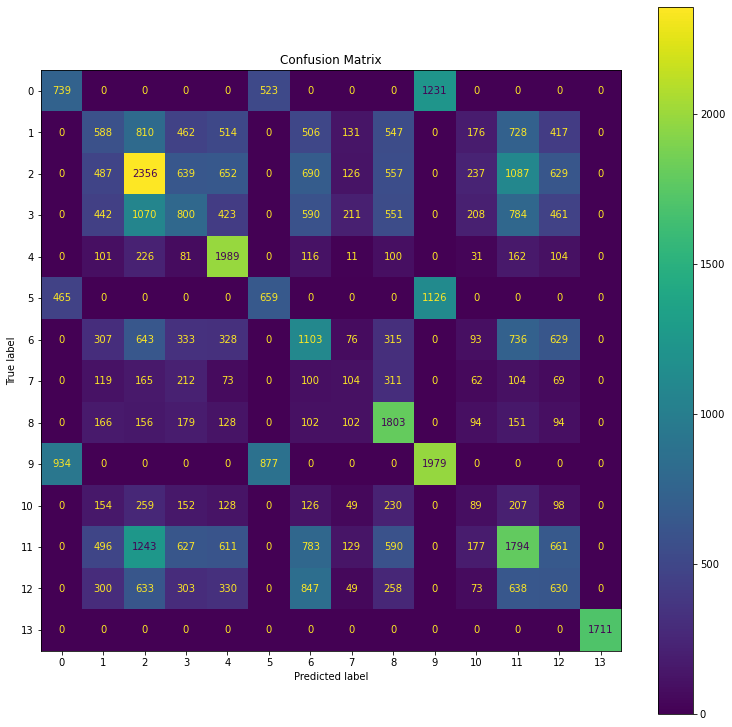

In [34]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [35]:
print ("My program took", time.time() - start_time, "to run")

SyntaxError: invalid syntax (<ipython-input-35-71b6918a1476>, line 1)